In [1]:
from PIL import Image
import base64
import numpy as np
from io import BytesIO
import os
import matplotlib.pyplot as plt
import cv2
from skimage.transform import resize

In [2]:
data_urls = [
"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCACgAKADAREAAhEBAxEB/8QAHgAAAQQDAQEBAAAAAAAAAAAACgUGCAkEBwsDAgH/xAA6EAACAQMEAQMDAgUDAgUFAAABAgMEBREGBxIhAAgTMQkiQRRRChUjMmEWQnEXgRkkJVKRQ4Kh4fH/xAAdAQACAgMBAQEAAAAAAAAAAAAFBgQHAgMIAQkA/8QAOxEAAQMCBAQEBAUEAgICAwAAAQIRIQMxAARBUQUSYXETIoGRBqGx8BQyQsHRByPh8RVSJGKCkhYzcv/aAAwDAQACEQMRAD8AGwrfpDfUchqmJ9JW5jkRSRrAYLTxdft4gYurcWBBI6IIDAkZ6YTk3EqAbQPrtYCfm3XCEc4gKIEuHuwH3rZzthE/8J76iyFIm9JG6EbQYAUUtsYE+4ZZOQFwz8MVBz/2wD5mcgUpBCw8ERJ6fs206xhTz1IlTBQAJBdmfUvEREemE+p+lr9QqjE7y+lLdMxsFDxLR284xy5OrCubj+BxwTn8j8fvwFQqDKQwch3Dki3vq/u+MF8Qochfm5nhhYgwZIjd/bCf/wCGJ9Qiot9TKnpN3WNJSfZU1UdmoTKgkP8ATjd/5nlkPNQSFBLHrs489ORX4nKSCSAGfSzCA7RcfvjMcRoeEAogOCX/AEiTeOrvP74QG+mr661geaf0pbsRSIEPNrJF93te6OAKVj47cHI/+Px5knhtbzjmSCrvBDtpDPP1GMlcQy4KQCVAm6S4luzDq8s0Yw4/p6etmKJIqv0ybuIPbAlC6bzEVC/epcTkjJ/3YJzgYPz5gnhlVzzEcoJ3HT59pa+mM/8AkMtzeVRZ2ax9GJcdXt1wiz+gb1iYlFR6ZN2xFFzWKH/TU5DMQuHyHH2gDvBOSQSBg+fqnDalRLpIYXfQx0N/TXoMY/jaAq83OC4kkjygWc7zbtcXRZPQl6uaVfcm9NW69N17cMS6UrJn77DscgEAgYAGT+4781Dh9VAHMxBPKCHi97PYtZoEHGxWboL5lJWHMlU8rtcEOx0MQZfCDWeir1aUEsZl9Pe68UMuAYptIXLnJJk5ZSsbhAAVyMHIwMjBz5/xtcAlKkkFy2x3jQW92xkjM0AllKklwsF0jUhuoNy0y04RKj0jep+CpZajYLdQJDnONHXYMZVyBg+wR7fHkQ3ZyBkDvzV+EqhJSWBS0u5BdtRI2EC9oaQalAkALdRIOjcrSCHcF2+bPbGBL6VPUci/ZsluXTyIeQVtH3ktlySx5/pAC4yR/bjA/I78xXk64SPy2mTLEza8Bh8743U69BiCp2IIGhADWt9LvJbCJU+mbfOF5xNs5uOryTAKi6UvZcwsSwbuhH3KwUSjrAbK8gBnIZOpoB5i5Ls3QQO7v7TjJNagVIHiBkA3ADFp1Plu2nSYRH9P+91HVpHLtFuMyo2WB0lekiB6Hcn6MkgLjLcOz3j8eYHJ1ud0hhud27ajXd8ZrrUvDUsVEMX5Q/ng2A62vbacfsuxu7cMsQqNsNbJHLGHjcaZvTRxyMCUWX/ySsrD5/tx0c58koyNYpAISCXaSA9p27dh1xGOappBIUHCmNuZjsZB69xvhPrdpNyUXFTt7rCKUYVmGnbwVkaP7GfBogRkAjvJwB56cnXSpIWEG5gkuziYA+7h8ahmUhRKVkjQFixNhe0yN3MWwl/9NteRsUl0fqqEBXYM9guahP7RjJp/lvnOTjj8HPkkZOsFOhMkO5cSW0sxfefVsYnM0iOZwSCHS92dybflsQ4vctjD/wBDap91y2lNRj+mY1L2ivVVk9v2jMSYMZDgt+MqPME5OoCVFPmNtH/STGx9LxL42fjKaUpHiIIdyHZ5K+Wd/qZiceLaL1FEF9+xXn3C33cbZX/AA7+6n6U5Ge/kEZ+fMvwdUfpDk6afKB9y5xrOccnlPlCXAUz7lwCzh49zbHxLpK+yRqEs10JMnBSlsqwVVQXwQUJ5Nx+392PYBPWRydUpACHm4Bhg7HobaSxYtjYjN0gX5vMEuoLL8yiOVwREEu2gfpj6fSd4WSUT2y4RiFoY2jFHUorqyszlX9okSAEcjxwCcYOM+eDJVguUjlYAhjIJOwuYbrB6YpzdFIDqSXKiFO6gYZxA5Y7/ACx2XJoao1oUTcXZQVPuEk4HyTn57OMYPZxgHuGiqSJUo7PfsDc/7c3wDXRAUQLkE3Ys/wDmx2904C409Y4FRMzMcuY5pAVUgYK/eMNjvrBz8/kebjUUUDzEkQJctpEuOokC2NNKmSKiXaVB3BuOsuHv26YTjLVIahWqamTk8n3e7KxGcYPz9pX9hx+T5JStZ5POZvYfLrGu7WbENdEoClE9yVOZ01uP8DdWsVZVtpfWAWvqYzFLanUGqkAIjraRWJPuZXLKVYEj9hk+ZAqNYHmMNZnszvfpE7GMe1KIVlgQWk2nWZ1i37Nj5S43EUCr/MKl2JyONXN9rYHxxkHXwD+M5+c+Z89QLcqJD9dRJ3FmlvRo1FJSEgK1ALy4L9d39XfXGbUXG7m3wR/r6pclBySplJYZHQw5Gfxg9Z6/588ZZCgFGYYGJBIudBfrjYUcqkmATee9h6adb49am5XNo6YmvrlKgDqqnIIOOyokxy6Hzk//AI8xTWWhKwVEXaTqdbT0+sDHqQ+ZSFBwSBqzMPs9e+PWvqrvM1HFFd6+JUJJjFRPzbl1gMWLADln5/HkNWYqEEkkuYeJu7ahtTPzwQ8MOpKQwABJ0vFu7wO+GDuNvLobayge97j7taQ0XarbAss0up9XWm2SqI8tJhKyvhqZZCMARorMTgBe8eYrzVQU25yGDG4EuSSXAABNzadDOzL0+YtylbFmkkgPtrEgCL74r81/9aX6f+iGmqq/1IaYvIhUcoLNNPdsqULBlakiqA2VGOKnkc9jPkb8YT5uclpLkydnGzvtuNcSPwtdJ5uVcwHSqPkCz/XriGF+/iYvpv2TVVHaK267jXCgmlEcuo6LQ15ntECBgC49yytPVIobJ/TCRgOs/Hmqtn1J5eWo8AkWh3Dm5Pztd4mZbh9epTWspYhwzgKDT+UsdgIPZ8Q/37/iiPTtYtQ1tq2N2nu24PtK5t9+vlhp7HaKw5wizQXanoK2MMxUM7xquT/d2MbRxFQjmDkSNIaxOs6W3xgOF5lTGUjmAJKgVAakoDqaIYP9MMzTX8S6topdHav3n9L23K6B1HWCnr6jRF/0ne9S0UcdbJSSSSWGO7VldC8Xtl3jeiUuoDcGV1J0DiVVXMnnZoks0AD520Ld8SjwoJCUqqElLl/OAoayQAP92ti8f08/UL9HfqHotGXvT9k0rarbuVFM2k5NQ2jR71NTXU0aPJbK+2R0zXK2VTpLygNyp6ZZvZlEfMgjzcOIVuVKvELOJAZursfn64iK4eoFQJcCwDWFjAGr6tO+J3UOjtsrpFNWrt3t3WBzIJG/0VparUHkx4OHtkio+CAwbi476z5LOcrL5CKssfytuz2P+9BiFVpoQkliCCzF/m5Mk6NbR8J8e0+0VbHKa/aDaqVuLoBPttoyZMNni39SyuoOR/j5OQPxMpZ2uKgQuoqWkhnP2zM/Y4gKQE0iow4JeXu0hhv9jDbptgNkZoav9ZshsrNIfe4c9q9CMnH22KMeVhI+04yezkfkE+SvGqKUyVEASYAdzLR9BrppCqAqAIJu5clp17t0k3fVKo/TvsLNTy1E3p+2LqDhgpbaPQLx5BIwA+n8AfvgDJP48kprKI8xBazxHS322NFVVVPlStegID69oAPVn6Wx7ac9NXpz/mtA9R6ZtgqnnWmMgbN7dcWjZXUEAadGSp7yezj/AJ89NVSUkg6aN9xjErqDVT6CZbQODfXGu4vTN6YZFvctb6Z9h5JEqqwKH2a2/IfFRKExnThVgqgLhf8Aj8ebgsqKS4cJBNi/yjc9T2xFNesAQVrYkzLdwX6izbziZFJWwVrpIgYHsFm65AgFSBnOGHY+Bnv58TxXpKQ47uDL6aRq3dsNyqaxVUFOkkRcAT1+4ibejIjVbFH/ALj93RJGAMg94H2/4wP+RnycmrRXSABIJ6DSCdTN7dcD0haatVzE27aPLSG/zKcij3KleIZQGx+Oz895/HX/ACT5O/tctMlw/QfKCdP2DaQF1lLQsAGIYwdT62LafTGbZYVTTGtGihwJ4KJMlsgM1wgJBGOiXPRznvIx15kPDNZDAmATYPMO14aI77aqmYqIyoTNzruTrOxsR8sJVJTx/wAs7Vw+BgAgEYyexgjH7fB6PefnZUFPxGImxKT99vrafadZRp01MXBDPprOs9Iu8WzxAjUUeWdQf/cfjr5P7YyT1+D+/mpKaaObf0+XVosZ2F8jXVUqoADWaR3e3SdbtpjTXqQ36269Le0N93r3YvKWvROk6YzV1T0ZquoZHeloaUkhWqKgxSKi4P7kZ+YniU1hbgw8iLd+lpuNMEEqKa9MAOpwAIeQ/VrltbRJYTTez+Kc03fdVVNi0fsvqzT2h/crKZ75S6lpRqWoonimjp6ump2sTwUUrExSFGeq4jK5Jw3gytmqFMQ5lmIFnj53H0OD+UyFer4i6hpoJsCSQbMHADHaDI9hY/Vl6hpd8N0b3rXTWt9zrlaNR10twlp9Y36tqXo6iqllY0Jhgnho2iiAXhJHSxZ5kFAAPINfOUKgJAU4SbNIe+kn1a0mAXyeTq0EKQUoIJJg+Z7OCUlxOhEbEYixTRahvlQtAq1E8hR5lj+9lCQRPzXH2kxAdk8h8L3+41ecopQZhwHDONh2IdrMX7YLIQEqAKSbpDjq79yREFncYTaimvn6NXrFaOjjqpFijZXPN4+CMsCHk/BeIJPL5zn/ABga9NSghBKiUhiLB3ALv8gAwltDI5EJDhLNZwHJO7u9ukbtjHpFuWobmtKZHM8gmKEEoAVX3WD8QeiI+IGB2R315sWtCEhRIdx9hj/nXpjOmhJ8wDkhyegu2nXGNPHXwzNTn9TwgkIERkk9pXVsPwVugSQSWA+T3nPfoWmFOCCOa4eem+rY0KAUCksXBgtD9A2/Tvicnpt9bNZ6e9Gas0lXbV2HWNXe6SkXS+rHvN5tGpNE3ajd5ae8WqpSpraE1PMjnH+giR40ZD02Rtp1aaiEguDBEktDte0dLemGZyT0wXCHAMJ5tiLEQdXI66YJp+l1/EN21J9C7QepaiqVuctrrLVqHdKuucaw3iWB6n+R+9b/ANIscVbBRC326SqFUEqWg91okaRh5JFell1BXMSh3DaDQaj3G8POA+Z4eaiTycrsX3Ji4sCb6j1wZDpHUtl1foy36v01XU9509qC3xXGz3SlmSemqaOoT3I3SSPK5z0w5DB6/Ph3L1ctmQFJX5o2dxuARb/WmFfN0q1ArTURaOgDw5Y3u7AgYVqeX/0qWVwYpGjwWAJUlgBkd5xy+Bg/I8I0FUypQPQDdp0e3rG2A2aqFIQQksoiABbTT2cC3QYxlMdJb2zIwRgDnrALE5HX+cH/AB/x8T0UEL8wUGF79Nz/AIvBwOr5kIWEsQogMXgX137hvXGZRVs1pW01sbBne722mTIwAtbVw0zEj8HjMSPznGcfjZ4SCC6ncGOltx6DrrjFebZgASxGsywnt7+l2xGrJQVhn4v71VWq2MZRf1dQVUd9nJJOT+QM9ebDl0pCWVpZi/rPzgxtiMc2kqtDl9ZMntszHc2wOr9Gz6rGq/UbUUWw29F6mu+7FHSS1Vo1ZWy0sMWprZS+whoqkRyBVuFKrK6FkWWYGUlmKnFT0czyqKCQUFmBIYNDvY9nt0AxdOe4alafxFNCgQTzACJAIjqRexcDbBN1POaioiCxxCQwKWRQh4usYJyU6Zsg5ycnr8+HKKkmiOUsHiXNxI1b3bCgpD1qqSixUCGYOwIMdPf54w04fzCppniZCELZOcZJH9rZxjo5H/HXx4ZSrmpIfQhgNIh97e+l8AqqBTRUZJhQ7zzD+Gve7YUbIkK2PWkbFlR46F8FWK+6txgUHiB0OgwOAuPvyQM+SKZ/uoMSAJmHsOuI1YE5UHlsTJNpOzy/0cYTqWNmpJ1SQMUVSwHwMZwc9d4+Pz89H8ZZg+Gslw7v9i+mMKaStCUpJAJ2gAAu53I+5GE2+3Wi0zpq4aiv1XS0NjsdBV3a7XCtnjgpqCgoqeSpqJ5ppXVURI42OWIz8Dvo6As1Ap4ILPbTa1h2+eJK0ClVpC8N3nYX3JvptjnyfWM+tlr31e1OvfS7oSz2Oy7BWfV8UVuvsBZr1qKaxmeF6+SVk5LBPNUSxxhHCMkQdV+4eBKmaXR8RAAKSSOaHPaIfSXOGXK8N561OuskqICkoZ0pgcrqZmDSHuRtgda22mG5zP71THHz+6WokVmaNj+W5pmRCxALLz4g8uvkLubzBggwXjfRt9rzHfDnkMoV89M6AcryBIkTHa3SIfSaA/mYoKO3EVkv6mMyfo4kkldSwCO649yOInnwGFDsH6z34IzGfNJCyWcIIAdmcT300+TuTpZCoipyFLhwSAC876nb23bE4dIemy722ogS0aevV4ucluRC8NHVPHHTVLQtMiMiFA7UwkBQ4IBIYA+ATxIeGoqqByHAJhtpZzI1PUHUyOEmoSpFMwNAdWElovEbXgY97jstc7Q06nbW4Vtyp3MkyVlskmio7Ms0gqXp6OSNo1lMau3uBAGkBPIsD5iviJAp8qw5FwxDud+sbfPGKeEqW4WFASGYmfpb540XU6D0pZb/AF+o4bFWWO1ypJHT22qjKXKprXySqRyHlSUQ4t7vIxHiQqA5IMqpxNaghPOTciemsxeQbdGcYo4YpIUEpIB3Adnsx31kW1wq1GktstX2Ca4ztHYf5fBLJXtKjmSWZEZTFSwqjMtOpQ5lRVeQEupYkHzOjxKolfIVB2BA5u3dy9pO2NZ4StANQpU5NyDoxBbeejdWxHSfQ229QjU0Wp7jJcZ6hjSQPbamC3E9CLnM9Mk7MilyRgqSRyOM+Exn6iUlaAnn5WMuwhwBLEwARa42xjVySxTc842DAN1tAv6+mNcaist20TcVjMHu0kxjNNUCBQlSkbB24xheSDIKgOqcsclyrBiTyeZpZmn51J5o5kEkESwLq/8AsW0gl4AWvl101EKJTzBwpUO8CTBn1AGDAvoAfVpbTd6h9Gu+GsSNEakp6JNnbhdJpaySz6gLNHUaenq5hK9JSVsbRvTLLIkEb07ovBpAHJ0FHL5gKQo+GVMQZAd7EaQB8p0BcTy6a+WUG5q4AJa6pswu1wemgua5XLJTW2Af02ZykeCVwoBA7IHE5/HZHwR40ZOomopRSZ5SWdw9rhz7dbnCJn0rpqQkpEKYjljafm1+4YYxatYTbY4mp2EhfsrkBv7f7T0CPz8/jvwtQqKSlSXhyS/pBtu04C5lI8VJIFhIcNJkDXbGPV0aVcmnqOJnDNeaCqKjOSlBMlX0fkgexyIHxjkR11JU4pnSI/Y4ihKalXlJcBT3kAezezd8JFwpmQrBTzBTLV1LuHQnB99iMk5A5ZPz2cH9x5KCjyJKiT5Q3rt9f9YgqpgVFBKoCikCCIMHZx7jvjlQbN77a32A3g07uVpeeaxV9ju9FdIqmnqeAlT3cz0gAAxDLCro65b5+fKDpKNRBIUeYMdQwBu733DNYvbHVJTToL8Os3hrBBLOOo6+jtYb46NfpG9Z7epHaXRuv9Ny2Wz3OTSVqu2pbPqBZ5KxyYlhqa6jeCqpwaKpnjlaKUxOFYmJgeBJZ+G1VLy4Cw3KSILBxraY10+WETjGVRQz1Q0UjlUQoM4HmHb/AFL2xKKm3wobkt/ehipW1HYHoY7xZZqwRq8VXJKkdRQytGzTK3ttyCxnj9gJOchmTzCihV7OXc2JIAbZx19sJa2Uqqk3kHbU+ndn3OJF6VrGrtO6rqIYSrT2q2VBhkYcoTLU0zN2VHIIWIPQzj4B8m0nNWkS+ga2zb9/U98D8yGyixsT9CzN9yzi+MWlci1z84yGZQOUfTHBOCCcjOev/wCDzbmiPFuNydO28MSRH1x+y4CaCDaUu0k3ue37XNx/P4hL1nVXp/8ARzPtBpKqrKTWu+kqWSSpgcxtR6ZppxU3WRpE4uHqoaKamQI6ACdeRdeStGFSmmlUKiWBMhmBkmQX6t0EXxuRSNXPUQJZKTOvmkMJm2zTLY5yFRFW3S5FGaWYNI86yOxLk8vuDS4xlmJYOyt+c/uUzN5tCfFUVsASzkX6Abm4cG2z4tDh1Ef2gsAAJSOhgSPc6P3tiVO1Hp11juPdbBadM2ee5VF54RS1NGJHjCSuoVS33qzIDguojDYLBF+ChcW4/ToghVQhnYBr6sPoJteMPvB+ELzNRsvQUpQaQGAEkE67WAwVZ6DPo66R0o9Dqbdr37rVVlPb5YqF44oo6dhydoZuccrScS3TApgkg/BJrviXxMtSVqStShPrOrFrANL9S+HbJ8DRTqrFemAtDczpl22LCQw+eL/tDeknY3TFxj/k+h7YsicFneqjjkD+3C8WI1Ea8eZY8gS2SBj4wRY4tVrUkHnXJSe8EkfybDGdPLCn4pSlLFwYbXWP37Ww9JPSbsteq2okn2/0/G7001G8iUq8mpZJJZWiZiDyUvNKT+RyIBwAPJyeI1f7aeZUtroSejSbt6u2I6qdMUlqYO6gGAju/bTru5jVqT6V/pO1r+pqL7oSnVkaZw1MscQEfZKg+033Y6/x8/jwic9URUEkg9DDjpdu+/XEammmaJJR5mje/wDExEgYYsf0ifQ/PaKqmG3LTRqHicLVrG8oI+4SN+mYEHJAAUH/AD5tTxCoaoBJcWva41u/o7yIx7WppTTSooBBJiCCHeQ3yLxviGfqM+gx6Tte6KuH/T2kvOgtXwwSvaa6CvhnpRLxOBLA1JEWyeIykqEAt1nsTcpx2pRzLLcoB8zykjq73Z+hYGMR+IcONegkUeV1AWLHroSPoXlhgRT1d+iXdz0daxj0lvFRVtx0ddaySHS2s4Fklt1XHG5EMLzEN+nmULxmQyOMdhhkAN+Wz6M2TXySkJqU0krpJPmWAl1FKSSCQJZg/XC1mcmmklNHMosWCzNyzPFz9kPiGNpu11221bQXnSNxNNU0FbSXe1VtNMTUxmlqEkhaGpXBhPNRkqpJGV5AZy08P4gqtSaokggFCuYAHnYsWOt3EX74V87kqdDNhQIKYIAOhu8Htr1eH6iP0xvVvR+sn0Z7M64iuZm1hp+1WnR+vxOS0zX/AE/DHb6uqmLEs5rf0ZqnfP3e8WIyT4a4NnCF1EqCiUsxLlnOjTdni+EP4lyKU5qkumpICn8tnMkQIM29L4sduZq+dvhidH4M7ADiAwIUHPRyDjA6H+PHOhUCqPM4eXjt7wzvMOxwkZimsZopKgQkAHWJgb/tPc5drPPVemlkiZQsdxlCHsFjaqwkHGMEE5H+B18dy0qBpgAvEkwzMft5+WB3KBUUp7K6hw7EdNnbDRqpI2unsStJn3JJXUnCFhUSqFU4/wBoAyP2Pk4jmSkOAyQLX1/31xBKkhSrllKszSRed7d98cincq1S2K61lMKyatpoqgRU0qyclljjYqFnHLMUqk8XEgUryYE4JB5zyGYNRZCYJTI6XcPB6OCX0GOuc/lktT5h5kqI9BHX52Z+mCbPoZ+tW9Wqp0XslcbTTV2orBd4qW21s8kRirdAakrytXZqqJiWr2tc9bcLjQxsksccjRujIoD+MGVzK6JVTd0OTaXvIteT33wu8S4amsoVUkcxpyxswbsBD/vsW1VbYV1Pqul1tdtMwyyR1Sz0a1SUtfb0jqCknK1xQPU1dukwoZkFLTxHiC7gqvjnl6hqZcEf+pTs9p9RG2sziq83Q8HM1EiT5iSwYzd9T7/LEr9EaqteoqPcOno5Qa62Utnp6qGM8HiD1tGCDGcSKFLFCSoUnJUlSGM3LrJq0wXuLWIBbsI9y4tgZmqZOTqKGhU4gswIB1DEtfrZsK1JgUFTGJX4IQQjZ6JDZ+RnHX4yMY+O/JGdYrJAZUhn0IDFunSw74xyyT+HQSQ0d20b9xZ9RgOH+KvhuK6e9OVbAh/l00tzWarVeQjlhp7iAFbGQ6quWA+8qCACTgwKpagsu7EvNi0CGhx6gG74l5ApHE0IWoBXIOQGxJUHBIdnBI7lnwGHpUVMt3o7YkEFXJUVSKmQ491JGXBIKYc5Y/JxnIb4Hle8ZKBl69XmUgICrf8AabyCIEhnEM4OLj4HlvxOcy2X5XNRaQQ1g4s3QbscGQfTZ9OmlLJpnQs9DaUF6r6Ciul4qpUEk0dVMsczLG2GaOEFiqgHiAFVRjA8544zxirmK9RCVAhAILTdjO94i5GOm+EcCyfCcsayvzFP6gGBYfwWuO+CQ9M6duNPcbZQLCEhihgdVHH7x0uWGfghQR1j5+PBrhWW/uCVAkvo51YFuvaTgR4qa+YzKwkBlKjQgQHYxZte0NiVNl07NLVP70LcuGWYf3KesE/vnP7kd+EsrSSKCJ5gClwDoUliR3DHo56BcrVSFVXgdNZfUbx166vbTWnpGnrRO0ZVCyqQP7l4hvuBHWMlSezkH58YEZVCxRUdgIMCSWHp7xbApdY+DVIa6jLCQNnLnUTOo1xkVVjp6a31rxRqW/qMyBQQeWSeRx8/P578JVcsg1kJLMxDXEDdwPW04g06pNIEn9QdocfwCZwyaPT5azzyrCkQcucgABcuW/tHf5x11nP48iKyoFckKYgA2gOLbzqddcTqtRJpUkkhmNi++7yNLt9NdaysSLZ1VFaOT3FYYPAkcX7yDgqM/GcHOQPIyUcy6vMfMAqZltW03J30jE1h/a8zizGR7j10/bFWfrx9M2kt99na/SmtrFR3Onq1qP0881Okk9O6IWE1PIyFo5RgENG2eQAJHz5s4dn6+TzB8MkcpBfY6AHRg03exx+r8My+fqeHzXRMaklx1f3mXOOfv6u/T5L6dN27xoeGokqbZTq9RaKiSKUQzUQnxHTyc1CiaIswYnPEEYbBI8tzg2fVnaHiKYkkEmOfmIkuzmwBFv2rHjWTVks4ukQSmmYDNAJYHa8AHS7yDDP4XH1I6f1Vtbul6YKmnmXVGhZ49xbdIqxtTz2W8VEMVUqVAYu7wVtZMFiYYSKMFftC+MfDahp1VhUgkgBpfmcByAH/AGkThJ47QRVSiuEqBQ8ByLG8wLMeh2kr+co17XjK/KKnizF92EDvIAx/GX4kDLZ+046+XjLEHLp6y3/1+nprGKwzCf8Ay66iT5WIEzG/drv1c4XNOl5NbUfMK6U9JcjG/wDtB/ltUpwCMgjv5H4/4JJUwkBIkkltGtfW3++ghKyRVKksXO28j1H3GGrTStNea5plDyLPPCx9se2V5ZDICMAFSFJAGSO8/meshICRJKZfTT7+Y0xoppZKllLufQa66za+OUv6+tl9Q7FbuXfTn9Y0FRXSywSGJVh9z3HaRse33g8OixVuRypAGOcuBmitS/E5QyEqEnmLN5b2l3AFrh8de8eqrpCmUJYKUoOBrofUaRteMeHoE3jvm3Xqj2W1PLdJ6AUW4WlKK6VsTRQrLaHulFFUwyxBAhjFOzqSAAFx0ez4zJFLlJAA5iSLlnfUkS+rntgDRrLqJWgsV8pZ+0AWFzA0PV8dVHRF2N7obJVmaeui/QUhjqpUH6eQT00UoZUVQrrg4DZPRP7+NnDlJVQDF2CfTq+u1rv0xU3ERUTnaqFjl8ywSQzB+uuwDDfTDr0rpOz2vV+4N9paRKWsuelrZFVtE0i01UkV4gLSPTlzGJ1KFRKuG4rx6PfhFLCpTILSlz6h5211n1GBVYctCsgKu5JctawmzMzT3OFSiZzBXCVE4cyEkU5ypBPY+VP/ADk/B6HkjPKdYPKXaC1+ocdSTp0OkegSMuHflSzgBw0/IdfngNP+K23KpYLD6b9qooY1qYprrqmoqwObJSlLjSxRMy8fsZ5o5CmMn+wkgnIerVUijUBchRdzpA79ovL4K8IpJr8QFcAE00hKR1LObMSAb6NEiRHfThptL9udY0lZ5s1sDe0xHtlPdU/apUlMnsAMP/u8qv4xzyqHD6qEpASrmdQBCnFpBIN7NaxGOh/gLJ+NxLLVCkOFAhwLu3r0a+D+vQnocWDTulbg1MgFVaaGPgVzwiWOEgA4HZ4r8AZ+POdaHmrZlS5l3IF3AH0I6+kdB8cqDwaNFJSkkOtlQAQ2nW32MXFaft5a+R1UkbKGhgROvtVYizDj0MA8h3k/B7Hm5alVaTCQHBAHye9tI3i+FGmnw11CBEiLGBbQ9RrtiQNjqqk3mopwicUiHNGTpuQBHFvnoZzjHYI/bw1lkLRl6YYgFQJN9C/oLno2t1ytykVi4cB9DuWklmPezBgcPzT8QVriWRMkyMg444/bkkknGPnH/wC8hmphXLQYSW2eX0tpHTrgDUY0KhB/Ut52Zx7Sf9YTataeShnHccZBJK98iXXts5yD2f2/H5I8IVgs10ApIcG8SNmb6A7ProTypy4NnImZe2EGupJINOu1MEI9xYySDnjK+AcAgZy2Pg4/byOrmFci8AEiRJZnvHtiSUpUKTqNiQ7gEzbcA6d2nGndZQ1Zt9JC0fJmmHyCAV4nIB/xgfaMHs9+BihfjVluoAEm8ODp07W66MKQhXhJgkMwYg6iREs/pjSO6Wn1uWnqahmpowRDIWIyxBfmBxB+CcjIz8fsPPEnmpr5AQQZIEkwAHlraN74zy5TRziioMGax8s/SQx9OuAafrU7ZxWLcN7u1HAyQp7DStGxaP3Hdy32sv8AdwAy3Ifbn578ePhWvUSmmgqIJJcPJBdwY69LYU/iilTNWtVCQoFLgtBuRp8rP6YbP8Oj6obJ6e/qBaftOoZI0s28Nmrts5cMyiOsuAnazOcsQcXBqWIZBGARgHvx+rKq0jTWlwjnTzEmwJAHzLSdROK8qU6eZymaRyjxEIJSOxmz6P1vbHSEpZo6i8VdQsSSJ7QHS/3Ig5o4+eQAkHEDrs+WJkV8+ToF/wAyXDhz7enpfFKZpRRXzR5bLWLWYM28D6u2mMzRE0NZqi4zCN4hS2nUEwd2PFljs1cxkX4AAcLgDOMA5P5KIUpK0Ahy4AfXmIA6QCS/tuQiFeJSqQxcnWQD32fUX9cMmyAKLjO9U8haaeUtJgspJGFUgL9oCgjrP3Hv5wTJ/uOQ6QAJv2ljOr9L2xHDih5jykqM+3ptbSRL4BZ+qttfpv1HaRbcnbaWG9S2OCeoZqARiWUpxaohkHJTzKDkS35TAJJ85W4PnR+IphQYs4tFg97MXYWAEY7Z+IuEnwErBdIUSzO0X6l/SbTgYLTsty03qSgulOKmGWz1xqXhDv7lNPSTlwsikjDpImAQSFxnPj8uuDSUzc3KCGH5oBdJ0fYy4sXxX9HLro5lJ5gUFbSw1nTUkxv3x1gvQxu/Z94/SZsTubS3QS0t60la0mnHMmOqpKSGKeGURq7SSA8eQ7wSCfnxh4BX8SgskEkJGveDOm2s9MV98S5YUOIsT+cqMehAt/7P874m1p+thudw1kY4QsUWmaJYxPLAk87C5RTLNHSmU1KQ9giSWKMZBPyR4Z5ylQVaZ3u/yA2u3U4XTS8SlVAU0FjowHuNfljCpY1DVYPNOCg9H4yrZ/tPeevjPwfx5MzayoUyYgD5CNtsQqUZdQJcMAdBci5Y6k/LAPX8Vxp+ZN0fTldFmjMNy0lc6NeRIeMU89UHLjHI5aIlT2R18Z8BZusyORnJuxG1+s2js7YOfD1LlrLXzu/KwkAFw76MRfoTfFBX0/dsqvWm7lBVvxnstoRKuuqY2kMGY5R7MT8kVhJlZPt4nrvPz5Tnx1WH4ddAJUFuo+YAM7HQykwzTBiMdOf054bVVmsvmedPICCHdi330sSHwcJtvv8A7S7Gbb2nUmv71FY7ZaLPT8YwivUSFXhWKmpIUOXnlPFEXAUBssyopIpbI0V161dKkEJSAXOsj2EdY7jFrfElLwKmXeoklYUPqRfQmzRHfG5NFfVu9HF7vVphm3FoNNpOqK6aiSSBo+LBR7y06VSL7o7GWJx+B5vGXqJ5xTpqUASYSY9dhvHo0B8vlVKTUKqiQSlRGhkQNIiD7xayfaT1aenrcq/SwaN3M0tqiWdBKgtVd7vAMp+1zLHEAMHoAsf3GPGLLrScvTStBSygLuCWYW+rQR1lTzGRzCU11U/OAGhwJ9pn16PiVtmq6Cuhr5YKkGNkldahPvTg/LsYGGwMY456xj57YEhKPAIdmDdnu7uADqBo9wWXVIWnLVEqSUq5ljfTS/8AOlrp1xs9Q+nqxoKhWPKmDGQHk6Cpi5oAe+1Hf7AHOB8GeSmuslX/AKqPRmntMWiXIg4hLK006YZ0qUmwnUgehk/zA869qWmsqrM0EKCWEB5nWNFwIwDk9DickN+//fwUw/FVAH0Ceo9bbfxDED4ivBFNJLJHVnJd29/dsaX3QuunrXS0E9VeKCnoopPeatkq4IoogUIKv/U/2g9dZOPjo+DayeSnW5QFGdnuGhrTHXfBzKFZzSEVAQSPQxO2792xEDXHqD2nOobfpqHcLTVbcqqFYqSjiuETPNOQT7S9ge65IAUkEk8Vz14MCl08u60lJKoVoQ1yC3z2wYymRrV87UQCkgJCtWMhrpmP8YGS+s9t4u4OgNWay03bDWXDT7RtXiAKZpbaomeWReJIf23WMr9w+1mI8Z/hvNLXmKCAGSqoAVFwG3h9T6WF8QPibhKkcOzVRwSimQTLsCDDs49td2I3X08aW63P1oemSn0/GyXSu3m0WKScn+tEp1LQpMJgCeAReZX7vuUDIBJUWlxElFInmSyfCcAsC60sRvuerm2KlylBKMrmaip56agki7hM9BALOQ9umOsnp6mngo2Mk/GeOliSUMTxZkpYVc5GejIGI+Owev3f+DVCrJ5Uf+ocy7HSdbgve+7UPxItmM5ykBJrVBa9p1M2MQRfde0DFNTy3R2cTRjTGq5zIPhhJZbiwVi2GQjIBGDj8n8+GufmqiWAqIhp/Olu/wA3AIvgEgclPl5gSoL+SVHWbex6yGLHDImnKgvTuTNTupVHAdS5YqyMD05HS9gdZyCPJ5WSvo/c67iwt2GNNam9FIeGMCSLt8pwAjoXfzaTQ2v9V7X6gOqdJw6nrXpNP6S1jb6qlqpXmlaNfYFbHGZeYcI3FOJznGPnkujksypFOtlgshBSai6fmCAXbnYEAd+2uO9MzmsqMnmRnGNRIPhpWSDzOX5RBLSeuzl8VTesPYS7bW7n3zUhgttp0xqi7g260U90ppbnFFWrH/5t6KMiSCKWd3mIePiqMflRg2FlqShk6PiqeoafNJlR0FxEWMvbFJpzyc1nK1GmlaEpzCkgsQw5ovfRtzOuD9/pE6Z0i/0+9gNNWLVFwoI7ZazV3ihinpZ639dXJBlmnmglVKdxCfaWKOPgVYktkEM3w4/95OhSOzg94h36bkYTfi3nRnaZUVEBwm5JdnMDpfTvi4HROjrFp2s1ZW08VbUXKr0vDTvdK2uqquolgWpRkRVeX9NGgYdiOBGGO2wMA+tiCQQCF3hruHuB0s/WcLVNRPipUboduvLqHhzc/Ny+Pq2qr1tZD7rkIFJEv+77TkBuicdH4PWe8HyRm1DwKZU2gi+t51YD20wOpJehXILcrtefMbu8epPTAfX8VdtTebno705bux07mwWe8XzRt0rFdQkFXWxXWpoY3OCEWol9mEN0QXAU8uwBz6QEColQChobbWOoePTuTvwysqqmmt/MQQQIcKDknQAAkbw+KPvpAW+G63nV1rliCuZaeSRV74xKZeKk5J+4gk5OTjP58pP4/qlGYSx5uaklzcGVC1otte2Ox/6dUkDhtIoUOeS4YneN3JeLWdsS39Qe0m+/q236qdnNCVV1tuktGtFToKR5FWqqjxjMsuAUcI7MEyuF6bPJQQq8KqZfL0qq/Cp1FqE8w5gABJLEF33Os3wS42czXz1AVVrKEOwLtfSBEnU2GJo7Z/w4m4Or7RTy623jXTl1mipqimhSkhrpJC2S61QcPMvAcM4eP5PXxiLR4jT8aqVUqQS6ksAQkWLgBQB0Dl56tjfWonw3pLUCEA+UhyeUEPpHznErdvfo073elnVNFqfSu7NTVw216X+Yx0Qlp6WWnh4ioLxGRwodQSo5ZBPZI68I1lUFZemqmhP5g3LsxZ2Pu0mbYH8JzCEGvTzBCgtLedoLgxaYljZyRgiD05a7o59M/wAonvUVfXUNGtJUCWdZJDVRQrHP8tnBdSexgZOPnyVTzdJPg0lMCQmCbSQBvoIs4GBHFuFrUipVpUzyKKikoEdnYiMSlFzabTE0vElC8SvLkhhhgSQD1ggEAgDP/wA+GKdan40kcoSZLlw24IHWJY7jC3mcurw6SQDzFYBP7OGt7+l61fXffdWX3QLaW0HquusN6lYyUa22ojirK2RFBigUhWk4tIMEKVb5y2e/Iyc1lVZmqFKSkpYABXYbvrG3rg/keHVB4SlJUEkAqJTYAno2sGbn1GH136JPrJ7pVstqtmrNUHTVxllq4mr7/NT036dWCxKXZ1lBdJM8UlUYByB5iqrkkUl1VpBS0kFiXeHMHuREHrjcKK6mcCEtzB3ZhAHp2YM5m2ITbwegX6j3pv1DR6i1EtTebnbaeG+vPb9SVNykp2hxUJJxFTNJG8fAchyGSCrD5HmATw7NZPzKSkFRYuCRESI/Zx3Im5WrmcpmlrSpSmACgzhgN5OutmD74nP6e9d6t9TPpv3YpNzra1LrKy2a6Wm508kbKalaa31DrOyOS3ItGQzAgZAwB35hwY0cnnsvSRUC0eMACoCQSWd7Al/ucbviCsvNcCzlQOFmnUcOwYgGL3LiXvO+KDPpe6S1ZX/UN2Li0tRQ1lRpfee33CegklSHNvsmpxJWrHI5OZI4KaUoh5MxUAd+WlxqpRFKnTIIXUNLkItBCjFpTbv64pDhtPNKyeeLKXSTS/UDcgPyqAGpcl7jV2x1PoGlitNVLMnCV4kJXl1G8kaMQznOcHK5GAeusk+P/wAPkDK0ASSPDE7CRtY7nYPihuNIIr5jQmstmfcXDy0Xcl+jBd0uoo6a585HX9Xp/UMQTAPEvZa/mFwOXEJybskf4/PhuisKzCwPygE7mC49QdB6hyMBChCfDQpR5iqHLXEg+mnVu7RH2Wi20qykIzpkkjMrRxySFPuyWABQAD8kj8eTuccpU7EGHPz+9TeMYV0lwApkpAKpFpuT0Hz9wGvUPsbRbr+obY20TBpp6KxXmqNxpgoqpDTi3D3WdOTLxkdcMS3bYyfOQ8txWpkqCkgq5VqSksSHElryXYtpvj6PZ7hNDPcRXTQkHw3KmDhlGWgSY7NriNXr69K+n9vtCWjXNioXqbra7qh1FVTtJJU1MEjpyaUhZXyWYlSwC9jsfhq4VxReZASSpi7PrPeZL6Npir/i/g+V4LxCjWpoCaajTUoAAH8w5iwE77euC/8A6I5szfTz24vEEJWOfUdwNRlgWDrS0SopJ79tebYx8E9Ds4fPheqs/iKagygkENNiW6Q/W/TFMf1DrUBn8mqgCyisF2AAISWh+3e++LwbX7CVF7xlRUaQ5qcgqCZzjsEnAPf75/bxocikpTOQpR7N1HthFBT49mKkJL3YM0Addx/OG/RNMt1q4ykUimJWiIdg7rwPEgFRgk8uY+B9nZJPGRmQVZSmtUtyk63D73hgdZaHGB1NRAzSQl3SWYiS4efZ29icD+/xBW3EG6PpOpbTLQT1FzsUtx1PbaWMlgLlQGpcsgGSZQisFYLnH+cAJXxBmqtOvlUIUyFCZL/mmGkTvi4f6a/D1Di/COI5hZCa1CoQkKD3S7hUkAdtbbDD/RR0vPJrnWy1sTQstfRUjI4wY5Q04eNuQB/bkOuz38+VX8cg16tFmcUUAk7hSzIbQkMxgY6M/p/lkZbInxVHyLW4BeElo1AYC9pwUtW7X0Hp8vNHuxFZoUbUVwiWqruCCPHtSVMkkjgE5xETkj+7A68SeF5SusV/MFJAe9rENAa31l8Hs7UylfOU6SlFIUCUkt+Z4HT6Rdsad1Z9V6Oyat1XcLbcdQXPT23dsFbfbfoe1SVtbTW+nV5Ki4VlZNPRQxInBo1Ebyt/TYhe8eakcKr111EpYEqUGcXgDsDp+zTvWrJZKkpSyVFSDZI6ztI3b64lFsT9TqT1Fx3RNstJa71F/JdA0WvNWV13WGuttHZ6z9Ej0tRzqfeW5IK5GngjgkREim4SScByL08hmqNFCVMQCNSdC+nbVyTuzKNKplMwqqFLNPmYJdMGXFiGPeW9sNXUG4tyt0ml/Uhs/RVkWjrhqyHTe4llpj/6fDVz1MMUtdHFlWhlHukTK8SnEYIYhvNXEMtVUqiQwUlKXkyCTAYbGX3cbYa8icrTyJytVXOh1chSlwymk8zam86Yu+td1Ndsol6MzQNUUlPUkKDmMCF5AFwAQGOBnGScZAz0dySKqgtxCaSnnXQiHO+zli2K+4hl0Jz+XQhRINYaSzFTdDFuhbXFI+qN8ptLanv25e5dBNPYaXU9Tp/RVFXkLT1tVStGvuqAZJWDTOVxHC2cAdA9ryMtW/G5hY/KFBg5cR0DS3oXOgxYK0ZdWWytB2qcjrIGhJGnu3fDQ39+q4uwl1l0ZrDSGqrNqmDTen9QW+3w0yUdPU0F+q1paSO1qkrGvnQMJCk60cZUH+qGKqS9fhuZXw0uwCwJc72MAuR3tvhKo8TyFLjVSgFqWpKlpI5QCw1HmMD9zjUNy9btp3R3Vodrdx6eokl1VaLVcaey6usT2i90cV6tlNcLc0Jjevo66CpgqYJVKVgZBJiRFZGUDV5LMZXJJYukqLsZtfsWj5uMOnB8pk+J1M4pC+U0+Ul0wXId5cfe87gs3phsu3el9w9S2uzLbqPU0FSZoeIWOSOqpqgF04rjBBA/c5A7+BI4Vl11s7lVKDEVEFmd2dydNZO864Dca/DUcjmsu5UQlaQQHGlw8fbizjC/Tn9M1dqf1i7/AOr6JJqZdldydW3elSMFR+nh1XWPDGzIw6andWyQDgjrPXlicdzCk5jI0kuQyea7eVxdoZg3bAv4W4DQqfD3FMxmClBUORA5QRKUqDnSJ7Q23RKt9eKnROnKyFzCbhaLRIrSfcXb9JGjx8ehgMpOckfd/wBvLZ+GleLkaS0wyGP/AMXs03Jvbpji342pHI8fz2WB5kIrqYh2YuXHW/8AnDxsc0r3GloFVCtRYdTyTEgEokOn7nJ0R/hMgd5HXz14eyvIhdRSixUSB05jA11PSz6YUagqrzSAhJUjlUSRDAJJi0lu+j4aM7+5WUFIY1MiRF0jBHMphQXUjrGOmBIx18j4lV2TTd25rxoD9+7DrvR5xVRylS2ZIHYxrd7i8tYOKFsTtlHr3emq3Ukskun7Hb9OyWLRthrXapq6WColgnr7jWzSFgJ6r9JSqkaiNYh7gCDl5yFXTRqZdKUsCFB52BeDF9DL9hj6ZcHy1agczmc2SpVQDkCmBeSQwYiQBH841X659BR33QW5FqoaJaivqtP1hiDgmJp6ESyRiGI/0zMVjUZVObdDLdeM/AkISKCnckgFzD2BY9A82nFYf1F/vJKyCDTEAAswUVA6vBGp6zOLLvpt6e156UdhNrNq9fSXS4aI3Gqkuf6qgp4mi0FdHggkQySrA7pb7gjGOdap3WKSCExNDyfnZfB6YoVlLpqcLQXDu0g6aA77NcseZviXNjP18ulSQFJWWIu4ADCW9COrnBDFnanenuUlJKkkbaNj9qUESxtHJMHilD/dkSqyuCGwQ37eNlJKatKoDEkMDJcNe32+Fuso0s0gAAgoSHeNHD/vpIiDhPpXZbskbQhyaaOQSL9uUyQw5A4PePtGcZGRgjzyos/hgl2ZpIdwCQG0jWBaC+B9BY5swGDsqzxOgf5S+gYYgx6+NqP+p+g7BQOxDPquls8zSxp7f8uucxjnQgoFOYp2QORk5yDnspfxXyJp5aoG5/M09SWYanfdsXT/AEg4n4FPiWVW5p1VBUiXcJcNDD3F7AYFD9FOgbNtLvz6g9P2qJkjtG8FTa6ZHkHuiOKkt9QcFcERtJUOU6+MjPQ8qb4nq1Kwplvy00pBAnUuT3Mhx1x0b8M1UU6a0EOiopZDFnBOjEFvs3wW7U6F07u5stYdN3WjSeZqSmnTnl1SpkhEePuYknjI4IBwST10R4r8JrVafjUwXYB4BJtfqwsY9MecTKKWepFmPOW8x0c6nSQLBr4jDpr6fun9vq3UEWnNE2KqGtLbLQ32lmt8E8F3pKlpRJTVyyK/vI3uMOLHiA56BOT5+IzKBVWhRBCibBwXb39X20wSTm8jm0+BVCAUoYlzzCOpkS4cfTG6ttPTVqvbW0XPSG3WgdJbdUtzoIbZequyWulpquutsQVP0c8qL71VCEUKIpjImBnGVyClHO5ldKn4imHMNBMGLNffe8PgAtPD6Kaq0jnCJB5rF2Ev13YXbbJ3j0TYtuNnaHbOhtVrtq197jvmo0oqSClStqw0X9V4Y1VGmcRK7sE5En7iSfIfFs3VoZmgkgEKSgmNSohtratrtg3wil+OyK6yQpkKWARLcvuLktMXxI6tvQseytuRZFWlf+V0hUkmMwzj28HJwSCQcf4+PDeSzKyispJAaiokRMj1cWiRhYzlNCuIZZId/GBBeT5VNtDXtc40jJtJoPWVBV6U1Zpm0Xyluc89wsVVXUsVRLYbhLAmK6gV1aOKRpFWX3BGSJCTnPXgLKZ/mzWZSWB52aIgfV/b1w15ymaIy9Rp8MXcamDI9SH7a411vB6T7Lu1fdPV25e1+kNwNU6ZtlBbrJqe5CWnr3tlqmintkFVHS1dNFUtTPCjqjwsuAwdCpIJ7OcSzFPhoSOVgEwzmTDRHU6EvhPyWR4dW4pWr8jKJqEqC1by3ma94JPzDEqfRTFuPu9aty9eafsS3XSiU8FrlhoaOOaCjoadKakpI5Io1ZKelgjjhgQHEccaqBkeQV52tWylFCglySTzJA001Lb9Xw05DOUuG081+HACqjJKiol2s0kP6fSH96g73Sac2uu1vZRHDDTtCoKguFhHt8cKPgZHE4yc9k/jLIZlVLP0EpSAyk3BtLlnOu0azgFmkDMZestbqK3JkvJeHPWzNikH6aW2MNk1z6stVxQqW3X3Jn01RsUCcDVyQVDlARkOzli47OSwHZ8aq9VWez9HmchDizMCSfQOegtOJ1Ssrh3w5UpIJQlQCybOQgCfaPTo5WMVup7XpvRFplGf08FPR5OQfcip0xnBBCtkgZyCynH+bq+G0ijw9HLblU9zLCf49ccP/GFdGd+Ic4oqBJqaEaGOz9bPdnw69Ksp1a1MseVj0VqdnyM4aWyV6h1JPRw/HHz2R8eEEklbuQSRDnQ6AatvgHlKzVK4NNPLTpVQCxcliHN+8adIxFn1GXXVtl2h3d1DoCumpNY2XQtc2nKpYIpTSXJ1REKrJG8fOFWLnmp/vUnIAxJ4jmDSybiVBCiDc2OmttukYY/gThuV4rx/L0s4HorrUxUkCAoBtgCIczd2tiPe7OjdO6MD1VnslBbYliKr+jgSL7AMscKABnAAwf8At5x9XNQUXCmLuz6S8Me3ceuO8OC1q2YzFQLU6UoeSGuBbW+ravAGKX/UNVQ16Xx4qSmqpZatqWNJX9qSP9bxhjeMspTHuyENyIJIJ8a/h9a6lCkSSCkh76KHo1mO5OK7/qDmCK9WhTYjlZSbfmuJgO+h6YvD2Buuj9WbUaR0pUU6rqiKwRVdumm9qSOapoI6WG500igmSGSlSqp2j6cTCVyCpj+62eEZhFOukLUSFJ5RF7aO1z06jfmzj+XWrw6qEh0L82jA7a6dLOd8S02wuNXbk1ppK4Sq1RadLQ1tA5ZmElrq543h9osikLTmQU7rg+20bAEgBi4UgAVkA8pDvEOB1l7j7OFausGrS5iSeQCYYghJ9yOnrcP+OOeK60crQSgSQKkXtsjDDKpd8syn7sLgcTjHZHnpSleTUEvzCW2Y21sSLessMQqaj+JqhjykKkSAGBswt0mbbxr9YFZdbbtVNX21WetptVaemgzxUkfzaiSROXIhXMZZQx6LfaOyCEX4sSPAy5UWYqvu5G+g9w2mLj/pFlRWzWfdQIQEkJsQSUl7MX1n6PgPnbu73DSHrS3y0/qRDDdr5qyl1QsX3IJY6ynihR4wwAbqm4tIMgtkA9HyueOZYGihaSCChM3LkECOk6iz2LYv7hGbQjMeCk2qFIYDdulpf3wWr6db9BWaK0yzTAn2YQ4ZskSBRxUD4A66P/H7+JHC0pGarJWyfLF5kdevWGAfBbj6VCrl6oQeaZeTBF9YxOKBKmorrb+mSLDRxFsthiuSMq2Dhlx0MYPfY/E9dOmmlW5lAB1PBYgt2dpaw9MBKVRa61QQDy6lrDs7tBYdw2HzQ0EyXCumlLSypAXZB0VJU4IY5yD8kjvvPm+hTpeHRCVj8wLzqFfubET2OBAqqTTzH6g4JY280Xgzsw0nFJvq03SucnqFsu0sUMlZcb1VUlYIBzUU1sMixESyY4hC8Uzj5JDdjPkTjOVQvM0iVOShDP3Nuj2/kti0/hSvTHA3Du9UuwYRLvqCCQ1hbQYn1rKx1ldspHbY6aNWigpTEqcsippV91ADxByGj7OPyMHHk7IUXpZhIM+EpjcXT1OkdG2nCpWzFI8dyyVCDWUDa3KbaO7ekscRt2e3FfU+rrHp2YtT322TzUNVTSZ/rJTuce1/7s9nsdfgkY8WqWX8KvXWSHK3+QPpbWWw8cWKPCpKQAU+EGjv+/v7Ysdn0tU3OrX23EUkcCssgwGVwBgBc/BGcnlnP4+fGjM06auHUuYpJZBbWLuRDdt7xipcnmlU81miUhIdbElgxIEv7AdIxr79LX283iWpAmCmoRZU/vynJGTj/tPRBbkeyTj48i1E0006FtWAcwxPT7g9CXiqVRKhPOfKRYx1bURaJjFWnq8uzLom508spjeSXiUC8iecnEL8jPLo/AwR/wAeT+HJpnPU2CXDX6ONOhfX1xtr1VIyg5QoM0teYBkPIcdsQz+ndbZ5Kmnt6SCQVPqMuldNyQchFa7pUUk1O2DyKBaVsnAAx2uO/GjJU0HiiiJSxYgE/quGEXt16YjfFGZNH4WFRaglaiEgbjl/mCC4L+5Et5ena526gEcpWCQSxe2AYY+RIDE8gwKEHACnAY99Y8urhKFJ4agwl4Grg8oERDS32OIeK1DV4vnKgfl5yRHVRJvob3OtowuaTU/6t1EQ5X9FpG+x8j8c5bbUwqBgjomQH577/wCxANTXRSRKmctAgsS5EAgB/bENHOcrWq8yU/pJeTzFj7u1wZbGq7lYm1DpLX9vkkR3rLRXwKsnStmCAgAEdglGAzkgg/4xlxFIqUwlgRyF2D3dxLSzNYNid8N5+rw3NZeulbEV0uXIYBSS3U63HfESd65/5tClOZeEfFkAOCG+34Y4/GOsEfn8eccLrCopSSzE9reocEd+t8fQnhi/w1U8pHnQeZpZiCO+o+w1Bvr0uMm0O0u52vamOCSC001PLQsHZFmmVYpY6RXRlCzvM2EdCJFLKAw6w/8Aw9TAyiAlIKiogau5P8jXvrirfjaqV8Srf9YJDzYbb32kt0VfpeeonVm7m81g3W06upF2d01Z6pdZWc3C4agpbRc7uLfFSGllqJ66tqwgo6p62OOaWKlT2mKxA5L1w5CquaoCxSS7P0i3oZ7mz1Zx+jQocPWtUlakgE9UqJYgTZu/bBV9uprdco7xq+3zU1TTS6IhpYp6dx/Xo6qsE8EnuRHDxMsqP2SVyQSOPliZfl5gjVkwexd3mCS9w3tio+If26lJdgS7h7czjfv2jfC77siT26UvIQ9OAgDFgqhYxyz23xjHeP389ShqdV4EjpdztrL6WI1xHBbNQYWlWokgJj6taDqL6a9SunLpqnaDcC32qKWtudClhvkNHGA0zxWW+Wu41hplUcy5oqSfPEEv30xPaj8UZX8TkUNcKVa9jYO12gQ52xYn9MuMjhfGMwioseFWKAeZgA5SZNx9OmAuPUTXV+mvqRWe4XCn/TU+o9C29YYTMHmQ0tdVqPfiRiYZPclcMsyo2ADjBPldcQoqTk0JqBmQAX2kO5D+0vjobK5qmeIUqlEpUipUSXSYZR7zq2vfQoH0e3o3fTlupmwHpYaJ5VJIKzN7aN0TgAFiP+B5W1FHJxCrJ/K4bbmDFpe+1/TD5xsFVHKLIE8zH/4lwPbvbFtNnCRVFpLKpcQqoYL25ZjxA6+esj8957PfkyqkqytdixBUfkPlv84fCll1Pmqw0AaHnyiWl76v84c9XdEoLxce8yGL2gjdYPB1ZQPyA2AOj0DnAGfNWXJQjLnmJBUL6BjqJ9tS3eFRyv8AYzSi5J5QQdJFmF4ebnrgfDfveDRunvUve9ydV1lotiaa1BTaeq6i6TU1NKYkpaOWOKGSZ0w2Kguqr92ZM95GNPGaijm6HKSwpo6syjI2DCdIGgm1/hfhalcASEkus1WIG5IadH174tQk3+26qNjl1Wt2tUlqiomqxmqgLMv6Z2zjmTxCkkyEY6zyAPczh+aKaeZOvhrjQklEh/o18K2b4JXHHcmClRaqSVMWblN9CSTb5Yrl9Pu6W32vN49L6o0RqiyXeSr1nJSPS22tpaiWn51EUE1LKkLu7FW5clOeyes5Hi9TrLVUzBUIVUId7QCJ2t6+uHriPD6yculgWFICUudTBA793GjHF2Vi1N+sv1yp5WiBoGUOytEgDlX/AKRA+DjkcHA67/HjFmKv/i5dAId6cXdgYN/u14pw5Bak5xbEKBWReTziHj7GG7fZIGs19dGGWetbkGCkGWWR0wevgMAcYBPx8eZkBa6SRLJm5s8+3rqHh86fiUsmjnLqCi0ddrs1hPqMUv8Arkqf5fabeYmDLUVtKJ4/93TuWx8FsYUkjP8AnPk/IUeXNlYJYOwNve9z0mbHEutUqKyyUkAHlT6SwftazxOmNM/SG0/dNT6v3G1VLbqqTSmmtx9zpKKvnDfpZr5JrS/UbQU5bCyywU7mU8MhShGMgjx4+Hcuauaq1FAuLPMk9zuQ297YRv6jcZNPgmVyqFBSlK8zXACNgxG73axOL25qqKo1TMCkqimgBRwXEYUsxcFAQpIPH8dfkgk+XNlEBGUoosDLMenbYi/Y45Hq5kLzOdKr8yhsS4c72J7n2wq6GnYXPcCrNQGU6Ru1VCW7A4S+xGFJzgtlQoHyTj84JAoevSDOA7sHkJNma3b1BnEeorweGLqBf5logjQqkaB8Nq0qDYa2WoDhbhSrEV5FZFkdpw5OOySrR4UgkAgY/Pn7M05WRYIgXAgsYEdDtdmxjQqpWnLIB5SopcggFyruLxdsRI3l0tUUdhhqoMmZZz7xAyT0wGD118k/tgdfnziIFK63K3m5S4mWs3+W64+jGSqGkUqUfzJ5RaNe2n3GBovrh7lUWivTbpDSReCll3A19b6Sradefu22hqaSSucxgh2jEcc3I5IwDjOMeWj8K5dVTJqYF6QqKBCuUukKUkBwQH/fbFW/FWYH/OlNQAoWaYI0lg8dB96yS9D1LrjR1fsDedmNmLxc6HW1ttds1/ftF3O2XfbW7WgUxaK9XRRHS11lu9LmdZ4Xo6xZFmKmQFc+PfC+bmpVCplhTbKLgu7h9v2gNit/iRYVSrIUCaYlIIcejWNw72fbBJO3VQ1irN09Cg+9SS6Sl1XYmZCYaam/VmGvpEYsOMcdetS8aBf6YCx5wA3j3SCxmKSh+tFNw3ZJ3h+rw+j4q3O8pyyTBKVqCXBBDKMN+wtjY6SMRa3YNyEUb81IMf8AaoCjs5z30f2H5+DFJAVTrJISTyn6/feYwHC+TOUiX8ySwOjtDP7B/mJXIZ3F1qXQRlZoI0lSQZWVAEBjZWGCrrlXXDArkdk5K5naJ8HlIcBRhnGsa+93xJy9ZaK2YXScK5QXDuLEMerWZ4YaYDB+vHWWLQ3rk2g1XpzTtJZTDo4U+oaq3kwivrTdqmSF364lhG+BgJn4we/Fj4ryQPD0rRTSP7YlNxCiSW9vkxYDFqf0145WzOZRQrV6iyiqR5iTZQ36EDd8WyfTt3XpdU6Z09VI3GWuoqNqlWOGSRViGGIJwWIIwf3J/HnPYJo5+sNeWRdgFB+7D1ncY644pTFfh+TUku3MNyfKr9hd7ejXl0l8dJ7O6tGQntshBI4lTlWBzj7Tn5/yfgYGxWaAytckQCuWkWfcyS3ptdQyFConiSwUiSAxLkx1hy1tHwiy7mWW3avuZvF2p6eREwtO8qMSUhkTmycgQcnkf3/J67hozqFDL/8AXmuWduU2/b/OJmYydRFDMKQ8taLEQH2j/rbA631BfTZtL6tdxLv/ANO9TXxdW1dwgrNRG11qxWQzUTCnWoqKdFLCrSKBIQRIocQqCBgkkM3nsqK1NBAJNNDAgbkNqwj9ngYdPhvOV8rwmkKimAXULP1nRz8/2x57XeiW+U+zDaP1luTqmto7TMYZY4bixjFPDFIJaaZcZJjiDDhyyQDk46OnJ16SjmAEwEHQlpFv9N7hi3EOPU15zKUxSTzlblXKHYJU7quX9Hx4+nrQewvor350xqOW06hNFqB/5jatU19cZLZS1auY5GiovaVVlaeJlLNN2wJJH5GV69FNJSkiSoglhDBu/wDDwcEa2eGapVKfNynkA7OkR6T2AdnnFyVP6rNuJLpVV9DfYYbjVGSojppJoV/VJLxAAUupyMjGfwxGOx5vq5oFNASD5CDvERv/AIwg0skpFLMIWAOYrAcjmIKn7WdyNr427LuGt32+rry0xipVSGsmqFcLGYjIsnDIL8wQeBwRkfGM48l5bM81cDmdh5nsGfXX3vbUYA8RyiqfgoSGBJKdodpZnbvcSZxQB9UD1M27QGmoLjLKJWkqRSU0fJTJC00UhjqvbJVmjR4wpOAQXBHYPh7hCqlbMqZ+ULLn59NGgaY08UX+GyTqUkHwwGBcv9sPa4xZN9H+mDejDbO8VFBHSVuqLnrDVlZNACr173zVd5uX6uYdNI8yVQbkTg5GABgeXB8PZcJQSEjmUQx6Q2no7jY3fHLnxtxGpWzi0rqr5KaVhiYfmIt1s23fFlNE0L3K51YaRVCzAE8SrRxp9oPeQwYsrjPwynPz5ZVCmopoBpAETu+vtAfvinlF6VeqkytayDvA/wBz6TOE7Tdd+h0nri6TCMtUaYjpFjXKrG90v1DTKmckl09/J+ORHwM+FTQFSuhgGAU4EF+U30NpJ1PfGNaoPwCKSlAFSqbA6EEb6731tOMeKIw2Kyl1YmSrp4nWF8KwUBi7Bh+zAMMjPEj8HzUumWq8wMAwRu9m7GfoWGIiUGnVoO45AlRabkzsDEdsaj3fngo9F3mpq5owIPceKRypCfIBxkhck/JwSPye/OGMqU+OFqaUxbdLgks5+7hsfSRHOpCFJuky97NPYB3+c45/X1697qrXe923u3FFW+9adEaaWqmNMxKLeLpcKyoM3HPAMtLUwozAA4Ug9jq6fg5CBkKtUsfMtPKQGI5XPqXZnu0CXqf4rSavGFMfOBTAOn5QBAFxfcXfEBfRr9Rn1W+ibUVLedm90L3SWuCoU3bRlwqpq/S1ypi6NLSz2etM9vDMiFEmggEsIdgjpzOXGjQSqqhVNPhpcFLfqbcTd9dN2hP4kikrLVKNbzFw7M86uWjcG7i5wfF9Jf6sG1f1Kbbrq3f6dqtvd+dCbOXT/VGlRSTyafu9EktTV1N5ttxCTUyJPVySVLUUlQk0akr+nUDHjRQqvmqFJQcgImwuIIN2Zo9njFccX4Uqnk11aSk8qVVCAZsFKd9Y0Baw0xbfBVSx2y0qrcWjeI/0nyn3Kft7OSDj/ccjAx+fGWhQI/EKeAlRtcBizaNNmGuEmoVKzdAFnPl+X21vQYc9LXA3FFkB5lIRiSNipy6D5xkKT9pIJwMnPWfA1en41BY1C/QBjP1mBfQYk01qpZmokDmBQHIiYtuO3r0Gq/iIvT7br5tFpXf+306Q3rS+rqDTtzkjUq8tDVe9VU0shUYaOGRangW7PJs/jInjmTH/ABkl2pAmHgu7fMHe+D/wJm15PjFIpYpXXUCJ1UH7EEdr9sV+fT09Us+31u0nY6uqpp5r/qO2UVDO7RJHFRQq0tRJgkKpEULZBGMnv8Y5s4lkSnP1qiC3MkidPMCNOnoJG+O48pnPGyGVQr81+0H7PfBRu7e9C6Q9Pty15pphdrvQaemuFLLSsZmknljk9oRtCWDsjqVwpIGAD8YI1OTBytcKLlRWbWLCP8v/ADiJli/FzTEArSzdQI6tpveL4H5tO4frCkqpt4Lzatf6utGpIqn9dW2q01Nwh0pbpgzSVs1rhgkqKg8eMMaQ00zp7ofioUsog5EDwQlYBC3ZtQCYgbtN2NxhyOVy1SlURUUEkkS12IcWhmuwB643l6cN69ntLWnW16krtWrqb+dQXC4i66C1gLhXIIoZJqWCiprGan22m94hUiDF5GI/OZlbhtSrXprUpmpjQkgAn7s94mWPJcEoqyFHw1BaConyuxLkl9NBoNrB8TXrvXn6d9IUtvsdHsvuffaa81klVV3Wm213QSmqKiWKR5GmMlkTmWX3CFwcqW64g+fqGUq0hmAkwpJS7MwJFtDt064xzPwrRqZ6gs5oJklKWkFoEDqSbSDpiLfqc9RmxW72namjtG3WvKKporW8FpoabQ+taCa3lw5PsR11qghjmWZ2k90qGLnPLPkRfDKhouSfMpRjd9wJv/I0xN//AB5NFNZ6pUwcKgfpftZv33EILPt5urvNpXU+uRY9Yba6T01BTi060vtQluqZbnDMIoKZ6RplqRTVGQjPLAF5cQTnHkn8I1WhSd2ZywduWIa/YEw9nwp1qNJNOotVbzc35WZ5GpH7Ytn2z3Y11pL0U3Cj3CieLVdEsdvpJTIhN0t0JSUXCKUsUmQ0TCozGxYglQPc+3wjlMiBmlpUWZIY2F/n0YOPTC3xrwwvJkKDkEl+52gt89dyLn6/d4Lpvhudpq1Cthq7UsMdlmoIi5ma6STqlG6wgZYsPdTKqeTY/bpx4RkkU6SliVlZCWB1YPo7gmS522wnccqoXVqCof7dOmSZD+UElyGAPsPQvg4X0Mbff9JvS56e9H1MTJWWrabR1RXxxho5Iay6aeobrVQzRMQ3uU89VIswZTh0bkeu7f4DklJo0iQAVFJ6mAf2Gv8Ajk/4vzlOtm81Up/lKlJEmASdtesehjEjkqIqWx3upjccvcqpFPLkx94wp0wJPwpGAft4nA7Pj9Ro/wBymkGAkEFu+lo+V8VpVqclEJhlEl5sSAINwWaR74/ZaVToTU9FAY3FRQWBwclZMpqi0OxLED5VT3kY6JOPglSS1UqJgcwBsLNOlve+mNebZaKaUyElKgZMAPEvcAWPscYc1SRXWC0gssSU8ssuGDANGIRExwT3nn3+evz0M10waFRTgkkxFmcfu3aBM6MvXKsyENCUgG7XUXEP3xTt6+fVdb9tts9SuteRJDBMsMSSgyVNSyuIoo1GM5kC5Hzg4wR589MjVqVMyj/qAbk8sFIFr9H/AIx9RMzw5VDIhQfnKgA0mxfR9rgdjgA31wXa9an13aNb6ikne5arppbpMJ+QkSGaonemgbLH7KeH24wFC9IAMfPl8fBNU1ctmUAB0iGs7s4OjgR00OKT+KqSqHEKaqgJJCSqWILATG1hDbyDiGNNM0MgYr/TZxkgk8uh2oOcjGR2TnI/Hj9SdABBLuk7bx0+W4xX+bSqsKjrO4BdtYPXbsTgqn+FXqIIPV/6g4zM8cdX6atXvxYDJaOmuU3wMY4quQf2GOx8GaBCs5llXJ5ObQ/mECNhA98LnFVcvCK4X5eXxkwHblom2xJAc3foCMGw09eWs9BKsodkkhJVZMFjlhxUEE9Bf3I7/GPHKktqldPLBQSSbQB0tfQs/rirFsK+WW4JjVyLCxJ3vph7LXzwXGjkWXmsyR8kfsqAgYKrAjroEjHzg5/HglVMClVKZ8xMxDEjv3m7CLTFMa5IIJCLbO1yL7CLfOsz6xmnTrv0Fby26lpjW3K21lmvlNBGvuTCSkiuQJhQdnAYE9YH48156kitkAkpfmRyzYu/WHHqfniNwjNKyWcp1QrlIzaCS8gc7/4+V4wCBoXdR9OR2C3SVs1srbZcqeogmmkMIopieEnvOCSqcXdHTiGy2Aw+fOfuMcNNPOV0lBAUlTdwZII7bSL9O0+Bcap18llFeLzW5gC5Ab5ERY6zfBUPp59cem716ZLtaNUmO5vZdOVMLVMdSj08hEH9EEOrH7pC7cskYPYPiOqnXRTzKQlZCVLlrBhbbc7S7SMN1JdL8dTzIWlJUEPOohxfRp7ti1L6eGpbdrvZW5UEsFPJU0VvpaeWaSNJErZpadpahRGcoYFMZBIz9vfXgSqFp8EgqClLBOuh0nYM+CWZq1TSqL81wQQYkzaem30w/wC67NbTwxXK+VcNu0lcHrOFTXJT060sje4w54eJhwYk4PL+7PYGB5JXm6/j06fmA5UgkDcsZad2beMF+H8XzuWyVGkiosgqUdyHVr1iJ9b42Y162z0tYLNSXPWmk6mC1hCZ/wBDQzVCe/H7CuXPEAkOVIKk8WIB820MyoIrgk8oSWt/2F9G+l9seZniPEVZ+ksGs4ckhwISdNGu40ffGj7/AKN2b1fqS4VlvvVDqCdKRapaWhpYY6dY5ELH3HjBBOebYwOK4HZB80VszVNBK0Eg8xDCxbcaT97z0cdzwTXRUXUsB5xskObnV9+j4jV6zdWbe7R+kDdTTi3O20V2qrNEtNSPIkMLu0oqqaSlCyB/diamzy+T3nHeSFF6tWmSkklNyCdD2PYexwj5ziFRKQVrL+KJdiXMgm7Xa5YdMUk7l+syivn06dD0sGrlXX9Nc4rbVK9QErGp4K79LygPNmlRrUkUkiuBxQkgkeEchRrfiK3MhRYBiQXIiB9trcPiHxjM+KMpUSsJ8ph7AFTkay4DfuQcQG9A+grp6lvXbs9panpm1FT2/UFLq/UKqhmpVtdpmiE8lU5VkEfu1cQww7YnrojyxeC5BS0UTyRzh4ID67fbNisvibi9PLZPiCzXTzCgsfmkEhgRPpq5Mb46GbVtthq9Rx0qtT0Nslq6Ckjj4+3SU9JRNBFDAiqnCGOJFjQHOAuB+CLgyFFKFUaYSwSJADfpY2dnj+McoZ7N1V5epUUVELqApJvJHo5F+vq7bq6yGXT89PHKI2q2jQHGSFZuQYYP+7ic9/OcH5HjRQQBUUQPygC1ojX9nwDzCiUZdEcxAe7sVR6X3u2F+krfdkvFpdov6ukae4FAScinvtApGOuLgAkd/P4/HkykhKkqUQ3NYgbmHEFj9mI0VavLWCCXCUl+9gN41+3wKQNV6lR4+XsUlBHESGBdZcs7KRgAgqUJ/IyP85yVTHhtEkwfS7joPR8a6BHNUrJUeZ2DaAaEBvrA7MAgfUHuPqr1b70TaWsi1H+jrFWzVVSwLexN7Un2BgMqc4J+4/jJ/HnzcoZpNCggiVKIAmIEj1bSdMfYCrkvFTV5gPDpDmDh3U2mzbm74pd+o7bKeza80pZ4okVqC2ClMak4+ySVA474qOhgZ+0gjI68vP8Ap0tS8rmFklL0wVEWJCnaZb5Nu7Y57+O6aU8TDB0xBEAAs+ohr3iL4rmJMjxOj4jQMEB6wW48xn8/2r8nr8/sbRy/lYKI5gQSX10YS2svc9cVNXWl6qOUvzaF2AszfVumj4J//hda+Gi9Z2+TAERP6ZdfFnYsyl4tOXiZuu+g4IAX9s9/BLUiBnMsIZ0ezh7fcmNwHGuVPA8yVCWrkRAHKqdzFyN98GUWXUcl8ttKtphlrZop4YONPBLISrF/gqhA+4fcScYAOcZAd0MmosFh/bU3sNnjr6jTFQeKV/hCkGVM6iLK5h1/dt4xJTT+2utq2tsdbc5IrXa1h92eLm0knAxMY1VsPEG5FMjn0mfggjwcCk0sylRjnFgWHZ77dfpLqJKM2LMqmFFu+oHpedemNG707dncPTe8GmUiatoY9K1AoqWYE/rKqGGqZZI1bPtnqRBjAb/Oc+a80wyaBFg28Ej6bdX0xE4fRNbM1EqBA8ckKIG4iW12na2OfF6+vStXbUyaY3Y0va3ptCbgSy1OoUCzVEen7zUwTTzUdUqrIIPZquUcSj+1lX28AA+VfxrLpr11co/uoBjQyxJ2j198dH8GrVOF5bJhSv7dZmVLQD0iRqG664j/AKT35vm3+30+kKWulew3akWnqKqnZi1TOzSMkZE3CRUCOqOCvDAGf38RamVf8QkJBLq5xtABiLfXpixqGcUurSUlQLJQoCXmYb2Oo6Ti8b6fH1LtRaC0dFom2VqRXO9UtJboquWRXWjNbCULU6OSsaxg+28gClCyheyAFXPcORTVSJBdKyGYXY39d9xG7jl+LprUF01I5eRmkEMD9Ne1nwVns9uBs3vFshT2fUmqLHXaiejWjukMssVTVvXyR+7JInIM7cTODyzhSMEjBx+RlaHjJKhJSkPeBBYPYtsB1fGas7XpeDUoBKqYZTOQQQSC73i99ZxA/e30L3fVNgo9d7a782mGwQXWgqrnZqpGQ01rhlb3IXkSnMau3JEAmkUBSzZ6yNlLhVFdOspKg50abiLdCJ2wdofFYRm0pq5Z2QoOTDsAHnQ2HYxjbNm3V9Om0ezG4VvF+oE19ZtJXCOWuiliVp6qChmMc1PUxtxcg8HjEMhOfgZPnlPIUPDRTWWPMohhcktO1jBbS7SvcW4xmVVa9ekkCmowhywZAGn164El9b/rEG7GlNQUddcY5rvE09sekSWRmESMworhHFKAtPOye7HUxpxwZYzg46OZbhqaeYpgMUgAhwCAGcuLEMNpwqcTzpzFCiQeVSlJcPYhzqW0DiDdsU8nVGoKnS9o0zVVlzuUMdbJWU0NGZ5xBWz0iw0sE575cgsSGNS5x0oLHHh7KZCkutWrIACQUpZmsQHA0fRmAEGYwv8AFeJ1aSaVAAlQQSFQZdru7yNva5uf8P36QqjZDbm7bsa401Tf683CtNtrKCero5BfrPp+UVM0NMWeLlBHWSJ7gEcglzTgSKPtzYHDMskU6AHl5lCWBsWgjWz2vih/ijiVauc9SJVHMmLQQXH0O8lmbF9dTeUhteqampo5YJKuatAMsbxtifmiduFLlVYFhkkkH5OPHvL5fkzAIIPlNiLsb2bW1374rjMVObKUKahPOm02D7jUM4/fCFUXCmS36cgSteIVs4wzDm0scKAsnLsJGrOCASO2OB2fDuWS6ainsSwe0AdHO8R74D5lSRnKY0SlEs2836kT074fOmJqWqrtbVpdHag0bZKXl0CpuF/s3Q/ZiJj0P3wcd+b0KHLTSf1FuhISVfVv32xoqhK6ldZIsr5kD3nu79jh2eZqddQ1sdQOSVFS8To6ySRRimpkwYySWPJCVDKTjOAPN9QeZCSGLOQBaTcMSz6fziLRLUlARzFnt7/TXvpgcjaf0o2zYzQlRV3yNJ9Y3m2tV1s7xYeMvFzYEMWZcM35PyCB/j5Z5eousgOqEKBE6EKB6FwNjro+PteU0lUatJIABS6jrBPsxJsIiNxlvqE7aXzWN93B13aI2rLft3UU9NdWihaT2oqyoRuZKkhFiWcM3wcA9jAPl6/084l4S6WWqqATXamkQC5hGpHmURMt745y/qPklJWqvRSfKGKhP6iDuxu7wO+KjQtOgjJR2kI7DArxVgM5XsDsfnsfjPx5dNElQMggH9JCgJOovbprGuOf6qagqLSFMlLks0kGGLPu4B101KG/hRLbQXr6gm4Fkr4zLR3P0+7h088fI/1UbTl8DqcAYHDK4Hx/z4SoKIr5ZWrpkdDr6ibajELiVLx+E5kL0RmCP02prI3uReOjY6DGk9A6ctNona32ylttLRSxgssCNJK6lh/eFU4APx32SD+4dHV4oY3S5vqBpra1nJiYqtNJATlyEiFAPLPINtS/89HPr+tS30mmaSmkaNbnNHAqxOFK84ywDZVgBgf85GB5GpzTzDXSZ3t8gYFwOumMsyEKztN/+iQCzAMdi/pD6Y1atjFu1PcqeRA9LU0FMKksvImGcViSI5PTZDE4HRHfx0MFLKstT5rAgaN+oCHM6dwbPOigBTXWUhgpK1GOkgzt9GJaSaBd+fTRpqC67s7E7h6dotQaJ1JdLje9PLLEVLacvlwNdSLTOSxpqihWop4RPAVIdMFQpK+V38Qc+S4iiolvDrJPM8iCGENbTdjbHQnwzSRx/glBJmvlFDlKSygFJLuGkTIad7YE69dv05d0fTVIb5pqKp1JtFc6quqbbW0dK89dZYA6ulDXiMMEFMrhVqiFMkYXKqULMtoFGoK9RCkhZKlJD3LAGBoSPy/XU5SRXyGcQmqVhCSlIJDWhi7iL64rV0Fry86Eus1VZpJKOrTktI7yOxp/bb++SFj0S6qykFeOMY7B8EcQyn4mlSUpbqSUqqEJYEmSlBDAEDcEwMM9Gr+fw1uCY81ml53htHMuXxZv6U/X9uNtnb9W1lde6qe6XmWKChkkkkNPTtSIGZY1d2EQnMmZJF+7GMHAA8W87k6lHNpFNSqiRTSqwLOTEAbN36CD2XzKDRpU1rCVBU2kEkAuSzN6t6teDsT60k1Bsxqyz3TW8cc+ttE3hYqFZCVpL7Aaartsqq0zTeyhimgLxyx5EvFgSwKx6NSsE1R+WLMdVDSR/DPfG/NJooq+KlfNDnzBj7Nu8G8xGKQfVPv5caTbjSMlg1i82pZq66UWq6GnrZGY1y3OrpeFREJGkNPNTxwvGhf7Y3AyfnydkcvUzNQJqhQSEqWVAMwSkklyGEvb6TgRms2nwleZwpTSXb7DPb1xWPfbldNb6yajoYK2es1EIkdWLuz3Z2BnemiQDnHICOEZJwcHlnrxsylEeAisWUtJAIuSkuQFaBiLM5BbsqZ/MK8RNJBDAho0AMaDYfZxfd9OX6amp66p0TuJu9YhS2q66kt9Po7SVdCVuN7uL3SO309xr0nVylClSgcQCEmSGMYkXnkT8rzHmSAeZahKX6AAdP4vGIVbwiKleuYpo/WWs4cHuQ9vrg53YvRqaTuup7XS00MFLYNO2yz0yxQosMMlup6p1EaKAoCmoC9fPXXlk5KkEJyqFAOlKS1jYzAa/wC1nGOf+LVkVlZ3MJYhdaozEMzhuknp/GNz1dgs+rtsKOoqqaIV9XU0VHVOi+24qGrIopWXByOWWJ+cqTjAwAyZRROYqSSEpIazXAv9XcuYfCpncu6MsWhRcEGQwM2fTrpoMaq1DtFQtUactVqlqbddYVYmKp/rUc6SsMNE54tG39MBscumH4HhmmoporIYSTI1td/99XJIOtSKs6Ugc3KhP1PowMM3YxOBYNNX2w1m79Jd6GSjansmlo6ecAtSVbxX+xSs1NMQA/H2yG+eJBx115ISoA5flkcxJY7ILvux7ewiFXTUTQrKUCPMxOh8wIj3icNyjIi09datHX3qiWXAOFcs54LyGTkZQgY66+B8eSVLBzDKgcoIvo9zNuzatjVSQVUEeUklRnezEPu5uNH6Yp09Sevf5NR3W8VZQu9vqI6WPkvLPtkBeJIJOOl/PyB38/KPIqWumyZPMCq8gAsW+Tde2PtZmKiaNKpykcxSQEi5DguR6vMvfENfS/6L13v9MXqiuOprUZ7nvBadZxWGOppz7qOtrqaa1SxF15ArPFG8TIThgpB7z5YXAuJLyud4epJJTTq0iUgli1QEvPoZc+xxTfxjUoq4ZmU1gVVFCqY8xALkS1wGbTppgH/VunbhpPUuodOXKBoLhY71cbVU0k4kSaKSjqniPL3FUqAqjIOGJKkA/I6myGYFSmldMeSpTQoWEkC7WILl99YbHL+YKPFW4KQSfMR3I9epj1wTl/CVcR9Ta4wkLIKnY/cdXQD7E4aWvxYHA/3BeWSMlj/3JBFQitRJuF9SYDnfV5e2IuaZXCq4bmanmOYES3IsDcw+m1nGOizMKai09eo0iZEgqeaui4K9nJx0SO/nHXeB46prf3Equ6LkdHBkf563xVhQkU6QY/8A7LFrOZe2jXbfXGq9azJd7/oShhYuv8xtQ9wqSEjWBJ52dxkLzVXBye2YZHnmWXGacvzGHsSIAAaBfW3q0fORn6LMQpCdnuJgwznpfDku1skfU9wEcvJRQ0hXLArhJKsBEBPY6JwMYJx35ErK/tIQQW5x2N+r/wC4iMY0KRFTMr0YmR//ADbvJ9sQh9ZO0d81ft5Z90tK0sFTc9uKtjqOiWFhcrnpGZmirUo0ijZpZbezw17QOVLw0jiPnIURlfj2U/ElKQxKElgdNW37s50IxZ3wFx1XDqyEqVy0ahCCxcNJn2/bEHrnoe06vsNojeht2oNPX6kdLnbayCKqpKulmijSSmnhlR1EmC8ckboHRwVK8gR5VIIoKzaOdqiFrATLgAB2MfbljpflelTz1VNXlenVpIU8MxDOz3jW/cYou9W30QdtNx7vqrVvp0uVJt/qxxLUNoe7R/p7FUylZJWhtlWqSR0fN1CxqVgjVTwyB5qrcSNGlR8XmKSoAAOUhRHNIGt+v1wMp8OroFRVIlkkOmxlh2M9N7RgcDe30Z+rDYypqLHrPaPXUVLDXSCC7WWyV+obdIUk9r36etsEdyiSOVUVk954X44JRcjwnk6/Da9dKyul4ppkKQspQkghwFGrypcl4BL6bYzqZfNLQh6a0n8vMZLuYYObMA/vjF0RrTffTH6OntGk9Z1NRRWyptsNHLYNQCYQVCIruYloGbknBSox8A4/byHVy2TC6gVWphKlHzIVTUkSCRCn6eogkYk/+QApHIoq5C7AjYu5Zx+7F4fG09mPQd6tPUzqJ47fttq+z0FTVyXSrvd+st0s9vg5gTGdXuVNT+47AYiMSvywvY8zp5zI0FilQPikp5VuPKQYVIgggyQ4aOmB9bLV/DCqjpHMeUgl7/wwDX3jBJXo8+jvt3sDabVr3ej9BrzW8VfBNaaaGL3LdaGjUypW1BmRD+rVlw7JG4BwA5z1JGYQFKCCx5YSA1mYCHB7t3xpVk1rq5cqAAKgpSjcjlJMbQ86t0xe76atoU3H3Th3Kvgr6bS210MFNpShlpqqC3Xm7LGqCqUyRpFLDQTScEdeSNLT/acjxn4BRUpPiVEByoMSxjqZB9NHwifG/EaVBFShSWSCgglMSH2N2Oh1A0YWK7e2uSjodSXPmPfrXqzLhufLk6BVIb5VU5YGDg46PlhISU1qXMlwAl1REK7baN9Ho5aFKygQCTzqJLxedWOlg+zwMKyVBstbYLDMDHQ3mot1XTZjCqKuGWKQoB0FDrGeQ6OGJx3jw3lhFVdjD+paNdumukjq6leNSpEEBCSXcE6gC8aHsMOrUVMs+49tp0hLmntEE7hcr7JikmxIuOjyVjy/GFXs/ifzDwEpP6jEvYsJDtZ/2M4hMPHq1R+kTvALN39G93bOtrnQtoHW91jrVlkqK2loUZSG9pxcqeKON1+VWOo4IQQM45KD5Iy6Wr0xzGATOgCSI0n5Yh54hWSSNVrpxqPMDJe5Zr/LEYf06R6csqmcNUVd0ijm/pH3ZYRJIzrhVLlMv2QCB1nGR5+qqPi1C5LAekExbe1tMYUkhqNMkhpL7GxIm7EBxpsGxQ/rfRmrN8NdWmwU1JIbaaqnjq34sIvZMimZiQMDCqVA/PPJ6GPPmZwzL5dHiguSQNQ2ogRY73D74+wmaTUQTUqrPIEFwdS4YegBbF6OzW1tr2/0lZtL2y3R0sFtttNEsKov9VkpYzIZAVwfdkJZugDyPLPfjRkOGJahWQVBRqhWhAPOWuCQA2hfcGMUP8U8UVXrZyiADTplaQGcEAfse72sMc7/AOu16ax6fPXvr+e121Lbpfc5P9Z2ARRGKkaSWd0vENOoCoWppJqIsFJKmb7j2POl/h1CqmRppC3KEhyQ7AgWaxBGsSG2xQObqlVao6WSlREBnUZSxmGCn7Qztic/8Je70n1RoYy/Ja3Znc9FJIA/paL1FNhsg5+1evjB+c+HxRIq0mLkKck7M21/4cYj16w/47MBKQ/h1gZsyFOR3An/ADjozw1nv0Gq6aoXlAFAIZAOyJzyjIAwoIX9/uz2BkeOaEAmkA/5UgyxMa/LS1njFYEnwwVEjzjTr7mevvrry3QU8dJp+skhZ6hKijaOQ9sWVEJ4ls/KBh8HKnAxnr3LpY5gSYYB7eh294vvozBSrM0GEhN3JgKnYaD/AHh4Vwp5L+AqlXmo0d5G6VQGfjGQAArAlj/kEddd6aoKsuGDKSpnMmDtP+OlsZUVjmrU1ADmCnNiIEGSwf8AgAWx6Weip5LHqWKeNamnleop3ppOMkcnORgyvHjJjeLK8T/dGx+T8B89FWk6XdKgbn6gAWaOuCGRqeDQpLpr8yao1huU7fJ9LxioDfzby+el/dCzXa108ldtLuPVPX2+iflIun76robpQxN/9Okl92nqIY27DzSqGwABV3xHwnwvxWcyySmDUUA5BZIMe29y8jHSvwLx+hxOlSymZUjxk0whJBYwPKVCersz3cNhz22n0Rr3+Z10phgJo04+wwSRGeIlySnEkCQDv8fgjvxGXUFehSSoXIgixaNuw73NsOavEyyVsgEFYDyQRtqOvcDGur3tdbHsi/o7tT1g/VBVguRhuEWBI3ENBVCVCveM4H7HOPBdSlWpZo+ZXJypIB63FtpEB3noQprSpNAqpJkeZIFpJc32Pq8zLat+ymnIL7RTPp/QwkZC5lg05YxUHCn7TmkPRPyCPx+D56hNZdNXKTcCNATe/WSLOR2xqmmF1+WmGCVMziOYX2vbUdgMbmsWm5KK3XeKnhpqaOJZI0jhip6WJEVcoyx08USCNR8AjiFxjB8L5XLKpmkxcqZRe4YkMPlraHwAr1EVaJdFlKAuCN+5btG7Y1PPFqPdLV+ldmdtLPLdq57hSVO4urYY5ZbPoXT5Z5GNwqEPti5XR4hTUNK8iOyrUSgMISPGjh+UXXrKcK5RBUB/7AX/AMewsB43xGnkKaVOApNIsOvIQN9InXti3+g0/aNNUlLo2zwtFb7VbbTRRhIURClCsDzzO0ar7k9W6SSyvnJeU5yc+Wbw/KJo06KaYKXkyXmw/e2msY564zxZefXm11GISpk+wO95fR9emPbba1DpaWeAgSzXH25B2H4yyrgHJIAPA5yv4GOs+MqA9e8BO0dx6k2k9sLdVaRl6JSSFKILXAclzNoe0HH7rWjme76SijAb9FPHVDAQyAQVHFQGKkhXChWwAeJIz+fCGXUQhZNlFLBxu/QW3mNJxArBBzBWBIQQfM8l49odv8u53xq+pvvEcYqSG3SZH2vHFHI5VW+FbM5DNnPSj8eTKq/Dp0nckNfqbNH06h8Q6VLxE1TYFRHMdIkah73triEvre9RWyfo19I+qN4N56+ssWmf9c26kg/l9K1bcrlXy3qGqpLdBEGHN52VV9zi3tqTI6MFIOeWzIXmV8x5EU6S1k9CQhN9eYizS7XxtzXCq1WjlKWWpmtVrVxTQlJkqTRVWJbQBCFKdoAbbAV/rP8A4m/czVUbaO9IWgLNt1Y4I6unGutV00941ROXIWKqtdM81NbqCRRzYiqoK0MWTiBwPIPm+L+HVqJoJ5iokBaweUs2gY6hpY7Nhw4P8BKWpOY4pXKSlKE/h8uUkgB1OtRChPMQQwMSRj//2Q==",
"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCACgAKADAREAAhEBAxEB/8QAHwAAAAYDAQEBAAAAAAAAAAAABQcICQoLAwQGAgAB/8QAPhAAAQMDAwMCBQIEBAUDBQAAAQIDBAUGEQcSIQAIMRNBCRQiUWEycQoVI4EWQlKRFyQzocElsfA0Q1PR4f/EAB0BAAEFAQEBAQAAAAAAAAAAAAQCAwUGBwgBAAn/xAA7EQABAwIFAgQFAgUDBAMBAAABAhEhAzEABBJBUQVhInGBkQYTobHwweEHFDLR8RUjQiQzUmIIFnJD/9oADAMBAAIRAxEAPwCVJUAhUKO0SpAdWMpIIJxtyB+eRk/n9+rvQNNaZU134/PI4xWtVIrFGktDRyWjy99to1pjjbEdpgvEFRCE55zxxx9vPHHjGc8dGooIIC9Tj6Dve42E7YBXmgarASHdo/xDcRttjfZmv012mttqBVUmqjCVn/8AGabLfx9s7mE8fbgHPlw0kEMSC5HGxE39T3wlebY25F+xJvwBu/d9uPZQUUKM29hRdjxtyhxtIbQEpxk8JHH9s+/DiqCUmCN2g88P+n2wMM2kq3aQJEt9e/tjeSpqPTFkNkLVsQFY3bhkDG3gj7e/n/b4UEmXAMwd/R2t9X9FDNJUfECLAWt9hzG8DAn/AEItJddadLbi20ggj9KiACRg85BHt9x7coGXcyrwu1tuCbAt2Plh0ZyiITcehJG9vR+fTGViP8rT1rbfSkuIASc7iFLByVAkZPseQPuekVkJRCVOd49jcx9/LD9MoUUlRUQ8Cfd9uGY4IDXTuF047a9P6zeWol0023okeFIMFU5xDKZdQRHddbjsqW4P6hKCNo3HBHng9MIopUSVqYB3Jh3YkSe07/rIVayTSNOkNS3EWm2ztuQwl+xxBN7r/wCIh7prqvL5HRudCsmkW7cVbaFQaU7JFwU1wy40IuNNrjhjY0tD6Veq+CpA4A5EVnl0/mJSg6glQBf6tMWe2xMYs/S+lFdALr//ANKQUAkykqILq5YFmDSb8sc6192Ou+u9zzbu1A1BrlSrMh9ch5xmfIRHDjwUnehv1SlBDa/T45SCQCcdDLUKqVAqKdDPpYuCAB6yH3FnEPN5LpWVyrNSSsVNR8aQlYU5KgBbu5MjhxhNyqpUXXlvGfKXIU767jxkPBSnt24uKVvOVnGCvg48jA6i/lpUSEr8QLyCCwUWF97k+jGcTIppSkDSBTYpCG2IYm3eAC5icbTFfrEaQ1NYqtQZnRllbLqZb3qpV9KgULKyoBR54OMf36SaIU4K2UCfCzmwPMxIgP22R8hDkaAUKZy1mJdwODf9gcK60c+IH3W6GR6pG041fuGhs1ie1PqDS5MiQqZJaQlsLdUqQjCQhKUFIGNoOMe6AlJ8ALeIJDhj33i5e4sbHDNTKJUzoJADkpICRx/xLkxMkz6SCO0H+Jh1ItiXQrd7k7YFxUGLHjRZVeo0xaZ7zwKEfOSI7zL6VpKdylo9ZJSSAVkHggU9AKgpwIcGJ+xYB5L4jq+TBICU6n30syg3LxuCOHtGJiegXevo93BaPWzqZZdfgvwbvVHaokFcuO1OXJdZW89Hcb9QlJjhC/U4JykjAHHRdApqsCrSYvby+heYs8nFez1AUyQpJJfYQHfbs/6+ataPVadUaUXoz7D7iE+k8WXA6lp8AJW3kABRCgRwQMgjx5NFNWpSnAADXuG7tbf1BtiLq1KYRpKSlyUuQx7ML+5fAhDYbCS85glCFFJB2nJB88HPJ5H789G0BqDE6TYS4sCGPdzPacR9YopkFIJiBeGctHm/0x4jMl11RyMqzg87gBg8nJHHkj/bpXylJJJIID78kxYCB5dnw185CyQTp1GH23niL+c4yssSZcxKErSotqS2QRuDiSoYGcjHuOM/nPgLNLUkqChDWLie9vwbPhdGqlNRpL3VfszfnpbG9qQ647etVhpa3MwpCElQIByoKxkFJyU7VDzjn392adMKpJWS2ocOzmY78SPJsE1KxTVUguSksQ7ckvvO/wCAAFV3ofjMemleBuUUnjn/AEjHJAHPI/8AAGyxCqKiDcuxHAHcfgYXfDOYKhmCkpkCwjcj2+1jvjBU0RnlQghC0qBSSR4CseTnyOeT7ZwPOTJ06hNIDaAJZ+e33JD4iVpSKy3DGZA72AaP7DzOML8MSq5QUIcVthNz5rgGcgKgvxgSSfH/ADHHBGD+Tl5ZIQCBLpYEvvvbyL/vhmnTFRStRsFEtyx9G/BjnpEZ1CYMWM6kp9JCyFpyeE42qz4P2xnjHGR0YpRYKVdh9tvv9sR4pkKcK3swI4Z3vs9pMY3Jrb6REZIH17ClIG5J2qyrjwD9JAJ8eT00gkqAJMn09rYeWkpESTZrf548jjeqL5YjRmHWgQ6oObSPZG0KJJ/CTj2/PHXlep8uElzvtu2xf++H8nlPmqJW4A7ft+2w3wgL4iHfHpv2gaDXTdsy6aGxekWl1By2rdXUWUzqhPRHSW2RHaLroPqBsJ3N+VHA6FCnCqlVTBty3qBze+DlorVK1Ohl0FXiSklipgTvEMbuR6WxXRd5XxRO6HvShqoerV2GVa8KorqFOt2Kt5uDDeAdQw8lBIS66hlxaFqLbZwr3yQIjMZxSkLTTh5ky2zfVxYY0Lp/w/QoVEVFrVUUQJsCoEaiQ5YORpIJeYDYbPXIS45nj3ys+TkY4/f9+M8e/UIqq5DqSVAkKMgtZrHct9u9tTSKEMZkQJF3cnjmJ4tjH6q2WfTGwbl5J2grUMcBSuDtScYGMBQBHTaqq6aWBALtABcDvePKD3wrQlawvxQI2CTuwn+qXeWJ7vhDhSCoH61ApPGMpIIJz7nyDwM+/TGsuVAsS4LWIP64cKHLH+kEES8u7bEbc/XHtIKy3xvWcJAzz+MlRAyckfj7/b75iitJJcpb1H72fHhcagDpF7bl+Nov6EY8EYUDgg/v/myfcE4Hgf8A86SSSSd9yP0bHolJDggdtgIDFpgzt9cbSHlNHKCkqKdqsDAP7+6gT74zz7eelJqqDhLB2JIF7/jjmGbDJQFQdQD6kn/kPLaPNofChdMu5nWTS1VvNWffFyUmlW/PRUolKYq0pNLQ+lSvWKIKFpbQl1C3ELIH1lfjBPT6ahA8IKXALg7js31j1viPrZWktbraoQpgGYlJcB1bkwWlgLjE974NnxgLE7p7doujF7So9valUanRGG6eUx2I1VERltt+oGU680pbz5Qp11KmjhS1AKVtBJOUzVU1iiqrUlixJILDnuRMP7YrXVunISSqkkgDxEXDyLgTJHBjl8SS5T7aGGEN7Qt703AW1BaVtrI2FJHCkqQQrIOMEnnx1LkkjXTLiGEwwfY/s8ctU1gGoEqcAbfo/sGN+MZnHhFjlSSA48kDYBggcg4I859/vx5HROXrFY0quXcv3Z95Yz5cYFzFJNNRKbwR2tt2nGSlkRpMKW8kllU2O2QMKUoqVwkpJ5BPn9+enVnSCHJDtBYH8a+EUFHUS8iR2PbHm5177xud5atx/m8pKgfYIX9vcDd9OfHP35bB000JS7aQRw8Pcn9rDBaySpZW/wAwqOpy9tj9+N93JcWtd1O1Fg2xeVrzotRty4rfi1qnS2FpcaeamNIcGxfuUKCwQrBzngDqA6XnEry41GdTF9oEWiTf08pnqWSqU8/WAIKYaREnYkbi2OjnPyjVRlncyhgJUlCG8AJKcLAJBCuSDtHOTkjGOrKFD5aFBhqAP778xMPBYYrKkrVUrFQDAq8Ra/17l4HtgSo6kuXLUVKCiY9sTghBBB3GRCCVccE44znwTn7dEvqCReQTbn9xs3scBp8JJG7gyZLFtx+l7bY41CkOzWmlPn+mllxxPKSFLbSoJ9sgFXgfboxY1cCBLB7T+foGIAUkOxEEw53gOeYh/wBYEnVh+reg2/6hispPphKEg70hQIUDuJBUOFYJP/YdajTBaXLQAb/t9Wdzg3L6VupR/pmSYG7P34/thlr4uvxV7O7EbWftebGmTtRrnoMgWexRpMR5+M66HmEyqghctl2I0h0ZQooO/YrYCRgDVVpo0/m1CZsDcmzDbiTF5jEt0uhmepZs5agjwgPrPhQlhJUQ2zEgAk8Fxiuh197lNVu4i+atfeqF6XDdlRqEqRKiorFSlTWoDTzqlNsx2HnnGmUtjaMtBI4GPA6ruazil1HYszgNA9HIsHLe8Y1DI9Io5WkKaEICyQmqsg6qnLrI1EF7H22wnhch15SlL+pSiVE++D5GfYeP7Dx1GjMVUklTK3aCOCd2HBZoEcTYpIpgAEgABIubfnn3xgzgggkH34458/2/GP26GJkkFiZLRfaNsOs7hQDPHPb8f0x568wrHrJOB/pzgc5859uc/wC39uvibPtG0fj48YSf/K/s3lj7yknj6QAMYGck+fcn8/sPt189vp+b49bf8/Ix+hJwo5IIIAA/OffPtjn7Z9/HSSpiOC7n9vz0wrQSFG7EBmd3/s08Y+Rkn/uckf8Anz5x7+evSWH5+ThJD3xsB5SE5C1ZIIUQTgjIISOeB58fbnHXyVKCifKC0BjcXmL/AKYZVSCnGkM8EtwXMbktf7YMnTfU+9NLrppl4WHcNVtq4aa6w5EqtJlvQnypLiCWHHGHG1rZXgodQSUrSVfSoHl1VTUCATYBwZBed9vx8A1MuGUFBJBKiUGSAxZQNu4gRG+LFb4KfxYLU7yNMLW0z1Tr8ema92rFFCchzpYS5dcSAlSYlRgthSg4oxEtIf8AUS2v1GnV4VwVFZLNmkSiqssoukmzG7exfjvDVPqfTSqproU9bAFRSEtI1TaRqD3s4xIQkoEiU00QSGtu8oP05znBVwo4Oc4HgeT1KJUoOpBJSokgg7Hu7yfdwCGxWq1NBJCk6Sh0qgx9AB68uS+N7ClVS24LSE4crsBKwCd2FOHyMYx498kjweOjU1SaRSf6iIjgO3aD57YCoISathpFzswPkdvfeBgIvlCY1x3Q62sl2VcM4IAKjhG8HJA4x7/fnx0mkSKSEqvpF7g7s7m39xh7O6Tmai6ZcKWSGf0bzG074bg+ErrPYuvXY3ofd9mTIzqKDQkWVcESKhxCKZX6I0w7MhvNLQCh4Mz4rpCU7SFjB4PVT6XVHygCkBQVA5gMBIDXBfeBL4ufW8slGZqVQqFpgMxgq3EMCQ7vv5YcTi+ouqTVl1DgLhQlIxhIBKtmfYnGTuxjA+/VxT/2qYBuzd4If6/XFAJUhFaqSSHV4e7tJ9Pv2wM2ov5it3HIUylbjFBmNIBwEHMmKR74IVtHI/36OppHhSCXVLcW3/JxHBQ+QtZdyd7sxtt9rnbHHUoxpUqQ84y0pStyNoTgtKbXhaEKHI2qSoJIPgDBxno1fhZO7CxYAR6fh2uPTSkIKlB3sOf78834wmfuv7mdOu0nRrU3XG/p0WnU+26NJfpMN59tt+q1tuOGaZTIyN4feVOn/LsnAISHSSpIBIaJSASsskAknymcSeXyxzCU0aAZdRSQGTLlhbzeeznnFWl3od22oPeVr3emrt+1SbJVXam8mjU6TIU5Fo9GZWUQIUVpSlNtNoQC6pDYCfVccWrJUT1Xc9mv5irpDJppDDUwALk7QXk24fZtW6J0an0rJpIZeYUCuosaiSSJAswAYQA8sN8JAUQ2tSATgfTnGQAeePOPxgft1E1FISFIJVAIJBSSCex2i4DbDFiA1pCjJLKAsY5Lh7z3acYEqUghSSQR7/f8H7j7joB5cGe8lrTh0gEMcffqUSSE5OScYAP7AcdJUTdnPH3/AAY+AYNxj8AJ59ucnGcfvj+3XrjnCmJDsW37efvj2kEHjk7fIIOMg8/Y8eR+/SCXBOz2MOBcdiSC3+cepBJgGJ8seyw6kZKCpJBORycD3x5H/wAz5HSRUQqAoBXd2fgmx+/E4WaNRISooLKkN+f3x7Sw8HAhKXCFKGMJIJ9goBYGPfnA8E+MHrxS6ZSSShwJDg+nhJc9nOPRTqj+lKmJDQ0ixY/ex8sYltKQ4pBGVJV+CPz4yPt49s9LSsFILxY3d9rzsb4SqktKigiR+fgvj5QG04V48g+6j9h+2ckAD3+w6+BLyLyPIcne43e5thpiFEG0DyYbvJc2vzjMh3a42vClBJSfYj6eAcDgEY4JGfcnk9eJABhhLkEOXMkTwLX3eMIqUytJZgSGKm8oJuP3wfvb3rxfnbtqlaWrWm9ak0a6LUrUGpwZCHPTVJS3JbW/BdJwlUWS36jDrZ+goWs4JPD4FOqkgqYotNypiwawc/tzGVULCgkBMpIVo/pGkXU3/LTuZYgbYta+wHuio/d12xac6z0mZGlz6lSY8W62GtyflbgiMNpmsqQsJKN5KHQo/SQ59JPgG5HMJimX8BIcgc3liDs/LOcU/q+QXQ+YsgMt1Bjy7Bpt73u+FpWkiXU7mt95zYQmuxpCAM4DLC8qTgjyc+SP756nKhHyQseFomXci1g0fSxxWcqhRWtBJkbCzF2HPfHE3RVmptxV6olW2H/N5fpHcQFKdUf0pBBUo7TggEg8DzgoRUCiC9wAAD53BAJu5PL4cUhKCoEO2433HcMD6+5EWH+FP1/tmdofrN29zprSLkol4nUClQXXUb5FOrcFmFJUyjIJU2qhj1CngJUnI++e5TMrRnUUrJLElod5D2cRub+Tat1/KU/9NGZQH/7gcbaUgu92dTDa8b4ldUsQ9tRkkFIW448lecjK8kkkccgZSOB5xnnrRkEtTZnATHaZ5Ow7W5OMdWqmijUcAlRJudyQDw17hmxv2ctD0W8qhGfC/l6BJ2FSQAlQnwGhlO1Jwd/G7yPfz0dRqf7iQZJ8ILMxk9xADSS/1xHKCDlwpIDC8ie++21+DZ+OoCJSIMiQ+plTxLyy42EpB9RxSkgjOEq2kBX5/t0c71FPYezDnuYH0wyX+QkhnLv77eXfnEFv+Jo7rrpuLU22u2eBPpzNtW5FjV2uw4T81MyXUH3FTIwqgEsxSllpUZ9hKGW/0tqIWSSYzqVVSaakoadjdnEhm9XccwWN2+EculdU16iSDSQyFJAI1KcaSCDJBuzy74iU7sLdPKgngnBWAAOCDyB5OSeQcEYI5rbpIWpy4PicuBuG4J3ew9X0xiUoEJdiAWSSXkEQdnAB39vTEL1wt5ZWlpvapZCSVLSc59MkEFQA8YOSQMDqLrVWVM6id4AFj5evOHtWkJBElxLCXYBvzffGVdPWhwM8ubk7kLQhX6fJKhjKQeAcnGeBjoY10+JQIDFi5HcRy20H1wRSpqqEQQFcgwfzkftrmMtte3ZlLpUlBUFFIG7GeCCSnIBznzg8ZPSxVCg+oAoAKgCHL7TYESBwMOmiqmbElThm2Nj37t5b46Sk2fXKstbUKBIeC1NspLbS/wCopS0Dc2VJO7OCSUk8Z+/QNbqeXpaHqJUokkJcKIeyVBMiWaA1zZsSeV6TmKySn5dUJWlLnQ0uLahxB234wd9K7b7vltwwijVB92WSAhuO6pxIOU7lISnICRyTjHHULmevVEkqBQlMECCzGQ7m7bs+LLQ+GAQgBC9wpRFwRLwzmAIGwvhcGkvwz9Sr0p7Uv+XTR6yQ64h1gD02zxsWVN8J284yFEE5VjHUNV6/VqLulAAgIJDkuHuXLg2Le5OLNlvhGjWy6TU1Mkf8tIZibQNgOSd3OFMwvhRVmiJXMqUKRKUI+EKKDtSUbir1MDYkJ3DBISCOMnHQCuu5gHSFgjW5FgSd7XM8ffEhl/hLJqSSbj+nxJnhvS4c98NGa/aM1PTPUWZbAiOKLr7yY6UMkja24ErKVIABCdyBwecjx46svS+rJrZWqustjSIJUVXdwkMTJvAHGKf1fo6MtmvlUqKmUGJ0wGLE2FwxmQxs8p1rdFlUaWuNLbUlaCCrIISlJJwg4GQr75P7Y6smRztPOUgumoCG0mDq3M93gfUWpWfya8vVUFgsFSWgJcsAw++NBMlAVlDSWgUFshGVhZKSncS6VgE+TgAZPAAAw+aaizqKiCFByBpa8BnAkB37nfAOoaFJZnhwLsQbubsAbmXfj02oAJUoKWEKGE5+gAHJJxhQP2woEnHPS0HSowHPneGDvA4I3Y4AWk6lJTpSVb/8iT/SA50ty73viXr/AAwPeJPtvVW/e1+5bpUmg3lBYrdkUqqT22YqaszHUiXHgCQpKnHXxHjpDKFKKiU7U7jylCVJzCSkkJWU6gLPYkGGd45ItiE6un5mUUlQBUhBBIuCCd07gEGzvYbYno2Wsxrlo4QoK2vKLSAAdykhJJGP1BJUPGeDjz1bANVBKXLQXcdtRj0g+wIOKBl9SalQhiUgxO7yLP632wRMpb9NiPVNxpiVFhOzZE1MhRbCFIIcL25a0t4bSlwK37hhXjIyG0AggB3Cou/m23B8jhys6kFRAkO/cGfWR5bHFfx/DUVuqUf4gLFLpCpa4tZsOotVdrcsNtMsOg+o43ykpQH1FJWD5OCPJzytU05rLuL1FaSNz4CRs8C+732xsnUsro6DXUqSRUgk7JB1B+WJcXbscWIsX5puhzChpKy8ykpUhPhXOPcjBBUBjnjnrUMqpKwgxCQS9hYln85dhN2GMGzI/wCnUgJEt7P93ifLAnbf/K2jfRcb9B0WwwXlJylQdNUpYOUHJHJOScce3GAZSUDWpkAf16S1mKVe5LGJscBBIFDQRpJSTs4kAHy2a88HHEPrEW2n3GpAjurYbU264kloLJQtRdGQQjJWknIxknIGOjNYKyNnk29njtc4GzKFimClwyH3uxIiX8v7HFZV8cm6WK/8QLWn0bkgXU3TpFFhfP0xbaIcV5Ft0gv05Cg5I9RUR1S2nsuZDyHE7U/pEZ1WpocM2kAht3A5/CYONG+D6SlZSlUKxrqSpIGuAogK8JABhi478DDLySVKIHAJJIBIBH2/P4HvnAx1T6i9RJSNILm/PMjy/tjRGbgsAASOHb7/AL4NCJSv/TIimWC8pxfpqS2NyEKcCdjjpAJCEHO8cZBGT94HMZtLrCqgSEvcgFRBhKRHisA08PtI5PptSqpBWhRStQli0mCYgCHb3L472jWLLqD7fy7KzsSSA0jlIwSUfUleU4GccqyPOM9V6v1EkkAgmQX3J/5HSzG/InFqR0iokJShBchh4fFYOGIJb8OOpoWkMy5JrDDENao6pQZQsAKcddK8ubUpQMJ3jg8gpz446CX1hVGRUAUoFJALhoFn49+LnEpkPhivm6qfASSQAGJMqv2Yi8e2H3uyj4cbl1il1W5Kc8IanWnmmgwU7z9ipQOQBwcD89VnN59a6pVSUVAqclyRuSWPqIl489fpdAyfS8jTGaVSRXFJLhTapSkm7bQ/ffaQJanw6rFoVDjvx7UYEt12MG1mP6jqkYaSrCVJJwRkqKQBkq+3SamfQtACzIuVEN7jfi5h+cQeZz+WpkU6YDA3AEsxiBHkfKz4cD057bbOtC1vlDbcZuVsDQJYCVKWpCefH6gCnzkfYdQ/z1iuZJRqDHgXIF2EtBfs+Bs/1NaqCUUEEApZxEu2wLuWO2OkuzRO1EWXVvVojCFqhuNJeLKcha0L2jG3JOfcFPGOlVKpcyCXfvIg2fzkNaxw3k83W10gSol0uNiXt9JuO2In3d92Uxqze0+7F0ol6JKlFlDTY9JTRXuSCSgn6tuVEH2HtjPtLOKpJUnWpjs+9pEMWO4aC4nFlzvShWo080EBSlJYhnKbECPqCzXOGB+5PQSoUi6Hno9NfaaWpSpG0KwlZOUto4wCMk5IVgAnzz1ceg9cNCjpUoEy2pmEy8CLsxfGada+GquZrramoKUoGIMuzOO42s42wnabopW2Lbqdc+VeXHgsNPhRxuSguNNkEhAzsQsqUoAZIOMZ6sGX+JadTNUaTpSlZKS0hRL2l5LNO47YrvUvhavkckqvWpLASyQop3aJb7Dv2wRQSWnPTUQdpOQk5455488YIH3H56uCSlY1tcCTAftuNpk/rn9VBClQQRDmJt5jv+mHN/hE3m1ZPxA+2uqrky47buoVDhvuQ2lPPqbmVKEwY6m0jll1JIVwMblZJHSUKAWCssApIBO72G9ifszbA5ygV5atpYsgkgC5AJPLsd5hpxbF2RLizL/t0I9X5ePBlSlHGAA7HirBWkp+k8EnJwPAHGerOpZTl0GQVEBoJkPHm/rGM7yyUHNVBpGkO52cO9uNm4LDCbb2qVNiWdX3q7ITGosKhVudVZEh0MMmOhkrWp9zKdrZCcFQUnGRg89MU1HUFO5l02jeJ5+ggRh7MoFQ6KYcJFhICj5MZbb3NsQQv4Y2oRWO+6uuToihInaYVeLBluNkp+Z3DY0FhICVkqBSnIJyPxjOs5qTnMoE1Eq01Fko4B0zvezxYs7Y1jqlT53QKqigoWUqQ4kKAS4AJ3Dzw/liwgkOlqiAAlPrrQ2Un6SQQpRO0eBkAYzx9+tT6f46YJg6X5aH+jDuLc4wDO60hKQp38LN3MuePK2ByCZKbMvJBSn5h+isAKHO4Jq1MWnIPvtScjJ4J5JGOi8soGqZPgVqDwG0kfqWjk7wIULJDsNSSFJHDg/h8xGONrLwbo7TTrbakphyZMvcPp2RabIlLTjwU/0juHBIyOCejtQHiuO1piMN1tUUyHDAFTy3YXbmR9MVT/xRb5Op/exr1cfycWBEXe8+kQWYLJjR1NUltmkodLalOFTjr0RS3XNwBKlKCeq91fMKqL0lgksBNw17SXYOPbGmfCaUU8pTTRUkmVLJGpQVqI0uSGGkOBJJ88IitW1jU6vEgbEuSpg9NltnkoIIAUkYOSrOAeOQeD46p/Uc8MtSUpSAAAzhw7v2ueXtbtqPQelnqWZFJ1F1Py2rc9ocXa++HL6F2w1d5q3oP8ndS7IjtuvK2EugLCcKWnZyCMnk5HjrMM31dal1FguSSQHiT9ZFrPjbunfCuXomkioVEsAIDAtAJuzcezvhaFrdj1zphxfRpbrapjKEtLU2UkoWRv8AY8nKcfufueoSt1OoXKmDw+ou3572LycTQ6FT/mEpQoOBJYCAw9SThybtH+GE/V6/AnVmD6bMV9p0MJj7kjeoFO/O3JOMZ/P35EerM1ahCgQocAnff68PIbErT/k+k1ApQ1LCXDEAOznmI7WN95QujXbRbthU2j0xqmRkORGGykeklPhGwHAGc5O48+CfBI6Ip6igahLF5u5/f9YxUesdfqZ3MVD/AMSosASwSnn0Fhu/orlWnEOQiAyEBJjEKcSEJA8ko2nPAGUjwfGMeOnE5cqSVEQ4bvAew4M7/V6mrqQXmNJDBN7sTzc/XjscD9Ss4Iehwgy2EJaC1HYN3PCce2CQRkj/ANumFU9K2DksAA1r9nHGwnth49XSur8kJGlIDq73duwgT6l3wXuoluFTMelJj7kOoJdIRgDaAAFDJyTk44Of26CzNNaElTuQ7bv9Ifff6PM9OzdFWZpp2DST34t3L4bh120BjTEuLbpyXvn0Ouqwz/08YBCvsPqGPBP2HUMqrWRqVB+7gG3n6cM+L/kup0VVE5dQdITqLmBIDs3H5wzFrl2VUGqyJLlQpI3uvFSSI4B4KsjJSc5/t756JyGczJUoqAFNvDyOZtx6OAeZevlun5qtTCSQslIVZpYlwbkWd/Q4RVqL2z2Zatm16kpp0dSptMlxy0tlJKVeivBxjPCkg59zzx0TlupVf5umAGKVwX4dj9eWOzw7XxR0TLVuj1qKVAKQlK0MkOSlrzZnf7tiKpqZQP8ADV8XLRAwGW4FWkNoVkoQhsPZRxtIJ2KGeRjJHt1vnRqysx0/L1Vq1LNMg3JYKUBJIiL9r744+65llZXqdeiS2klISE3dJILvADmGwt/4UluViud+Pb0zQo7EmqRL7olWZQtZDZRS6hElOjhCsFSEjaMHJJ8eejlhS10wkwKiCU7kvHsXvH3xF16vysnmHF6Skj1SQY7C5uxbjFs1pi2qJIdqU1lLi4lp1SdIOf6iFtxIwDYBT+lKkrxyCec4z1a3KqNNBt4b3tud3ZzebHGb0kGnUzFWCdB4geL7/wCRiMb8ZDuNv2P29taHWNPbtmv6xXvCo0qpNuuOzItnwYlVNbeedaUwaezIkSaWGGl+r8wEufUktnLC0lJID2Ds7esTHPuwbB+QpmqgKWGUtZPdo0gG/nhpT+G9od5WbrNTrwXAhos6+qhFtpdQlwUuvJkoX9aI0lWPlllMhBKk7uSnPA6yOpnCetCmVA6dILktcl22Z2x0n1f4SP8A9LTmkUlArRVUlmGrwp9bu8CD5PO3q4RHRBiqaUoKe5LZyEEcBKyQCUAKOc+eOARztHT1EZYrf/gDAnt6D1Dg7OcceZ1Y/mjTVBQsgPuQWPZzsPfAw38s9AuCEC4Hk24h7Cf0hr+bUncoHP6gSMHGcE8nHR2SCjTqKVckQbsD7sG3xG/OKs0pOoghJLeZEna7c3baeQqDDUp1EEPKDDkKaw4DkAtzIr0d0lQzlSUOrKQQMkZ46IqFSUhizkRyHn9PQjDlUaqFeoFAFKFsdwyS4Fzs4ne2KrP4qtCplt99ncHSKWpaqZDv6X6ans/1VOwIch4njkh9xwJ4wAE4PHUB8RJVSqoCY1fKUAB/5ISXgxebvGLp8A1Pm9LSpS3W1SXZQatUDPyWb6RjQ+HNpExqzrC69PityWbfEd6NH2jYpZWstDbg5G9O5WQeSeOsn+NM78jLUUfN0ipqKiSxJEBhsPT3kY63/hJ0lGYXmq9ejr0fLCFqAIZnsX5tu22JMrmmMG2qZWquaSHa1CoziIDDbYLzkhpolpDSduMlWAMKzgAH7dZlRq06ixqqeF7lWz3O58+3BGNg6pTTSpVl5dLKS4RpIcFIcMAzTuzzzGEqWDY/xAL7uOPclLt+ttWvS3VuQKf6riEKaQrcj12hn6S2naE7T+r9uh84qipWkVAByFPIYfnF9sQOVXmAhVSo4UU/1KHim/B2HqbgYcE0t76e8rQaroZqXbZMuCMwQubHBkevMjxiG3VsqNNW0japSdpLgUAcYAJIeynyhTLKcsWdUdi1vwesHnjUq1Sqo6nOlzYbNvxfDuvbF8U629aqq7AvPRy9NOLhjemy4zMitSITbiVITgvl1naCeQQ0fp9gem1ZmoDpfwvfZhIjcWEfvgZfScuKKqqVA1CknS7kOJiBFtiB9XUbb1BTXXWp0NKnIr5bkDelOUobCFAAAkAgIBIJHB/GOnzn6unSgkk8fdgbzwZ73rx6XlwpSlBiTd2fcM4Ia4aRe+Bw38qfWXXUx1+k1gMr4HDeQUk5OMKSokAHOR79NnM1XBWQC0i0We/ceu74Sno1Ea6iZUtRMG4CQGb3+hG+C+uTUW3P5hIqVeq0SkRojK3VOTngE/Ls5U8sI8kABOT5PsOCehqlepVJTOkuw4ke3n+CQyeQpUVBSQSp57G3G3mb4RVqz3tdqdssGo3JqhR4kZlDqG2kMqddk+ngK9JvKeQVJBCseRjOOBagKwRZm2EmPK31J5vN0cuqkr5upSSAwLlwL27mXB9LDDPGsPxRu2eTcz6aX87U7fRIXGVPMRLeQpzaJaE714RwSMqBO7PHPTmVorTTJSJDw2xhh3bzfc8SuUzJFenVqVCCVf1EkBn8+9i1uIwlm+tTNOtbF1WpaZ1RiswUwFvqDaE+tHDgQlaHEpUoZSpwg/UScZwOlUNAroC0BCgrjSSTv5fePPFrzFT+cydfx/MApOCDYw0g3Y2je+Im3ddaUigayXRTZCVN/OVFUuMHASt5DzwWskqxt2ZUUgZwEgDHttvw/V05BKk/0gEFhAd2Y3kkR5vbHKXxdlaiOsVSQUs7tBMMT67zYi1sLN+Co6xR/iPdvsmY85FgLuaJTnJrAW6GlzpUeO0zIShP0ocWo+osKUEoUCeRjqeyuZAXTSo+JVQMgi7F7ywkgBtrS+Ktn6KquTWKYASlJ1FgJZ2JMu/ne+wtJhXqRa1Iu+oVOZ6VNh6fXPVZ8gKKSxDhQ4y1LyBlIcCiBwcbeeOrZrSlCVBnhh5Wtu7Ts+M5pU1VK9SmlWoAOppIS5c7xsftiEh8WXuisekaNKo8eXS3dcNYb+b1Hq1KU4h2qWJbMGPUo9s2spxsK+XcQmtTly2krbQFR28JVj6Rv5hJNTVYb3G+425+mJ6llKhXRKXSlASG48+x9T3GF0fBu0nbtbtS0H3wQzcs/U5+sKSGwh9FNSunNNPZA3bSWXOc/wCUDnrEKf8A1HV61VAM1EzyHM2Nj7PbHXnxN1FOV+G8tky+mnllhZsNRBeHEbAkB7QxxJyrjDq6zFaS4n024peW2c5Kz6QB+kEKBBUeSAffrfOnHT01IUz/AC023ue27Nz6x+f3UqYX1GupJZIrVD5By7l9yDP2wN0NtLjt+HelT0W0ojSQkfSUvVmjLVgnGCAjbjxg4Ix05SzC0qCQDp1OGIDjvt7nyEHCKNDLKTmKwIUtFJjG5UkFtQv+c4TTrlq/C0NsG/8AViq0mZVqfaFPgpYpUZDSly6lU6rAotOSUqdSgNrmz2FPkHcIwdwFq+gkdRzKKGX+aSxQh2BkFnHGJj4T+Hcx8SdSo9OosBmawpOogBKaitJUewCnLbRiuG+JPp3qB3CdxGsGt0di2qZLqkpFfqFt0qO3SkQo0alxEBpttuJFZdliJGS7IdJBeeLilLWpRJzqr8T089mdGYUXBKUqUSpkpdKRvsADu0bY6Jr/AMG818GZE1KKkVKUKUzaRrOpTAgEDUSebm5OExdh3cFWe2e/596RrZXddPDCmKpT9y0Ft2P6mdruPSUtIIVt9T7Y8jqnfG2WpZxOWprqJo1NWmnqLJWiowBYeIMomSloeMaL/DTN5rI0c2lCCqmVJ1Fz4VBgQHEuLgWtiT72ja1a395NlVLUy1LNsWwLagVd6AxLuGQ/U58p+K0y68pqK1Tqg2gIQ61gOOIBUSOcE9ZtnsgMgs5NVVFSqlAJNMq0gqJIDqALhnLCHgnGjfzmbqpVU+WRTqEyeHAJYFvJnJ22w6bpLUtZrWiOVCo6x6ZUFhKQlTT1rMutn2JUFUM8jHsnjJzjHUEpICxqKtQJi5M2e15AsfLCszSzC6AKEslw8sJDuzkm032gvhaVlX7df8hqMqrav9uVeZQjKGK7HpNLlJS+oZbXGYozsvYskeW8kgKIzz1I5RGsEgEAFy4Nh6T6/SMUjq1XNU6gpIAe5YzLTybh3aTaC27GjVFcGTW3NG9NrpiPMPKcq+mVehNT5gIVhcZqqt0KKXEjltCpCQFJ4I2joxRpKSwUHdlBiN5Fp8nj6YA159DfMQsJAEEiQw4JZ/p7sSkr4gGgvb1ctNsPVG4Lt0cuW5Y0iRbtC1FtuoVYTYjReQqRBqFlNXfCdjpLDyVJXKQ8lKFqU0OMk0MoSDWS3y0BIUpwNLsEwSCXJAgFvdxqud1o+WULUuXYCGu5JHe3sWYeLh+Kf2o2xEZYZ19sSRPqchMOEhNuagtLckyF4S02iRZbS3Xyt0bUMpWtSilKNyuOvs5lirx0iD4CosCSEiSprhImWYdmfDuSzRZqlNaADYgMfqzmB+gwGzbt0+10pq6lDquo2oSZbXEW0bSqdHaU0obvQLl5t2qhbSt/IKvTUDk56BpUhOqqkKYsHLbw7X3/AMYk155NJQKaSwH4Ev5F2DWu0WOCrr3YVpVXaQm5qp2u62XfMbQotx59c0vp7Sy9hZJRI1JaaYUNgCUN+xIHjkfM0V0wCFpbuVC4sN2Yy/YYlMv1GnUHiSpiLEAj128oJvxhJGqfa7oxbVoVuDP7K9TLXZlMuIcqDlU0xrvobkL+ofKagTnUbSc/0knJwPA6dyVRQKU65ZzLSed9p9sF1gmpS0opK8SX1BIYOBvHE7xJcQ1To/C047eb4ualxIdzW3aldTPV87dFFkKYhSXlLdRDVLpQqkZlCHOAVPBlCUhRWACQutQrZjNIUghRCti0Aex4vuXGDcn1LK9PylSjmagpGogI1EGLb92HF8Mp/EWlUmXrbAfotYp9VamRPmUzaTIRJbLLrjqQC60SlLiUeUKKVowAQPB2D4YQul02r8wGAIVDEMRcuxLEtc84wj4zq0KvVdVJZqJWgSkPdRFvth5f+Gb0EgX/AN0lyX5W7cZn07T6nRalFnyYTciEzJkNuhlY9VBQ1KS6xvQsAKSvC0q8HqcylBdarSqg6iAAQ/8A7GxBeBbdncbGhdVrrymUq06gKQpBa4/qBI3b6e+JuvcKzWqh299zMyhRltVaVordtDoWHGmyifMhvIjKG1za2kFrJcBynA44A6t2hZ0IPcv+g48j/mg5SsjLqq5hSdepJQ6RI1MQZa213fyeqd7kKtddzav6lT6nVajXnqdcUyO9UZD0upS6iqA8+2XUuuB1xTWHSUkqHHJGOg81TKFqQGJAnnV2Z/V/bFx6fWp16FNRsQlo7QLn1uC1sWJvw57fhxqdo3QYLXpswNK2q4GnUFCGqh89OJSsAAIWQlBB4Xj9+so6DR1VqlQwRUY9wC47O8Pz5Y27+JGdOX6chCTpC6ClJk2ZrO+1tzh3yf671xsuIyGmqa5HcTnIWr1GSkpAOSW9igVH/V5OetwoAJyVMX1JQNnsdhtaLGz44oVWK6+YWqQFrd7SQINuW9bYE7XWlDOpstaVn/0WK0SDnbiqU7gYJxnHAz7fjp+lSAqAEtDtf2iG9RbtjzWKGVqkAkrDC8ETuRAZ2F4PGE062WxFvrRXUWmVCOqRFfcpUpbbo3oWaTdFKlNZayUqSPlE53DJAyrChnofrdI1KC6YJmmQ43dILf5DesYvn8NOsp6b1vIVlBIUvNUEubjXVSi5jf14E4iA/FI0vtrTLtZ1d1jlM02jXBWr3gWpbHypbjT6kmoPUqnyUx2klLz7bDEl4vDapCG21qOEjPWI9NyyqvWqlNblNJVQmdkFRmezkdj2A7k/iP11NP4cy1KjoXWzRyyUgMT4/lm8Cx4ZucNRdpekVLqOjsCQ/SmZNUmy11Z91xht31SpaUluRkK3oWhkBSVAp2qPGCc0v436stfUVJQpWmkyUsTATES4kOAPO+CP4fdKpUulpVVSAur41uAxJ5FvUfpiQL2AUU6E6eybUrYZiUG6plTq9NbhpUhuG/MaisIaCAkfUCwFbUJI5GOc4qqs7maxpZhZKlOkLWo6ipA2JJM3YxPq9hzwppFShTCU6SyQkBMNtbfhvbBi6g9kupGqE+DPq+tl4UW2ZspTzcegvzabGLKyFtpW7BaYWEJTwo7sgkHk56SrMJWsq0uSR5P37t6Nc4aqVEpyyaWoFQE7vDbs/wCu4wT2ofwdLIuiqm54XdvetBrixR2TSYl13g6wtFOU18y7JQ046fVmlva4FjYgukI2+1t6T1ZOXyaqJy9BbqWyl0aa1jUFD+pSSss5DEsC2M96lk1VM/8ANNRSQAGGpSQwII8ILe7F/XDv3avoddWnLDlE/wCICq1p+zT6RDpMB+XU5M2LPpcOMxPnqm1JJlus1ByNLmPpU+tLanyEpQlISIaukIqfMAPiUSHJZ1Ew3YncfscvMUqlL5akpJAA1BgSI/8AExFoNnk4T3YYsnv0+IYiIaIqs6c9sVHrVlzatVoTUym1S6pbdS9dqAzNbcbWiMuqtsLUpoA+ktSCrKVFYqLUBS+YU6pYFnAs43YyxdoawOIlVKjQC6+gGdISe5E3iCdm9canxhu3XTHSC1tErwteybUiwrb1atSuVuXBtaiRX4kWn1qmSpCpMiJAbdVHWw0d6FrU2pO7KcK5cq115dK0oWoKNNVM+K4UkpIjYgt9tgTen08vmlo1UQxWHYWLgO9rDi+FeX7dmrUHSWxP+BzVGdqtxRqW+9XKzU4tLolCob7CEuySwuTHVNlHn5VlliSlPorS6hIUjdGZBBrVSpdQsAWYnZm2Hfz88FdQoU6S/lfLAa0u8OB9QLhsNfaiUb40VuXK69T9VrDujSytXPOdiQoybOlVSHbwIXAW6URjKbcdQpSS2hW5JGSke9jzCOl1MqEGnVTmUoSBVFRx82yyU6yAkmQAmN9sB5KlmULWFJTUp6iQAkhkOyUqIkqFjJ/XBF3p3H95lt1iNYGqGnE+SirbVIrFuKZnNqY9RA3ym48hwRlhKwpaQ2jB3AcA9R1PJURTUpFQmppVocg7QDcQLxs873Tpudy1SpSymZyqAFEJ1gqBAAcuXAYEAFtowZF5WDRq3Hs2kVe96baTzto6gXdXKVXIEOqxLkc/4eXQiPbzsefDnNNTRLfjy2dqGnmn4yHELQtIIM6IdGZScxpUrSAXJ8JElVw9m3YS0DFI/iTk66KVJHT4112KkOSEBJVcORLAtJuDOIj+onb9JtrUO16JXJ8aT/i2o1etQ0RlrSY0GfXak2zEKXAlSEtQghaEIGxAICAkgAanUz75SpUyyQhJQhKgyWBppSLWdwSSWcFiTfGefDvw8c/1jLZTqClKUrSxLv4lseIl5B7DE4v4B3bzH0IsXW5NORmm3Gi2Q3POVyEvqhsPvstuvZWG0JfSSlCgkFStuDnPvwvn8xXzDVSNGo24Ju8f2ZhcYe/jj8MdM6DTy+XyalfNVQp/NJVuuS0wdJB2Zn5w7r3qagu6H9k3crf0Bn+aVSDYkin0iLKOW5FTqMSppjJSMjcctcpGPbAJPWlAqXUGk2SVEhizN7C73vjnJNOmjLfLd1Lq0xfYkz3O/LdsVlW+o24xdlbotMbrtz1emVU/LPRGaisrrL7L0l9LNQbcCHooY2suISl5CXl+mQFK6h6uZWa9QLIACiJiztAA+/0fF1y+TFPL5YUydPykEkeKdy/qO7s/AsNPhoQ1V6hw7qYbS3Fo1lUu3krIKwuYsSnpKPfBaQ6ySE7R9YKvIPVF+HMupeqrsqpawNnado7gPti+fxc6pTSmjl0r/pyo8ILGde0ccTPfDlkEb65UJpS6UNKdCSXCpBPJWgIJKUgEDGAM+54z1stNIFOjTADAJsItIvMW5bHKKiPk1qospZN3LPZh32kg7bYFLQmtqtPUidlSM/KNLCuSUOSkLbGSPf00nn259uXE0yc1B8WkmeHEMefuBxj6vWCchRSRo1rjwyWBiZA+pxyLrK5Fh3bBEdEgTYEpstrAJ3SUfNo2YwSULKVcZwRnjjpGfSVprBYYJprYtEIPEQB5eRbD/T668rmciqm5V/MZdUXc1UEANwPwvMGb46iXbntPRe34cye7EpVfuZms01Li0QGKmxX6ylhx5oBLapjkdMdLa3CVBstBOCAesUpH5GczaqJHzCqqCWlisvfgEOLehx3Ln8rm81k+h1M5TWaK6GTWCp1DUaFJSZmXO/2nBRdh9GiyKFTqE+tQQ4y1G9MAENqJI2+FfUSrkk4yc+B1l3xTTH82qooeJTmQ5Pi+nNgS+Nf+FaBOWTSkaAGbgwxDDd+WHbEiq16JpFa1OsC27qiT26m08uXCqTcZ9+nljEX1GJYYZUG1pKUqbUtaUncsc4OI7KhP8vpUkMUq2G/HpP2fAPVcrmP5yoULUAFSAobTIM7Djth0yzI2nlc/lNOp9ctyTE9BBaiyJMdhDYIQNqmnnUqCscYI9v8AYMISlRSkPI+8vO955xW83/MCpqC1MxLv5en6eWFKWtY+kdDqslEyhWaqUpLLqaopmlyQpKilS2VNveq2ByBvKAfpzu3EHqbyqFJpOwO/BkHtvHpfFP6gvN1q7JUsswgky+7PefqfPhLmn2Au9681aIoct9iEuPEotCciyI0aW9HDDi5SYa3G4oK3HFuoc9PalSgAn2GzFcquliIkcRxA43Ox4kMrkc5oc6ywBuC/bvO3q+2Cd7adDLF0euq5FWfSIlPqdz1+Zc121NlOFVStVB35mSMAltDUVJTEb9NKd6WAs71qUsiUcx8uslaoAGkuHizNsT37M0O/XyuYr0jTQlQKS5YbAd7yP7MMBXdZpzavcFAr1hXOpqRQqstMZpakkpZdSgNl9tRylKkucFXjKCTwOXuo5pK0BSA+oBMAwW94k7l8GdCyeZoEqWFKAqbmID8C4Zw+Dz7eLO0gq1HNjXRSqZKmWzAp9FZpNUkSGcUyEh0NyoTbMmO4+Hd6x6iC4NyAlOCMFro+ZooWUqlwSQX7+QvyJ3vhvrdPqBKq1NNX+p0wZiR/T34/Yr7i7WLJq9+ViqW+3clKorMtz5SE1VawYqWG3CUFDL0hwJSoH9KsjHsAT0bnqlJShp8IZ4cDz3DmOfN8P9M6jmaeVPzaZCwdJdDmxn+kkSwf+2OAu/Q61HFTEGkyBKLb8ePPlRXHVoKARvD7iCACU7knPOAeSRleVWEhhPcuTIn2J/aME0szXVWFZlCdQOlnJeWZvb9ThjvVbSCtW9eWo+oty1KI5aVl0qtU22I9UkRk1Ko3BWWHqCWKfRlKROeZjxKlKfVLTHciIbYKtwOFA3L00mqagLEMRMuSbh2G7N54ezmaq5pVNFSkqqlPiUflkgMDJIESRJ9TtiMf3SzJcTXXTKWrIRT5UNATtCd6F1BalsjgFKVKWpISnAwRjznq9ZBSv9MrU1AkqIbexEtwRG45nFOVnU5T4hoZhLU/lJQYAABCt/vPlwMWLvYPpgxYHb1p8EsJan3TbtIuWqBSVJdW5LiMhhLiVEFQDDLRTgbduBzyerl8OdNTQyYqhHjUCdRfcmQSQHsG7YxH+JfxhV658RZv5uZNajTqJQAVApARSQluw27TYjB9a6WjRdUdGtWtO61Q/wCd0OpU6m0ibDCStaXqqiqMpnRgn6hIh+lvZVhScrV9Kuc26g6KiQokamTfnzsNvP0xmynrUKldDgUlJUG7kkMD/wDm1nZg7PVwd3My8O1juT1P0WhPipt6d3RVKVErs+nojzajEYlLabVJQhmO0PUQk8IYQgkcAY4B6tk1U640+EqQhYaXCnOp5kNduQOMXD4b6sM3k0mooKUhaqWkkOChnGkeZaI3xZkdm2ktO0V0LtC14AcfnSqNCrtYqJcC1S6nUKfF9dSCBgMhDDIbQPBCyME9Q/w7kvlZak6rqKrf/mx+vpwTiO+PuvDqedzCw4FNHyg53SSTeBccmIe+DypnqR4damBxaFEuPJLoIRtUTyT9ICVDkYOODyfbRqVPVVQAzDa/HkPPs4L4xkFdPLeJQIUQQJsfwD/OBKjyAxppqE8ktqamv22ySFAf9RtxZLa+QVEt5yAcpzx4PRSaRTmVEz4WjzT7z635w/1OoVZTLBMaV23/AKT2e/m7tE40w4UU+mwQyoomKjMqcSSpJZLQGdwGCVNApUTnyogDHCMxT106weSlQPeCIF+8f2w1lM0pGcygIfSqiTySkpbyMej+mIefxfNI6S9fd7qgu/MosmrTHhBQsLSs1anIq6HHmwT/AFGX6ltQRtOGkA7jycJ6hRXls7XB8JJqFJs5cnsOwuCz9sfor0DPp658K9LzCGP8vQyyVgsSk0qaEF4iUkmAR7YQl2K1JiDclMiOqKMqZUUK8lwOqyQPwlITwD4HnrKfidSxUCly7h/ftO7TG84034SqoJWEl9OkKfm99v7yBL4lvaGUO2btVSHalTYc52OyyG0utJcBCgkHzkjJAzjH7eMQuWqFVAB7XDl/7cecnAfXNdLM5iqFMkuoBjLbEPz5bcYch0/s2026jJcVb1HS3HIDTbTACsp3HkhXHtjxjn+yhVSCARJ8mDbuNvWWJ3DZ3nM3XNGpUSX8JG4IdiCDHFmuYfHdwqfay3ajJVSYiWw9IIQUOKO1BWlP6nCU43Aj/LgEEeMStHMBKAB/STJfsLcC/nIjFeylSoKa6tZRClLJQxdhLPvc/oecIZr1wVE6mV+27JZpMCLSosqpXJUExj80pUr+vEjoUl1JDnpPspUVBZwlStuAAG8yumpgBdpDby/nv77nFs6fmF0sumpVBKVeFJuCZeJ+/I5x2Pby9WKtUqvIqkptiK3JlNfMOuBBChuIUvfwc5GwjGQRnJHQKdBqpSSOW/yR9u9mGC+oZoU8slSEaVKIBNv7RyP1xxnck5OtmAy7RXEpQ9URHQ+ztcWpT7iMrSU4B5WVD/2Ix0vNoSlJBIAZr2jYe03vOHehZ4rKQpJLrYvAez7xwdph5xzHbFUqldFUuS1tTackVKjNMyaFWYLjsSZIgPesUqU6HFeptW1ylQIGRgDOOgMikCsAC5L7Nfbbbl+NgcS3Xq1OllRUpzICkkWJENtbt2gPheDemVvJt6QpVeuqKpxvaExKjGS4Sr2C3YLpzzySCTj8cy1aqgEJWHO1vIl2IAt7nFKr59VBNMJp6lVSQRZhAkzue1y7YSZrD2q2XcFu1FU3UDUyCXWlhp6LccFhYdVwc4pBOBk+MZzkeOnsvVp6BDAODxFnfeJm/eDLIzK2y6dA8aUEgQRqAJF2jix4wwB3Idt1O0QVVa5DvW4rmiy2JKSzcdTM5aVOIUAopSlhsuZOQsNA4598dP5esipmEoQ4aTfa7+dvOGjFuzKaVHpq1BA+bUQlIsFAkgkyHsCTO7RiPTrxZMi8L/tBNPZEmqy6pTmadjKg1Jfq4bjKcKeQgOKTkEgYzkjJzpPT6lM5ZCVlifKRIPpzG2ML+I8tmyrNVaIBqBCtIFwZIEHyYvfFlBpTSXrb0j0zYltATqbpxZcWShoHYiQLdp4KBgnCSolfPkqJzz1pXTFJFGkhA8ARfnf2d5HeWxzLnKCjmMxVqzWVVWVBj/U+k+xAPNobAPqPqDZ+kGiN935fdyU22Keu4KPFVPqj7cdEuUlE5yHTYSXXW/mZkhbi0x4yFKcdUCEpPU3SKF1SzEoSTtBG7ew7emPqqV0st8sFhVICizjsC3LmexjFaN8Xa7qJqJ3XXnVLdpsd24LxFOqM2Iwy4qrQ3S5OUpmdGS4paJj3qhUlCkNqa9JO5PPAPUq5WsarISEA7smwZuxYetsTfQOnLylJVRKipNSoarCPErzd9vWWxZiWSy7RrMgwkIcaVTaBTWEEDcCGoDKNo8ZJKSDj+/TPRqANOikgMwgfm5ns3pil/EdZYVmrlSqi5u4AAB5fv/fGZ1xTdpySrcn55lhpCCcrSXlFRazxnZs4AA8/t1dqCUisIMJLb8cBgPx9sVGsoGlSQHDhJYHdiY/cx9T+Vdx2Np4Gg2kCfeVvxnmkH/7bdHrCwNvHGUAnP2/AwfRQla6hN9G0b+/k/wBMM5ysoKoUykKS6iQfJg3n5d2d8Z5qm0O0GIlSkOxgZCm28Y2KbcQPvwkuBOPY46Zq0Go1CHLlTEh9iL9+8++PUFKswCgkFGgkHskDb9u2Em679kOlvcDd1VrEmoPW9V7hgxaZX3VRmp8GdvjNQW3FRVLjKTIS2Gk7y+rJSDtA46oXVOiZXNFJWhqhWPEGc6i3/j32HvjVvgv+LXXfhvL5vJKqU62T+WsJp1QTpPiKGIVAJZotDYh9z9Ll9tHezqvo9HkrlxbFu1qHT5TjPoCZClxIdRQ6Gd7gbSDMU2kBxYw35HgY5/ET4eo9ORl1IHhqJUZIuDeAHe1vU467/gV8Y1Pi7JdQzdZNNCqOYFMpQ7FJQhUgl/8AmWLubHEjztIvwKhNzitLig02lI3cBSU58fjPjIySfHWQIJosCwAhjts5l/T0m+Nm+IsglWXqVNyklJMuRAAjvyYHs6ZYFyzYzMmaklTchKfUWtR2oyFYIz4OCQfv78dLqI+YoFI06XPoWNzx7bMTjMF5ZFSkpBgEEgRaX2sfZvM4M5dUMC25Mhbw2yhtaIOdqlk5OfKyrOeCATz7dPJqKCNGtyJjmNve+AFdPp0wlwWJiGF2JY+gPL4Y4137pbm7YtbtS6d/hB+46te1Bp0+xFKbfEGrT24MEqhvvIZe2IbKXvUCQrhsp8+Pk0swpllWlLk2I0iW3bn0kPi85DpOTzuSpUkkJXT8Qs7kvMbE8eeE+6efEI7wbWq7FZ1e0Fp1HtetOqfgyrfelyIqWSohHzDSoLOFjbhf1gE+McdC5ilWRURVorUobwzFy+8iR+RicpfDXT69L5OZX4gxT4gHhpD/AEtgr9ZfiZ9wdz6uW0uk6IBWk0KdETVqpUn5UZPopcCpMtlAhOpHpIKlIClKypJyrxh2pRq5igpS6601AklCAjUFi51K1DTZgWUIdse5P4byeTrFNMApcHUSHEO4FifM7Wwv7sy7l6drx3BXTUqFGkQaBRrYp1NcDjS225E15yaXDHCkpDiEbQkK8+cgZHUfQqVcstLmQ8m+2zuCX8hhPXOh5VWVJQtSnUkl2LEO3H4Lvh6uTcMciHTW3wFBHqLBP1AqCdoWP7H9iBjzwSa6lrC1EmBu3HPt5YoNXpIXXpsnUKYIAb/kWIns34xJTTrzfzdOYcp/zDafRQXCd307wknJ5H3P0849jgdEJzBIOgu+7B34jzfmfXE3kOlaqyDUSVMxAlotHa8/QnEZzvv1vertXlUGO6VRYyFGU/vykKSg7sAceOM5H/kTfTSEkVG8RAAJv32Je8TvyxP6ilSlfLtSQFKUwgMCBP2wnXQ/sN7k9UqpaV/W1p5XX6XXJlImWxWHaa4YLKWKk2G6sqRnCYsdxlT6lBBJS0o5Gc9aF07I5nNJpqSFCm4YAEgzM2D+lsUHqHVvhzp1LOHOVKS8yUqZCqiAzJgFLGYiTDbXmyxmqlSaBZlt1CR6tTp1u0SLWX2xhpydDpcWM+PJykPsqAB9hnnkdbP07Kmlk6QIIUKe14H7EXG52GOKuqZ3+Z61mv5ctRVmKhQkEeFJUSwIADGwhm2nDU/xqr9oFjdoFmwrv1OnaV2vcGrkZi5boo1ORU6uzEZjwvlYkJl2bCQl2T68rDq1qKShJSn7m5XLFK1KLiCfrIs0BrF7+jlGouqv5CilQ1IUEm7gqjuC/wBNsV/XcJVtMKVqFNqWhl01y4qU+5LluXZcsRKa8Yb60qW7UKimS80zIfISVthlWCOOM9AdQy4Wtg4LEdjDS/74tmQqVaRSkFkBjoPNuORi1D+fLVKlOsg+k620yygHDTgUXEJQBgFKUJQkY2+4+3Uz0zKimpCQiUJT5f2vMGzbYyTrOZFYipqfWSZtJvf6z3L4DqrPLdIoscAAuVSG2ArncEtP4BHGE/Vyf24PtY8rRJXUUw3uPXb7EdycV6uo061MC0M52mTc+cDbfA1U1MS7dejloEwrooklxKMJORS6o2FjwVE+pkZ9vHRVJCkBSkpksC7c7GY/fZ2brqTUqGxIBI5Dtw5Yv+PIKw+XLsO5atseC2yE5KgPVW0s5HGFck4Hv746XWQ9DSRdyeSCbq45i/D4HydT/eqrUWA1AOSXYGHjf7MQZGBijVFiVVarNyNrTu1O7A3uQiEo9yE7VMjCueRnz1V87QWmtTIR4NXiMsGt5gkWYMbvgiupByy1JZ1kAkXLkAeZ2bZgXxFY+LjpXC0573bN1TpzKk03WqzIVUmzU/Sz/iCnVSr0qRGCgf8AqphwYLh/DiTnkDrJP4p5XM5nJ5WpSBKaWt2JiIDB4F5IPo+Oxf8A4r57K0KHV8lVrJTWqVqNRNNRYlJSlIIG5dJjthRvbA1W4kaHFhO4jKQy96iiStRVj6AnjIxjBz7+Mdc4VVJK1FRci4MsQ4Pb8HGO0OqD/ovl1PEVUnTALQWY+l9/WXqLWkz4lpwYjiQl+oPMIXlRCg2ELUSoYJxxyPHI/uHUzJRU8JOgw79xaPO+zF8ZlmaSUVE+IEpJBTcz+G9zjY1O1rs/Ta2qfHuKpRmpxdaTDpbS0OVCctwbGktxSUqIwvJUfp8c/d1GaSkKWqCWm7Hi/lxLOS2AqtCvmaqRTQdAABuAOYAMxy+OWgT49/SqfPqVqQilEVM2mqqkRhbqC42AkKWsK9Lclw/SFEBJwT4yTTzxU0nTcDyBiWtw04donM5WoEUtYANw8Xf/AA9n5jrarZ1Cuimoo0ylW41LDjJTCCYbiEhDoU5hB2hO5oE5GME/g5UvN6d3MED9d5gjt5WkUnqFRZqtVUAL+KCSebwfYg844m47C0iVUWqZEpdpzHYkRsTKe21CkBLqAoL3oAwlWU4Ixk+D7ZRVzoQkTJBJguCXcAOX844cnBmQPVPmKWsVRT1Qp1Whzs/kPXBMW1c9iad3q5MTbtMobDE5qKh2mQmGUuNqUrypARhAO4k8+c4x1CV6yjUSoOQSDdoNgG7+hcYm8ymvmMssHVq0+ElxPDM4YdjzbBzz9Uo9YrFRqVDfRKaTuAbQvBaAyUFSQDs/HPt+Ovf5sJAS8xs8MTcHfn/GBsh02qga6qQxLAkux9pN/SxwjHVqtXlXVVCc/wCm4wv5haip1eWm9qyD+jB8AE5AyRj8kUaqhEuo+cXty3A8sWTJjL5dC1VUAqW+ghIJL2u13DC+zEl8R8NcqZUrtv5q3IynnptzXVBt9lLSVOOK/mVSbhvltKeVhll1x3AxlKDykE4v3QKJzWYo0ks5YkNsA/laXty2KH8a5tPRuh9Rz9dfytVMim5AUdag1ju87cgxibXodb7FgaU6c2fFPoRLS0/tSkPo2emPWjUOD827s8JU9ILq1ozn1FKyrPXQvScqMtlaNFKBqMkACA5f0MPcWjj8/et9XOdz2czFWupQXUUU6lKIAAgCS1p2vBx2bVRYlSH6irDqGcqUHOElKM44II2kA5xnI5x1cadIFNOnuQl7sw/WbW7gXgUVNCDWKmBBCTvMBj25/tiN5/E0Gp1HsD01lwFiIqpa/vRlyStSGYzUSHRFNreWlKihtJkOEEBWMqIGR08CsrCQ8JVyAmAxIHl5xiwdLVlimpUqKClAIKU/8lFzAJa0dxHDiFFpv2wapX3ZU66KxW6VbOhUB81e4rgfnuIbnPwVpQI1NjJY9WdVpbMmSuFHV6LaktPFb7e0BUTnqC3+YCkwXAflzw73faCcWWjm6FDS4X89TBBXKUpNgz7WDvHDB7USVVpUS2ILrwUPXeisu7kpUcl15RWg5Jwc+QdwxyOeZ/pqXWtTEMyTEm8D1Pnx3xXqKCKmXpO/h1E+Z7y8bD3xrTqk29IpURxTR2rU62FEhS0o2pS6lJGQfrPJxjPtnqeoo/2lKEOJ/bge3qWxFq/3c4UkDwFTA7AGLQ34xOB2mTFSEX1hpwRYlVtVLCyrcUP/AMsneqAMnzhauPBHRqBpQlID6iAe4LyX9PqN8ArWrXVWxZP5vGwm7XbfBb02NJmVerOOlv8A+pZ3ufpxEdMcZKvpSVKbGckEZ5+/X1RH9KT5T+xmwtvGFUagFBajBdRfkuS/G9+XOPqSywxb9SmqdaV678lZKlBQIckuLCgeUkZVgFJJ9gCcDqJzKQFlEAB2YfqXAgsw/fCluimCS4UUKAO1lef1t9WkPjO6GVm/O1+1dWbdg/M13Ri5DU3m4iC7KNtTlQlzXghI3KYiJZlSHQMlKVkpSSMGq9f6ZR6j0/MUFDxBLpIBJ3DcfkRjT/4XfFNf4d+Ken1wf9itpRWSCz6VwQ7CXN/TjCS+zLUuNWqHaraH2HZ6kMpfaQsFzCQ2MKyBtO7cCDggg8dcRdVoryHUM7l6iSSivUAeA2wY/pcY/VSulGe6flM9ROtC8rSqFjAdILec7fvh7aj3WzMepUKMlb81qGtS4TOwKW7tbDYKiUoTk7h+oDAV7gAxq6lJadKgQQXSduGdwPpb2xQK2WfNLJPhUFFzsQRHcEE8uw3wl2T2qXhqVqzcOqF211iRdojzI9kw5RdkW5azG5PyqHYQbcYfejpbaS68Yy1lSVfUrcoll0KKUMWB25adw32wRSq0stSOhOpSjczsYn+zTN4Qzq7b3xLbduZ63ntb7NhW2qS5Eg1qiWyppDUVDvpt+qqPQ21I9JtICiryEkqO7jqZy9HKhAdTkC2+7yYsCfeLYkulUspmSV1UsoAliQ2rkSyr7lrAbDA1p/2ud98ynTrridzWn1xFaX2vXmPVmnSoz0hotpXlug7trSlhZCFFBKce56eqZfLVPEF6eXG/pLT/AIxPjOZTJpVTVlQsFikuI9S3H+CcErd3a93naQUGr3q73U6esVt1Uh9cSDFqk+VJd3rcDanHqACsnclKSpR3DCcnx02ctlCDrW4APILenIA4sBgmlnqNXLpSigEpc7CS7bdmsLvzhQPalpB3N6lUz/GmuWqVHnUeIlTECk0uiIjOVNxWC3KmuKgxFAJxhIKlk7lfTwAYTOJo01BFMuHZ+A+5PEGxvLYZr5ujSpFCafiJYEmWsSxJsW42EYcXoOkbVlwrhuRmfuXVYzTao61KLCXWQslTIOUpKtx3gJByE8dM0qCKywoEukSWH1I+ltvPEZUz3+2iklLOp5c7MGD9w5Nh9Uha633EolrzmEOJYecYdafGQFfkpORgHH4IGfPPUjQQg1gzsC1wex77eU3wdTpVaugaWSgJJfdnJuCxh/7RhvjsV0nndwvePRbkTDfk2Ho6uZc9cqKWkqhPViSw9TadT1rUQHJKJVSjyilO9QSypefp62X4D6eK2cFUpZKUEubcCLWngzvjmn/5C/EaqXT6fS6KgDVzCUqIOyQVSBLakyBH2Mq2sT/lqe3CY2BycURlpUNq0MEBsrQQDylJ4PBwMjnrecplR8xCywSkgAbsGcPt9B544rzulSFISolRLq4cgcO/u4l8B1Ulpp9KTCUhIcmj0gUlKdqEoSnKj+o7sqxjOcnPJObFTokf7gszAbgEXf2P5HwrhQp0F2ASCRyLm79/aMN4fGD7dLc1/wDhv1yzp0eQ7WIlar14WkuIy+9KFXpVOpu1LbMVLjq0uLU0FpCVJVtTu9uncvRCl1QTZALB7qfgWjsA/bD9bMVMlVy9SiAfEASqIBSTDH2tEOHxXsWvZ2qV13Xpx2lU6q1ajV2bc6pUimVxxuPRaRIhx3231KhrfXTpCkNurLMjatTe1SUlJWcxGZQpFRNNXhBJJP8A6i8bSQxHmbPi75OtTzFNWa0akinoCCouFrYpOou5ASoTz2xZt3vGuK2qfRIc+G8sfMBf0NKdacLOwnASlRJSFAkY2ncPPU7lEIAqlFgpmv3Mg+v+cZbmapOaQlU6UJHNibG3H98c5MraV3QyyIyVelTkpS44gtvB51bayj0nAlSAkN+yQPHPnqZphIyyQQxISWIae3cxsfWRiGCz/NVlvuq0tzbcEj24BwYlrVJL1o3rM2ELd1BpkVWSkENsUi4FI3HOOQ2nAPg/Y46eSFGohO2hT+4aL9227TgeosJorJEqUGvZlG+7fYH1Baa+0LaqhS2pHrPzVFLwSW3FSJiluqOMgJIWtSc++COcZeqf90pZ2SAOXILn3vMcXwzTP+2lJEE9+S0+fezHzEZCGolFgwWnUK+ccitssADAOGZB4wBtGSvPuPPUdmEAoqVtJCkg8i0E7PAkjD9RWrQgSQUkASR2ImwcMRzcYELqpsC4WKRZlbgMVegV+BMp1epz6UuRJMKU0qO8w+hf0FC2lKCiRjaryQMdQdQhVJS0gOVFKgRwAd+Zbzu2DsoVU6yKoWUVKACgx0kSYDMRv295hn3jqdp/2q96mpmmdgXvFuKy7VuUNxnoD7jjNLelPOuv0pb4CULMPCAQla0pCx9XPHLf8Uuh5fK56rmaCQhdZIqLCeSVB2ZxaWHk+P0y/gB8YZz4g+FspR6ktVUUdWXCqqS5QgI0kFQm7EvZ98Px9quv9L1FqrVbizGChTSP6heRtW2E53DcojyeQBz4x7jDqqCAgz4SHckE7i5m9j29dZ610n5VCpVpIJIOpKgLCYjbz4fbDmtpVmImmViqtO+qH1PhCypspSqQsrJBSc+cBIHABPjgdJWrSsBJYQXMXAe/r57Yp5pLNBS1oILsQxBiJ9dwzn64ZdnxLgtaXHkBDqZ4UnLqW3BufWXFlKnQVAnKiMHzgEckdLpqrCo6SshRm5i5EW/s/D4Y+cugqmUFSD4WuJLO/Oz+s4IK4uz6fJg09239RK3Qo06QPWg06S422UbwHBhsbMoIVxn/AC+ARjoomosKAUoGCw1bXEH6HEkrqq3TRqBKyfHYEvfi7XjkWvhuLszoMam0aFWLkqdcdckh51VQlLdW7s9MjcgKwEqIICSACQfuemiayAQ62FiVGB7z/f2wZQ6ktaxRSUjR4QkISlnLydMwXe79sbVGuzTxi5Klo3Y9TgS61YjcU3dAjvt+vSXJnqpiNyWtwUFvCK+U8KAKCcp8lhOXXUaqvUxcByrziQ57O4DcyY5rH5ilJZILgN6b72mQPPBf656sJtaku0hEtLLcdDrxIcCQo4TkbUqwSMZVkY+5Pu+hKqJZIPiYWcuzP93s3GCMlQRmKpWoeGmWSOQb7EbBrta0YYH1318uXVvUCjaO6btOVy8rtqaKNT4UHLizIkrO9xez6Etx2UuuurUQEpQSTx1Z+jdLNZaFKQp1rBJmSdu0kWHI4w913q1Ho+Rr1krSkUMutTuHcJMvvblwLPiSN2UdslK7UNKaRp3FLE676q0xcOotaJ9V2ZdE5HzU6AJKcoVFpch92FGQlWNkVs4VjJ6U+Ful0+n5emyGWtCdpkAs28/STzj83Pjv4pznxT1jNV6tQqo0KtY0xZLa1BLbSCwl4vsVXJqRrFYLaW2PThq9BKyACVJUEuK4O4YVvTzgnHGc560OggLYAEE32eTYd249L4zRVRSfmLWmAYOkszS1xHPpj8dWKlWiwphLrEctNJIOQooVucxk4T+ogE4ORyerHQpJ0aFAWYkt3a/5u18BGooEVRcEHmOw32hofZ8Cl6iPXrW0tYahpcpjS7pc9OSlK2HApFHQ4HG1ZaeSQ3hSFJWkgYwST0rL5fSqppdzpc3LOW7NN2DTg+pmRUCTUAYAwYYlnO3G39miSfGZ+H9elT1osjuu7T7Wjwbns5Sm7ltu2KfHimoxYxaLtWg01ppuLKKMuNTIrLS5En5htSWHQ2otkZ7pKMzl6agwq03dgAVCNolx+G5vQetrydTNZdafmUKrFClAnRUSSxJ4ZSgX3ab4mb3DT4l1OWsyllCi7AlvFQQFBD22Ok43AjckpyofZSScdRGTdNFRMEqLCHsBPPfjyExuZpIObJBSQEJYM5BdX+IuYwWc6xqNc16ToNTjtRJUJl6O3UKe2WXQWSgAuJUFsKcR/mw34UTjx1KqWEU6RL3SWfsXf7+nZsQlLLqqKrmB/WxdjcMXiw9/bHCiy5lm6f3izOlsTkztQGqjAlNcFUVuBXG0Je52lxCX0JWUhIJJxjPRNOqF5hJSQwpqB2bxJkGLR6nnAOey66WXppV/UqowmTBv+959eFW60m2I0VKFJdmOxx4JQ56ikyFBCzncMAggKJxkk8dL+alNdZJcTL2IFpd9oHpN1ooK0UQWclmc2Juw48oNjjfnhgzaFHEhlJbbUpRWrattwRy2hOzIOFAJSFY/Sc5z5jc3WUaKyxSklQB2IJ7Wv9OGYtGXSnNRYAlRULMHP1BHcdhhu34ove9ROyHtr1N1CdrNMjai1K337b0uoDs6OanPrdVjORI9YiwPVEpTFNlvtvOPIb9ABpXqEhJAg8zmf5bLAs4WSdgXYNee3pGJ3oHS/wDWOorooIYFIqKbwgAklU3YF2mfV68bTW8LtvCZc15VCoSqjXa3XZ1Zqcp5xT8iVKnLDzi3VrJWojISkFX0pSMEDzzh/EGuKmfArqVpqU0uomw1KPlA3tj9C/4OZH+V6TRpZSmEoQskAQCpkAsAbQ/1OHee0LvUr2jrTFKrbkhMcOtNNOuF0BtCjhZJB5wAkc8c+OsQ6nlSmoVUCKtOSGIJHtEuTvIucdE062rLihmUFOohyQ4Cm95nvaYDyeu3fvHtm/bRpkSFWIrjklccPI9YeoT+pY9Pfkk4xkpIOeMckVqtmFIqBKnDAiXPF2/G8sR+e6OKqUqy4SoEOoJhpeR27fph0y27xplwwLdgw3glwOIcebacBKkbFoSPTSc5ypKiTnx4x5Jy/UkI1AlRZwCXd/Xf385xUc90xQzFMKSwpnxEBwyUni8t3c2tg0qxVk/zalU2OdqYTSMoQkgB10ncV7RjJ37juxxk4HHRf+p0kByJJ2YlnYGO97EMBgCjk9eaq1NB/wBsMNQLSWYOJcee+OOuu6GzUpCn5CRGpzaUKeWENoSUp3rUhRSnIGcFQzyCM5HCj1KmtIEyJP6MA8N6P5HB+SyJWurUAA8RAJAFgna8H/IfDZ1+6zaZ6aXJqDqSmBQ6TU6kGk1iuNJajzq4YQkFhUt4LSHyyXXdiiMj1FcHIw8M6lYTSQlQc2Zw/wBgTH0Djabp9OWlCiSEohzE8PPH05lo9HeF8Q+dcD1aTQKjlp0yBHWw4ClthRISEEE7iQQfJyOT+Jfp2XVmKqUqTIMOA8ztw27iI7j5qtT6dllBKnWSVQDZoB4c/bbZkrR/vbvnSDu60o1ZiVRwIs+9qdMnqID6pESpFynzkvJUlf0IYmLIIAwUghQx1u/Q/h6j/pqKy0tWUnUgvpCSgpJOzkgEdpcPbnP40+Lsxmz1DpydYBFSiQbKBCkhj7QNrvvZ42BfEe7bAt/UmmuMyKde9s0O7qa6ClaHG7kpMWpsgLBP1JRNAUAQUqGDhWetJ6ORWTTAtTQHVMwA/Yud9uccl9UoLyeqitB+ZUqPPBOpjZ/79pwOxJgplKlVF2M0iRIKiClRQA88dqT9az/qSopB+pWcecdW3LpT8wHUIAu3O/0gyGgxiDzSSiiEhIdTljJefsO+NmNJVT6UqoKGZLqVbCkjPqrBIJySSBlPH2446n6TtquAC5t7gf4xErUkLRSAkqALgM5PNhcz2bHR1uosU7SfS5p0KaltUuvSUqATvWZbsVKQnck5BLJwACeOD7dFdPprqqqrDsWTLwz7HeZmPJsN9QqiiKdMM5/qIj6z5vEWnBPy6RCmW8RLaL7yFIdZUltKpLTykLSTlKSdqwSFtrBSraklOUgiVNHMJUCEqUgloBIloez8SA2B6NdC0EUyygXMMfezQXf74VVaLkuHqLIt+U2ox2GVyqe/9RQlD52LZQfACSykqHkbh98GrUwPkoO5J/z9DZg95vIAqNWuskKKWYywAeNzbexu2NuEl4XDf1YI/wCXprshS28DJWlSkuFK8ZBOUhXsSUjAPRa1B6dMgERJ3vH3wIAUUVrEFRl7tfmf7b2wWOqFYiSdLaAhiM40mtV1KNrqVtu71Q5sjCc4KtobLZXjBSSQBkHonLaRVqGzIIEw5I4taRYSMC9R8Yy6Gkr1GxskgOLtfe8+RP1CKlEK1lLjLYjU8GbNlOr9OJGjogvoU68+semlLaVbvqwAlJUTx0yVgqqqTDqILbAx25/xhVLSKqUqAJppSW7lOoRJs3L4aT78PjLdnXZrArS6dfFI1a1jhQXolB07taXHqjDNXS0UR/8AEs2C48adEakFLzyHENOOtAtoebK0rTHdTzVLLZMhSnqQUpDaiARJDl7ByzHm5xLdG6L1DruaqHLUjToaloqV1zTQA+oPAKtLkJJcuBxiv87xO87WvvR1auDVHVy56hUHalNdco9vB9aaLbVN3H5amUyHuKUNMpO4uOlx1a1KUXCCAKVXzdXMtrJ0pJ0psAPK95mZ4xt3Qug5LouWFLLoSqoof71cjx1VvKidmZgA0CeScPZjZzl20+cy0y4t4zUMNFAJCisfVuwk+AU+/A/36wb+JlX5WaILF6KDPdS3j0HnvjrP+EFdQ6elKQP++tBB3ZFMvcXdhEMbizgt39ttagxoSWoL6X1YWtSW1DbwDyEgZ5PkYP46xup1BCCCnxEw5L3Efb7bY3aulVQDUAGMiRtDm5M+WMFl3Rqbo1c1PTSKhMYEAodLCS4WFfpP1AnjjIUFHjIx1A5xVGopSjFQkESA6SXYhpuDYMAe2CMmFAkSUiTYB5jny98Oy6PfFGu225MVyswZAkU5ppC3WfUWhZZbBKgcKTyU5KfYE89Rikgn/bIDknZ3cw3tZ7ScP/6flcyqouokh9TaT9SCDuPfYtC8bM+Mnp8/TqjVrhJbrCd6GmFMub1uJSEt/wCccqwCSABz+k85VQdvG82NrHvYB7Sz+wZ6BlCFFBWHuRp53ibSw9pwmjWP4s66xb9WNCjFL031kJUVLThDgISQAc7gFZyDjp1SFFvlkkFgIl4+3l54eT0nKZSlBUbyZJMnZo7YY2177pdRdQoU2FOrElNPkOKWiOw+obwtSvpIBJPkAcnPPJzzZuj5UValMLFiXJGlg1z7k+4xEdQV8ukoUnYMfMz27QfXCEK81UakyRJdfKQ2o7VFalHAzg4Pt9z4zkjxm89Pq0MvUemlBOoAMQ15g/neIqHU6dRWWXUWC5TDmWALvzPGEIXg6pq5ai42vCkPrSFAEZLayARgjBSoAgjwQD10L0Qaul5VKku6EqfgKAO43F+bY5U+JEgdWziyQCaivCQ+ohRHO17Q7eb53YL8fXuY7TqJbemGpKGdY9GaMYFOi0erLMev0KkxVttMs0mpMqSj0oMVCUR2ZEOSVIbQgqUo7upeh/0tRZpRrnSzpkyx27zYGwbFB6r0eh1ApWXTVSXBDNxJIcbm/MtiWPoJ8df4dXcsu17XjanydN7wqjsRpdu3/CFHjKqTvpoRDi1eW7CYkn1SltCkMf1CBgc9WLpmYQpZFQgKdwBcjkM8huIE98UXqvw9m6STUSklCZcJJSCYDqBAmAPPfDxAks1mHRJFELNWt6VCanR6pAkNyYkpt1awlbDjQUl3+mhJ3JUQQQnHBPVxo1aHyDpUFKUkhiQZaNuLXsbOcUVOUrnMq+aG0qMAM4AHPvbe98N3fEp+I/anaPWtNtIKXZ1Qu2/42nkO4I8d7fGoMSNVp9SYjPypCWcvupdpz2+O2+yoJSCSNwxofwP8O/6nTzdSoopQKzQAYKRvNrFrPacV/r9dVPM0qdMyqkFs9gSRy+3I72GI9GsfxUu8O9aqHqHqS3Y8CZJZYaoFt02KENFQdJSwJnzsheB9KyXFZwk4TznWcv8ACPTKdFIqBSiGNgOJLp5A47vfEFTzdWmtYCmMuW8yY9/fucTrqe0lGpMmoh5JDR+WT53BAwpaUHPJORgYGMDknrlCk4RSQQzg/pztf17Y0JahorKS0quIEA+3nxfAvHC40WpTCAhdaQ+lwLIU06qSQsKUMJKlKCT78Y/v07XqqTWGmyZf8sfU748pUUqo0xUMEpLdy42/vhnT413xHKZ8N3t40PqqNPf8cXbelZns25HdqIptNpz9PgTkqlzf+RmuSmxwlLCSwSVg+qMYV7ls0EJzdWrIT8umBvqUkq3cf8Ttx6SCuhVOp53I5bL1EIC6GZzC1KclKKFalRLSCS9YHZrYgDd4Xxj+93u9qcqNc2plUsqy321R41j2TJkUuj/KFYU2iafVcclOob2pLqSwlQBOwZx1Xq/UMyta0IJp01lQASZIfdXBHYX4d9G6T8IdK6en5tVCc3mARrrVkw6UsChBdmtJN+Dhq6ozJtRkPS6nLfmS3Fb3X5Tzj7rhVwSXHFKWpWSSef2Hv0HmkaaBK2K3Tpcyxad9y/4+LXRTTppSmigISrZKQAC7vGxbvwdsBZx+c5Pn7e2fz/8APt1Ffn59MFezf5f888PNfCLRCuPUOo2g+lBffXGkMFWFFKwpxIODgjfx/sD79Yd/FigtGjMN4KlEI1NYoJJ9td/eMdGfwWzKFA5dbMiutZB7pQHtDgAYlaye35utyI8ZyE2tcWNztbSvckpThR+kHGfwfIHPI6wL5NQp1BLhRdJuLeZ/yXbHQVbN0aa1q1JZKS4BDXDH2u/OEk392miTVavKTSsKa9VJUGjyE7gnkJI4OPvjjn36hM1TrisApKmYAbON545uG8sSHT69Grl6lUaVOogEMDDj9/q3CanO2GqUmmSn2YISh593cVIJKSpxQz4GBjgjj7dCqTmUEslTPwQW7P8ARvNr4PpgJoymFw7B5VBD8hgPPzwBVPt4rEajspjQ1APLQFhDOCsqWNyk/SSBjgef+3XiVZpX9KVE7tfY87N3ZxwMPKQEJQlCQAq4aeD9m+jbYKS89IJcVqLTZjIYU6slIWkhe1O3IUf9OQSeB/bp9FTMp0ulcMWPY34J/XDOYRTUyQDqazwfpawa9sJkunSSSqsR47bBcbTggpSVbVFQCc8YwQMefYnOTxaMhmc0hLJQopqACAWbgeh29tsV6sikuuEKAYO4AY/vE2m5fAHdekFQplHkzPQWPTjr5UgjKtvI8c4x/f39ibJ0pdT5w1pUH8Ui02l2Mhp+2Kp8QpFOkpSCCAlQYbXbYdmDH6Qz5qlQJlJq65MlktplyphbJSUlQDpOCD5I+/7566W+Fc4jMZJNNOr/AG6dNMszhLFt77Y5B+JxU/1XMqW5CqqykkWBUSw7cdmtgrt2ElPPPn25B+3vwPxg9Wpg4O4xXCJB4fGzGedacbcZedZeQpK23GlFtxpaCClxLiSFApVg5BBGAc8dGZVIUpQJLAPBYjv/AH4bd8NVBclKSO86nhma7Wa+HNu0r4sve12byIP/AA21aq1YtSK6l2RZF1yJFXt91CMBaUsGQw63vbQEghxQQQFbSMDqXHzKeXNWmslISpUl1QC4BdvIMcQdfpWRzVZQXRFJaiAFJSAlRIYFSTdWzgiwHcvsfFI1iuDW7VrQnV24WY1Lr17dqemNw1SJECjBjTajXb6QW46VlKktkxyoJKs/XjPGeunv4ThVfpuY1KAeoD3fSkNs9hteRjmr4uR/J9WW0ICDTQS9kqW2/cvt6OQ23V5TcyBCkKfHzDC0l5cdGCp8jJLZKjhP044OTxyB52JGXZSQwJBDOfoB9xfFUTUVU1qdknez+V9vwTizebchtTqpMUtTLnz7qmytJ+lCkNpR6jnscoV4z7dcRJA102EhIbgGX/Lu/ljS6iiKBD3Jh9mAubfhxs3U2qJQ7PdQptfrVmmR3TuIPorYllR4T+kqCD58gAA+yVJ/3lm0EkuweG9Xk/jkqJKaCXIBCS+zh/riIn/GJurOm/ZnTmsOAVW85IQo7sejlICc8HCVkD7D8cdBrQoUsyEi9SgSTyKVRvuWt5vi6fDa0jP0VrWpPy8hn6eobfNzmVLEi4OkX49cQLnR6r+5SR6ifAQkcYGMeRnAxux/vx1ClLr1hizwI2MHyfcx9MaKg6KWkHwKuVEy5d7GbyfNrDGjKYcBBKcnG44x7/5Tjwce39+ms6hS6aTchi728oszbDBOXqIliwDJY7mzgcbvxF8B5B+xAH3zx+P9+ofBbg2IOHC/hjarRdLe7DTyVU3ksUmu1FiizFrWEtoVKkNJYdUT9P8ATJcxkj9XB6oX8Q+mnP8AQq60J1VKCVKSAHOkp8T+wn6RjUP4X9ZR03riaNVWmnXDOTGp4Ycl/wAeLCvSOLGuNupV2M4h9DUcjCQCrGzOUnIJRznjrlmsalFdHLywKidUEEABoBlvaO2Oj8xnKacpUqBQV8wpAU93CjzA38o7Y7xzTOJNteTKkI9STLKSlQaSSVKOVAHPvzj2I5P2AWZKjmR4XCUgEkwCbns+zW7hsEZDq9HKUKVEr8a1uG4Jd5IeTtc83wRmoehrr1CgRYkEpckvIU5hAK9oyraePuATjz7nniOWs1fnf+uptmbyDx6fSbrl+tUSulSJBYAM/CfUDlyeL3JDXJZporsOmPUlbi47WVbWASVJCgFKOOOB+R+RnpmialJJUoDxFhJEQbNz+POJ2lm6WYWdLOkOZa8c34t98Im1D03l3Fc0ye1AWiNEylpsNkbCE7lkjAHJPOD4AyeiKi9dMAQosABv5eb8Wvh4V6QCzpsGChNoI73Lz59y/snQRisVWbVKm2PTjHDYW3lCSgk/pJ2kjI58e32HUzkc2qnUp0wHYT3A3dmPtiOVRpALrEAqXqLMHniPJjsecB2quikV62ZykNpWtYUhhoN7cbsjceMA4wOD9s+MmzZPOKXWBSP6QAT3jtaxE+WKx16hlqmVIWNLu8DixB7kzO+7NHL+IdYMLTi4bBtdhlDdQdo8urz20gBaRKMVxguADPKXiQSRx9wcddB/AxqKyHzVhgtwCYFwfK1hbiGOOLvjxWWp9ar0aRDUlgEmCXBOz9377zhtcgg45z/fP/76vgL/AF+kYpILh8ZmgQScDPjng4Pn/fOD/wCfHUhkAApSo2Sx7mZm4fDVQgtJYTEuQ8H2+uBNmM486zHQE5ecbaCsE8uq2gJ4zuPuMA/vnqSrVCmmpBAQghtTQCXTFpN5FmI2GBisEkh3AJCXb+m+ptp73i2JZvfvEp7Wp+kFky2ErTa3a7o5Qnm0qKFIdanXnLOU7SPpE0EgkY3DnkHrqj+FGXSnpdWvq1AlBAA3UBP0eTJO1scr/FebGb6rVpVEKBQpZfyUWja3LzbhE9UoTDCWqS02ksOvLfZZUNwZLZQFZwBgH1E7QAQrBJIx1rZDkKSGDiOJjezeXOKuFoCykBgJT33Dva1xaecf/9k=",
"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCACgAKADAREAAhEBAxEB/8QAHwAAAgIDAQEAAwAAAAAAAAAACQoHCAUGCwQDAAEC/8QAPBAAAgEDAwMDAgUDAwIGAgMAAQIDBAURBgcSAAghCRMxIkEKFBUyUSNhcRZCgZGxFyQlUmLBGCYnctH/xAAcAQACAwEBAQEAAAAAAAAAAAAEBQMGBwIBCAD/xAA5EQABAwIFAgQEBQQBBQEBAAABAhEhAzEABBJBUWFxBROBkSKhsfAGFDLB0SNC4fEHFSQzUnJiQ//aAAwDAQACEQMRAD8Aej1PRmqt97gabjBV2Wth4hQcl6aVSxJI5HHwPHnIz05ysZimopH6kvA5Hfr8xfGaeIEihXCFyEGdyWDfON+1scZne6gNHu3r6lb2gsesb/HK/AGQslTWK5Vc5VVYqz+cZCgnIHU3idMmuC8aQSSeRw328A4N8DUoZMaxLlrE7hzMP8+dsQZF/wCXqBDyhqoUOYpok/e0iDmKlfJUgEpnJyAMgdR5Q6aakiwCh1uetiG5viKqpQzSXUWUsMxMWjiSHA5tg7foIdt2yPcZ3Fbjab3w2+sW4unLXoOS5Wi0XmFKmCmrBWhGkCuCGfiQAcLgHGfsPKYIXrMyw6bkmP8AT3gYNzfmJpagoAiLy1+JbczhuBvSf9OWoqzS1HaXtjGojDZjs8YkP9PwHxGQxx/DAZ+/TQVRpgAggOGgdD0ctLs3TCH8xUKtOskngtNwXPbbd7HGHi9I7045p6mEdqG3ax4LJItsUMEOQVCinYfuDH5+CM4J6lp1EpEhIBa4DB5bnf5zgetUzKPiJLOzaj8g25nvLsXPnPo2+nDUUsnHtc0EpDgOi0yRuwBIGCaYn6M5Ax4PweuquYQ7KQkxwGZ+X+nEtjlC8yoakKUH4YekPYv/ACdvhW+il6aM1NS8+2jSqys6ASxFFkbLDALikPxnGMfHjx46hTXSAXSAli4ZugZw8+lhfefXXFRI1HUQNyTABIkMX/jk4wt29Dj0ypJUU7B0lEhXmxprlHGuDjln/wBPOV/+OABg+T9hamapyQhKgCxgXe97v14jBqV1z8KlKEPKjZi5hwx4aWONdT0JfTLqJ6hKbZSSbmqMJIL9GFAQKie2gtx4lU+lsH+R1+/MJKR8CZtAhw4JJ+hd2jpJTzGYSlQSVHS4E7y/oR2Nmxp9b6EHpm19RIYdqL7TGGZ4aqam1HHTwQyRKpZC5tbZk4spC/7gRg58AZVemgyhLkliwJ9ZG+4d94wQivWqI1BSnEM5Hr1+vLXxB2pPRs9JjSl2Nurtu9zLjJKWFU2mL01clsiGcy3M/psQp4U+MoZZM4/p4Bx+82mpiEpJuzAueT0e24vxjk5qukkLcuW3Iccw3+i9sSravw+fpd6nstqv2nNI67qrbcsSwT0+tkeJ42/ek0ZtK8JVfnHJE7BkcMr8SCOoxmKZqaShMXBAgvMWYc+uJF1swkBQKviG1mI+Z7j1s3zuP4cD023lBGmN0YEnQELBrWNI0bOS6L+mEciP3fV/tHjx0SKtIAslLMdhHDAC9rP64GVWrqWEnUIDw3vNx67nnGLl/DZ+nDBUJHFTbwxxyHk7DW0YZZThlIxbMEF8FSfuQTjJx1TzNPSyqY2MgPc/I88Y5NSoFkOqHB7h5nqGxhan8NR6dU080bVW8cUZyCF1nE7AglgQ35BcHkSGHxgD55eJfNpFI+AM4gAOPQt36vdoxAa9UFbvbk8jptxs08Yw0P4aD075DMove9MSqWZV/wBS08pYjPEj+kmQBkeP9p/jPUqqtEhLISxAnSJPuWuxc3xGjMVk01r1qJALg7/u7GP3c4wtV+Gc7AaiB3p9Ubz0/FmYf+t0zPlSUJ48lzjHgEgeB/gyD8u4dDvJdPzE9J9d8DKzuYKW1qZ2A5fZuP3brj7Qfhg+wGfS1bc219vfDWxXant6utyo3jWGeGol8oalc8TD88gRy+565T5BrEFHw7wL/tvwz9XxJUz2ZpIpkHYBjKYnd7O0MJvjDSfheuxU0H9LdbelBIArGSOgnCgfSCvK7R5BGASQMjwB85nT+VJKRTBBBuL8EEOAfbtx+V4jXKklyP8A1CSeIe7NJDP1D3dTuuDSsXdPrp548NjiwMTDiF+CDnH3HznP2QUtQXDiYud9iz8+78nBmcCfKLh3bhoO/wDH1gY42vdjRvbu5veq1wRJ7Ue5Gr6VokPsskSXVkRkkQoaeHk4MqhkRm9tZASUHU/iBUVpJYnTHO1+pDMMFeEIJy7D9IUXO8+8b+lzvV+AmjmqITGpxLKHkhUhS0MzROOWOJdVTGcnIAI8+eucqkrplVjci9oPH2N8cZhSE1wHnWG6SHIabvfe/GGQvw1hji7rNxouEtO821lwnSJ/l1juNKDjjnAy+QPBGT85JP5CT52hwx33bgc2f7bB2aIGUSSxLw+/f/Jaxw5lvZu9Y9i9C3HcfU1SZaa2UxSjoyyrUXK4FAlLRRAESO80pVHJJ4rzkchVLBpTy5CVjU8FgRtPXd9/k5arlaBVSoAyQ/ZzLW9Ls/qCDdDvu7oL7eqa/wBFea/b7T97SSu03BQ0ENNR1lB78kKpDWy0+K6SF4mFQyTS8HJBIxgfk5da0EEhJB2gw7fvue5GJsxUQVBI3D8Dttxu4d7sBizPaz6iWsqK+WfR++1O9dp/UzimtOujRLC0MzSxwpJM8MUcdRBLNLFHLIqyGN5EMjKGB6irZWqhlBQIYOwnaIeXc2tOJMvUorToBKVA2Avx2HVg8b4OFmmuFrpaijnUxyJFNFMrK0csUiLJHKjHK8JVKujZ8ggjqBSCSQlTO5IkbT3/AJicTEIRUQsu1n2+y07cwcVa7h+4baXYzTb6m3K3G07pSgp4aphTVdypDdKySlVXNNSUAkeeQvzCs5hKqXQFhnHSyqFUn1FyWUHHAmOscCBhpQoisdSS8MR6wX6y374UW7sPxHe7jX7WGme3TQdHo7T1sq6yhotTXJrbWXOrti1TU0dxgWKSeOmethIqIhMkc8JkXIjkU4FXVWsfCoPpDCTwCx7Pb6WPyuQSsKSosC4PTu++zz0jAkNQern3jXeqmvds3s3Kjp6yQ11ztaamrYqQXJfHuRUYqVpGRVWPKxxkMhUMPAHS6tmqgISSI32Ln+HmW9HDOl4XRpJkkhRG3SePq2++Lndvv4g7ul2r01PpPWdp01qY3aqjqbleblaqGLVFTCVk5UNwqmgjNSXV/qaRpD9JLHyT1H+ZrUy4UCHsLEcE3dmM353EyvCMtUSC55J3cT6bOPYRJZPT39eTbWzxXHbXenTF20/a73qW96otupaeVaqC3rf66or/ANNp6KCSecU0VTPJHH7dPwVshCIgB1wnNr8xTkBSnYn1J36v6DH6p4bRUhKUmU2KpcBh9xuLYZO0J3NbGbgaEs242mt0NO1OjblUCjiq7nd6SiqaWuk9oikqoa2aGeCX61AEqKSDgePhpRqqVTmGkkO5fc7/AM4R5rKCjXAMsIawZ/qYi7TOLErUUdRJS1kVRBWU88Mb089PKs0EsToGjkV0YxurKQySKW5AjDHIybl2qILFtpLh3PBY9H+sYBqpCVqjSw3g9R+/a+5x+xFF+bcmBSrqCBjIyfuT5B8/9vgA+TAlSQA7hW46OH4G/X1nC5SklS4izi3rPUbNxjG/lovzEjBDGyl+CocAZ/8AiCPkZ+Qc/H3OSTSXpQ5gFrFyeOr3/i+BqVRBRUGmATEw6g3QNjG/lC6S8SAV5kqvEDyWJ+fuSc/YE+fHnooUlBSfh2iLvb3HzHbAtaohKCpIEHYbPY+nE4ytujnTb7UBlVMQ321SBGyQ7SQ3HkFYE4OFX74Pwc9dIpK85mkvsGLvfsR/p2x7Vq0zl6ZsbsSINo79bWDOcY3Mj0cbtARHhchVOAPBUHHkecDz9vB+D16qkpClMLag/L+p4Md2kTG4UqmQWBvHQPfrbe0Tgh1YqVFFOQmTTrL9RyWwEbkMA+Ptg4Ixjx46SoHxAxqcO23vbl4564b5vUaNSHAEQ3sWf+bb447XepTR2/us7iuRnkX/AMWdaARqyJGqvc5igfw8jOMFlVSiniWPlR0T4iD5iDYaA/Fk7w83j2wX4K35dTSSozJsTeZMjreZxT9YplkREpHGVyXlnz7iMvuI6j2lCSSM2QSWzkZyMkj5IqJUAGBBk2Dgl3jnd/2wPmUH8w+kn437OZI+7k4Ys/DbVBHexre2hXiK7Q6gLiZuXuSmvtJBAwABGAfAJH1EjA8D2o6FiWJP8duw+YscM8wkKyZ1pfsIEHdzf0HMYZE9Vv8AWJdr9uIYZAbJJqRhdSEYpz/KVrxrJIrqo5uFAyv3AGDjp1RJNEl2UAXDzb5Ra5fgnFOOpOZpoP8A4ypIG8EgCbTH74hftGtNo3V2YrdI901rs9o7dtLXKMbfbjXR0s15otSVbe5UWGzVzpKLhRtIKaWVHQe09S4LHkMDIqqSSdUEsoHuXPrxD/Q3OUkgDQk62LOXJLe8T1271K717vrG0bzPpq+6boNC6N0fRCj2otVljV7K2lo5qf8AIXiG7CNf1aasjhpZaiqKRqrBWEf1ZHObzBCE+WtwoGxfiG9WLehs8fhtByo1QrW7ySOdr8XO2NU7sfXT0/sbsJprZ/amqXUW9g0tRWi9X+apC0emawJ7KyGFFdq6Y0nstCffpvbkZSwcKVKWrmfJB1La7Hrdo35g7kE3w+Rkl5iogJSSkkExYDcXlxe5wpRvR3N7x9xGqLncNcayvN4rq+V5zBLcKoiYzuxkWlpjK8KFOKLhVUsrDJOAOq9m/EFrUXX8Ke4AvE/J2aMWzw/IjLpYofULtLi4sDD7fMSK5T6d1DHUzW2W31sTTFpXilSZppVAMqueYBZRgHiC2QPGAR0Ec+EfH5hIZ5IZ+LRw/XnDJGQU5KUsSdr87W6ie4OJ22x2WuzzCp1hYav/AE1eaeGG33UQOn6Zc5WkRHdAcPCw9kyIxVsD945DCrM54FilZ1KUdTF0tcRtJn4iMH08sqo6FpkNpEiTczB62Ntjiye4PaVdqDTWmdQ0LpdYEti0d1uSBEggqYo0WmlmjCu6s39QSFpfrcr5XyDJSz1M00pUsBQuSbEP3vMcdHJ/KylSmFFSC2zcPZrdm4jpU+p241lpWaa5I4MNlQVklRzlcSBap5uUcQKERgHiUDnGCQft1yjNBVfVrBaA5Ehi3qZ79pxAvJVTT1ICgkkP0YuZY7MIf1gmYqXfnce+acpNB1etKnRdFRzx1L1i3OtShnklGGeSlimpxlFijIAdXBYESfOWtDPp0ySAd7vcTyx+yGGAMxkUa0qUklQZ3mb3/fbDNnYZ61+le3jaLZDZHdyC5ajsNFUXC0ah3kqL+KqWioHrKtrZUNZpqKSeSCJPysWXvHJYgSHOMEvJ5upT1aFEpcwJZzIDNAkRfvIBzvh1OssHTpLXdg4BDSIJ6chsNXbP71aC3h0pY9baA1JS6k0zqSkWssl4p3jaKtpXd4y4VGf23SWN0eNmYgr5OMZdU82qoiC5SWIft3Ly0ejOGrNbJLoVVpUksQ4JsQ5YvD3seTiYVik/MTKzRMQpGU8g5/aPJOSB4xnJJB8/HTWnmahSjUSR8PpMuG55Di2ExoFKaoSzsp2EXYMx+5OMUkLNHUrxKsxfJzjjnIBxn/p5/wC3TM1VDQUklxtcBtuet92LYUmmoUjre4ZzI2b955GMnQxLNoO+/RIHjvlrWUMfDKILjhx4+S2MY/jPzjqSks+eSST+lgfvbefriHMpaghi1heRvDfPqT2xi0C/p4Tmx4cc4xk4C4J+QRnyBj+PJPXSqh8wl9Icjpdg44do6Xvj1yEIDl3A+Q223LxYjBDJ1LGsjClfdhk85+SYyCSM+f8A7/4HSBI0KKiXEnraPmS8bOMWepqqtTdiogESGBYF788mY3xx2+/m0RWvvB7mQYkqqmj3e1lFGPc4iRmucyMjYy3KIHmFx4CEDycdHeK6Xph2JpidnYAi/U9i07GTwJSk0FhgpqqmL8F2++18Uwnqa2rCLNKWCQpTtCcAGJBlW/qYdRwxGFVSzhRkfV1DkQkBir9IULO9/mwkY4zRqHMOBpOsXJkHYNwSX784YZ/DdVajvwqqKeNDJX7U6ojmk5xsXQ11n9oFQxdeHF8LIoAyCucnrioUKrgwmdg/3b0PzZ5hRPh5ABJcB3eGfp3Hzcth2HfHZHT2++1Go9AXqBaY1BaW016qrvb7nSzCSkqiq5JUsgEqjkPbd8KfALamyXJIIUgTNilnHSZ9OHxUyFOkllEFKg4Lu7gC8bfWcL4b97A902mNP6d2v1dbNWas250ddLnLpins0FdfbKVrWhY1tNR0wmenqJfbRZjJTxSD2lUZREJENIHWEqHxe7z0l7YOKl66S1pCRLPcQHgE94cs4wPfvp373f2v230TpPcOquzSWq0z2nQmn9RyGG42mxymm/MkU9VIKyGmCQU8cSVEUXEsBEpHLitzJRSpHUQFAu/JBcbHhuAIHVnkD+ZzOhCCfiTqUGAPEgnuH49MLM6rqF1pre4T07yLLdKtpa1Fd5AjyynnKkkQcx+3GQcAhlZScZ89VDP50k6ndIJi3aLT73B3e/5bJoRpCQQpmbmNm+bkYs3sR2w6j1VVRz2C33C91SVbPRQw22Spyq8DG/IRtxDOSACfnkzYByaznfEUoYOfiDAATt6PJEdsWbJ+HKWh1gAOzbNcfPt2tg7Oynpp7vbvW6zVmuNu47fPTUJaguV1oqOm9n24SIVWdOdRA3ABFBVQGIGQMnpKrPalKBV8Mt0BENb1i7WZ8OU5CmgIIIeA7D5d7OeSOMEi2r9KdobEbdrp6OmoZ0eKeipoRVMyqzKGScxhSWXGCzKQ2f75BObOpSUm0GW5EM49N4gwcdLyadYLAbs29mPX5P6Y8tb6XaUP+sLRa7jVTaQqJJFobPcE5uqpIXhdgrSoMqp4BWJBwPp6kGZCUhTFy5M3Hcn2dvq8hoBaCkywZr/Jnbn5WisFw9L21VE9zrrpYqiuoKSBaSnoRAPaqHp2JX3A/EkhvIwrZIGP469GclKi4D3O0O2/Tdp9BCjKhSVJLMHDkWa3PT5nAde6Pst0jZL9dKKnt76TukEvuFK2GVJJlyyiVnZC1QuQq8vqX4yRjppTz4CAC5DfXq+8cs5a8Lcx4UTUcMAf89D79xgfeo9rNRaFMdvrLlJW0008BoJPdApqOKJ1kdY+L8QrojCTAH0s/gkEFp4b4kCWYw4LkHVL7ObN2fthXnfCloSpThv1JvZwQ12eOH6bnq9Czv8AF2p3bTYvdHU1YNA6vqI6HTNJX180tDYtRPKYUlpxK5WlgrOUHMIqpmPkcknp7Tz2hQUAWJ5sZLg+okmW2D4UZnwz83QIQf6qAW6hrb7+j3J3eVtmo7LNViOpuFviknjX2Ipa+kSVlbDKyrLOsj5CjBAIORjx56tVCv5lNBDl2JMHa2wie5kTjP15RVGpXp1HBSVibBrT7iON3OPTBUww1laGnGGfhEkrheYZQQIm5ESAlvH1f2A6c6xop3+TN6Enf5W3xX69IlCgDYuethH7mDEB8bDbS/8AozUuSoC3e0e57oByvtXMDxjxnPkjJxgeAeiqH/nAEhgLw3R3bfcs02kLNpAy1MuSZja42u4dtv2xjE4i2yvKgKEoF9sZwGK/GAG8D+3+fg9fsz/5VJBZtU/te+wPvJmSgh001KLhgdtxc/LmYYjBBahuMuWLBXgIGQACSrgef5JIGP4+Pk5UEAi8yPRpPpw/pGLCWp1EqMAqQ/aLPN9j7Wxx9PUTR6Xvk7vbc8QV6LffW7vKyycYfbudV7gGHABclePkrxBOPPg3xAApokifLY94Ftx1lrY58BUV0672FZRBBZgSdhZ5fecUWE9O/wCamjleKWohQRtOisIiQOEi8lAaN2/afJAOCxI8iZEai8N8QZuQXA9NtsE5hANcuWGo6XO4hubj1POD0/h0JP0/1F9OtKTmv2/1PTu6hhHNyqrOVUeeLFcMSB5UMM9c1gRVCQksSWM9NxIhzfjphgpBp5ReqdTM7M4B2B7cmBs+OgRTUrMLosbFFKStThhkq/BvOPk4byQcjH26ZIX/AE9JIJ0gAzuIh9uu1sVunSC1lYPwhTsTuDtEdGa13Y4hnX97v9NpyW2aWq6Wa9Ql3uFxqVQ0VhpPLS11THISMovJo4y68vbJOcgBf5i0KWosCJezyTN7G0gMBFsF5hKaoQkMNRAcM4sHbg+uOaj6oW9d83R7zd4rrcNbVOs7fatQ3K2WCpnuHKmo6OmqZYY4aenpWiohC2VOI4QAY0H9ukPiddVQ3EAgsGDgN1Bt9C+2Lh4D4fSoUkqYrWVAkqZ2IOzbe9jviKe0Lt91Nvbr6y6bsNKktZcrhD+bmhBnMMVQ6yTVEvHJSPhIXKsQoGcY+1A8Uzi6aVjUzuBqiZIvvMR+xxpnhfhSayhVqIUdIJFxsdrce+H1OxLsk227f9BUMEtloL5qiojhmqrnXQxyvFL7YLRQJhUSIE5+pWclf3nAHVPzFSsshRUo3HSdrbesEREvPKShJQkMAqBD9eJ6m74KPbdNQG1okdPFCkhAMcKLFGqq4ChVQAqAAFIBx8gdQArKwCpy3Tgm8H+R7Y7WkJSDLhrNfZoYe07DbGytp5BDTgRKyqixmMKAngnBOcksc4OD8ffPUgpqKlGxgsL8cRvZsDFZ1yXcQ7Xf3Hob7u5x5ajS9NHNJK9LGRNGFZSpI8fBI8AnP9j/AI6l0K0kSwdnjrzbmHx6TpKiCSDPNhs/zmcaFc9K0MMU6PSxCPlJLj2l4gtkgnAycMc+W+P7dRLQoU3kuQzCxednEbROJMukKSSb9GdyTfp6S3sFL1IO0ei3P0/Sa3stsiqbrbjV2u5x0ZMNRPb6iEypMBEQfdp5qdeDAZPuMCPv1PSqLAS5LGJbo79ZFxs/aOsklk7BwevrEweI3YsE9e4Tb3WG21ELZcVuV5tLXCamaUwzS1lqljqXE0VTKg5RoFWSMcgB5UYx0yyMZgEKYMXBUGJn3l/pOB88hSKKApGsHSAQIDhrg2H1xSGg1XLo3VVJe9OVNwo7hS3Omq4KkTTJLBLA0ZWSncEBGRlY/BKt85Hjq2UFhaFJqMSLEkiOrbmZ+TPir1xUoV0mkGStPxOCUxsPT09sdEb039+n3/2N0TNeLhaNQ3G9aLt100xq28VUhr6trbFS02obPcaykqKWnS72yariWFFiilkRKiWRJPbJWz+HVUChTTqJI0huLcPHzJvij+MZZRzWYUaZSDqUGSWkbE+gaOTGLoaTvGt7/fKrQd0U1ENJf4Ky0agarmtk1rtlPLFypWgkmMt4izFJJFVxuI3SQKQwQ5tJUg0qdxu/HAYgt8y/c4oh1PUSWLH+6Iv0uNn63tfe0RcdG6ohqC05iudkRZo+X1v7N0B+kHDA8T8/JH+D0bl1J81DTYO8m8y3T35uBnWGWSOCekAgSb/xJxj0K/pREbsrAfUhU8gw8nPLPjx48fH+OvM0sprKcS5FyAXLbXv1HN4kpf8AipsQGCSN9gG6xZxL9cEFq/ekaldWIiQye8PsQQBGApx9wQTnIycA/BA0EkgbsztP+HI6e2GxqPKiTpTqU8gNLWb1J9Mci31Xon0/6j3ehY/cjjp5d/8AX3vUyhmPP9VlwFwgVRFkp5IIEngHB6I8QClooaSWFLSfkGh7yGfsOZ/CFCknMwPirrUAlwGPQtv797DkCQU6VNJKC0crQRlgSzxoZVkjVVxhY3ciHmGZ8+WjA89RZNTAoEkg22Z+3HToMTZgBS3MOoGbbEfXnByvw+FfBT+o3tyiyOqS6V1RS/UG5ErUWZlVQQAAeTZOcnHnHUbvWANhPZnEfWPm+CqtUqypQNiASH4IBmY5+x0DNY3626Voq+umqGDGAili8qaqslXhS0oYZ+uedo4yfIjVi7HCk9G1SANaYSAHg8MxGw9NoZjhLRpggpB+J2iLmLekgSIAhsAB9SHey/bN9qO8us6HUlzk17f6G8U9wmbUL0Fr0/a6unkp7fQW+3JDM1dWx8JnEgkpg8shTwFDOEqpTUFBQA+EkFjtbdm3jf59jL1vMpAyAqWlrX5l78XD456FRX3C+XuurXNRUQTjnUT1EqO71E86BXflJyLCVwGA5Ekg/bqneJV0U1VEgupRJSmXYAxvs5Z+0TjSfAaZUKe4SQIcC/eT7dRw2d6LOxVPR2+j1lUU3KvqFiD1CwjLEqsYTmcsF9sgfBz5PjIByfxTP+bVUkAslRc3h2NiRZzyGxtnhlHyqYUzvTg2DlLm29h6WM4bW0FC1AhjK/SqKFRlyBxXxnyM5zn/AIHSlWcDMAYeXmfpYwHgucR+QTUWVS9vmQzTvNy3rifLFXRNSlZ2UKACw8EAKeWF+M/H+ftjrpGbSVpcMVQGAL2Zy/p83xDmKKjT40tD7Egdi3e/bG9xTUk0ERjXK8gctj4AByB84wfv8/8AZlRqfFqVxbh789+52wsqUiFIHIYnj7eGeb4/Jno5a2ONmGMfRyzg4IznwQB5/wCnXVSqdJSl43Eg3fdh9vuMeikoqNpDCTMP9+u+NG1NDG01VSoyDnGShXPDypAAIB+CM4x5/wCeh61dqIBLEEdxP3AcbNibJ0leYslJZmG4kln6ReeWtitWorFT3O13Chr6aJo3dvdBwzMFyMgFQPIYgH7589DJzCoLFvtgdhBD9bYNXlgUKUzl44Hdw7z/AC7OF8PUp7StN23Qmr9Yadt3sTTu19o50gdwa8MJ6mhkWONvoqSZgSxCfVgkfHROXzP9dKQPiUoyDYt8hDW9xB8q0grLaVAEhKWeOG56N06zhKfcn8pR3+oppStsmFwlFZROZVjgdpD7hE3tc0RgA2EicqScDGCb34SmpUcspSQwSQAWNzBLFizORvZ3FO8SSmipIUQ4BgGL7kbSZYl7jB+PQt7gbfau4TR2y9+1DWtp2uvEtfoyNZZWoY639Nr4blBHCTiNaykqZ5GIXIaJQUJ+HmXp1UHzLalBwYuoNA634aN8JM9SpV6NWqQGFM9SwSeWn12vh8tNudPy1lFJp2qqkaF1r45a1zVQROT7nt0rP7T0+XGSOLgA+QQOrtQTroAEbXM8NPXm/rjIMyEedVYg/wD5eBf3J49DjZdq7pqertW6OnNSUEtNPZNRaaqqGtV1ajuFDWwX5UEBB5LJCabMkbKAodSGbPg7KgoroSSdJbYMG6ExB/ixwszaU1MkXhSSw7RJ4t3DzjdUZjbKrHtvgvgr8kqDhSMZ+Rj+B4/z1JnQBVL2BUw5Z54u78+se0W8mnpZylAvZ9Lm1gbN3DWwQlmVoDkoFVwWDYBwDnznyPvg+P8AnoQpIqCCYBcOz7F/v13bLSny1sWBS9rxIe4xyTfWI9uH1SO+inFK/wDV7i9fOsvsZjQLdZsssgQ8PcJDEghSF/nj1LnFqFKi7SgMYfo+wBJEXtYSJfCUhZrKf/8Aq7E+vQ2ED+DgZP5aNKuOSUe6F9wtMs6e1K3uyFeKI4IeE+MTDIKEj7dQ5VLsoGwJb33H88bHBeZSgLljMzwwHUQ31wZX0Eqw0PqS7Txyyw8Kq06mSJlYsAgltHMMSSocZBAHkD4GT1zULVQUhnjoW4H79TfEpQjyFECAASeWd22Py6bYei3l1VR6quQtNiuCm16YqJJ9T34uIrXYIaIPPdp6ysmK00ctLQxVSoGkDxyhWAyuei1E6SCLpY9HG2/HvxhHSWAvUksQS3AYMIMP37wMLA+spNqzcTtQ3E3JpLRNpjZen1FBp7Rl4vkYoLxr6/xOaea4WylmENfU2aQinNHK0L0k8rTzUzP7jsUtdZQF6QSAG7PHyIYOLiYnDqiU+bRC2dZDsB3MFxJLE4T30Bper1Vquz6epYWEUlRSzTOOauY0nhDO4B5MFdlbLZ84A+46pvilRtdYQoBSXgwpwT8UAttcvjRPBcspSkIAZKilzY3FtvbHQV9L7aO3aE2b0i8aNIaiGnnqalyzZcqgILOSAMjwFAGPBH26yDN6hmKgBJdRcmxcl2577D57bRSillUJ0kEISCSeQHb1JiXwcezWNHlidYgkU4BLAcAw+zD4B+cZH/XPUass6AQXJJJaw4d7fu+FiVA1ldD24I+7tiQrTp2mkaohKMqqJApLE8gAQxzkkAH4+D/fomhlNQpkgmzvyNusPa7WOIszXAprZLqsTc3AgSwE7Py+Nyt+nkSjJR2CqQqlnJbxnOMnPxj48+fnHTenlTra4AYgODc/RrD/AGmq1gySQT33Efe3vj31NiV46dldF84LYAGD84PgY/n+Tjyep/yf6zILOCREPDP/AAMeHMOpKWawLSesT+x3641696YArIhHKGMlKMAYMbeWJOfPFyPGPAwR4AOel9egChlSfdmNjLQH68kzgzLZjRVUAAXSq7R3/jacQvctIutVXLIztH9TyA4DR8v2qM/uVvkgZAx5PQ/5YCm7327T6Q3E9MGprKU6iHDqsWt0gF3O1xETiqG+GibPqLQd/sd0ip6unqKaaNqeVEcBTlfCEHiFHnOB/OfHUVJBRmUKBnVJZgxm/LQJu2JVk1aDoEgCLxAkg+8n6Y53/qhdu8mz++lzqYKYi13iolq4Vpo2/LK8jFRECB7ausaRsU/+WflvOg+CZkpC6Y0jWH1kh0njgbfYmgfiGipNWksEtpIUkcvBt9bR2MUenLueu1fd9sLqcSyxi37gWmOYTe4sYp7pI1skQhx7YIWsyyqAcA+MAk2ZazTQCdMEBwQQS9zLtdjuGAjCDLrFZFaiollU1C4LFiTyDbt7R1bdGTpPT2i5NWCrhu1LDVwe1GPy4gq0WaFBwXiCqSKo5Yz4ycnPVp8NWauWB2DM390Nt3+UADGWZ6kKOcrJDmSQFF4BLlrRPoxtiQLLCael1/wQENU6WlZcgBGMV+BcKSPpA8ED58ZGB4YUqv8AWTsxDOdmtc9bwes4V5kNQXALuGZ2EH6HsO2MPSBIqSsVEkRi00jBi7qSeTkLkniMn6QMKAQAAAB1PnSPMDkyD9DeO3AtY4iQNOXSpLhQZupYXG3pvGCKlcSzRnBBTlwYZ8HI8ffzg4/vnz8dCagU02MhTOD1Yeu30w4UiojzXDJCCRDsGO256TD45MvrQoYPVG71oGjUe9vxraqEjuY5FE10lC8VAYSBgSyjx+3OeiswlPk0CoAuixa0ct97Hf3wlRKqwBL+adgH6+g++BRfWZ6r3YWjNO7oro+S4JJR/gAMUK/AIDePqIyYMopJXpgByLRPaP8AfGDc0lVNbsSU3BLnZ3iOS4BnBavRAoIqj1INlaSnuVRbnqDe6WaWCoR6lGr46AKRyhCoXEDnwrBTGp89R10eXVBJh4O08TcuLtHEYnpJNfL1NLkMHts95ZxAMjecOed7VTbNjO3K522002objabnrXTcms6mgxPfNQ2es1JQfrq1FUkIUG6PLJBVMkAQU1RMEjAwOiahUumSg/FpLNAJaLbB9ibNhDTWijXShYCHWzGxdU8Xff32IDvXN3V1ju12R7Q6rtUmndL7OW7Uraf03oS01f6jeJ6yhgtsUNzv1QI6Fbe0RZIYqL9Pmf3KeaVqk+6FSuGqUecKigVMokE2k9O/Eth8umqnVy9YJ1If4SASA7M4vvsfqMLvdnegbWLXfdxtTuZ6WhEUVulAy6ukoknX48LmJQmDnJAJxjrOvxBnAKhp01kEJU8tBMW36v1ONl/CVIryyKxRqGsMdIcB7vHv/jDE/b73lbtRaTsdo2805V1tmtyww0sEEcjyVCRBQHkKqArM2TjzgePnPWY1K+msslTkKLEsY26Bt32N4xsQoKqZemoUhpKEklnaN2eIjrLi2L4271QO5jRtfardcdgNU32gMLI1bFQzMI5I+Abgyji2Qw8EecfbqVGcSZKmGwiYJGw3sQ7GYwqrZUaikIA1bgWHfa/1jF5u3n1IrnuBdWtGt9BXfRdyl9sLDcaSWnhCSFR9Urj9xB+SMZPx84KpZyU3IcTHDwPW3MYGreGhVNRQkOzlJLXf7ZmtgrmlNWyXe2NUK0TQTxJPTESCTnzBOMqPpHgD4JBBJ+cBxTzqSEsZsWGw9blzvu2EOYyQGkH94L9L+vUbY99z1LLFbXkQ+aYhpuX7I1Cku3LxkAjjj6fkZPg5MVmQqmQA3w7C3e/I5+QeBGUPnI1FOksznufnxB2tOKX7997GidlrVS3O6TVl4rKiSZYaG1Uj1UvGDkgjlUOvDlJGyghsNnGB89LDWQXBO8P7OW44gBzEAYZ08k6lxtubOb7bernAvNbetZRz3Oal0fs1q+tqo1aJvft7QxTgBlXxzYlSST858ZyehK6lNqCmSDaW6H7Zumx+Xyo0KpsFqJZt5DB/WSw3fFMtc9/3clr+W53e17Z361W+KlknSiWnd4RHEvNjLhQxLKpD/GMn+COhV5hC1ISlTKJgjpfq30vhinJ+RRC6iEgJPxP84sPXrgdPczYKHvU2jvd4nt72rXtoiqI5oWVUenuVKJGiGWjZwjgryGMnGMjGenvhWdGVro81SgFMzykty3IDe/bFc8eyCcxlvzFCkFJQCCWbm32I5Y4Wzs9NdNBa6ikAno9UaRvtIywIhLfnrbcYJB9wwb34UUkZxnGDnq/rqGrRBDlK2Uk7hg4mIZmJBtLYzKmaCK6VaQCSQoAcgguNx1/gY6p3aRvFctR9qfbbq/UNM9DqTUO2mn566jnpZZ6hZoaY0pqTCrxlmnWnFQnJ15e4p8eOrZ4CpVTJqDlwQ4kwwLktbpacZr+IihPiihTAAKVGGBBdbch7TIYYuZt/eKm7WzcaWez3umhE2mnju919uGO4rxvA9qjo1QtBHT5yzPUSlxKP28TybSlaDb4rluQWPXobG+Eh0Ky9VJAUzuOpv/g2dojGTo5VkSsWNixZpCAy+QuCW5D4yE/gYOP48dE51k6FXJtMB3AZueCRzGFqaj5ZTQAUiYsodW9tix2wRKVgKiF8fU8PEnGAwH1Dz8eCT/c58Z+4iSNMF/is0gE8z174tNWodLKE6ASoWMbm7u3rGOUJ65NA9v8AVI7wpKmGeVZ91tS1tOY5GT21qK6oeBnHNS0QwSMBgB9IH1eTcy6splyIZE2i09QPnxgbww6M5nQwZGYIYBrPI9sB2apb3461HIMif1og4CNJDHyLoHKu/PhngVwrnxlQCY8iCSAQCRIZ+t3+vfY4JztR6qgmyiAXDdCHv9nBUPRguP6X6kHbxKX9g1+ompyr49zlIq8QB8gEEnI+k+MnPxHnCVVAHsbGG5MegPIedsGZVqeXrPLgMkDebfLYfQYf87jrfUS6O1dS6hrrRSafpqGpqrdBUVFBSVAq7ZmphrXqK56dVaB4PdiSCVnMoTC56nQRSA1R8PoQQX33ckDoMVqrTVWqFTt/VPLtqf5wDD89Ob53yblbgag1vryzG7XifQFXqyvmobBW3+estnvQzfl5bzTUq1M9L78jQ8o/bUsOCkEEjFN8Uqo8xekl2VG59e7u2NKyXh4q5XKhTSwmBYNDRzbvjAaR3Au2nNurBo/Q2lZva1RdLbarjPeaKQUtlrblUw09NMldDHOs0E7yMSJXBAQKqcmCtR85So1VVF11HWxkMbSxezdSz3jGofh7LZikE5amwpullTc3ECej8uXg4MLoCz7qdsNjhpNw9yLnY7S1FDVRvpS1pDSsZ6ZKgRJVyJRzk4kAyVznPkeT1QMzlKdaqrySP1l3As5DFgbz7xONXyilUqYRmFMkIsHmIuzPc9ZkDG2WPv7morXdb/FrreOs0ppyeKO53JbtcqmlovfLpE00VNcZqak98xOYxUmEsEYL9K+O6XhwUNIDrJ3JbpveIt+xWZ/N0qKgsEGWdm7HfFmdve6zVO61Lcb/AKO1Nr2bT1ghoUv2qLtZKa/WazG5rCLd+sSyTVftxTPPTxD245SrSICAcgG0fDSk6VB2L9ABN2fZwGvhUrPqWopCgjUWFrm2xPvs5x5Kj1l+5Ds+15ZtDag2vTfDTurW46Tr9IVUVNJcXMns/kY7fPJbzDVFuJWNIxATKuJOQcBlT8Op1UlSa9Oj5akhWsLU+p5GlKrNLsT1wszFUuaSkqUplHWltKQNjqUDMsw77YkzdL1yu57VO4Wle3awdouptoNc7kVFJFaK/cSSmiQ0k1NNU1VVTxUdZcqepSCJPcdULuB8qD46OORRQoCuqolYYuyVJDCBJSLu8l2BeSxWZdS8zmU0EKIKKgS5ndo09LsHG27TvqO43Ky2qhm3+3Q1deLnU0prKnT+3VuprUaaGINNWyGohmtsoo6cLK0k9X7Q4o4XOMCu+SutWIptpOojdwHM9N398WbP06eTppX5ksArYOQzuw3mztfZx977b2dqlRVWmbai+6+vV5q6KavQUe4l9pbk0cLiKWV6ZLokMiJJkNJE8kSNlWZcgEmrQ00lU1oWFJgqYsNQMGHBix2l2x+8HWlVXzisKQogQ3uOm0W6nFftHb2PqSWss2mt29z9I1VQ01K8VXeJtQxiSZWi9l0qblUxyxOWwT9Q85PgHpCKQoqC1gq0qDN3Ye+47Dri7r8NT4hlaqKFZKVFClgKBLlJ1MGBFxxe+Knzbpb27C9wi7VX6vi1zo3UVNHqS53y2WmGG9tQVk8ySI0UUEYFSohb6mkVQWVhJ84tmWo5HMUqddVRVOqlYSKTDSoAB1OS4LncN9Rn3ieX8UTQreG0gl1AnzDqcEhgAGfbq/1ob3MWWxUO7mnbzpnbbV2i3vN6a5T3HU9wiqK3UIeoSWR+FPcK1IH910lALI4xjwM9XNOby6qATT/SlCQ5uCBJEkAOG22i2Mky3hHiGUz35fOLCqnmKDMQD+ogWF/kL746PXp4a4ver+0jYG9V1pipg2j7baKKSSNTcpKWzlrc0tbKqkMS9LJ7TCaVjAIg2DyUWr8PVUjLVVByCwaBLAi3W0T1fGf/AIuyi6HiopqIClBajLuAVMO5My3TbBErZM4oNZIPcH02ORw4B/cbguAckgDAIzgZz08NQEJcNJa5AEczB4fpwKykKauhrggGGIaZv/vacYK1h/euIfhKC0wDDAZBxI+rA5AcT8/GfHnqTPL+GlpDh0+v79r9sAU5ylVJEgpYn/7FuSI6NbBC6tpDRpJGVRwwVXdfC5bjk4IA+CcfGB/HyFSW6kpBFwC9mDu8hrfuMW2qn/tVqOyCxA3Hrfo7NtJxy6/xD2l6mzeqbvwC8UUOoBbL3IXeOFDFXNXSGQggMzs/A8uX1fGDkYb14ymXUIHlNyxLH6blpm74XeHpqfnM8EFyc0sqLBi5Nob98AbalgMUnsTUzSRTyeZZVkYRKxiZ1VDGVB4t4OcKcknOeo8i5UJBBJNt+f3HXthhnqSEpUollADoRLP1khxv1bBG/SiudJa/UC7YrxUKYo4tc0kUlRhjFIhgmIJcnCl2QKqKc5U5+fA+dGiqClyYLB49Pa4gMwfBPh6VVaFR7MySwDt17GfobYeL7y7RUat2O3WkkqLjV6q1PZq2XTUtbJPTWigFdOkEVrpniaFIKt0n9qJpHeSScIq55YMigatMghnTFwQG+RJ73acV3MKFCuoapFSQ7j9W4u2+0X688bdzQuqrdutdtJ6llmVrPqCK2SUNd7pmhWYx1cikmROfOSpcrIVPJSPnAPVF8QQaK6hWFMygCXI332IA4fnrp/ggr56hlyioAmmpJKUtwBEHjfr1wTfSG3QqNoqmS2WmGplirbFcECU/uex+iXWiuDOpUZ5rDTy5x5Clsn7nMvEa9c5qogEszAM0S/8AlsfRXg3h9JHhmVq6R5gSkqX1gl2vZpB3wcW47eXfuI2etdNctI0FVbbjpu11FsurwtyJkttOQQ/PBaOXlGwGMFSp8g9VeoMzl1rUNSQolxy7l9zvz25xYa35fOJQlOlNRAH6SxURBcO3fnbZoX7eeybUe2EOt9K3fRNh1boXcBPymp7HWQhoq6L3G/LPFMH92mqaYySmF4ZEZPcfPIHA6RnM0khSHBDix4Evf2wrzfhuVqo01CLkuV2Nu08S5wYfQXZDSbc7EwbaaB21/wBN6b12KV9VU1uqqavuVxRODW4Xd6mlnempaQJTyxMqwkyQxBnJOSzy/iGYBLnUpT3mS8wwO3pAxWc1lsvTrAAwghjqgNHbu/sIxSnWHajovTXqE9pG09ts9svh2x0rdNytc/mkirUoDX3NxZaS5DxDHKzWqpMMcqBmByoOc9dKzNdAUVqKAtSWTbU/fa3fkYk8qjWBKQGSltU+hfe/pBhzi2nqx7S2iOt7Zu6C26ZoXr9gt2bPV6yuFvoo45Ytu9RWa9abub1TQx+KehulystQXkHGOOGRj4Gem6c/UzGR/LsFOkpESGYguCNmI7xs1foUaWUzqqqSXUt3JO8f/I4f58SPVduU8Gtv/E7Tlgt+4unt29J0NPQLdF/M2r/SOo7RE0i2yaJkhpnmp6yWRKleT8pDhvA6S0M2rKV0pZlCwIMgFvR5EXtacP8APZelmsqrWtQcydTDZnPpMtz0Exrj0zNHdlGtH1bpvRuoNa6l1to6/wBi0/Fqiigu9l03b7rVRz15t0VJQUavWRvNCsDO8hjWMFVyzElZ7M5jMPVS4QQ6gLFSRBMO4S4DnpjrwLK0y2WQWAXHxBy8Q7kgAb9RaMDi227ONT7X6v8A1J7Hfq5Ya81UcddTyRu0RnMiK8csR5/QQAfknH89VoZutmFaQx+IiBN246bn5jGlZJFLICoai2FOmskqMEBBh4/yH7YkjR21MW4PdlrC5VNt/paU0PaaG4R1UIb8ncqqa6TCjdSoEbrA0EjR+DwlQ+AR0ZVXmMuikxKdRJbbaxMWYj+Gwv8ADadPxCtmcywWlFRkEBxZ2EHd7zG2Ko+pbtGavStp1RbaNaS5aFv9HT++UaJJoKwuFNO6FFbJiRTnkPq+Orj4IurVSUrJLpO3IfrY/wA74yb8dj8p4xSzFBISfNQSW6EEfzsdiHw2r6Xu5ljv3Yf29LbbpBVXax0C6fv9HA6mporjJeKphTVUOS8UksNRDLGWCmSOVGGAwPWkfhn4KeYpKJAcEA3hu/Bjdnx8/fjetWr+MUKxUFApWAUgAByogQ3IN97YLXRTv7GrnIAR6HT/ADSQ8TzL3Dwf2/H8/Ocf26sq0/0QQ7At2kT0sPnirJcVaiS8peWcQYLYw1DSgV9zRUdEqllwyOxZDMD7mAScAFy2T8YwuB8TZohVCiQQ7ouzkMOPltOFlFJVRzAOq7loEKcM/Zib8PuQ+ojNRSVEDIGKSZUEfTyADKT/AHGfJ+39j0uofCsBpK3e17bB+gm5lnxdVqKqFVAD6Qeh/T0A/wA8tjml/ifrLFa/VLv05z71y2h0PXDx/SBqYKyQ+6o8Hlx4Z85Jz8Z6eV1PlaABcBBHqGd7MNgzDmxBWZNfk53MmdS6pNryTtsIAvhbarDiRaQpCIZiZOFOnHjJJTqDG2VUFIpMlycDPIDIwTDkCkLY3BLX69W23PXBWfUVKcphSUud5a/ce1hbF5vTjMEne720xCaek9zcezw8wMwsAswhEbcgWIcyZJVScgYwuT1WVqrEEMGcE8RHb1jBeUrpRl1pSNr7xt7mJ9ROOmHqXS1qv1vTTGpaOC6W6ot7W2st80POGqWFBkleBUlpI1kQtgqwU/I69qqFKn8PxBgZhiZjfu/PvXa9NNapWLkF1OWB6+l+fTCofqx+l7pPQGqbfvzthborZNW19Rc9V2KMBbctNSRUwpJohhVSpZEcM3AlyoBPjpL4gaObyxARpUmSTLuJBMXad+Oth/C/iFTwvNIo1yVIUQEkO8mAxsw5Nj0xjuwLQdBqnTNdZJoIZwSYisqh+JlV0IOR+1gWU4/n/IGM+M6KOdXIEi/q53ktxbY4+u/w3mxX8JoqQ5QtDuWgNZgWmQevR8Xb072yd9mhLlNSbCXqxx6KFTVT2/Tuq6yaW0pFV1ElVNFSxpTTGmjknmkk4LEwVnLYJ8BLWVRqoIKg7ECH2bq7MGZ4jH7z05eszlySwY2lp9Z7e9stB6B9VOOmelrdoO1e7oCjJV3TXWpLXUcc59xqWl24uMbMCoJH5jBJxkZz0DTNJB0qULuDO9x9hum2Is1mKlVJUElTOH++RsT77XgsWmfUMuunVpb/AF3b3tzUPTrT1Vw01UXvUtTTrGoCyRR1umLEpePipRTIigjPIfHR9FFEkLCv0j56eHlz/nnCHN1AV0wUqYlJLjkg7P8A7vaazbP7Z6e0F3FXWkj1JXbi7l6vm/Xd0Nz70n/nLvcaRVpaG1W5JJpnpLTbKenWKmpVmZFZ5WABdh0NVzNKrU8suADDsdwDAkjf6YapBpUSpCT8QkRw13ZhsJY4vdv5paF9FXRLzbae9acrKKSnv9pmVZIqy0VkElLWUksThkeJ45+X34lFIGR02ZOXyIrUyNSU6msWDGCwlnkB4PM1/KrRXztSktBS9Qh78tNoIa9g7PevGw+0W7e1mi4Lb22bpaW1ZtSnKs0/tjuwtc7aIaskaqlsNlv1JTXiems0NTNKKGmFuiSlhdYVDBASnoKo5yuhS1MtyWUzyJ/c3kzzht4ktVHLEM5SoSAQ4GkCNwAAd5nETdyzep1qFbbDY9h9iLvb7SJ0oq6i3JvRhiFR7Zd1oKnQNOGaT2ozhpkChCCfq6Lzq0UFeVqJQpDsN3cWJ3BiPVseeEVAnTmNQSoltJvHUBt9oc+oHnqnZL1NdYVNPFqWxbfaGpp41/M1GnK2Spq0THFlhqWt1IVkUeVYAgEcvnAKSkmlT8woIMlQDNILyzsS0/M4t6sxSqnRWqaQsMpviEjZyGfaNy+Nj2h7ZbrsymoX1NTxTX6+SSXC9XWaX8xW3S5SRLF+YqqlkV5GVI0jUN+1FVQfHUuYzaFIpipsSHbmf2DzPXDrw6tlUUV5fKBQLlVQsACSANTJUZYPLe+KE9z22tJuLFLpa6xM9ruuoNPwzypw9uEQ3uiWQMvMM4eAyx+BjLA/Y9XXwXMIAy5AggANazXI6yeXnfGMf8gfF5g1OtJJTYKeQGva5l2Bvg4m0Wy102LptrNRbYZt2jaDSlNar7pl04W6/wAaxye1WO6ZVK+N5M00hiY+4kal1GG603wkCoVaQAQAVCz3s4+vs8Y+bPF6ixnaZrEqBSpmljJN+RI42D4KZYLzSXzTeorrTMslNPS2FQh8OGDV5ZHJ/wByscfGPvkdWSif6K0KBcP34A6TZoMvGEteM2ogllJdvQj1icfxRPGt6qRykRfZRwuMcXwoYMVyWLZZlIGApA/v1xWB8hCizOkbhuS3M79LtgGiSE5hMEzY8Kf5Wb7JHeJWV18kSoDjPgH7n+x+fGT/AH89AU16q4BAbUJtFhAPXfY9CMXpaCmnU0kHWkggM7gc9dx82YHmv/iqIpT6nAkRvZaTYzbkRsyPiaSOCpHJX8KRGCwZVPnkOWcDp8QBlEMR+pbMAeGBJtcX3PR8KcskVs0oEEEJSSSGBd2MNdvbC0UtRLEGEyRLPPKI0dvbXkBChZxG5BMbjx/TGAxOfg9RZOKiTvPsAb9f2OC8+fLSUw7BodjYMeYub+kXG9PWWSl70O23mEIp909NzB1LsFd2qxIkYYkLxHA4wAeQ+3XuYS9VOnuYaxs9w3Hq3MmTy70FrWS5BgFtgHaG/wBMcdSOWpp1laYMvKOplWR5kUBeEjA/VIvhfvnPkYOfOT7XBFIPJKQ/UEgPBO2/7AYSrURWWhIYBagXDsZDvf36+tDO9eCh3a0RrHZjTWlpNZay1DpOtnjr1hj/AErTyLHULFUVFwjVDBLyDMsK1COwRSEOc9JlUVaVOCUkENsNxMxN3gjacEpUlOion9dNQL7PDvLNHz23AD2PV8231/u9jrRHFVU1wFK6wMJELwTtHKAVLcirffJOMkkHrG/xZR8vPKYlIks7SNxMwetmE2+tP+Mswc5+HqfmEEpUUgRAAiIh2mz9sM07U3Jr1bbO3MFTHC2VIHhkXwcY/kE5+fk9VTyhoKnJLEhj0nuehcd9mviDeelYSIWxhrFg/G9sW/ssXtT8BIvIwnOScDx/Yfx9/Pyel6qWpT67ktMi+4Pt1I3x3SWkpKSAzBywL3ub+37Yxdyr6h6a4UkUueUdQhbJHEtG4yW+x5EYYnA/zg9TJ1oKEpWWLCCejh3dgL9ZvcGvQpqKSRGpLMWYat2bcAe28YXL3P7rF7bdxLlqGbT96vl+s2rK6xX6jpaOaeShttTULVx3NwkTTTU5p6xWEqFkURleX0kCGrTqBZIPxM4IdyQ/LuOg+pxdKOQyCslTUWIU6ZWHBYGZ3cgz6Pi0e9fqW7e0W29grZkuF7bVVLSUn6VY7fWXK6TQ1vtRvPHS00M8iQ0/uBp3aIInjkQcdFU62ZXl1U1qMAghQFvRtoH1GEtDwPJf9TBdhUWCClY6u0y798Sp2e7l0eqNY3yi0jWVdVYf9IUVVUQFJB+RuM0bVK09XGFVYKyGN4VliZUkUgcwD0r1VqVQLpkpZTFg/AJh/wCYthn434TlEUFUxJcKB1OLtfbu0yN8Egs+qKm42h0mVqleZHIhgeIYr8HiABgj7nOejcxVXVCVVS5CIYzA+/lL4rNLIU0ppimSkAlhqYPAlugF+jY13WX5ZaWjljSXk54OPJjSP6vJBBPkjAyfAOM46XZQVlVaiVfpIMm4E9+cE5pkqSkEuwmJKRt3mfZsDu7hgtGZ2opMzPE8nDIJPIY84IK44/bGfn5ODPmUBSEpSCSkmQT0feQH/wAYfeABKU11LuWYE7MTaXl9vacBF3eq/Yudpq6/81HDBrG2wSvRe9JLN71S0iRR0yc/zMi1MUI9mOJ5DnjjJGb34BRWnL0KhBJYN9HI/eDjG/xxUOYz2aQSzLUwB7hrm1yzneMGk7VO5vS28Vyl2dprnJV3Wy6dStrbHcqSooa61V9knqKZT+WqYoKqmp6imoIJXgkC85ZJXVfrBOkeF5lVPMhA/vTdu+xeZP7nGIeOeHqVTTmCD8CmBZhPbvLlzAti+eioajT7bmWB4Xa2A6VuVpZXeQRpWPdkqqXlyLD2TDEwDEkByD4x1dkJJQsgsVOWZxZ7se+zXZzilVapGYSFNKUjYHcTFz8gd8SIgp47yDFVTjlGXkyiMScFUB5Jz44Iwc/Ax14f6mWIUISUgGIYiDtPtyd8C0CBXrsdqjpO8lz0ANu73wRyUcnppUJK/DAHAIPwTkeePkj48/36TgNVplLKdUmwDFg8Gfvri/EjyUqcSkCYcv6hma37PjnFfiraKpb1IrKBGTTzbIaLKS4HKNxE5LjOAR/tJycFlGPPiyIKVZEEl1CpU2mG+w039UpScv4gqmH0qoUFuSzawqRM8n5YVunljd2EkyyLHyiflHhzJGSrBZPcxleJbKjH2A6Cyaj541GNRB7Wf73e7nBHiDlIKXVo0kz21e4f6G2La9jFZHB3gdukkdQF/wD5V0vH7bLgxyLJUcctk8vcDkEffjk56nzLIUdJDli28XneXcXBA3OO8jVK6a0kqtYMGAF/sdRJGOo9NFDXTXanqebpSVcjurNwTmrNJxZhg8QRgjwMeD/PXdVOvLJWS5KXfe3A3BLOenGFIcV6yEyStYJJ6ljz6e3SsmvYtVPtnrit0bJT0msrh+t0FPWywc5aenFLGlJHTIrI0yYYsAZV+p28+fCkFazoLpEC8mGdufuJxOQaISVA6VEatxB6evO2FqNhLFc7Tu9VWaumkF0glee4Rv8AS0NcZG/NwTIxysqt+9TyII+T1k/43oeVXcydMNw7bkQ1iXG0Y+o/+KcxSV4ZoQtgVJeIdi7zwDHqOrG+xlxqaGyUrcpZVaNWiCgni0YCtn+ASpAH/JB89Zsc2P0vCUkFtyLgcy/t0xdPFqKk1QAxBWOxDz3uHN35ZsWfu2uLzbqOne2UUjVdVCYVkkJEYYgDLnH04P38/wDfKmrmFJqLUl2sH6Pb09rb49oZcrCdJhmPo9nNnf0xEkOsL7aLpU0d/wBVWSGurY1aS2wVcUskSygFFkUzqykhlLcgpU/I+ehznlkAgklwwBcjpbfrvfjENbK1hqamSHZgAwYjk+7iN8a1uHort/1/Yam0a9rtI0Vdco2irLgwpXuTidQnMsjM3NVAVWfkQqgAY69OcqpqJK1KYg36GQ8jpwNmwZToZ4UAEoWxJYWiGMQbB+jYxVJ2X9udNDofUv6laLiljoamloaqWppWp72Kw08sjVUQjAV1NOjj2+HEgjAz0YM7rpLCFEFjM9wxuf4LxsMlGep5lP8ASW4ZiCSQZYWd/XjjE2aQ0Po7bK7SS6Jt1otdHclE1VLbY4/aqHlBXlIRIzEheKecABRgDpfSzpTqStTTPuzW3jjnbEtdGeUFmoFBxYklgSWHq/Z5bHko9b3XTU1bJW0qNZfecRzRNyWIuxIVgV8E4ODkAAYP2z+zOcW6FpUSm3wkn6t0vL/LygK35c0ykpVqPq/LEN/PbGdvusqS/WCCrpA8QiZeZIwJea4wpB8fUR4I8nHwB0Xlc6FqUHYqSWc7kQG4mWf0wPmULpqolQ+F0uQbAjt7937Uo3akWWZGrI8pUIwUP4L/AM8c5+ftj5/t4B6FVQWQQTIMTHp99CIDbJLcqVTIA0AMT/8AXSDPcdXJC7Hq0G8bfbQ2D/R1Qtv1Rrrcm0UtgX82aWohq0qJqpZYZgjlGYxAO4jIRCW4tjHWpeBqQvKZcFwnS7gWcRDtdnm3ucc/Ej1PFcwlMrFRWoO+5B9gOpxa/wBJvR+41g1Ld9Ya5uKW3f8AprVRU0WnbuHktuoNIz0sdezw3E+xJW1F0WrqWjuSwYpppeDUkwgJkvPg1NP5lJqFvh+Emfsnfl3GM3/FdVsqhFJL6V/1QIKbM8OfQBm5Bwzdpu7UWptB6i1NRQ+1M1RZKGsVm/qQS0hrvzFJOAFw8byKVOBlWzj4AvOXqPVWiLWMkxxxv3FrnGWZ+moLpV0D4VAT2Mhvsho6Z55EFzpQHwHRQ/IZDMMcgCPsBnBP38HogUFJy1RSWLEbv/cLfvJntgOmrVmlhMFSFPIZxs1t+nOCTuq/l0kkDc4XYhVJAJDfSGC+CCoAwcgfHx1WElqiHvrsWI9fbZpGNCWEJoSmUizOIEP059xucc7L8WJRVo9QXbGrp4aeaOu2NpGZJGRGL0T26JXLMQP6YqWA4nILkqMjqzUtX5EAJcGrWnrHSbc/vhc6KviZC505LJEWc6kVSoH2DXnvhUWuSbn75hjC0vHnC6o8YIHCSRS2ZJcEMx5KxbyWyST0LlmFbSm4JcueNm39bhm5kz5SExAGlwfQSTsfWOs4sd2g160fdN2/10UblKbc/S0wZZSqEmtCySNGXByoZVjDKGOWwMdTZmSNcMWu5O17m3z23myHlmmshMkPYbve/wBPbHVYuUaxag1FDHEGWuravMKDPEEyIuVX4ITznAHjl9gevaiiaCAmwAcnqbufUcwYwsSlPn1lFLMtTPyCWjb72wF31OvVN2G7BNHPbpLrbtcbzVsMy6f25tNdFUVdNK68Iau+vBLxt1N7gwRUSJK6oSkbADKhVRNNZU5JcwADy0PYk3swfBXkKzaAlAAALlSv0hLiTzyNzZsLW+n73x6h7gu5bXGp9xILbbbzq7UJvMFLQrBT0VIa+eY1NNSxqIj7aNLErYjGWCkZOD1mP4wJqVFLUQQygBwBEi28bsz4+gP+MEflsoKIckkF3uWPszR+2HYNhbbSrpoTqgmiakWWnPgl3ZTIVUn4DEkAkgecfHWUrQimsMHdyYkO++NH8UWopIaQsOJvqAjf293fFvXsNuutgSGaGMO0YWF1RQySuhXAbAI45yfOGIz5xkLcwukVlJGkAWJHPEsxDc3DvOI8tmKlIJcFiA2+9p2s7H02wFXf701tOVmr9Zbhxbm7laf1HqB2q0On9WXyipaeZ3QcVp6euhi4cCQUCcT8hT0OhdCn8RSHcuXiCbDa129MMTnVatKUg6iAXvJG8v8AL3nEIbDdlunqO910ut9Y7h6mVBOkFamr79+aMkeQJJ+deh91PkBvGPI+c9TCtlFEE26q23eZB+VxiyIz9FOSB0I8xKgDwYEwdXZhyHnFuazs8sclkgksG5m6zrQVBqrbaY9QVdTBCJQ3GGrikuZ5xjwCkyFSQMA4BHYqZMFSUiLByP532mCb4Cp+I0zXQtdJDBTlxfm4A6h7dNqba/2h769EasWr2+3VqrTpupqIooP9QtDUU6xySBVjNFH+cBKg4yISzAfck5AX+V8uod3eVS4ILFzYNv2x3m89l6i2QhJckTDbhmiIgcbxizXa/Z+9GTXNw0bvTdrHq7RV6himhutFQrRNSyqxLMqyUlLJl1Pn2wQOIJxkEr6tRDIFMuC4PRik2m7mzfLESV0Bl6i1ABaSdIBhtgXkTIM3mxwU+q0Ha7ZYzToq8IAgYZ8rxwuSo8ZJI8+fGT8/LejTp01oY3QJ4JA3gyXuwbFYzdRdVKXAbUJl2fvt3N2NsVJ3207TSWqiuEPtqlKGUyHCrhTniSQM5IOT5H/PRWVCqtZYf9LAHf8Ae13b+QTSV5WkAkBaS8+x93EDjCYXrub70Fh3n7ddD+8tzptGyHW2oKBZmQZqfYSmgV1IMc0lLUVJilyvCRVPNcZGx/hrKGp4WoJCivy9IIMg6kmA4lgQbOCYL4xnxysql49mFO6fMWS5BhlB56tAk9pwVr00t+e2Luh3G2l1fY+7W+aVv23dmp6Gm2L3F/K0NyuNUkBhe0WrVdVNI1ztMtaZRBb2ubEwv7QpuLKpt3hyTSqUadRJSsES7uCAXA7dtg+2KJ+IqdVWXXVQApC1GGkB3sxDMI52LMcMqaVoq6yTbz2mVFitFfadD6opKRAuUr62ov8AHXujj6GDxw0pZg5DfTknAxdqNNJzSSHMJJ2dwYD8cH+XzTPqPk0Um4PADAkBuzA/dpEFXGZ6CX3sJKimKOQfUDx5EMQCMjBGCc/4wem1JIVRrgAiLdi09b7MOcJSs086wN6avWNvu2CeSws8VVEGGZAxj+fpygGMhsg585GPB/56pHwiud2U478FjHqOh2xpikk01pkuHAvAHWZPy6Y57f4t+0ik7xe3W5rKYpbtsnqiJgyOA4tN30ahCOrK3ILUkHOcAkYyQRaaC/8AsNAv5iz7yDw4DM0n0GFISo59VRIYflsonULjTTqdzvMtHWVG5aaaWoLyVR/KSLLwjQAI7BW4xSM/JlVnHEkMrYOSSc5ByupNZyk/qMkNDEz0a21zgzO0yqkFBMwWjZrw7i5u8jeJJ2M1XQaH3Y2w1dcpVpaKwa807X3mpEbyRUVFRVyzTSe8HCcRErHOAWxhSOJJmzhK7JcCPUO9vcP2nE3hyGSoSesMPS09thbDRnqV/iTKapuOpdseyS30AguUNbQ3HeC8RztUwrUxyB5tP0CTwwrPGW/pVExq04gt7RyCPXT+WSlX6mYmYmYuX3EBgeDgVGUUrN1VrcU9aiA36gVN9DcvbrKcG425Ott1NT3bWevtU3TV+qrvVzVt11BeKtqu4VMrOxAiEvKOOmjGAqQxpGhLALyyTXqyQKwkm89PSAA79ecWlOWQnLp8tACYDAQSLksZdiR3AfbEgdtW71btHuXpDVVPNLEkF5jSsZJMc6WRgXLDHzG6xnB/knPVS/EeQGZp11I/VTpFYZy5DDT6hTv09caR+B8+MhWpU1kaV1EiWIYxESz8C7vjpY9hPcFatz9pNJ3ClrkkkrLNRMwDozktAo5nznzjORjHnOT56wTNZhaV1KRJCkrKWMGFMASX6Bot77X4nkDUpmulGpCxrBALO2raJubuX6MUe16rjjs0jSSqRB9YXAOAAfqwPP2B+/z0nzVVaFhREqABBiL7TveN2wvy+WNVCPgPwxY3jr9L7YifWtbNqiSjVGE1PUorYwA3LIKq2B4GMfIyTgZBOQtUatcskkJJBg2Yh3eJlunW5asuKagVghSoBbkQz7taf4xqFBtrSrVVNPYaZaS6VP8AWkkJdk91lCnnGSMBgo/YUDf/ANvJnRSVYaiWZ3f26PD29IxCaVRWoSAJYhh7m/T9sbVY9E620/RVlbUUVtYoA9SVFSJXRWGQqmpKDAYnwmfgZ6lTla4VqU7FmmbcnvAJ5PTES/LWkBC/iSQkh93b6sYPpjTdyaOouFDZKyOlDSRVML+2Szxh45RIOakknz8gEAj4AB8CVqdRKVkAj9QP79ItOztBxJQy+iqkrf4rPMntDMRwdyXxJegdQwGuoPzMEdNNPSxhEZeBjZMq4Gf/AHEg5/24+/wRRUan8SmIURMHaOePpgk5Soo1AlykgWJPJILD/Jv3kq8XOkNNcELZWOORm+rAPAcznzjwo+2Bnz02y9VQUglRZQTdnER29OcKszSakABKFJHWFAe4S/ryMD97pdyLBpXbyslnqadMLK5E0qoqpxLM3LI4qMeT5/z/AA/yNQecUJLlQBMh2cyZPPIfHqkhFFNSo4ggGefkN2a3y5tHqZ7rLvD3aa21YlRLUWp1prbZh9Usb2ygSaGJqcMWCxspRg6+GwDnHzvP4Zf/AKSgJCQpBOpRISxKgUuRd0iBO/cY140y/F8x5gcFaiw/9WPFrv6b70l01frxYK6lumnblW2C726ZZrbcLXV1FFWU00TBop46iCVJUmDgOCjqOeAV+c2vLUwaiVqJJLjYS2whwHYG4Z73qXiOZQaZQGKEqlMFwG5BaXLlm+eH4fw5vf8A76d1e0PcvtLvtfKfW8m0WltD1OmtXV1Oy6rmt1dVXmFqG5V8UqQ1kEBo4WhJpUmVjJzmk5gB7kVL/wCoJTq1UyAAHgM4N9u535GKX+IMnlz4cK2gBY1q1B3cKQwgzezW3GGODc6dhasO4UMoUkfzGQTyIyRn4+Tj79WpFICjmQBLFi5H90gGBza7gRjPUqSc/T3dKnJdv0G3JtsfkMF1kkVZVXxmRAVPxyx5OPGPvn5x56zggeemDKh2PP2CGxq9RQAcSFJBBEfPd3Y8TzhAL8XuiDuV7RnSNvzT7V7pRB0HIKkN82+aQH4yeKnAJAxkk5UKbTRpg5VR4IAmATP+g23M4T5eqVZkpIDgBJ7o/Sd7Am+0b4TtuDR1VTDLEsrU65AkICqGZBzBHLkcqSQQrY8E4PIAHLzXAUISponmS4i0EDi9sF5gFQUx3DvHXZ9/56YxUxaKmqHUPEIvbE/DLe+gExCqmBzB5AsW4heIxnOep807smQwJ2tHWGm2C8qCikqBxBcsdrtcDt9IsZnaBYVQSyOCvufSAkgPEgByGCls5IBUknzjqEqHluRIBfhrR6udv4moIKlFZuVBkl/03vww+sYwdRGFqigamo0ipkirEQv7ckheV+WQn71R1Zmx4z4PjIS5lWpUgBWzXvPsX+W+HgSTTCHhwXadizW5u/V9vVZaQPX0EcPtu09VHDHLzb2wvMSckwvIM4QAAqCckHH2r3iFQpp5jUpWlFNSykJBUon4AC5kAqfoJjFi8GQU1aRT+rzEXhi7wJ495icNaek13YV+iprXtdfrk1HJCyGzzVExVZYmbK0rFm/cPIQfHEqBk9fOXjr080usGCTUUSSdiTba5fcHrj6s8AFLxLIpyigBVNBIBuH0Bmg3h3EPGGirZv1USWWsShqUmm/K83iMmXkAQkFVz5B8/wA/b79VnM5sVB8I7m/dm/3OOk+Dflqi0E/oU/Vja4Fmci4G8zseze/li1zTG31FUtPd7PXBpaKZuE64k9pgMk5U8sjBOVP8YHQSM35StJUXLt87EvbeHu2wx+8S8HUUIr0yAkaSblm9G7uQWti/Oj6umN3pa6URyQzwwqjRszZJJ8Z4gDwVByR9+mFHOfC4AdPrv/mIntis1kKplaXbUGdvR2mP3I3xNNU1LUw3GmYInKOT2w2Co+kn/r/1/wAHotWfJpoVczEiNh7QOw2jFdoIqldVJcAVCXa7HiAPXYy+1Q9xZ46KNYKcRyBZVLMuVROJBYpkeSMkY8Zx0tr51QgJA1AvPq/fduOMWSlTFVdIuWTeARZubFo6ctiBZt0qawagtdPXVUMlRxlwqEckBMftLx8AD9+c4+RjOfClS1KMF3JLSNhvBlv84f0cnqSv/wDTDgbvtvZtvXGevm8iTpXrwbitNIzMDxTxHyU5+2PlgSBnHk58s6OaJSkCyWBO7BhEFpt04jC8+EDUoP8A3EnoAXLG9uRfC2Xqe91N2vFDJtfpO5k36/zyUTGF+bUVLK5iduKN9JAJIOR98jqzeGjy6vnLLggMAZgm7wL27cjEXiWQSvL0qNNLtqcgWgM/eRLW4wo33h2JtO7p01CEzIlnpjKQhUu3GPkWBHj6j4+fJz8eet9/BVQVfC6upRYLQztdjMCXD9dsfP34qoqo+J1k0zsoHo4O/QE/6xV6EvBNF7coMjDng5wPqOEbxnkCM+QB5BHjx1d6YKgkpa+0HY7R7bnicUTMIQqmvUCRqkgMQWDl9xHF9wBhwX8KxcvZvXfNAIwxk2y0PLIXHDzBdbyuVBz4/rE8v8Y/s8yZP5+m4JUwER8jy4jtO+Kt+IAtHgzhIIZbEmQCqnJJh3HbrhvFbxEKS1KecckbUrB1ZSAoRfoXLKSzDJPx85P8dW1CVD8xwUqiQQdV+jFvu2aqP/cZZSYJR3/tvbcG3axfBtpVRRTyuQOJKAnBClwFA8/Jz8f/AO/OerYLQoCyjOkQkKs9jHS8CcaowFCmSownTM6Yhx/PLOcISfi9qUwdwvaHUMfZgqdtN1o4pEj5EzLeNBFo8hTjmBkt8FVbJHViy6nylSzBQPWx5P8AqBhMKfleIIIJ0rplUHql7FpBDfs+E1Z5IpBFSUwmctLOHm+n2o5hlmjQgDjk/SCPoIPE+c9A02FVKnd1AkcC0tLzID82wzzBSUlKILgAzO59p2Bu2MZVBY42dEmQOSg9xJn5/SQxHgoqk/2wfGR1JmCsqLMHYaoO5dz15LPvDMVlIpkL6bk8x6Ho/piHZfegmrC5/qRzMod1Cr7bseaeAFiYPgAfScj+ehiopRpIJLGSHEkjcbE78HoMF0oLiztpYFtMAu0xLTOMZc40ENNURxqVeUpUSZErMSFwWUFgEAYAfTyOPJK8ekmZJKzJDAlOxcSzwH6E9sPwAKdNTAEkE9g3OzvHE9th0dSRV2pbHCvmIVkbyJH9AVQ6Kp4jiVbL4GRnGQT8dVrxaqqnks2pUKUnQlREkkEljIIDHmWYEAYs/gtPzM3R0fp1J1ABxcXvM35gvgx9q291JpODS+utOmogmpBR1sU9OXDrxCOMyJ4IAA8MSFHj56+bvGc0la69GooHUpQSTBBcgXjgbEntj6g8Byq8v+WzKElCRTQ5ZgQUgS4ZvUNLyDg9PbD3K0mv9L0FPcqxaPVtupEpalWcxtWIqgFmVjhiSPqIB8nxjz1SqpVSBcuHdJeZ2Py+5xeEUaOdUShiogamgkh5btLied8WPjsOsppl3L2vn53+xTrPd7AkoEV6okcGaHhyA94L9UbKQSyqMkHHS/zfNqglZJe7sIEAh2fu3fHS8qEUzRqgmmQ0iWJj5kdAIwSDYPvApqm326G/0UtuudPIIK+23ONqeakmCoJOPvhCyh+RRkyDnwSfJNpZkUyUqJMWcjfi0x85OEHiH4Z8xSalEfCoKBAIgw0don0IaL5xb+6RqEadquD26qHkFSRSIwVBJIJz4+B/nx0b+cpilDb2eHIsTvzw2Kufw1m0VqtMUlhLkuUSQ7i8e3BF4xRfuA7j7BarfcVtkj1lY0koo6SjVpqqeUkhFVIg7gM5/wDbgA+cdDVsyhWn9LPsd2ZneS0y8tLHDrI+AKCQpaCGKXc9n+WzH6tTCxNqScRa61nVSQ11ymZqa3PIONuogQwEqknErhstn7KMYyegBm2WoDZiIHVhbtNurgYsh8PQinTTTQzg6jyYvDwX+b7YiTuj7vbPoCwVlDpyeF6v9MML1Aky8lQ1PwYL9QBJc4AA8nxj4JLylYqlx+oPH/6sRsTvvvEjC5eV8urUCku+pg7AkuQ2x5gB++A07Q7Sap3c1FqzebXi1k1OGnltRqw4jRF5yAxBwB55fYfYEfz1ZDnfho00qIG5fs79el/fAtbJeXla1VSPiKiASCSEtDJncn1fAJO/oSNvtXMmfZpaZYFfkSWZRhFwWIYKQM48YJJxjPX0Z+A1oPhK0AhS1GmSGJ0gO87E/N+Gb5i/GtNVPxKvVWAgDUf/AFcl46xtJ370oUFpDKY2LhebkKygYHnDYCsAB5wT8+RnrQ6K0p0sAUg8y1pb1+t8ZZUWVahqDKUWBLmSSHFxe5jDan4W+e51Or+92ntlPNV11XtFp2SCljSRmcxXqcKFC4OMSHyMj5/g9N8pUB8SomQGBm8OI7XLBxiu/igrHghQhyWXsJLpNzbaC22HCtIbX6+1BQWyS8UqWZPzEfl5fcnETIQRGiu2HwwCOykBiMHHxchVQDWAJLoVJjcm5a5H+Hxl6KVZVXJlYIIABhgT5TbNLmQTPGDlziJKWZiCwhk54J+6Ybx48/J+3yf+tCVQUVKkH4gR9zweX25xqZ8s0FEkuCCOn0v7Dfqi/wDjArcTrHsw1EBJ7cVo3Kt+YohIWNXPpd1TBZAwJhAI5KcZcE8cF3l0tlKoVBCky8OUqHI2HY9cLFVAc3lwz/01SG+EakCe8vN2vhJ6qgg51YmR4amKSIrj6Yw8jqoRFHwyZ+v6m8hmPxjoGkj+qliGKpAN7glyWfjo3XDCtpAUSbTaH5ckM46fM4165LBURYjpqznCv0zST5OYiSGyIwoVC5PDgS3L944+Zs0kAgk9R3JNy/1vOCMovWhWkcPHewmHO3D4i2tlqXmnBeGZXaRi0qEASK5ccwCOTeMnBH1eceOPQq/iQydgWJvsZ+/bB1AJSoKJJcgEd4O4EwbdMY2eljQH3pgXKKwCxlEZ3ZiFOJHzgEEeMkEZ8dV7NrALJdRcktAbueC49ZBtiw0qZrJS5j4dLxLxMOb2j1OLybEds2pL5t1dd4quhkis1skozQlY3RKiX3R7kwdlI9tFBBXGCXB5Djg5f+JfxBSRWqZNKlEoCwQSLGwBBY7uWdt8ad+GPAayaVLNKKUpWpN3liC8/dncDDIfaNtJZt2tobVR1NIk80VFEvIAE+2UCkAkHBXPk5xj4856+dfHq6hmV1HIHmEn1U/TZ3s7GGDY+nPBkP4fTQoggU0twWHBmw9emMhq7tW1bstqih1Tp+kqktRlcv7Eb4QAqx5Koxgg5/7eR0lXm1VaelmMgmT054tJwflQctmtbDSQwD33dmnsG3GLj7Dbk1FHWP7sxiMoEU0b5HuZUBhIp+Dn7ecYJ89KU1dFVnN9uR3d9rdLQz/MpTXy61IICwHALcwA3S7XIwQux2vbzWVtinuNugWs92N5JoWVJHxjLFlUEkeR8j+PHklpTWmo7kOz3aT29bg9X2Q1F5iiEhLku7TNn+t2IY8DG/3TRmibfFT1FDW1KxmJI1R5sDAX4UfwMY8+R4z46kQqmUKSp3c/t3cdLNtfAv5nMqrH+kZAlzuOOTdrEu9sQJdbXo20V91rFSF6hUeVJ6giYRvgsOIZgAeXkfH/AN9cVAAlKkncOPQAmBd7s45fBFKvUIUkJO5iRH+jaxnFCd+N9Kew2CvjiuXN45pAxRgFVVVgqqAcgH4wDjx8/wACFlVfhbq8dD67/wCcGa6gpJKkl+fVPT+H3GKSbM7Ebg9324tsvFXTVNHtta60T3CvnEgirvZkJeNSwClCAVJBOfIGM56JoVEoCgHew2HF73+dnaQcyXrhXB6X0/42/wAEoG5uj9Lbc6Lu2ktPUVNTW2zWh1Zo1RBM6QtyYsB8EqPnJ/nz8vcotJppcnVqPeQJvPvzjiqSrL1fMDAMwMw1mk3H8YVN7rO2O9bj7F7n9yVktryw6J17DT1tQsbuP0N6isoWcFR5VauWizggY+/W5/gLxIZfNUMmVk+ehSNOqS6CoERCnSEy7An1+b/+RPDFVEKzqT8ALlgD8LEX9eLOzkyF0yysVCFeCAglVK8uf+4g8iACScZOfg4z42+ggqpkiGMgl2nmx3ED9sYEumlKqhYu8XgP1u7el2bDhf4QblUdxPdlQcPdeo2Wt8gjIDY9i8gYwf8A2+54wCTn56Y5UgZzLyLTO7hpLdgNpwB4zTfwSsG1HyqhECQ6P87/ALs+Pb6MUmnkrpolknaphWNphgRKHVR4AwMKP+T/AB1cgkKqVA9krNmcT17fRoOMzAL5ZRuyYs0AAkzFhu998XQkX3BNC4zHLGMEZJBIwQD5A+M4Hjznqqlgsudt+hM9+f8AJa/hQIKSIUhO0WZug9fTCYv4uzS8w2h7TdYIsTxWzXN+09PNNEZE5XSz1FbEoKo5VnNpJDYH7c+Bk9MaFQHL1AQWOlR9lDbd3ZzvFoUoSU5ykpo0KBBBh10/rc2e3dD+4z0/mSXCOwTjDKrE+68oWWRCwIIQZaPJAYAcQScdBpUygwH6vhLdRA6GzdcNsz8QJKWAYtyGEPxP2+MLLNHMJFR4k8mNGkki+k4BOURmKeMeABn7jPx+zim0lRMw7x2Zvo31wb4eEaFAXLQfnf0vMYiqrgE13qY3CLFEJXBIBHNc5kcDKsePI48sW8hSel1RS9DIJAYzJO3yLm8ntJKohK64SogfGJFiHdmuC4e08gY3rabbG7by7kaR2+0vBUXC56svVFZ4BSwTOUM88cDTEImVEaspJbAUYJwMdU3xLNLyyKtVQLocpcA6jsJhi0tzwHxfPC8rTzFSjQMo1BSmZxZ+rb8Ww9SOwGx7e9qFPtLR0sUklPpBUnkQD35bnTU0ckkrMAXd3kTByWLEnP8AA+d/Equaq+K1qin0qNmLNP8AP0YQ+Nvyi8vRymXy9MoGhIBLh7B3YmYPL7vbFW/T0uFdoO7XXQN0kZaq1XCsoooZm9oiOCR1RAjlW5FQABj7r9x1SfH0FRU6WcwGv/G1nje+NR8ErP4fqSrUUI1M7j4Zc8N9A2GGbBpfSev9JRUl2t9NO8hEReWONyCyHJHIHGMr5+fjAOCeq4ihUSktI/tAvLxAf7jbH6t4iU1kLKktYh2Gx6e+3OKBb2dpt60FqR9RaHhkakrD74owvKlkyeQUBOQjY+POAPB89BDL1FqJCFBTkWP6uGY9uMWDK+L0gRqWh2kEpszgM78A3bccwxZN5K3RT1lBqa2XK0T0MhjmJhlanXiB9XuLyTyDnwcjIzgYxMqlmUBwlXBLEfPS8gXLdjhsjM5HM09RKApJ/wDZIeAbPPTv6DYL33NaauVvp5YNXQwwqQfaJYsmRjB4IcEefpJB8eB9+u0IrspwqRuDZxaLkt064jVUyQqoYJ2EMXhrsY227TiuOu+4umqppaGyT195qpoeEa0cE7+8zKQFACL/ALvgtgYOc9eNX0kHVpdxBLT1A3b5Ptj8amUp+YUBD6S8iH9yZ2mXHbxbHdlm5PcvqAXfcOKs0nt1TVCVdVTVPOnrLmgZpBEF8P7RUNywQGDAHPgdcNUCgCFOQS4B6MOY/dtsA5jP5dFFgUOAzAzdxv8A495MU2l9D7SaItmjdAW6jtFtoIo6dDTRx07zBE9v3JmUKWZjlyXJJOMnPUqUVUukAiAS4OzHbfltumFf5grrJqKYJMh7SN/T+TgWHdfquvMVw0zp+Saou97T8sqRn3HaWflGuOJYkNnGB/ckec9WDIUl1EBTEBBchvb6RuOYwNnsylaKlKmQ7EkgyBIFtvo18WW287Go6/0+9xtkq62QNftdaBu9TKGQCR797KXWj+p1DCQ1lMqcj8OwwckdXn8PZypQ8VyVZJKGqoAJe2lQjuIYXdj0xL8b5lX/AE+plqelWlJBAYqvL7x3jHOm15o267fa01ToW+081DetIahutgukMhf3EqLVXT0jo2ceD7XJWTJZWGT19TZKt5tJNXUQmohKwAAACwBYPB1PDdsfONZSkKUCEknUBdrXMTI/uYDDcf4PKT3O7TuXjjwqnYtSyZ8u6XykHPP8EN9Rzn46Y5eoRmqJd5Ub3IKGAdr3G3cYE8VSVeDVQ7NSW5ZhdMcT03frh9m6PUx6SuM0XtSpS1iSyICHUKtQjN9IyfEeSfAHgj4HV0C1eYovdKrAAlwXb572xmhZsuXB0qS7NwwuOd5ZuwFvnZ1anwF4HKyMR55EDhx/yfn/AI+3VfKRqJNw7eoJH319rqFHRRMWA9Rffp2jbdS78WzSIOzPYuYQ/mDH3GWeJfcJAEU2h9fu0YK4OA0KMpB4ngQQc+DKKD5KmDjU5I2JB37HZxvOFwqf94UgOySzi/xI9SBt0fvjnnXdqtA8jTwmkfl/SdY5HQRnjxiIUSA81z5Ygfx/EFFI1DVLKietu9g5PbZ2WZKtKiXHwhgWksBYDk9+pxr8IeM1CpCiieONYZMB/bkYtlwWBIc+MhuRXI/kY6zxSUjQBazCNoO8+jYk8O8wpqFKVADcieOeY/wMTvortb1BR6Tve8W68FTpPQFHbquts/59TBJqqrko5f0uCjaThmlq6iSFkmQODGQ31Z6FQaXlaqg/tLtuXZztzD+20lWstNQJQklRUAGDXIJm7kxaBs04OB+HM7NU3K3e1b3LXuwf/o2iKaa36WkqYzNSz6jkMs8zwu68WehhehyVOc4OQDjrOvxVmEKpeVSbUFHU2wggGHn2bnGlfh/zMtTVWqAhRSkAK4LuQ9ps/HOHQ7jouludkZpKaNngkEZQxBg8cscgKFfJBKqfH/0OsN8R1HN1EkMpLkEDnceos/BAfGgZLMqQiitRKgskncABotsD3FsBT7ku2Os2h3dTcvRVFLFar6Yq6p/LoyrSV0hxUCRQCF5EFvIGOXkY6qHjFNdWgVaXUkgkXJY7kMXa4+fOvfhTxTKrUvLayNdMgpg7Hq/+ed7SbF7r1i25YKphJIjR5Z2IUYwGIAIyw+D8eMf8VRKiktKY3FnO77HYkX3h8WPO5SlUT/TS8mQ/S5ezmCMEPorrDqKgsT1MNDVUoGahJED843jYopGSQebKBgj7k5GeicvUSVKLQCSosGiDPTl2O+KjnaeZy+ZStGsJYAyQHCSOWd+LY1XVPb/tRq+evp7ppSnAuEXKScKnzImGyvA/z4xg+T5yB04oLoqQmBJIcgXewj14cthaPHa9JNZOpZKS/wCp5+ZYsL7gdcVHv/p/bQmlnNvsk4Bq1QpTISyRuWYSsrK+EXjxbwPDDyOpVppCqEhCTDD4YZjM3B9WFuktL8UKSimqqVCwJOzG457ji5jG86G7I9rNEXC13GGx01ZJK0RQ1kMcqKyYJXJQEfGSCT9/BB6gWKflrGlJ0qcwOoM8bj5Bxhgn8Q66jCopWtJYOSZseNx8njE9ahqrLpGCvoKSmpqeOGApBBTosQICkBAi4zxwP7/Hn+V1apTamoJSA5B7gjptuIbaMFZA1M4mooqWwqG5P6Sx5+56HA/txtU1N3p5xAkyutS0eYwcKysQvhR4Bx8Zx/8AfoKRV+JI+JyA1wzibMzEmfnizg0iKKdVgkO//qOjfvf3jLZ7tvq9cbn2nVOpxLPSU9fFU00M0f8ATYxNGyCUsOIRSOSj/cWJJP3eeHrKkLpppgyCwDsDHHTi1uMKfF87ksgmoTV/qVEHSwNg/JG5Y7Dvc2Vm00tvpZKMxj2I4SFwgOI/BIKjAVCgK/GPqx9x1ePDsohKsmtSAljTeA73Lm7vF2bfHzx43maubTnFBZd6hS//ANM3Hwz8+w5vnr09sv8A+PXflrC60lKKfT+8dFBuRZkReEKS1bParjF4UBuVfbKudgGBzIc/OevofwFVKrlEC+gBngMZYW3JcMH34xjlfWmpUCi6knSYsl4INgSS1iROxwUP8H/PHD3m9wtPEx4T9v8AcZJFUgZaLUFlWMg4OR/UfIHx8efGH1OnTOYpKFkywJLOocdjP2BPElq/6TVCiR8Cx3IKbjoCSeYbnD8ZFRHpzVCuyMSKjChsL7Rp3HjBIJVcNnySR1bwxqBrAKHf4S8fyDb2zYlNOlSU4LqTcTa8nlyAd2x//9k=",
"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCACgAKADAREAAhEBAxEB/8QAHgAAAQQDAQEBAAAAAAAAAAAACQYHCAoEBQsDAgD/xAA5EAACAgEDAwMDAgYBAwMFAQABAgMEBQYREgcTIQAIMQkUIhVBChYjMkJRYXGBkRckJhknMzRSYv/EAB0BAAICAwEBAQAAAAAAAAAAAAUGBAcCAwgBAAn/xAA8EQABAwIEBAUCBQUAAgEEAwABAhEhAzEABBJBBVFhcQYTIoGRobEHMsHR8BQjQuHxFWJDJDRygjNSU//aAAwDAQACEQMRAD8AtQaalkTqFpaaxGpDXq68wCFLCKYeRufyPL/f/gerDqoBoCGZQ6EOwPyQP9NFF0FEmsDJYt1vyLXba891DNBGuW1pHNGU/wDkeefuDYqoORsMvIEHwPCjbbb/AMes9KSaLN+VIHul39n+ewwHK1BK3NqimP8A+7GG293HvjKiqw/ptKdbI5RSA8m387nYbDfb+0+D/wD1sT48HQtJFRaS4cEzJAf6Ddnb9JVVTCkQXJAHVtMOHZucQLYVFWGdcnR4MWhFZF8kMSWlkcu2/wA+XIBHwP3AHqGtkUlGPzEkueSQ0WMDkBzeRqo6l1loMBQcSWYnl84bjqj1h0F0C6da76qdVMzRwWkdOpJJbt3Z4q33NjtSPBjqjzEJJbs9tliiUO7N8Kd/Q/M1U1FU3UAlgNRa/IgxMC3zfEymFpy5QhBWvWzC5YbX6c8VNPe59Y3VvuRw0HT7pnlZujmjJMsKdvF4y/FLq7PRlJkEsuS4oK9Ur+TLBTidGdAX9CqmfpZdSwVgkpvexPxynpO2GHKcEzuaqUapoLYHcK3Y3bY/dxiLeg5ui2ljpzXMGWzeQ6p1Mcy37+obd7MV7tadoVtQvcEsTVpJmKzJN3eBdAvEh9vS1m+J0VIqFSwGUS13dUCBDex73w15TgGfqZpdGnlaigQlylJJ9SOTfXrjc6q6q0Mnis/ipcxbwWlLU7XbtdLa2Mnca7IO6Zw4IWorzNFXJh5ioI17rH8yNrcbopFI6xpASCQ3K7Md4n4wy5P8PeMnKrUnKL1EuAUl21QbTBi/64i7UozYGlqSlpi5T56qr1rCPFCYGWCG1KIeFmSR0EpiRXk2A3Ytuux2A9XGMrUqlfmJJazjm7kP7/bBej4C44tNFKsstgCVgguCXi14cQ1uWErifcNc0xlqtLNUJ4bElyvShswl6s916bMRPWkTiI54TMCJGEqyc1JU8djspcYpaSDUABJZzu4cNYBib8/fBGv+HnEwhWjLlyg6gxd2Lvv3ft0w8WgPe7rnAaq1Gmm9U5bSWXrRTWUza3ZBJHkMZarihEZSVhnltxz2hPHOkqS8VKRqV39G8nxLLqqoHmB1Ah23PY/t1OETP+DuJ5PLLqVKJ9Cgwkx6o3FgA79Jtg8/s9+txoXU+n9PdNvdpNU0zqW5mxQw+vsVBJUxdx/uSlaPO1Z5LCU7LLwMl4TQVpHVzHXRZFVTtLNJSVqSoFJAIIL7bife3KBhLzmSqVczSpJQU1UoAKSkjdM+8cvjFgutZr57M6ZyuFyFfKYTL4SG5jslUljtV7lC5UNmpainiJSSOVJEdWQldmBB9GMtWp16KQFB3cMORBuNh8S1jAPMZerQXmEqSQwWFBubh35NIPLtKcq12hx+vbLwxsrWbqqxBZSjY+CvJ/lv/g5PnwSdhuPBOioCqlzYd+zdOvwbYD1EkUAYYrd36ARv7cpNsa/KqtfCabRqrD763GiJD5ZyCg28hvjl/wB99vU4XUoKYTueXt7D2viJVKjUQB/iE25Am4t8X92x5SxxS6neIGQR0sXXckoCQzo2/McfHmMcfAP9x8+pCUHy0HmU78w1/gd5tjX5gCqpYwJnrb9/4BrxYU6Qo3pZ1UWG1ZCzk8R41LBGvnwPIP8A5JHr6mlX9RWAILCkZ56e1v8AfRtleqkZPJkkhRVmHa//APJf7tDfL48JIJYKmCqQf11nnaQHw5VY45JAF+QR3FDb7HYH52HjYtDhYBYzG/8AGvLve+NYraalODIS5b/1F9hPO3yMbsfctqNZComhp1VUgoTwYRdz8nQgqd2/y8AbHbff14Ep0JC+dy+wfaOn2s2MkV1k1AkuoidnDm82HawOEVkc/jcdpXVWey81TDYmutyzkcnkLAp4+hWhj3nt27E7BIoY0Td3eRV2G5I/aHXpCpVBSWAAYBrXO57fwtLRmU08vpUl1kqlnJgcmu9y3XG9wzWE1dpmwk/cj+6gUbbAbsfxY7/JH5DYbfPz63qqA5dZuyhuQZltzHu4jBNCGqVAmCUOIG7hvnod8OVbjnXVWr68ixyRPmcvMRw87NamAXfkfnluRt8j/jb1khwmgoAsUJLMzQBJ7c/1wHI1echvUKimL7auRFuXtIx4L2VwqSiBk7FpVLDyDGJeJULt8/IBJ+NvHrTWUkLUeaTfnO143xJqAqp0lNAIFxynbpN7dXxu79/CY9oM5lbn6djMZj5L1+zORHFBSqxNNPM25CgRxqz+W87edjt6ELqnStBYgqJ3AYi5cQ/LlzxlT/8AuHAgITG5Lly7bwLX250Kfq3/AFIdW+4nrZrbSmB1LYq9E9H5WTF4LSle32qmWes8iz5q6V5pYmJRUjXtgKqHdzy9L3Gs8mhQSpBdSWPw8f8AYa4xYngLw4vjeeSmok+WtZYM+m0vuTYW5QIwFfG9YNYPYgWnHSmryWkkM/25Nl+3yA3lMjApJz/qAKvPZTuu2xrzPcZdRUSxAMdiL92Hv8nq/g/4eZI+SguC26RBjqw93tiRtHqXqLUc8deWilG+1BS89MOkTxxtESgQsShcgMw5N5G59Jub4utRqDVBJaeZ5MzH74sjhngDhuUrhZTrUACXSJATG1gIAdjtOHT0umqc1jchFJJNLAih0acM7Q8eJaOM+NxzDNsR8f8AHj0CqcVqrUmlqgqYkiSLx27nq74b6HhvJKpqZGkJDOBDJUH7CDY9mc4UuVoahioVGsR2+JQKs6I42VD4DHYcRtt8bfHr4VqoOoLJuSBL3mGxjV4NkqSE+kO5kADt0brEjc4iTrulk31DOy2DJJDHzWNg3JZN3PNDuOJ2Hkgb+B6KZWqqpTBKiFAyn9Tzf/ohsBcxkMtrqEAEJSQQwuAYf3dh8nEXdQ289B+pSG1ZitQTbwukrbiQMfzJA3ZiP33+f2Ho/lswpC0KeA4P0nkHGw53OK/41wfL5qgtJSANQeAxu8bcv5OyxXUSOxFp3E6osZNp6l2KSrJ3+MT2HsI6Thym4YP/AH777AtsfHpqyfECpBBkQLgm5h+Z25bDFN+IvB+Xo10ZmmClQpuwEEhmckfSLNs+Lln0b/qX/wDzTCe3jqRm4LeipKePwWmctdsk2dO6glxcRr1RZkd1lpZC2326R/0is9sbFlXiWbLZpVMUlJsoiLM5YgP3d4buDimeIcNNVOdUt0EeYAQLsogOOrfP1s0CtLDgdRxQTiybmQaKPeQEyVrBT+pvx2Y8XPEDYFQBvt5DRk8yV1bBtAb2f2tvPXogZ6hoShGouFGGBsBMe2MfLrYii0bS7ccrQWJWWORfgr9uUcsD4JJYFtiPHx+/osmowIO5dr8t+jdMQV0wKhuFaRf3Yv7ubbcsa2jLz1LqG08PKKrDJUd0bcbxrJtyG35NuNlG44+QD53BHUdCALOOpImf1f64G0yo69TSwMdXL2nnH3xoLcsK9OtKhY54Wv3dQupaHfiJ89HMRKOe6bgHzudiPj1lQSfOrLdoQBMwkbFgfmz9sbs0xo5RCUwDUNhLrf5+7dMZt+OBctpiESsu1CVgqnioI7vKYjz+Xz53+D/r1mToCid7fJvyfa/vONaEqXWIAASEjvCGgf698YcNqT73VduO6qQ49JFV2dUWNIaEUs1iaVjskaDkWc7BVUknb1orlTIAbfbnA6MObfIvIpaaaKtRMlwkOXIJgP1l2JZySJfFLX67P1f9E6oq4z2pdGbuTzuB05n5cj1Uz1DJ9jAa4srIkB0itqqhk+zpJBK1uYM/f/UFjEMRhLSCs7nqNIaCCpQYQQEqIf0kzsZ/TDRwHgOczq0ZnzE0UBJUkNqqo1WqpRAIDEAkiQXti5/j7NBMtpRpJftpWytUQIwI5g7jhyTkN9v2OykKTvuACTAGiqk3DFnsWVMwLS1rvjQtQTVYwVpYFuz9eY3Zzh5MnVeLXmpilxR3L+SYQNvxKGy43H7EkEE/9/n1tosvLUyq+kdOTBw/7dXnANTJr5liW1r09tRb6AffHxTS1NprLcxEgr3LKjuDccebOSjKGYAr+SgL/wAEj59Ds36aySPykNG7g7Q53tzwQWUqySbBTond4BLgXZ+W+Ar/AF1feVmfbL7c9EaR0nMaOf6k2HjzF6jearfi07jRFLPVQKgLxZRBZqzq7oDE5BD78SLzRQmnVW4CtryGDk8xB3ZuU42cPpCtnaVMBwoJc3H5jez9A21oxzqtR61t6y1pnMmTNXN63PK1VHLV1kkcu/EHgp5ctz4H5FiT59VfxbMGrqCqkdTs5eL9eo+vW34ccITkjTqUqJ1EBVr2mPo3QjD8dNsDJkhWjgheewZooo40A3LOdh8b/G3+/G/7+PVecQzKElQUQ7fRy8X+O/THUXDcugU6RWgpU7uIdhu1zu3T5KN0s9rup8lbx7zzNUkuRxLHWli5njIgIAbkQw4+P22bYfvv6Uq2YBKiLEkCDDw8R77nvg8momnVKSGOmCQTGn7GA+88nBTOiXsbzcENia3VIiRDIli3ABG5CDftRgudh58kD9wf9etQAATUJ9TvNw78hyghk2iMRqvF/wCmorQlQDkJU/8A+QLjb2f5k4kTrL2fi5pavUGGrStIrQz9tFhlMb/iHjIQkE7sQGK+P3329S6Fb1KDMwDuH+x+z4F5jiRrBAEJZRNpJePgBmebWIwJH3C+0GxprPmzHC8W1d4VZEYhCpLBZiBuxAYAEAj/AMb+idBYSjUGuZmTFuvxY4DHMPWqyWZoLf6BvH8InervSm7RoZOSmzd+CVjKAh5fJ3Ozbb7bePJ/149FKGZeohKiBqnTPZ4tykO7XvgPm0hWWUCJKxedi14AtY9IjEC9TvZqXIasvMyV1bjsD42P9pJ8gj5GwP7/AL/LNllhCQpJGwIJh+g9t+zNhH4zl0VlIQRBSRECzS8W5/WRiT3tO60vozU5gn1BDpx5btK7UzNmJpxSv4meG5Vk+3UjuyLNUjWPeSMr+J33GxZ8jVUs00LLJDEv2eOw5ObtinPEPBEmjmzRSUqcsBBI1er5dt3gNjpQewf3O4H3T+zvQ+u4bsX804q5V0fqyWIBxbyuMnihgyEajiypcxktCZu4qlJXdAXCh2bOHVv7ighTsAx5B2DRff67TSvG8gMoqj5lNirV/iXPOW+v3xNKaJ5dV4qklpP6WKjscDyVgxkkEjHxt5CJt5/Y7emKmsmmASNRU5km7NZg/wB/upVUeuqpiEsW3t9iZuI5OMJZbUsFXW2QqSRNBBZsRs423LxyiMsdzs3c5nZydzx9GULfQYZrFmdjzlp33cC2BigFJAQW9QkQdzf53vD4/aleathOluI4IFyFHJ5HsoqlpFa3FIDz8cQefJtg25G3/Prdl1DVWXpBlI2j02teLbY8zBIVl0kgsFQbuSCTzi15e2PgWKtzU7CSrLyw+OVZIyAY1EkQl5Kd/wAtlk22IH/BO/nGqtwxuT9yOzAWxtp01BVVaTASecem78v94rofXg9+9326dA8l0I6Uatg0z1Q64wy0NSZOOcLlsHoLLXJsLkjQijdZFtXKUV6PuGSERoY3VmO6CHnMxpp6UrSmoUsOaQQQSBuUhzz5F8EeEZTz8zR10V1suiqKlRGl01ChlCmsyNKyAFQYNmE0MOouM0harYChib+TzN6AyS5azNba1bnltSAsYKzSGOuDIJHKJYcuzsW4+N0nPV0oJdTJS5GoxzLE2f3++Lc4ZSzwrAikB5qUg6EMBJCQQPzEJAAJx1yobrStpKZqsZjizmPAkRVUDcyBQdtmPLzsANvx/Y7entRYLh9QJGxgXOzzboOWKzqA66aj1BD3lNva/XpaR2pFg/n/ACxEZ4SWrqt+I/FxK3IjlsTuQSCoIO/z8et1EFOSQp3IQH+hjp0j6wGWgrzteGT5igOVyWZx0hhF2bGDjPtLGKzNaramjZrlk8Zu6QSitFINm3ChSp2XYAgArvvv6F1y9REPqj5B+f1vyxKrpSnIrJBBCki24UB7cyO7TihD/Eme4XIa59xMPT/DZF5sd07pY/DtA9lO2tmWrHcsPFD3OTMfuwHBRWCheX4gelnjdZdLUgRqRZ2BDNYdm9nww+Esga+Yo1mdlAWtMO/WbcsVrdD1rl/OCuAHWTi5L8fzkPgqPkjyB88QR/s77VPxfMpTRUxdRUQwcMAbzDdHM3GO4Pw/oFSKSSAAEXAYOwDPybdotgnHtt032b1a1LU2WGzE6CUhjyB8nbdvgb/7A/2PVX8TrqUuCAS8k82fk1thd5xe2Ty5SKZLEOC7w0GH5n6QHAxZw6E6T0/ktFaT1MyVnv0bEEUzMjbKmzbEgIeXEqBuAfJ+fQ6ms+WQRqcljsGf3sPhgcbM8UjMaE30M/I6WD9B27XwWDpRiDkWy80dqtkqooIYKixqn2pFZO5tzRBvz5uWBJ8nY7+B7TqlVVCQNQcRDQJ22a+7DfCPxSoqnQq6yQ1Qs25K46m7ztzw9GqdOYhdKYqaLGSravW44TYH2yFREYgWZklDhCdwvy3glgAQSXFMAE6WLOSSBtsBJ5s0/cIM1VXVoJSdSQllMTuVXB9+ewwNnrno7CZu7m5J9PFosdUjdbDNHK7TTNYVBLCJGDo/ZPFnBHg+fUnJqemUkfkVy+L792P6ThC6hJA5gFncCS0Xf2vitp7j8Bp2rlc9HWrz1pI5pwISm8BCswKfJ/tJHgqf3/16mSmqhTfl3e3cvZhzAc+2MqnqyxBSNKlBjDw5BuPv1PMA96sYyOvq2y0G0aJGzmIbCMBipJA3+eTefBG3piytUrQwDykuxBBAEOdgI7MXIc4VuIppIUkn1HSSHEgn9en2E4jzJbkqXJTGxjmWczAqwAJWTknkkftt4H+/jxv6bMr+VCpLJSA8MWBL7SQQ/TriruLVELVmAoMNSmLO4e77bbRN8XVf4av3PXNQZvVXQXLO0dTM43E6hwuMLqwlyWMsSLflBgZ445Z6uPhADursvEkAbH0ycOChVKgfzABxcXPTfad3xTfi+l5go6Ug6dRHP2j3cl9sXB4Nn6o34JasvapacqM3LieDGW8WRXZt/wDAfHyfnz6cqbJTSL6iQJY8+bQIMDrDMcVZXSoiu4EFQfeAIv1eTd3Lu7eS1qn8ganaGSaKS5fmQDhJu5aYOu2yksoCtsf2/fb0WpjUopEluY3/AIYPxgKpGgI9LB3JjY9CY6c7Y3mqKyrkei0SzgdrR0wKOW8NKacg3LfP4grvudyQd/nabl06aNZ2kiReAfghnF+mNVWc3TJJKQlwTs5BP06N741lGa2uY1XkZXiMAj+3jUCMbmKNK/FSDzY7Lt5A/P4Ow39Q6qlBVNDkAkS/Mgt33/1jchbIrkEhKQthIdhtsPnvjmVfXy6raj6k/UO6jVM1AlVNB08VpHGRwFUZ6KQLmUlcgqe48uWlBJPLYAb7Ael/jvozKDq9KaaQRMGS9gWL/Q7YtTwMhB4QpRHqXWUp1hxCUpGyrM/vHLGR9Kb2W433GdTdOZrWGOgGmsFegu3KpHOPJJE6SFbcjDaUSAcRGjSBDyJVefmq/FPG6dCmaSVkLIVMpEsGgPtPPbF4+DeC1MwpeYWAqkCAkEB4JJYci4uzCOeOkTje2KWKMd3mtPO40NyYbqElZdyD/wDzy2O4G3If8er4UpR1Q3pM7GDe/P6PyxyytQUmmUqsT1s1yX5D9DiV+qpLK61klLRt3spdjXZEJkUzuqqNh5KjydvyIXcnff1vpP8A0KQLeWxDTDR9G74FIqf/AF1VKiPUs2aXDwLQfysO/PGs+5GNGsu7W7Ix+KzOVaQhVjUVcdPY7jsfCjZO4xO3EfJABHoVUGurRD3IkGzAmPj3GN2dqNkq4AchSD8VEhm7HrBLvjlifU/6qnqj7kepWQtR7WY9e52D70oWew1dkqxymbbzB9tDFFH+XD+mSB+5VPFDorMD/wDGOR5iN9mtzsCWs/8ADyjSVladSolWo1JJsGIZ2f8AnsMQv6Y42MZtZJbYh5qphTfbkdyOXI78QdhtsR/x4+af4qVVkKABdKjPOOXPfck98dj+DfKoISEwCl3cQ4mbx9gMFF6FWshQrwItR7am1EqzxAOSdyQo28MGG+5UEggeRv5rfO0FCoSokvsoNYluo+3UTi4crVUuklCFb7deduuLGftkz+o7eB09if5MtSUVrBVRAI+8SVbu2GZgAwIPHyv92wB32MXRUKSEw24kE7jdnb/V21ZzVTzINRTehJ5vANy3veQd3czvtyignh1VFkdN5LEfYYueSSw0crwSHs7LFC8IZZJdmD8FLHbfcbefXuVpVEVkOCQ5MgMHDmW/ezxGFHjlahUpaHA1L2O4UDztF4Yc3w4etspib+kKVGjLbpWzZVK8kkcsZRjIq8ysiAqxO3ggEgjwRt6NqSuoCyTFgIDAA+949rYC5NCE16SlEMw7EAkt3HTY9HwOPqbln/mDWlDE34p4pNJ4aFlchwL9WznWncE7uGKzQchv8bePUnJoV5TaZKiDEi07SOdtu8mudVSoUFmdt7gEC7sDA92xWX9y82bp4rVN/OLXbIW7kixrUeNwvJpeQhZWcMANtxuWH7+dvUxNFRqoJJZ7WJPSDPf9Y26lIygJSG1BwXjfaWcct8BY15BPksuzFJJIjWkWWRUV3AXYnk4BIAKgAb/uNx8+jtNK6WkISWcPHNjN9nhmIfkMLHEVCpUBCWGlg4ZoA3sb7Wa+IjaikjiuzxQdxO27AyyMANwxG/8Ao7b7/uP+/j058OQpVFKlgH/+qACTztcF+2zXxVHGlIFSsCGZR3IJnk/78ng4PL9AbXlvQPve6JNFqRYIM7q7BULNSRlSa1HlMnFj5IUCKHkhRN5GjPJDzbmCnovlqqk1CNIRIYTcWcHoN/0GKw45R1sdWoJQSxYmX/48Am+OlG8lxdRasyazxTstBY1LJGrEwCaUBeCK7AiwARuVG3jYk7uWWWSKIMGLw4P37b7HFS54JSiuA76lvbo3YXHWMIqxBaj0tQh+2733d+LtqCiGXuJKzc+RVeX4+dtht/obei1FYK1GxALhiHmB73+84C1UlkFUBwYElh1cxLva1hGZqKVf5u0/BNU/DCaFqtCuwYQPJBRlbZhvufDDxv4J2I9Ecu/kVC4/OIL2Dt0beD/qJVKf6lAT/wD5gcwJG1xvu97NhvGtVEwlzJRyyie9mKsJjZJERPuc5EjmMsoVwInJP93ncbjYj1ArKBqJDiCALXiBZ45Y3VginllKZipKiZYMXe3MTvPZsctT6yc+Sl+pN7poskXMlXXWPhr8j5Ff+VdPyRsB/iCHOw+N/gel3i5X/UK1t6UsBzASC5HKSNu0ubk8FJof+FyqqJJFTUVlwWUFlGkbWAPc83wW76F+TzVl1oUuViOpGydkIiCCMheMtiUKpYkltizlyARudh6578X1CriCkqIAG4DC4t2+C0WD9ReEqNGlwamUpZSyWJAmE8p9zD4vJYmaNq+Uhkx5gIy9FoxyLNHILY726+Cux4b+Bttt8H11fUJBS0ON2awsT+svjhAD+zBZltMNf9uQntiU+s2rx5irbNp0lTN2lQ7bLykyHb222+OLtt5/6fPrNNQpoLQ7SYPfnHVz2sWxGRSCs0lcGAFETIEk85Yjn2GG563Z8aS6bdd8z+oBZKXSjXNmu77GMtPp3I1YmZgVP4TyKAA2+6gfPn0LJ/IsBzqh+e+/1/3jZmQAislZZLjt6ljrufrsHxyVuvupb+ouoWsLDWq9+R9U5qQTMhHCQ3ZZXYguWHhwoDs3gb7kH0neI8wg5gBRZRSAAZaDBdz35O1oxbngqkU8MommHJWogjewbowAu4HQ4++i+Iv6i1Xjq/bijqvJDHYmPlIt3AYIN/kA7nydiQdv3NXcWBQFrEJclwAzcwW+rQR2x1Z4MZNKmKqxqVTYuRBsQf0a87xixh0K9vmiKeFxuTlzyQ18cte9dnkKLV32HIBzspIJ3/u8fv6Qs0unWq6QxaN+cfP6Yt2hmqGVyuvzA+objUSxP5SSTM8+7vgufRnWHSHE6y6eNhOr+In/AEiRnzWhFs0Ut5JXjasl5RyNiWpWeZS3aCp3WjBP7etlFNKlTJVpYHcfTf8AXrhS4pxLMZ7NqFBS1DSEpbolrAOWJ+Wtg23THVun8vFrGrp67XeZcPcuQVpO2ZpIXosyzRxqFLBAdgdm2C7Hcg+sqVXK1KtNI0glQF5367kX+Iwo53L8SoUlKrpqKSFu5c3VG0x1m2Nfk5H/AJUwtjKYuKSAZTeXJxhQirzjX+sQCsfkFBy28jcbE+jNQUKdNyQSARDSOrGXa/N3xBoVs7XrU00/MGlLESNyeTH6QLNaOtrQ2itQau1wlfHq/d0xWEUrukbrYlfI92WJQiB+0AhZtiAGHwT6wyVSmoEultRMt0bq45TyJjBGtVzFLWamoKffnb9mft2rN++3og1k5CPDZGGy5yZKHHKjVbW7SiVoypfiPKlgrHbf4/3JWdFVJsfU0iBBdmffr25ETVq1MrS06i5DmeTvaY/X3AP160Rm+k97KQXARHarQvExUHtfcRrIEO++54k77bDcHYD9j+WUKqEvEMxYWYMPfn8nCzxHMroVlAktoHaRdve/w98DdyjWMjPbchJFM2wK7jipcByR8ggcidz8j49NuVFOgikAFBRSVHV1BIY2IJZmFsVVxasuvWrS41kAvpgGSQzswYD7PgwP0i71LB+7voFkbtZFOE1/p3Jre7oWZcfFkqbSfjtt+Mkc7cSOTKRsRuD6JIKNJUogEnnN+jbvIHPbCPn6KqilaZCUHe4m4sfax2vjqBWLuOmx+bykT2HjtRDjtE8JIlpVW4gnfd25b/BG2xA8+mXJVdQopBsB2nZw/P5Mxip+MUiPOgp/uKAaHYA+/uHnGoyFft09KRQ3GhVrEZfmy8U3ibZm5b+RtxA8fJ8b7bG0KS6ib7/wc4+Gi2F+ohfp3ADSfkvzHcfrjZakr2E1XJKXjlJ0ZSRNiP6jJWqISg3+WO5Hk77/AL+iuXIOWUm51Odi7ESIIG//AHAjSs5yCogJ09AHSIHsw678m/ljnGmaFSxioZVa/FIrB2ScsuSE4eT8v7onXfiFXYIF8+dxKozCSzDUCekueXX4MWeTnUq8hVy6Fx1KTsdy/wDzHMN+tjkcXrf6onuE/RcYMOtjWOncbNDKjxM9mHSum6c1mTuEbrK0ZYEbKRttvv6FeKq1JKtdNgU0CVECHCDLAuzXLXezHFs/hcisrg1JNQlQXmV6PUCwCgNJDuki5chwxtgs30JMeIsZrC3FSeDGY2aKjHnDG6plLPF+SV3P4OIhx5CMtsWG+2/rlfxiuv8A+UUlz6kJXoS506ipgq7HciIIe+OzvDFGkng9AqSEkOTBawux6HcS/LF0vETxPlMnClov3MpVaTcgOW+4Ut5228nbkdhuRv8AA9dk1QQhKneDccv57bY/PTzkqoqvC0999nDNvFztiWGpXstc/GtFZiOen3JH5RqtmSVW387fmiqfA/38ePXyFpqUSmxCS7wSRc98YoCqdempiUrYvycWeenYDviGP1CuqvRnpb0D6sz9bupWC6T4fX/T/LaJ07nM7MkUdvVWUruuKpVIjJD3zNbkgiYq6lFZm2YLxI8qTTQFLV6dTHcjtvePa3LGtl62dXVyuXdVQqC7SEoqBTky4YEbY5X3UnB1tI9TNZYjLW4Ekr5S7Zq2VbmuZp3B93SuUx/kl6tPFNF8+JAu58Eo/iGmivX82mSRpju5HPn+mLx8EIXleG5elXSCpKy9iXDMwv0vyEtiYnt303p/WWImwGJv38TlJaQea3FhDeGPhTmZL8ttLlc1YYu4pmdopdhx8gL5rvPkVPMo1GLkpcdW2vP72GLzymcqZWmDSJBSgKDi8d7H6mRiemkMxkuhmgtS4HqTpPqLruerbiGlctpqIY3Dz6gVLDRUsvctG3/7ZolkdaiR827Zbu7Id1jMcK8ohaSAFKYm5T1hn5szdbDE5XixSgigpzU1BhqIloJjZmZnnbfV6V96XulqWMdlJfbxUvYqmkhw89OtMcnUohgY45raxcGKxhS5KryZeWw+PUNfDkVVaaOZUokyk0ClIIfcVDBs4HtOG3hvFKNFCK2YQxIBPq6OHgQQ+9zNsEW9m/1HpNa9TUxeu8Zn9D6tWJ6KRVrLdtK3Eq0MqPEm42/Ejx58fHwt57I57JZimpJBT5gBIBl7R036PeMWLlM5wPjXCa6QdFZKCoaykgsZaHe7MOzYJL7pPfpBp7SmmNF4jOZXI5LI87K1Ie1WAaNuUJt2O65UMyDciMb/AD8+AwUMlnszQUVEAMGdz1Ds7bnq5HTCSFcMyGbGpWqSIAAABkyS/wCzztgZGsevvuW1+5vVctj9H6KpiSLUmdpZqQ2b+MjAkkrRzCOONJEieQlvyG8gG34jfPIZOsglBWNWshugbmd79IxA4xnsqoVFpQSP8SLwH+D7bt1UeYz+j9V9BKWtNFavw0eB09DK2c1FqHJQT2rt2RAY6sEasjCQGKZypLFyo8rt5Y6WUBWgKJcgh9g7GJ6GYF++E6tx5eUXTphBIUSkCT1HJtg4BvgB/uXuRa4yhsydR8BlxcxEttsXbQ1pIqyxo6MkgmmEbAmMRbqxZN9/RuhkgANK2II23/gtyOA2f4tVzC1/2DKWJ1QxF3bke3LmIF1vbJ1Au6J/9U3fE4vSmW1didFafW/kDHPqHK5vIVMXXOKjEP8A7mvXntiS3JsphhhmkKv2yrMmVqprITQE1KZJK2Ziky08gxeNt8I3ESaCV1yHCnID87tA2nvLvYknT32s+6D2M6y6d6/6naOpUNM66ymAxGIy9WaTLQ1chNJUtYUEGKgatyxJerS1f6kgmMsaED5Jf+mWil5jumH6O1tt7frGEQcUoZzM1ctT1CslJJFg0ifq5t9cdLDptk7+U6N4PI5BaluxYwGJM8sEySOZ5sZV5GVUMoicKE3jLswP+Xoxw5qgQUqEECYMO9ty+EXjgNFdRFVJbWoiNiHcEtD9vtjeZBWtPplpYVYVqjv2Yzv3HkWIq7kgAcVRgBt/l8n0wqSpBDhgqzEEyzdgJ+bYVKhSrUtJcAMAI37/AMaGtj11Fdoy2IsguPl8aYhg7oQySgpJShbZgyDtqdx8Ag8R6IUApNFTG8/HNhF/Y9hgT56BmG0EEiC9gCBykA92fphGXZIYq+m66XJ4Ws2i6xSbKpG7sQyHfYD/AK/I87/IGLKjWPdgbkuR06mDvaBiRm6iRqBnTTKyIkhD9u72xzT/AK0eh8rQ+rp1axdyEQHUmsdGS46WuwC9i9gtP1EmO6bcu8krH9vjdj8+gPjLUhCzDf0YUH/9QotAuW9hti2/wZWnOZSlSSWP/kKqSk+r/GmoiwAABchvvi1v7R+kemuh/QXRGC05hqdeitCvk8jZjiUTWbMsEUk8rsoUyOxA8FvPwCPJ9cpcUzuriFapUBUdTGZh2Z+TnoIAx21lsv5GUo0kmyIBGxE7hviDzcYNNjmrrq+GNsbPBHatVHZ6zIytK06EswZo99z5Y+T/ANx67ZqknLoVMPHMcth97c3GPzlpJpnzUkBTr+L2Gz/I+MStzzxxXs9Ctm7H9tnmYBSVVQ0spYeHPg77t4/7bbn1EoqKdZAgg9QAPrZrfe+2uEjyYYgpc9LQR0AEYqj/AMVrJWtdIPbLE2Zss6aoyGTmpB5TVnrVaWVkHchXeNpRLGIwzfkpXfwACIueY5JZMEKBEbuBG8v9pL4NeEaFKpx2uKgSpKsvUhXqI0uYcFzDFgzHFKCXJHU+tM/qm3VgrzZM6Zkw8GQ3uWatTH1aOMeSJWQIgnahIyMkh4Aj528V7xPM6EpABcOCSGAMkF3s3NnncYu3w/lkVapTST6EVGsLlrdGtacSs6YdSOp+gequh4unmes4OtqulJpjWk1OKWET6cyViul6u0gKL3JIVYLIGbj5+f2UcyvKpoZqpUIVV0pVSYhxUBUS5f8AKzAifmDbCclVq1qdNKQlBBSv0g+khI9Nuv3bfBo/cLpH3J+5zrH1y0FoPpLjesHQ7M6fsa+6Uz5HUD6Y/l7XVeWKqlyjYhx2TbI5upVyVha1KVadXsyWm/UUKqskBPEMmrLU1Vah80rUmtTYaVUiUlNyCqx9LS7uWfAHNeHc6uuVU0KSpC0KpqBLkAK1BQAgCGY98ZOE6Oa26M9FOh2i89qu5iNa3tM2aXWLRupMmxXC5eGOKWK5i79N8hJYtdyF6xpitDCxsMDa4oCwlWdyqc5WXQZKFVVKpgsGQVHSGBIDAtuPoMM6uHZ1WVo06qlJKKCfM0kn1hAeYPWwfe+BkaG0R1x6t+7XJaE6L6p1HC/8wwUJdS1rtnDVcSgjjhkQ2KzzyV3jYFyYld3YcyilthhxPP5enQpVaooqqKqJFNCgFKI1p1LUGkXAlx7Pjf4cyfEalHNeRVrhFNFUEgqaCU7GZt1eXgqj3p+2P3Ie3L3CT9OereqtR9Sv1zBYLJaMzUOp8nmxeuWAbFvCxWL0EE0dsyEpJCIyhjljIkLMUBShxDL1cmhSDRRU1FCqaEhACNKSlZIAclSiOcdWI1WTz4zzV6lZaB6gpalKDuQwJ2hzDThyqfS3q71Gx2melNGvqHQ2mb71K2Uu0Li0cXHDY4petXpYrCX7FevHwNiE48ibyv7Akdls1SRmVE6VJdjuz2I67g26zgpm8pml5U+WVKhwBdwm0GQeRbkZswXXn215v25we5LC4VNXa403ozPaWx3TvVOG6exXdGarXJrnWs3cjZt5WrerSJ9jX4yVMZkQxlYytEVQSOGVp5LMKonWnUtSkrHmFKkpSBpIDATNi8N1wg52rnqVUpVQWpSVJAUabp9RLsQ5PIvYHcWgf1UsdT+no0xX1lRrRnWul8dkq9SWGS2IKlmlXlrQnvxQNj7KCWJTURHVNnUueIJmZSmhQrsoKTSWUgFRdkqYHSQxDbhRN/bZmlV6YQAgoNRIb09JBZzHWOr4bLMdQNaU9AaOw1udjLpXX0OptKVbR7sVCxXJuIRAxKdl7YLtH4VgxQnY+iWSTSTXWpCiKeg623cTY8zfsRLMtcQTUrUVBYKiCYIjSL+7Ru73xNz3KfUX6/e5TpV0Y6edUcHS0xV0HmWzUerNIzy4+bU81Ghj6mNXIUYasMST4lMdXmrzC3O6vxZQuwPo15xFAoQdSXcE9gze/ZjLvhIyfCcpQ4lVzKU/3Vp0qJFh6rM8zZgN+1i3+GG92nV/X2oev3RDW+sNU6i0fFhtPaq0smoMrav/AGNhpM3WyHYFl2MaTxU6Sv2/kRAbHYes+FqqpzASV+n0x87W2gRzPQb43yVEZWlUpUgFqQ5UxczBffcB/YjFwlYX/V6tVLjLDUxasoL8lkdYjugQnkOHwxIG/IePB9OtRa1BALM4NptBDdu3tioSnTTqM7sRe55+2NTlJLiaVWwJonmmxsCJExAIaxfo2Aofb8kKIf28DYAH1LytUJFRKi7CHi7lhB/6MDamXUivRWRCg4uDBG3Y9pxgZmrenzOkDaqU569XGy2rXJgsMEP2kzPK7cGBMUZLEsFA478v39DKxSk1FvAU7s7BwTY2F43eYfEhdBeZrKp00lS1p8tIDyVI0iBJM+/dsURf4hfo/jMl79+kHV/p1Ygu0teppfT16Wm0qOutMfqO3j0rRLJFH3hHSXFyCSIsv5kA7j0seJ89RzmTqeXUSqpToLQsAudLKJl3chwPvfFwfg/wniPA+Ioymcy9Smmtmv6miVpKfUpKUsmP/QEkcwYYNZI6caMnPTjptptLlmO2mmsauShfkR3/ALSHkWXf5Pkfl8bfJ29cx5nJivmK6tT/ANwkDaT3F2DSLhmtjs6rnV0QhJDf2w5Y8iDe3Nv0wQTEyI2scP2rtlw08RJdiYwgsVwobuHdX8jzt5G+52HntSo68sk2IIgcmMM/Trvj846BJqVEjuNub/zf2xL/ADs2Qa9rWMClP9vmvw5RxRuVHe5kuqgyNvsQXYkAEb/PqPlzqcETpN+xifvaAcZ5rWgIcu5BEvya9m7dLYrf/wASp0ti1X7QOmWv3xiCzorVlavNKkfNBS1AXxv59sNsGfJjjuCeZBJ8+ofEUvka4AkFLREKEPy+wxM8NZqtS49TAZOqlWSSCA40LiC5ljbFB6XUcQ6o1FkoBcTVhqYSCpDDtyeNA6Aqih2ZrU7sSAWPIgA7bCteJ0lKy6g6Qoap3YuJeTHuD746V8FVEjMaqwJSuomWfZJ6WO/6YPl7X+jPTP3E0MHj8LSv4XUmKjijLrBCP6xCnctNIDx5AFQ3wSfxG+/qnKy81RzVWnUKigrIAKioM4a5YXPYNMY6oXkuHVcvSrU/LQRRSonQxEdBd7u7swbBaen/ALfusPTCLL6cxOpNTNPTrwrSatPYiavDY5hmilpSFF3ESAlXAA8HbYeo3FaNTyUKSWmwU15cjt8+2MOF/wBBVFQqKDpYSkEguWYN0n5wm9Z+1/U2Gxl3qjlsNqrX2scXjsvfUWa9/N4vCwV6Vm1YyeVks9+gvbMIjSvM7O8kwIjIUlY3DwV6RJIgnZ+53vfcb7jONVcnRr+WFISKiB6GYnUGeAAX1Dva+IZ/Suxy6r6zay1e9GbE1Wz+ay00k9eGi2TzEmSsGaeKvXPCOvByaOvGqoESNAsa7AAVxpIVn6FJWYgLGkOSJGohrO79y7s2HDw5wwZXgWariiAldIKdKUOrWoW3cOCfo7MHZ+trgsxVzfSrqPpW1lLFvTcVTMZCzj5LIt0RSvSym1XfkjiaKOEfkjAssaKdwFHpkyVJApqR5nqUjmHchg24s942wmZ7JLqqCvIU2okHT+UEQDzl7232wn/aV7XOsPv109kMz0l1jksbrPQWKW7Uz1i7YxePykd2MmKlmFV46rMZqkoR3WRm5Sdwgcd9GSFRWZVRUCwWQ7gkgMzHcC/cHriBxOrQyGXTVXVSgAD0eoq//EgAhtp59sSi1r0I+pHobD6f6Tazwmn8/VkjlijEuOr2KArwGGISyTRUXqW5jzQwusk0iJ3fK8vyYk0q9BJUdRCSOZeDd/8AXUPgEc1w/PVkikabgEk6QGtuAGvZ/wBsD36+/Sj629Q31Lrnqm9wLpynYyVXGYbFTxLHPX27cUTR1YYzCg3QBWI47Djtv6NZDMVlJJQkhX5SGFudzI2aer4GZ5GSSF+ZVpnTAEm4JDw5YRe7jbFaXrxjY8JqrIaWsietZwFp4JVZSssMy/iivwJCycCCyE8kbkG2II9MvChmEKUopBC3GlZDEJu3RwRYWffCXxOnll5dZQWYO6XBc9QzhiI5DljdYORtd9D9U4tbFt8307zOOzeOcJ/XnxmaFTG2omlBDJHXFWxKqq3H8iSAxb0zoUPIW6EgcksQJA7fPSImul0VIz9JgSFFQLE3mWd5cMb8m3tBfwxmms3H1n1DqPHzV3rR6Qkw+WrWGZ7G6vYlrPICjqyyNPOEDv8A4N8efWfBVJXXUfSFJWBYewDW+zxfAn8QaiqeXy9MBkpoAe5fZ5fe43na7k0rxaqyYlxwJhwgaSSJEAD8JFZoyNl23PkAjluCQQPDxVQShK0sCSC0gWuwBPOGM7c6TFV0KJcOQByueezE9eUDGlzgj/lrS1Nqzma9TwPA8U5Mj0VsbsxIIU8ACAd9yDxJ32xpgspQL2cy+25brawcE41ZuofNooeQiOYHps9v0f5bTrBhbGotAdWsJjs3msNlz0q1hjcZksbdv0paF+/pa/XpWK8taSOSOStYniKyJs6Mn4NyA9D82FJo1STdKnfkxBYDoGfe+DvhJNOr4gyHnEJR/WUHeQR5gYMxGzMb9MVTPeX0X1JFpb2AUuqWXx+qNYYPr9p6lR1XNC6379BNSYey9bKSSwR2LNhYp3DzTiQy7hmkY7kUjncxmsseIFwaVZK6Yl2CipPdJZQ97Xx22vJZGrxHhi6aUhdFAUAEaRCQAYAFw7DlE4sc9INNyy5OnZu1MbLBjcNH3O2QxKRwjZnHAbSBR+3jbbc7ePVV1zUTVVpUQ6juRuGd2DjuWfDZnKlBQ0qUkEICZD2H3eNr4cyjPOM9g55atZlkWs+8BVGbhZrAEAnkwPM7jY7+Nv39dwLTpy7Q/Nn5jaQOp64/OnLqBqKsCRAdzfZz/BGJY5t4HyOuBLHahT9VlCmMPIX3aZAw7YZh5IU77Ab+NvWijTOkFpUCVbEFna/JnbrbGrO1wkpSoQkhiLtqBJktvMe+BO/W10TPq/6dOvTib7wWNN2tDZhPu4GmhiFfVmBVnmjmjfnCn5FwQQVBJ3Q+YOcI8isksYnY3uO/Tl0xJ4WRT4rQqOQGNhLFJjtP1vz5qFrTuo//AFDy9SW3Wgy1bLJJDeeOKOt91KsVqtagQqsSRr3YiqMvHZQCCPmseLKFElZ9SASSmQCJJBI+CRPV4x1D4Ioqz1L+0SllpAVcgsneZF/0N8Hh9jLe9bRl6tqfRHTPp51NilNduy+VxuDntMoUAB48rjIBI4C8vjckEjf1WGfzfDszmFlIqJW5uUFIIZxEw0PJG8NjpHL5HidDJU/NKVoFIDUxSWYs7sLOXm8YMnnfdh9QbT+Dy89/2T4nAXXq/bNko9aYXIQIWH9OQGtqaxM2wDERglhv8fPoLxZdKmhOqvqSZACFJIO4LpvZj+W8xGPB8vUXUqU0JY6kqJLFw6u8t7XsYxC33BfUS95enOgk/SrXNLC9JMDrW3MmTs6dikl1Tm6k6zvYqWMhNLenSpJy4yGu0ScQqqwUgGFw+o1NXlhtRKgVMCH6j2eW7s5z4xwiic/Rr1lK1BCBpeCxSeoEyTytuQ4f0euhuvermpcm2AyEVTE0qb2y84QBIJm7wmaYANJPK8oZubMxLHdd/PoBm8ovMcQpFJKlCo78mfkNg8fV8WAri9DhnAFiogJQqlTRIJYApAIDuXvH2vJr6nPSnqP0xmx1LUlerqXAtjZXWy0UEkUlWZpY5YZCoG6LtJ5bYLy3LcgfTHTo1MuQVKUXQxkCXLMPh2+owtZfjWWzlM6KaSlnSoAsoO0h5MH2wOT6ePv+9xntzyfULR3tu0hpXV2AzUpjHT3WFOGFb1mHuh/03O496GaUKZAqQy5Y142YmOJS7lpWVqKpVPM06gWJIuf+7W+zK/F+CZfi1NeqtUQ5UWSQAHliCCSJd+uxEkS62/Ve+opr3Gac09U9luP0XqHDx2IEz9bL2shTLyiHY1kvZ+8HO8XJFnWTxvsPJ3ZafE6FWmUK06ywKAlQUlxJ1EBJ5OLxycKaPCS+H1PMp16ikEKDkAuCUs8O+wsNiXwNDr/7q/qsdT9I6pxObz1vpziXxz1clDFT01V+4gkZI3iS7HU+8gm4/wCQsJICCQeXn0Tyucp0LoDXBs7kex5dTbELN+Hl1v8A5lHmILP2G7/Zxvitt1c6dat05bmuapyIy2XyE0tq7bnnFu5NalkZ5Zp7LvI8sjsWPJnJBOy7AD0ayudprrAOQ5Ni4m0Pvu3c4AcX4X/SZNadX5UBixBIDM5L2+45WzPb9kIsPg+q2TzFeOXDyVtK4e4zShDEtnMyo7mNHVjyjsBQSChIPzsR6bqYHkkJLpUAojoQ1xyI5zvzFYitTp5+iKm5UJI2/gc98XH/AOGqxGmsvq33P6u05hrtTSlSTp3hcBd2nEcsjfzHJlXgLHnyIkrc+O3jjtsB6lcGpJTWUoGVLdmj6cicKH4j5rzq6aKU+lNJLKDsxKi/yNtrOJxaiyE1epW1rlYsncrmGKSugnkldI4+6qqOU3JkYgsCgYeASQNvT1US6EjmW6cu/XkHgYpwumkC7+sN0LEdr398b/NQTPk+klSrbglqSadwtqRd4nWVlwqKAxH5EkuCNif9g/HrymAlKgNz9uRvMdOnOJWBVmUEq06UabQS6bQ5Aaf2xrMhicgZOoc1mKNa+Xq2MaiuzERRTVRRRkUsVjVZ+MjDYFiG3B3IMDOpCqawQwKVBmtB9t9vo4xP4ZWqZbiGUzFNQ9Gaoq2JdNVJce4+dmwPX3Fe3zQ/UPpxhn1tiadnP9JMva15pywm8E1XKYavXv03gaBkLCX7GDnHJzRvyBU8vVF8UA8zM0zq06yz7kKJu1rfSwGO3+C51WZHDswr1KNBIKphkAyX5l33O0YUPQPVuFzWm9S5fuXK3DHCrIUaxKoYQlSUWIsfx4/Cf3fuDsNq8zdNAqkMbu23+nZxG20AtOeStaRUSqC4LvdgefI/dueHSqz0IsrptmNqCQz14FR+fz9zWKqpbwdwCfgE7f8AHjtnyiaKtQcchPOWa03PtGPz0oqKMwCHIIkzzk3NrnZ2OJl5RZZMzq2OPIxw88lZ/puAxkCzuQWBIbzt/jt4P/Q+tNJLIZrFQBI9vcfPzjXm9K6pGqYJ2u2zdX9sMn7qtIDXvtZ61aNyVKhmYMt0h10sNQV3Lteo6byd7HOoMj7zxXq9eWMqoKyqrL8ehebplSKqdJkbSxcOX+XkH9ZGVX5GZprUspZw5Ib8pu8RZ+mOV31hx9XSfV22aGNtVMdkFhsM1qRrG9nHTPg7YjcBdlS1i5l7fyjKwJO3iv8Ai+UQqkpKkkKl3gl95uN7SX646U/CjjwpqqoqVUGn5qTJDBOlG8S4PKIwbb6fvXSngIMBjjftx1+6hZA5C9xiikg7cvGw2UkkfP77ih+JcP8A6bO1FpdKNRJvd5Pwf079z8PzuX4jw6jTCEKUaIAbdxeC27CDbFl3Bawwup9K3bVjOG04riV4LgUV0fttwZuexYRkkH8gf9k/HqLxCnRVQpEqCy53BeYMHls8kmN8L+Vo1KFSuEp01DZhLuSOofl+xGK3X1DNcyzdWsfp/J5HEZ+CfFTnE/bwp2Kad2uGiWNZHCyhWK7tuduX+zvHo6U0xoDJSCDp5i88z1EH2xGrldXPpRmiHGhgogBniPYcxg2X0V+vHTbpv0y1bX1Hhe3mBhrNXjh0Ml2QAcK78EjlkXePtvuBsDsT8D0NoZ6lQ4mAsOlRMkCCymMgs5a8ku2+Jvi/gWd4lweickshNMoNQJBOpDBIDBQ07EFvqThdfVW9xPRXXvT3A4+C5kMXdm05aqgzyRmYWmmuFUnikgMySDuKf7lGxB4+fR+vnMvXhJAIDwRJcbPy9z74BeF+AZnJoqjOQmPLSt0w0s7vLzAc93q69M+oWm9OdRumWnNDZ04vNTaov/qWVSNVljqzSUODWPgMOQlKnZR8gevMktkq1g6AohzAA73Y92JBs0yczSKc2qjl2XqqAEA6nJICiAN25fE4sY6B9ztAVcHoHWWWweVykE0c9TJyQwxXbJijKHme4eR/MHfjxPnxvttPy6KSyVUwCYtzJPXp1u24xI4pk9BDqCIPo1MHHeX26SLYi/77OtNU6Oy8WOiw1lCoSw1Psq/gbLHI8ZIaQbDcEA7gnf59GkUPMp00l0qMuXmX9vY/bABGWUmiusGKTUIG/wCV3DywjeeeKhPuL1a+Y1XMhjkBeNm7KtzRS7kqQFAKcQQvk7bjwNyPTPw/J6ShQ/wYkvctNxPMsHiScVl4pz1MCsklwXsQzs3a/J+T7YydAaMF/wBo3WrU9Rkiu19d6ZpWEsNwlavBNibQMUpKhlDTue3xZt9/Pnw7ZdKilQ9JHlABgxb1c7HmxYtijM7XCeJZMgKKVlaQwcuQwsBYybte+L538Nv0zo6M9hGntXs8NPUHUrWmoMnIZowTJicZjsFHjmO5UuBYlyG2+/zuNtzuQ4RTddSDC2D2gD2J7xhS8cZgJqhKj6xRSCCLSpt9/bf2OPeS9d0lqmYfYz18pmZIpI+BE0TS2FeLdzIVVeKMAhQt8jl4ILoUtTSDLBieh+OmKuKg6EvClp9Lxueb2cjCx1DJJ/N2FoyYolcDo7CIjQzJGirLiK9hnRAhZWjaMIfP5KT8b7evvJekFJeFFzu4ft89p2xFzK3rkQGphgDcFnP1Dn62wkEuAaPt2VW2ZbuXMTyytI6GKzm9jIHbwywRPu+x2BQg7bH1HzFNKkKBBJ0yHb/F2NunVrxj7JVVIqU/UCCtwYghQb6w/PqYZPqRpLH6k1lmMUdStHHc0jdSHFoY9nexipKn3JTbnKvNN187clIJO3qnvEHDqdPMpqFLJqLIM7hyH9z7nHV/gTi9bM8JUNSlGghI1M5SAkJjoG/4cC69nXUi9icDmcNYytO4y6lu0J4rSjkY4Lk8XAp3FYKUIGxP7eqy47RRSzRCQkDQlmZ7mTfqbnYzi5shW87hmXUo6lKUt37pu5N+psMEIhyE/wB7pWQW6l0nIVCjeARJ9xD4JJIJI38+Pgf9fXahoqFIkbn1Xm5iLj9y9xj89MutKqqUuW0u5Es4JG93B6MBJxO3NzFM3q1TSSWMWHm5d4KC8shP4/0yQELkbjff/Q8j1HooC6RDAMpf0WRtz/lsReIFSM2pQN9EPtpHOJlwd7Dc/EsVa5VxEd3D92vPH9lOgkM0UtO7VatbhlTtqGjmhlkjIPyrbn52AnNJVSUokgJJI2tbl9v3acgjMBH+J8uS0ghD/Lw+wxR7/iAvp/8ATLpZr7H5roLpLI4yvTwtjWGdw0Uq2T9lmcxlLWXkxEEVaJgkNr7+7JCzvsZGIcAjZb4rlk16DgDWQY7be/L2HLDD4T4xW4Xna1IlXlKqoJIUQBAEmWDB5BAHbFdbo/1i1Lo+9WipZGasqWAsP3MLx9vtuAgEYkHF1JYEcz/0/wBU1xrIrFSog02kguBO4MWf9Pnu3wZ45y68jlKaSoKTSR6iYBA+o5uxi/M4PSz3u9ZMppa/jsVp+xlMacaaIux90d2wvBGkg/Ft2TccgCduQ87fK7muFA0UMm0Md+f8t8hm6j4vyiaq1VagBdMODzcOTDhmAHuRiOPXjonr7r5jcNqIQZHG6jxEpjntVgxmrpOG5PInLk6RSmNX8qN/9ePUfJ5Y5Uq100LQRpUioklKkuCzAggxBfe98R+L8cy+b01MvVOvy3TYbeliDEP/AAYy+mvtj+on0N0DkNUaM1BXuVdQ246MGM+6tQZm7Uv2Uq46YSIs6obKSwOsRiO0TBjIQNjJzfCeFZzMU6lOgcqsFJUUkLBYAKZDJuZ/MWnpgbw7xrnqGWqZaspVcOpKS7QFsHPqszAgAe+Pab2F+/frvkBjdV9SMRhc1WmLT4ObI3LeVRWrRXJZeEi117UMMoEr+FUo+/kH1Lo5HhmUUSvLf1KiPSVFkDmShiTzMjk2+I+d8SZuuEFFZVBIcKALk7gAghvcHr1UekfpvdRuiOXymeyeeOqtXYnHjKpeWQDGKkTSd6su7SEWeUf9wfYBlJQ+PXtbJjMo00qdKjTS5Smkkgzdy5KtmbGeR8S5fLqSta1qVrCipZFx1awi53JscSI1Ti9d5DHU3k0tbsXMbTktUcxj5HEsUZ7asJAI2MqxsY+Z5KNyNzu3qHk8hVorbTDtygFrN1/7glxrxRkcwPN8xiEkljd27d9nJi+Bje5Tqt1EbTmZ0xqDT2Yx74zJL3MvCs/2tmNJWCyWOQ3ikkj+U5yfk58nb0wJyVYaFkAuIbkOby5I2b3wsUvGWS/p15fWyQpRdwxlTgGJMfBOBf5H7fPZ2xOWtQNYrcXlkVmWBeAZrAJA5gKpZIhx3O20nn0yZKjUamkgD1ahY/4szQWLH9AcVr4j4ll8z5yqSnBe5EuWcNyDwf8AWDV/T59h3Wb309BOqPQ3ozqbROnc/X1Bp3U+Tu6nklpx5THpPRSOzZlTk0c8cVEpFWVHEgjjPeBk/FlyKNVSoiyiIJECD/GuA3vU3EszTymay2ZWorQCr0iFAgQAXPMdO2L+XtM6CY32ndIumPQHC04MgemOgq0OXydWREgvZW6HOQsRQiNuKtLBsrGVyVCk7EemLIZfyrtJJDO2z+5b/UYrzxHnzns1VzJdlDSAVWA3JYc2nfDiS4+vLhsbUt4yZJMnnRM3BmeMJuzuzMNvJbhxG25HI7gfLGlL0zMAbxbs0D+DYJqlDVT1H1O6QOg6u7Pd2Z8KzUq16Wt9RyrJYqqum9NxxtEC3lsGgdZGJ/DY+ANjudtz6lURqpAFgHIEXE9Xt74g11lFRRJulj9OzM0bfQYT2Mmns4DG46DN13isW5WVLEX51+1NJOFMncAIaVNuITcFtiT8+ouZplKVEB4I9ufIgSedxLY9orSpVNSCzEEgzYv0/eWtONJqrQ8+otTXdQVchJg8/gMXFVizOPkQpPjIqv3MkU0TLsCJZrAX8yV5BiG8j0ncT4bTzoQhQYglRJFiGcB/eeW/OwfC/jnM+HDXpqQV06+lBZRDS+4UGl2e7P1AHqPC5To71zz+jrVaTIudTLlor7Sdme7islKGgtGFUZTyngtorhtiUI2GxJpbxfwxeXzSwAQk00soi7E2m3UR8Y7B8B8cy/H+DZPNIWNSdSaqHcgjSWeGuTIbmb4KUVsINJz2cZUZWyVZWEUod+4Z4SoCmNVBUKwXyfBI/wCPXYpp/wBkh4Dc3LgH95n744NpavPSqw0i4O5eC8WL9ZbBB8jcox6q1JXWDIxzGpAxbtp9uGliBKxETElQzbklV5beQD49DKaPQpiw11C9j+Y8n5f9xhnFBWZU40sESz/4392O27Ny962V5phoFuyK8MkETI6twUqw5kMSfy7anZSNv/8AXodnEaxpZ9vrHfd9t4bEvLKNJME+oFnckEjn7dry9hofU40YI7PT/rIMVitUY7T16vpTU+HycEctSXD5q0sEczxyJJHsJL04fnx5Knz6BZikQiADpcgtfeRvsO9pGJ/DVIVVWV3qFn3iCf02D2PKrFjPpvYfqH1CyuoKNTTkunBqaTPQ0as4p5Kvh7s4NqJ4FrGEJV7TEIk7MqyghDz9V/xmhSWalUokOTEEyTHLZ7Tdhi+vCnFzlKdDLghSwhku4L7T0f5DbkYn/wC4npr0T9t2YyFPTHTOzhtOae6bQvixGahrSZDLRxvNcR2eJ5ckopB2lWMkAuOf5eQFXLoGXSrRdQeLxLxb+csTqXHM7Vr1tatRCkkAKLBtVgHvv874D90994PQjSVnJ2pNW56XL5vA3MBa/VJZrQxk0mVoW5reKqPIyJdMNOatA4eHglhz3PhSt5yivWrRTcAAu0AOwJPUy0t3DYs3glVebpUVVai06kpBBJPdrH7hjifPTn6j+gMbkMXX07kshdw2NqYVZLWoKXOCzBRxtSrNUsR92x+dtoW71r83UysQkh23FHz6dYEIZiSxfke4eYeOsYcqPCqBpEhTnUPUGc6iHlySPr+kuOsfv26ZPjNLZ2rhMVayuY0lkqOTi08/atLj7RvxrQQtXrb17UUrQzkspVXc9t/g+CrmqhVqQWBuxe0QR9z13xhmuF0W0Cqoeh76pc3D3YAR09xJdUvqPaYq6XsYTP6Or46GS/bhsPisTJDasY2AQtXg+6jrrHKtvuTx2g8qb9pCwYHYFsjSzdRhSS5VcEgMT0MbGLvhRzuSFCmo61akkkKEW6B/Y78ub7+zn329HutmudZifA5jSWOmxaYHTGGuVYlx9PG2S01om0Jg1m08lKnwU1lACtu4O25GpRrUV00VQgKUZCCCzX1EBhcMHlrYVM4rMVstWqJqVGSJeNTku24swJD4kN1C6QdJusfSvXBr5y3Nfz+SoY+XH5fAQUpUrYlZJcnNib/3kxn7y1JIgCsLGSZN123Po7RSsppuAUgD26OBHMtGK+zWezGWUUBa5JJOogy9hbq79X2IWcz7J9WZfqdqrTOkMbcsYSDGLbwuUvV4YoqmAo4aPKrWyEXfeXvRNCapdUkDbBwTuF9Fsun+6kQAWZu32cWf7g4j1eIrGUq1Ki3LFiYZ1Nzd+XX2xY2+h30Zy2hOo2v7zadSanY0bo6rYvCwG+5ycWYvQWYYo+3241hrLBLEhlDln3ZEDBiw8PQE1Fk3YMW2Zvb69MIfF89Vqik6gUurTzDgT0jpftNlXOSYipkdU5KSDKVZq2Mal3UjUACJGkEaBJiFVDMTuSORJHjbcsWVQHDyCWvH1k993eQMKefqvT07lyqZG3L3HKGwl7GTppX0TBVydlImsxTTSPHIk0LbKqN/kWEnJuQB/Yb77+jMGmQAAG5bgfLdDtgCuoDVQxEb8mi8RMiJsAMOJqVpotT6rtff1lhTEYatIkiDaVxVhjVy5YsgbyvHif7vUqgn+yImTcuY7PfaJxFqrSaytRDmObl+cexbthIvHclvaMoT4rEWaxFyxGXtMrFWSyDuoqsE+T+538KdgdxhUbSpwC4iJYXmcY0anlKIDhwWBcsCDYm12hyXG5nU3/scautMjLhrcCWpYadc1RGax78MVQICHVixkDDYoAU47/uAvZqk9TWmCxFnu43ZvexvN5a1JVSpugE6yILEMARPV5e5bARvf/hK+ifdf0f1PYuZHH4jWvTjH1JWmV+1+rYbK5SWZWZXYM/ayVbkD522/wC9c+OcrTOQTVUAar1ASwsAkgHqJ/6I6M/ATi9b+sz3D6iz5AVRUhBUSApQWCzlp0hw2zvymlNko56mnphFdpyxZrHRyIXkMQaSdTxChivJe2RuAQu/g7Hz0MthRd7lt2MK/U+x6NigqCtS0ght9mvuH3B5fdgSrKyoNZZyQX3iT9DxTxwtCXSR3pRuxcFWKk/JIHnzuST6HZdXoWDP92qA7kyr699ubY1Z5JTmiRtTpmzzoBP1D/w4xatt5KuNlNrEWWbIKBG8kSS/iNmHELvzG27KfPAH9ht6hZ+myNabhrPGw7yN/vJ35VRqBjDAs/Rw4258jbqcJbrN0yi6xdOuo2iLeIqWbWQwTWMdFGBJG+Tx0UlrHEd0AKWsrGCQdgBuP9ehAZQAVu/68un8nGaErpqXVQW0qADcmB/3sekYrCVMRH0ywWpc3l9PaixOocL1Ckgx2Jq35orOeiUQRz4t4ktpGkchhTlXlMcRWVDxPI+knjmTUhdVIcoLkNIn7N+5cG1t+Hc1T05OpVUApkO5Hvt2O/PYYQvvux1nrp0eTWVvVOpcNdwklKP9Hp07SOuOylexJHVmtVUItRVVpdsSwTWK0QlIllRpY1kBUqaqmVqIUkagAUgtyM3MzLfpg3TqJo8YQunUejUg30XgS03HbvgN2lPal0xyOp9F176YyzVyccWQyGblgAjoyPGJVrWHeISmQ8yjqylOQJ3bYH0qZpS6VRSVEgEylyBeX+H99nOL04XSp1KVEoUEugKBAYPpeyX5b/WQDDe3Hpx7UdK47MY7qj0mp68r18ktPF2dO0q9OU1ksJBFJL2WptKjRBWLOWLMdzuTt6j1KlNSQdI1FgTAawmY+pu2GemtfkMFqd9J0kiQWd4uw5dsTjkyPsC0PaxWXm9sMuTvyYx1SjPj6OeMdNZJ44mNKzZsUaZZF2XcxyvLudix3PiFoAP5SH+u+znbEGr5gXKlEsw9RLSbn2l22axwK73YaV6H9V8JmsvgNBN0/wARXvN+i4GPFYuilppi3JWr0nMXJAkYZNiAGG2+/qbRVSUAEkJIEf4sr/vLpzGNOZSRSQpTEHZRDnexvM99nxBnT3RyhhuoGjdJ4G8+nrGeuU60ckcX2RheZg0c6zRhZWLqrBnXlwG+5AYBpVKklSxrb1GHLu243b7y8WSONZqjSo1AkhAF2YDcMA+8tbe2DGz28XhMdL0qqag0zrbN4DUOn1mCzLXv6cfB2Eo6iEZtw1q1w27fOG7tNLJYEklmVXCs6nKVEABlBiIBPIX6SRz+BirM9Vp5lOpBDhSnPOd7fbs7ygs/mtUWdc9Qc62MweFrY7BaqfGRY6GhDkL1eni79GtTs9pVxslS1WjR6bWbXFpHhEY58R6L0aKD5TEAxa9rk3YiWnfbACsoIQtNT1JsXLgSDYncgO3W4wbj6YPRrUfTL226X1ZrfHZDGa16uZ25rCelAzQ2MZhQ8ePxcckKOscTywY0W0+15ptYWZWLOT6YeHUwCoFSS36+30cQJjCbxdaSpBpp/KDCWEkkWDQLftGCEZSV5sPq9hmbESu1mOVrkcsqGB4YlUu8qvJyUhwQoZttiNwdvR+lTAUw6N9PfvuLXup5tZVTLu5UQbgi3Md/0xjWrLRWtMhLeCycsH2zjv2o4TwJRXAiHEDfcEHYEbAHY7eigSNLNcb7E/y2BihpUSJiJt3LNZve1zhQa5aeWzq0yYiF1tTUIY56MobYxSxtGN2KHltHxULuCu5B4gn1JooamGBIa+3J2cSb9/ZoFVxUvcWJAMG5fnbnfbHgIcfNndOxGC1BLiMG81hVZw8bvWkmJmKHcPzfkT5AGw34+PWNRAUGaXJcX5mev+hjbSWFOlW0eqG9x12eScJC/J9zpGOxFfyqzZLVddWjVZmiMdXIx/mrSFUKhF3IB2dgVbwPAKuhQWoFmZnLc7b9sbqlRVHQUAtNpOxZ+XvzDDA4vq06ftZDoVd6iVchjrWe6MSUsnj3kgriykF5He1WKqh4oRRjLbn8i35b7AhU8ScO/rMkpIRqhZsIJEwR0ntuL2X+GfGzwvjCayqhpmuukCxZ9KlXABsFXIeb7YVa2eOPhQZmOY09QUeSW1jhKuLIAO/CN2kALfjuwGxPHb1blVafKZhYxbbrZ4MS99sKdOmpS0wQQTa28z8/fBS7DTfzddUfptoz6Uw9hd5IyXH2VVSU2kG4PPY/uSdt9/Q6gE+WTP56jgMbqhiznnf9cY5v/wC5UNwhAa7AJDcyDEj9o10VJ2o0WOApzgZKZzJXIiljdEkYFW5q3LYcWLEgknxsfMfMlwEkwQ/xs1m6fvj6iFAp0jm7bAgzdrD9A2FRjb8VTKWmNPLV2Sj9wwiMs23FGLITEXJLKgCr5Vt/xBJ29BKjF9JbSXi5sxD/ABMi3XE2inSFlabqjqGERA6vN35YAj9RvAaN0J1K0V3MtZqp1Vu3cvRwUUYXIQagrvWie8Yu19xXhdHrhWYJGTHJvuQfS7xOpqprUu7NLPe732+Xjk58CRUrLo0yj+2GZTs36MJENbvhodIZWfG6dwvTvP4/S+VpdSaVyhphb8lbI5qXGmv3VkuVTNL+k1pT2XQyQVLCMnGNgrOrKqh5aPMQQQSS0Ox6AiPghu2GxKRrCAVBaFJKSefIw5Lj698DT6ndBdfdMMhQzOL0imX03avPjrKU6VxgbCxzSPNVEu6mOBoGSMRAswYMOShj6W+IURWWVhWlx7uf9uWuG+Lb8McVXSpUqVdgAkJHZmPYdI+AMJTSORzuPrajumHOxRLPEYI6SzxzwSVrkTGo0SqFj27bROGQMfyH93yHXl1wOXTpcj7fSDFoUKuWXlAQsJJWkg3H5hdgTyu0h3GFhqbO5yncrXodQ5+l93h4bM2OkinaYKkkskaSStCzqizBn4mQbEt4Kn16MmpI1BTy5GwDAFmb62acD69WkiuQV6vQGIN3UZt+2I+6jg6j6lpPaoZCfLzLeQNjZYNxEJTsk0EfbH5kKd2I8kfmNttpuWy+pnJS/wBju3tA/W4jimfRTpIDsdLg7AP9bl/oQWGJ3e2z2l9Rtdagx3VDXOKxVaTRs2GyNSeynCWPHhZz2Yq0kn2k08zIn9PsSS8FdlUAMfROnly6S50gx/69X2ERET3xVfF8+isiokhiSXO0vP3jr2OJHdbdK6YodRLWsbfT/HY7H6yuXqmfv4WKqtvBxRNJinyVKLFN3pjk7k8N+xZkjnmgmIE8kYLqTdKmldNwoukMJDgMx+0P+jYQ6iqlKqEkDy1ArBu83b32mTvhlumnTjoxqDrjofpDr/qPbp47W2ooalMXMjPQs5bFafdsjisPJeLQiSzl7GLrVpYRIDPBZeFVLOB6mZdflFGsxqYFiRZp6c+X2j5mhUr0VlAczpAsWJaBNwWuO0YtT0VpYK9pDTlLKipRw2nK1bGRXYo4Yq9KkJaNWupkiQmOOKqvKRmJKnmX3O/pnyxATrpyC0tvB2A2Yd3xX+dNSnWKaiSkNI+YvPPe5bGjsZCafDaiRVwdz7i/LVC/cNJFYd1X80dp2QuQQOAJAIH4jfcmctWBqJ1EA6UkMS2/uLEh5jlgFmyClOkPMHf9LXfnaxxgpiYVzVNL+n6k718XC3GArvGTxbuMY35KQUG25HLzx8BvRkLJSIE2MT9iO3PAVRV6nuHf67RfeOj887VNiKSOnxr5ms2SymOMj1UtzGSNKcziSCNVkVmikRQfwYspY7Ebn1Ky5JTJMkxDC/v9dpxBqL1KbcB36bAfO/8A37qXYEzmsrUmdso1HApTrm/Ujql5ZMTEFSZnrw/ksj8nHh9wQf8AXr6qSgkQ4fqwHSfZ9sZAsNbl92aZ+/W+PKpJbbD6Kw0eQwlvnLZyEpFiJp9+9JIqvDHKNld1ILdsH/Tbg+gtfSpSyQWaXEEAz13HwecSBUNVaUpaQZubQ9/h/ucQ598+Cmz/ALUfdFJkcTQtmfTdztJBE3f2r0puy8TqxZpGMj8AhJGx/f0B4rmBSor9NkkODEDfm3YRz3bfCuX1cQopKgVeYnr/AJMevcu7WgYZinlpcrgslao39J5eE53GWYbVTuSCaB7Dt3kkS6yCT+0sNiN28AenWpUNRI0loLMxBfaSQ19zN8b0p8kp1ySsplrxD2Fv3vBXVrNLq2tbeqrJZ0JhWUwSFT+WNpkFdy44tuH3AA/t228eotHM6UKQZUKiwep1OCWmW/jzGzmXUrNLqJcJUhCpsXSC4/1y5YwIewMXEwr5SFo8uY5JY2maFt5DEdm4lSQCd9jsSDvt8GPnVk0yVESHDQ1iRc7B+w6nHuWUEKYJ1f4vcQNiG6+8Pj11DrTTHTTC6v15rTULYDSWktN289msldkhiihxlCtPZnWaSZQokKQyCNN1Lkqo3O3pcNQpUn1u5lyIckN7/Ps7zkIVVFRICidQ0gD1AMPtv1F8c5b3xfVC6g9Wfeze6847V+GtaRxOQl03obRlmZSmH0lj7srrZmiNkCHIZCWeZ2naNQ0cUIEeyfkF4uoVgsU1GzHSbEbQ/ZvrOLe8N5NGUo5QVqLKUlOpSwXdRMcuREXLycEq9unuxr9V8q2qmjxeo6pwdPH46vDkIqZw2TmHAP31YyV2jQSp3EaKEltu3vx2VqNVyumtTpEDVZ+Qi7STeOWGCvwpHmebTQ51pU8l0nV+oE2/U2Gn7GGwXTTpLHrLT02WatkbvegpyNdikxN+OzFXkkVlnnyFin3oIvuYJY1lUvOqhDt6FZz0lagbEt/JHv8AqGBSgvTXooCdITT9TOA4SBDG5PMme+Gnp6f6K5PWOrK2IwOQxMVbNxxIIsTPFBYnuSxMiyWLkdiuitZmVrD8AsTc0O3HYRmC0oUWECBeQLh4/nN8NOTz1WkgJUtWlwGJi4Mbg3Ikx3GHKt6f0pXzdmWnS0o0cenUjkqZTHVchmBaWa3DGIIImgWaOyyokMMdfuFiZObLIqrsQoJPVR3lrWB5nYfG2NtfOA6iCX0gJLu0l7vZ4FvrhP4PJ6C0rpGrm/5b6dYTUF7Lie/LNDDYhyNWu5WwtCKSyftZ3UqGDGVYZNt4wSQZ1NIA9SWcPvZ/s3x74V87xGqqohDhQICZLwSbWdvf5wn9Ze5rIaP0pmNF1tEvZbXsa5vQWboL/wCxv6fwziKaDIw1kWXH5GwuVryUkazGJ0itMkLdpuMqmpIIAALA2DwTct/3C3xPK+dTILpZQJILEhi/t2fo24mOu/usi0OcxdqPqOniKn6rks8clXe1Sx16y8ll8dVnmg5DszM0To0jjuIGVVKj1Npr0ktDtD3MHnJfptiB/Qa6aQUk6UsPibg35N7jFbPrD7zdd9VusOF1Xhs7lsNX0xm6t7SYqPIt1MhTtLYqZESQdt1lSZVaONQsZi4xyRyEszTaw1USSmUgSIY3PXvPRpGJvCOG0xXpprDUhaikgtGpwAXg3cw4546F/wBJP6geB99XQ/TRmz2nbHWLpZpeLSPUPT+QHDUF2zRWVqeZjqPaSV6tunYrLNOsJQ2Y7H5clIWZwnOmmkpqH0qLgmCYFvqIffCl438NVMrVVmstTUaKoUQkqCS5ZyBDgjv74JqMY8eKrpZwPcWbOKEapcRVLEpuTxjOzEkf62AG4339MdKqV1VFBDBKXEwZtP7fLNUGZp+WpAWCHUYVcOwZnEd99sau3ZoUdQ5zIGDO4+KlioK1jkJJ4lmE8UQWQGHccS54kMPBbffxsw0zV0IeCAJIZ+nXr95kPVUmoFgW1N6TI7m7Hr0wsdVwirqHRFYZOSsiCCxIjNHtEqYucJIyFOQjZmVWYkjkwAIJHorlKa6qAZKnjSxZ3gt+3wMCswEUV6gp/SzO4DsXt0t/s4Q+Vyljt6osV87pi0L2ToVvt7MDPP3Tcq0+CmO5H5Yf3IVLcSwBX1sXR01QFPAubyD8sS8e4OPhV100HUA5IuGI1fEmHf8A0qjUsDPYHfC4+ZauHL9zHy/bOSvfd0CSSTeXbkE3B+RsT+4rN0XSohJuZJMAOQ4/m/tkKujMJSggHQAJjURcXuTeevSIfu/sCx7XOrWNbGZuG1qd48IjQiUx8ra2I0Kv2iXA3IZVbceD49JfGFJRlMwVHSUgs9ydJmejWIN2vNl/h/l62a47k6aqepqiCo6VbqEmQ9rNtyuIvQumesWksdmZ9MUaeRws97Gu/wCt2JkkRYbO61UnjBUbI77nsjdgu48eHOuoaQUlmeLbRytaOfbG3LpTVCQtlDWSNyOTxf8A3iyrp6CXJQ6ByNrHW6Ny/wBL9NtZSvL3Y4rT4Wg710kKJy7bcl7hUb8d+IHj1Gyyv7Szclapm+oje/IPydhiNxKmlWcKEkJ9CPT/APqD7dubPho+sHXfor7YumNjVnWzqAuj8UmYty1qk7xX8lenNmWVK2PoGSq81qUkCNTIgJIB8eoGcqIBJqVkAMQxLF5hns7s31nBXhPAsxnlIp5ekutUV+XTTcgM8sX6E/oMVNfqZ/WD1l705rvtF9qeElxOiNRmmmos/lY3r5zP4+CYNwtiF+3iqWyu1lHa7yrOdyN/S9ma6Fpamrn6ksQSXDiZ6vyxb3hP8Ps1Qr1M3nsudICVaaiQkM5JDl/t0xUg65aMOiut2W0ZeylTNW8M1epkZ6X/AOr9828k0EUnN++sYdQZdkLE7cBsSRNWkaVBYKvUQ93u5ndgJL/XB3OmnUzxp0qYCKS9ISkDSyWhwAN785vd6ug3W7I9C83bv46nLexGQVK+Qxv3T93toQwnrShQsbL57amFuILfk3oBVy6qwSENrBlnBPQtue/VsFKeboUqSqVWmUqW2kkOQzuPqewkzc6Xtw+ot03zWf0SctntSaenwWOfHVaSTrbeUzWK9iQ2pZmijMSLXZe2IVY7rs422bTUyytIRUvDi8tHUyxf9cRUqppWqohJILyEsZ58gLQ/N8Tk097vug2mcTr7N3+uWLqZrP5y/nDjNTQiKpA8OWafHJHNFZLN244q7RwBEHJQDKR8xlZSsldPSPSIJ2MdY/kb4kIr0zRUHLgwzN+aN3gtfeMJYe/ro1c1LqPU3/rhpivYo4vCrgrsMDGTHyq5ly96aA3eNxHidkqRBoCnbVi7ciBJTlFrs2oQbbh7id+obfEVeZLKSrUkK99xfo9pIPzhntQe8P28WNP0sE2tM/q0rMBSyNPA9mJzkbEr2Zasf6vOWZmVRuXAUKu487et9OhWBPpjt25i/wDrlgfXTTK6a03ASbSSCWDPJ6xvecM31o9+HTjp9TymN0xW1NWqph4MDWy2bijXI4aeNXWKSpRWaQfcXY+4XlE6CMQgGNy+6SRlaqAFBDEj3hnIYc5AeekYiVKiKikhRYKMRf2iT2+cAb9xHuh1B1BiXReCy2Wo6PDSWbyWpedjMXp37tixbcBTs07NJ2xyJYj8gB53ZahVKSpSEkglgTN78+1tmGNikJpAafU6Zbts7TJ98Ra6dRQS64wX3F2OlBBkEmNqSPmiCvvMhMYcbiRowgHID8h5/b1LzSlIy6tKHLJLA7lQCu7AnnGzYJcGy6a+eoIcAAqVzPpSVA+5De/KMFe9ruvtbdFdbr1u0FmsrhY8DnoIdS5HS+RfHR53HxzRWDRmUJOsdyWvMYq4ZZlMjIOPwPUVFKpVpBaIKVD02JcDoO/x7uFZOXqprZTM0CukojSsocAg/eAf4Ti4z0O+sx7cNbac0BW1hNk60b5iGvbtQZSKzrOpJUhpF7N7CNVgSWOWSeT81upyER8D0UyGdq5appqCYl7C1rR8yG3OKl8TfhbW4pmKmd4doFEIdKLKBTrU4Ae7jfZmjBUdJ9Xek3VvRetNWdKOocOoKIsY2G1DYkSS/E9q9G0Mdyoe06S8IpeYRnAII3+D6f8A+pTUo03UxYEmI+o6D5vihM94aznC/NTUpKJCyFekwz7m7Ow5z2w/GtpZrPVCvHVzGFdMRpyPeCSB0dJXrQsqsTMwcsoZ1Gy+FPk+mfhagKSTcFV+x3Nh1mTZ8V3mvVmKtMqKSAx1BgHLgXu3No3LYRFmejjdDWMrnkw8cS5mzda/9wtSJooclJbkdg4kPKONGI2Zt+Pjb49bs09bMKFFnYCWd9PyQYN4649NfLZPLIFaoAQnU7gkAFzqc7hx94AxE7qR7wNCYi3nZ+meiM71J1NjcBJXxcGMsfa4+1kpo546sUloQ22eit0nv2UgUxDuHtvw2aNnMsqhlVVqxGlCSTLm24i5i79ecTg+eo8Y4tRyeTUFGrVSiWDAKvuZtA9xiG3UrW/XHVk3SzEdQdTXsPUz+cOQymk8ZCVw1QRNWavC7yMz2mhWWRJJSkQZtwI12889eKuJrzFTMIpavLSSBAcxMPybk3Ll3n+HnhPKcHy2UrVkIVm6iEKUsAQzsATyP+nw/GP0VhwurY62GytZa1inLHUovCsLbySBhzWZEaMHiRuRyIGw3G3q4nK0g1CAwLdSWsz+wm2Oc1VFpS1FAA1yZJN92hvcPh0uv3vol6XzU+l3TrB36mvNMdNNJy3tQ6trRwYKHvYGj3FxtlJLj2rFSN2MhkhrxrLHssrDYmqPGX4l5TwiK2TFBWYzagryKaSySpbFAJDmY/xMbbYtHwZ+Gw8V18vnc1mTl8tUTS8xg6gkIZREpFwAJjAFOsOS1x1V0Lq7q/q/VE+vWXUM0aZnVS27dJbjz8Fx+B78diFalOVuxEqyRJHHCQg2ABqPhnGfG3izidPNcS/+g4ckmoEUUrClBzpSpRCAYInmXIh8dYcL8D+EfC2Uooy6xmMwUpQldTQS+mSRqUZDm9owJTQeLoaK1Xm7d+hHfyOptSrX1rrLGqGTEaZux1BYxtC06xLFNFQlkL/1YxE8m4J8b2fmc9UymWpIopVUUlASSpyosN73JN3ffEylwqhnKldHnIoUiQlOkhzA2hgHcSQ/dxAr6hfTrpfpb3j6tbonVFrprl6+EvY2cGGZzemrFcgUmSR43kMqKZCshIJX9/RFGb/qsolSkFCygFQs5F9pd7te+Ka4hwg5HjyqBUlaFViARyJg9+7dxbEcrGkTXr355aNrfcdqXthhCU3/ACH5bAHfyAfP/UD1ARWNJYKUwfTF+buPu+3zNzvBQU63DJD3LC5It9W2gG+NRXGVjkqy0709Vq8UhjaJTEQhIdCwU/lsQh8+A4G2/wA+t1ZRV6wILAuxnke+7t9sBkZYpBAb0ExcP3boezzhzNM9eNa4qoMfm5quex8srVLCXFZ5ZYY5u0imVkcjZVX8tjttx+B68cel5JADGw2Z7djzbd8R9ALR/nLD/wBrgD5YYeGj1A6ef1r1zSFOsiVX+/WtYWxYndoSV7MTRQ8GKlQHJ/HwR5HrIKKCAzST/wBLdAzAvPXGuvSKQWIMFgQAepf6bc+mEVnOtTskS4LTNzAtNO0Sy1rpaB6sSp2pBwRGSwQzFiEI8Ac/A2loqJUTDkjU0X7i/wDrkSDETRUtYCnYAEAbgAzsTt9WxF3WGYyucyE2Yt3708rMWnFss3Ni3xIhduTHckEnyAfgetv9S7kgMEkTeTLNEN2G/WErLL870yxJAN4cEi7XaL/XDf3YJVmksyMqg12biYyC4fiRsNvJ/IMCT+x/f19SrhmYBzDW3klh8e22J5oDyipQOog+332v+rFpL+yE9McJ1v0rqjrHiY8709xtyWTO4xYIbc1mBoZVWOOCw0UJYuyA8pFA8knx5icSzaqaClA3DvFyL3eHb74cPBPC6WZzHmVCAdCwizQlQAd3mxiMSbs08dorWea1hoCpc1P0jzmsr+fzGg8cVDYbGJlJHpp2YpJImkjxsVdyQAI35KCQoc5ZOuPKCnZRDNF2H0f6ScOCeGKTVzCF00roFX590KtEE7A3cnriY1eD2863wFbUHS65nKGT05G+oXmSosWb07fkSPjXklist3I4pKhZeMq+N/xHwFDifE85S49lqBITSqqpII6KUoEju4iR3OD1Hg9GlwutmKa0qCPMZCtwlIa5MSX+2JW4b3S+4uTJ6Cgua2jitrqPS0GL1jpsz6a1LYw5yNeKapeeuCL0dhTCZxNcUkp/YwY7XZXylZGRRVpVHimzizgbiXNnG/O2KN4qnw7ncnn05nJlOYp0qlRK0LBGpIDukgBp/bZ7b/Wn3W6b0rqjUlOhXx2r9aU9KYym8OQfsVYLv2VaKz93N27LvOCJCzdpt3GxbZi3qxfD3B6+YyNBa1EBartN2t036ze353eOPGnCOFcV4hl6ICq9OsRodLAMSCzjoLfvgZPUHqb1B6rUcBitV4W+MZNkLctfGaXyafaV4RHYlV4oJGpqsnjuFgoJBJ3O/ppyvBaNI1l1CpVQL0gm12H+++2KT49414hm8wEoKEUVUUlhsPLe/a+9xa/jpDP43Smq/wBeml1BiqtX7HGwxzw99pK8axpIj8ZzGG7jSq+zsXGxG5bb1r49wxNfI1EILFNMlmEuD/3offBz8L/FdTKeIckqsUqC64AUSDZWq5Ivu+2CI6r0GNVar0Pax2TqWK0GDgytKezS2XvWWYyIxJbfh2Y9/wB9z4Gw9cl+JcirK5jMoUP/AJFEG0RfcBy7z8HH6t+E+OK4jw/J16SgQmkgEjoHeCWM83d36T0t6T6YYuLPw1OnEdWNapWXtZnL9mQIysu8SS8PwCkRtx3QseJALD1cBokJANTULSlJcASX2nr/AK5zNeGCAkBQ+rhjzP12BG8dOvHQL239a8xpZepPT7NTdzSOEhaxite65099zQkxdZoqtwYS7WitxoojRlsl+e27/J9Lma8IcE4rmFZ3PcPymZzCKh0VK1GlUUNBZLa0nawf07Tg3l/GPF+GlOVyebzFGkmnTKRTWpAGpIUWCSAzsduR3ONFmOgPtozvt8XoBb6TYxelmFzhXH1MZq/UmIzAc3zZ5tm6s9XJvN3HKyM1o91OSszK2xKHhWSQjRRoUkoSkp0U6aUpYQLAWLQI2G+Jp8f+IDoqVOJ5pSqZdINVZY2O/tL/AAcMBkvpwewqz08yHSWv7dtRRaav2xnb9nC9VdV181ds2UihsGXLnUNbITQGGrGskEtjtsgZODciCOHBsq6lLp0zJASpIjdnZ972M7PgnT/FbxAlgM3XSpLBRKnJ2cuWttu3zEjUv0PfpjaohxE0/RrrRhlr3ZY4LFLqvqi2kC/0iQEk1ed9z53VSdwd/n1mrg9Hy1BNKnALaQUs/KNp/Xd9S/HfEq+ZRmFZmtUqKIUVHS4M2k8mhu7YTOR+hp9N5ptS0jjOvmOpYuikz2P5zzFivxlYqqbWdT9x3UKWYsnAf5MPG8JfBsslKXQh3Ps0CQDzuwHXczaP4icVWpaKuYraP8XCC523LlnsSB74jmfoffTLu6lrY+nrDr1Vh+zsS2bMmTjatwUK7V4vuNSCWVh4cyQxuirGwZwSAdJ4XRN0gB2aW2YGAAegGNw8Y5wioUqWzEl2DO5ZheR942xFHqh9OL6QPTLIy6exeq/cZr7PVcgyWoNJSYi6mKnkm5pXvS5bVFKqsssrKhiWRyrSfnxQMRor8MoAkpALAWf23E/V79PMv4tzamKyQFFz6LyZBA5A/wDGw5/Tv6J/sD6vLZy2k9W+5TT89mgJLNCXGaHv2qm0PKNZQNV2UXl8bRyONyV3AHj5PD6KmCgEkOzku24PtM/W4kVPE2Z0qWylByG08g4fbcb/AFuocx/Dje2i8MXLi/ct1901YvzTV4amT0Lpa12yoj3kXhetQGMcxyUOWO34qT6zHCkAqUlKWdwXkx8zA5dhjSfFiiXPmpWwdKUx7dOb9YfDdXf4Z/o1cF6zD7zeoJSG8sPLJdOMRFHJIxcbDs1HUHcDkPhf+N9vWf8A4hKzp9LkOSXFmaOv074+p+MAD5hQsTpCixgu9ySCGGzSeQxiXP4XzpfkL0iSe8vNRrVoKZ0Oj6HeiVId42ZWpdsK8oQSBW5KjNwUtsDkjghQkBmDkskvHuTBd4DW3BxrzXjgORTC1AAAiUh/Ygt9beym0L/DDdNMBXgNn3ci2maWZakkOkpy0TSK8YZxBhixCOCzDYnYbKD431VuAiuSSCwIMmYIcAHbZoHJ3kvwb8SxwlgVAK0LWBpdiUk3YkmSdnMxh1ehn8PFpjozrm9qmL3pafy2n6VxauY09mNF6zahkqs/EWqk8FXR1mNnkryFFPAruQQ/yRs/8IilSShNP1SXcMmNy+3Td8Hcp+MxT54qVQUVZCDTc6gXJSSmNt7bYcTEfQq0b0/6pdTs30692/S3FaS1/hoJKWkM/o7qOz4iQ/d9yRmOgLES1ZZJG4cJmdQjAIPG4jMeFMtnszlsxVpKVUoVEqcLCVHSqGIUAAGs4DmWD421Pxmy9LJ18r/UafNFQhQFTSkrSBpZKXggWBE+5U1L6OOr3saTvY33Ne1/Jvj8xiJYqmXrdU6sVhqV+vMRSiPTveKd0R0iDpFEZHUuyqCwsepWCcrTonLrShJR6lFBSwBYEBRJjpcQedRr8YpzSM7TRmUqqZihXppTpqaiVlICgpSWjm79ME1179PzqJnOo/UXU0Wu+hz1clkbqKJMjrJL9CFp5Egp2Yq2nHrtZiXijtHJLs6kBzv5fuF8fRQyWXpBBASYYIBDy5IO1ubmxxxP4g/DDO8Q8RcR4gtZWnM1HC9Z0loAS5cfAEWa+i/+nJr+jY0nPH1A6dQ3oK89myauX1tGhgSGeLnGowqD/wDEOOzhSx8MCp8yFeIwaqkOEpCwwLEKDggi82d2s774j5n8Jc4ugpVMLqE0VJ1BVvQUNd3iGgbzhMN7E+rMtOx/9x9I3KFzKMacC2MkFFtLJRCkt2hFJtEVSUo2ylt999/Xua8RUjTqOyipAS2ksBN/Tdn6XLviPwX8KuLZarSWhNSiuiSqmvzACSALMs/URiXXRLpb1q0jNncR1Ibp3qLFaewaw4TKQZyklynKRN3I7i2DXlVWUQmLw2xD/H7034vyeW4itNXLoGpSCVaQQoH3u/I/rHYn4Vca43wLILyPGKtRSKdQCmpTKJQEhvUkqLRIM/XEmsvMjfr7wZLI1GeqzyCxjXeJQPkOslVmRTv4bdRv53+fTHSIbmppgchE87j55HEfMU1J1ORcWlnf92NjGEVq6bnf0GIcjjgG0jgO1FbWOLvA4uqGaQShfnfdQAOO/wCwHnRQcqrBQIT5itN3/Oe+7S07yca8whRXSKdIAoUXLh38sdekuC/ayNirTthcytiviLAg1A/bSKaAg8591JEchG4LBB+48fBG/rfmCpCPQliBaDd7jn/OTRqdGoVBSiGcvL7cni8RecbX7JHyE7NhnV2xEJhkr3u3GpUy8iVWxsCh3OzjZh8gj0PCai0uUkkqL3HIXcBuXKO5xqheuroDhgBZzAbe/wCwflhF2561XDUBO2oaIjzcsQarSmto7bQFWVErTM6KSdyu6k7nf1ozFdYCkpBiNuTHpMBoLjlJLZPLKRTQahAWUOA4vP0+vJ3xHr3LdadM9IOm/ULP6n1zT07HlzHjqNvUcNbElIw7zWZAluCszuqRgRwopdixAQ7H1EUFga1A2LOXAMHcSIL736YyoU1VKqKIDnWFEwwa0xz62virp11+sQ3UDX+J6M+3yph7tKo2X0/kdeZCD9PW9j6dS2k02Omb7SxFYnkgjaOyoUSoXCswfyPXXqKhI/yhhMEfv9ueHzL8HTToqqVFpZVMFjf8rn9XiewLAo6i+5HqdQxmrsKuSyD5zO66ztgXaV+3Rtw1cfkLUUMhu0p4LFqUyVUEZkmlZ0KsNxsfUWrUqpUoqFuWwFrESx92jE3K5LKVqVNILBDQQ7iByYbwbs3Jm30J7jPd1pu7Lk9H9VOq+CuCFJjBDrPU8S3BDI7LFHWnyJFmTZdhCsbl1KqFPIb6jVqelUsdgfkNf3O/K+CS8hlSgIDAapZKQohhdxYEOw5i0OTjod9c/wB9nRBcPh8pq3G9TsfjXjs2MH1HwjJlap32mWPIzVaWQljlWMBZBacbqdmGx9Z083UZmLGBe1pNx2Mh554hq4VlStWsmzApCSOmxLjd/jBm+gH8SZ7Z9d44aY696J1J0pzljMUZY79LHy5zT1yew0kdgscbWyV6pDHIYm5WZo0CFuR8HaT/AFi0PBMM+9xabfUb9IFfw+isgeQsHSSpjBNwRzL2tt2xYP6bdR9BdZNOX9e9N83oTX2lctjKksWT07mqNyWvHLChWLIQU7rT1LO5AlrWo4pY5lKtGrLxBLKZ41kpBhSYc9TM3O+x/XCtm+FVcsKi6oSUksClthuZNuW9tsKTG4+FchpiL9Du1o2imferk5pOfB5nEqRLZftDiAyjim5O377epFSqpJJY6dQs9tQBDEEi9v8AmFjMUVrqnQIFNV4I/ttv9P1wnjk46dHNRjJalpvktU14+VjCWbNeWMTV4DxsNQkAZFTiBHIpZhv533JGn/eQSDZI2kAv/tvvDYHrK0eXTIn1eoOdmvys/TqMb2WZDntSXEzmKuGHBw1Y4cvXhqSrJEsrhIhNHCx3MvyPxB332PrXRoqC2Adi47Hae0i8Yj1BqCnJdSiWmAw7Fj17hseL4yxPl9ARw4rTkgQ1LLGOeuGeXvVy/ckSftAqN+I8NudhuN/RLM0CrKuYJUktD9ubdQ/1bGeVpvm1FCdOlKrkEEwLE2MsO22JVagxdBxrawuKtRzXdS3EFmlccdydsm8ndWETH81RX8BOBJJKEAep+UpEU0PsLlgzsbXZp3Z8eGgk1CVtKmIj/GDvtLljyxhG3BXz+WSbL6iqDDaWh7CS4V7dcySYuJ9pJxjpeJlmflIyyAfkdiPO3lah/dQQxLgkE2cyLt2vHKMbqSRTRVSYBUyZi9jzM8p+mM/Cp3cZpCo+SxTzWZ7OQeG7HWgkQCZ5A/F1i4o4Qjkw3BB2O67DysDpUzFJ9IB5vEgWkGevMNsTTSSDugP0EbRuzR2jHlexrWINZscfp+cZa7HVjkWWFXlUxBBEG7w/LcsVP9p5eDuCACr0mqHUwYTubvtcfp74IUqoFMaCCokx1gMGO+09Mf/Z",
"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCACgAKADAREAAhEBAxEB/8QAHwAAAQQDAQEBAQAAAAAAAAAACQYHCAoEBQsDAgEA/8QANxAAAgIBBAEDAwMDAwMEAwEAAQIDBAUGBxESIQAIExQiMQkVQSMyUQoWYSRxgRclQpEYM0PR/8QAHQEAAgMBAQEBAQAAAAAAAAAABQYDBAcCCAEACf/EAD4RAAEDAgUDAgQFAwQCAQMFAAECESEDMQAEEkFRBWFxgZEGEyKhMrHB0fAHQuEUI1LxFWIzCCRyNUOCkqL/2gAMAwEAAhEDEQA/ALOLm2unJiWS0YLpcMy9uEW4Y+AeSeVj+3njz1Pjn0z0q6ai2IDkK8k2BMb2vyPOU1KKkIQQCn6g1ntYD1898ZlyeKC3i5J4iGavEAYfJ5K/MB568se3A4IHPH48+vraFK0hrN7Ajtd4L8nbHFcalALbUaYLw72E22324Z8ahEqtezXwq0QZzwjjgs7V0JLMOfIBAIAI/A5/n0VQNVNCiLpEs1uL+vkjAkKKCtIVALn7+/NogThXLEZdqdJCOZn+nzmajmJfz8gixpHHI89eeQP4BH+fUFEaK9QcpbtuILT4/hrZ5TiiomQTawtcAs33xmOpXNUWMKyxyV3MLOAFDJ8fjwG47dvJHP8AaP8AHq0oA01OLkt5Ib/D+lsVEr1VVEmCmNv+TR/O8YyaUY+ozyz1uO7lvHVuA3yffwQPBB55/Pgc+uYIRaGmOD2vt+21QBRRUBJEuCW2a9/EzOxOPmGpWOIqGNVdo7Sxszr0Jj5PABHYMAOAfxzxz/HmEq0VFAt9Qh/S5b2B+84sOqmKRS5JcHfeWvx7DbCqkryDNY0LN2UVlWMNwUVfjICxj+eR9v4HXngc8eh+YWRSWECSS7PH1E8ezMIl74t0EvVUSS5SotsRpZhPEjfjv5U6Evx6ijapFHDALCMz8LE4lgEpbsQFBPycHk8cgnsOT6Gqrf8AxhbPI4gDdvDzvtidBIpLSkxqkBhImwbvtx6x53H90Xt42rkxWndca7q1s5RlW3Lh8SoyVyCN2UIWImghjJaNvtExbx5AHoXmVqTUWUsUsLd3vF+PIgYsJWlKqTFRDOdmLk3PEX83L4Z21+o97Rm1k2LhzuoLF2rjo5eJcXUjhENlpRGUd8twJmML8KB54A8Hn0PRmfoLn6gpp4BNhvt9sXVCopNQgKbSTD9rH+b2DA4uhf1GPaFrmXUOkMVrbL4jM/WQw2Ic/i1o145pHlEUZmhyFk8qyMA3Tpxyef8APSqwQUqLHUCz32/LzM7jFdFWov5VJKlpU5dyTw17X3e2JpV5MXqs6Tu4nJY3O1EqtbSeCyHhl7mEp0A5YkKxPbpx/kcefVujW1IeNLl27e0DvZjiSpSrKrK1FQCUcmXSf5vzzjNcFszqKaWqa9OCKVGVLDsvKV2PyJEUUAkjsR2/u8c+jaFUlCklgSQPqvJDyI/SOzsJFSuUrGpWgKYBzZ2H+dg/nCZnqQw6diMFi3Gcldg8lmQhXmikQEBm4XnghQTz/nz4I0NCarMFJ0yT/G8Wf8osyFpFJRU7gk8gzGz3sR5tjKkbItqTE0o8lciSrj4bKfFacnt80ydm5H29fjHCjk+PyPx6IBCCkkQ5MCzd2Z7lh6vbFDWSuo6lOAdzwz95mf2bTpmM/JT1VkjmskIvhsKjmyxjDhGTyxIJY9fK9fHg8+SPVlKUHQAAzAx7F443d+Lh6qqi0II1FlG78P68XZ2x43c1qeHA4bHwZ/KmS7bSZYhbeM9K4HfqAG4RRKoYDn+5fXYQhSnVYCB4449PZ8fDVqAJ0ny0h4n/AL2wptOanz1jX89abM6g+mw2Aew9dLpeoxFZgUkiYAOoIDfceOV5I8eo1U06TDh3IMguRfnEqa9Q6i8pN94ImG2PphN4TWGpben8vk4c1fmSyIPoxYEMpQTujsyMyDoChblQT1B6hjwCfystRKiSlMCGAu7W9Te0s4OLFPOZgJSyyNRGpiQVBiZLT9x4DgJ6q0ctTKVorTrxYYhYnZFKRziR/tB6HsV/uDHsPPPJ9ChlkoqpWgAg3ZjcuI/N2PDu2HirVXUooBJcKEE24u0MWaeMZN/6n6XE2UAsrFMvYu3LjzwnYnnlVPC+T4QdQDxwbyKNKpqLANMgS3u2zt64GV1VELEuCkM5JPB7M/O3jH4ssozjxSQAm1B2CIeFVwn29PCglgF4JABP58eriKbISNrEP/7Fv5+mBZKguqXg3c8DftH54UWPMN3ak1QSj1dY6gjjl48oY6eGZ15HJH9y8/8APn1F8tKK5t+Ee5cxfj8i/NLN1Tppm8kCXY/TP3Fp7425rsw0/ejt8GQSp8ayNw3/AOg8hDwP4/P5B9dqQdFT1PDHzNt/4RFTX/uAF3ZnMxYbx/IxvaySpm8nEIYpjJUd5WmPA+McdegCvwW5B8eD55I/HqmpJOgu6XEckBvAO3PdwTiI1Uj5iS7pPo/afYHjxj8hqJJp+MyxMFS87Ax/hf8AqeUUqSo4XwvHjj+OPx6ir1EpJCmBIgE7fwej7tixQ1VghR1MklnMES3P3Gx7YZL3Ke6PYj2v0MZnN1NY1sfl3xotYPR9Rmtalzcrho40p1Yz0iRpCW+S1Yrp8SlwxHAIgrISoqJA1HfZyIgsG2k/bFtX11T8pKtWlvp3+lvPrz2GK4W5/wCp/wC8L3c6s3A2z2QyuD2a2+yNa7Hi3exHBqyzRqxyCWezl68QNW5Y+GXpD9cyfGyIZQp8Dc5mcudCAUuDcXI399rXbBXJZOqaZNWmrSSAxDuSXG83Eyxwy+I1rZ0hpbDV9XW6WdzWJyfx6pfLgW8nl8okqSQCxaRLhsQX2YRSzCaXrEB2B449AqmbQirUBqRvN+R6fpyYNDoWbqGkKOXWQZYDk7tswHceMQl3xn1LltwqGojSOnsVcsV5ocThrIsRijSkaSSeVVMMUCkWQBGxErceE8eKNfMZWrS+haQppJZ3Envvv+2DvTem56nUVRqZRRhQLpcbCbjct3nHhnN5aNfUl6VMlk8PPLbpUKV6pK2Pjy9RPmL1cgkEvWzO3VZPmcyH7WBK9iTXTmaAUnUtwzXBEeezt6xsSdf4azy6Yq0cmoFKgISAWa8HZgOxAbE3dA/qKap22yuiIsDr40308EGMeO5Yke3jaYSrYxmSqSfHVljVXRyZ5yrvCrjsQPRSlmaGiFgOXIfmziP8bRYNV6Vnaa1fNyy0q0tIuyWB7u9+T5wZv2q/q7babxZzVGhN4Ysft/qu3I1XTGeB+TAaigtVWNK1dkjiT9stWoZI5CiQzV1kYg2eOCS9GuHpquktKe6Zh32ENAi+FqtlSy0pQywuQRpLgywgXAee87lis2aFrT2g56dqlfo3L1FYLmOsx2q1zsI0HxSwM6Nw5+QckEcDkAg+jGWrpKlaVBoewALW+47b98CsyhaVoStISwMMO5IHZ7w/s+MtKkcu4GVbj40rYSBYzIoZBIrWG4ZQSBxyGP5JDHwT6KU6mkBCiZ7lg8+T+423DVUAGqtIIBcMIsGmTG/64bhog+3OdsmWMGXI304hX40kXhAoXgKPDduVA8kg+f4v0iYeAI8j79v8ERTdGkJUZJgAOx9pH/WM6/DZj1LoitHPPMgoZA8tKZIuzfQcAoSQAnB48fyQeOPVgSCUy35+vPtiAqZbv9KWaxgO9wNmnvjf6PkmGpd18hLVXrS01ko6zdyS3SRIR/HEZCyc8KT6+KSAaaS41K0jfYnvxYkRjs1AaCyksQCWFxImQP4cNtj2SDa/R9Ur0sXpcQJlIBd4RCHKtyQerFQSfPIHB/PqUpJJYMGj0YDxv9sfUV0gIElrvuS/eRts/tgS36Q36mOgvfxtTPhXrWcNudoPTeOoanoZCxCbuXnp0q1a1mK6Q2Z3ljncGWSX7X7uzOOxPpXyebKlpSo3AHgtv4Lzv4xrnVOnLoUyUyNd+Q7XPo5/aC33D2wCGtM6tHbgITvIryRfMiSKSpBPKhgByeSfPkn0bSSFKA3mJg+fSRM8WWs0k/NQxskA7XJdj43MbNIxt55ZYNSYN4ZYphPWUnghupgTs6/co5ITgEnzzyRyR6uUz9EuS4j1gv5992k4DLS1SqHLEKd/DbyP8NhTaRLPt1qSA11cRa+1GigcAqXx+Dbnl+GA/wA/xx+OfUSwVZi7Bg7N3ZxtMj7MbUq8UkuHZSmf0gieB/JGw+SJsHpi0IGV/rIuzBOR8LqPkBKggFiFIHPJ4PP49dVSQhSAZLh+/wBoG/7HEVHSVpVJf8PsRufy/wC1jXqQR6yuJDZ7RPjZwg7sOqwdFBKMQfJZfyPAHHHoUuopAS+xAe937Bp54vvjo0E6qjmSCfcgh+N4kP6nEOfer7yNJezD2x6q3MzorZzVktyXF6F0qZYvqs3mXvdfkIkdEFWlFHYtzNI6hhX+JFkd1Rx2ZqFdXUqAlLm/IkNu3fjBHL0jURRo05UpZfkfiADd9u3fFCP3N+9XW2/m6U27W5upMnf1LmrHzV6dCd/h09j4E+mr4fHxyPB9JDBDEneKFUieQOx7FiWTOodXKFVqSXDEpBcc+SIa52ZwWONk+Hv6bV8ymjmPmJ/3aYUxBN0QLeHIP64TO2W9uHq08sKOVyWMuWmkb6uaWcS2BI5awJrELSWC7KWTryVAAAIAHCZnOt1EFKi5a89jLbT+x3xrHSf6TKVQBrqATqBBCTJgs5ADC+3jbDm0t9LQsxVma1PE8qtBalnsTyowC9Jw1pvkZQ3noT/HAXhhyt5nrdVS1KdTFrkd+/3/AO8ab0z+mWRo06Os6lAbJeHJhwC5PezXjG3/AN5ZG8M61prNhrRWaN2eWKJD1fhkAZeij/CAAn88gAeqA63WlIBAeCTJF4nzt+mDtP8Ap5kEpKikajuUl559BJvsWwye6meyF7BYxlo1pJsfZ5R4Y/uQPGy/KZCquZF4HD8ll5PU8Fj6tU+q1KimUQ4Yie/AP+Ttjqp8HZOjTSlADagCGMcEhmLNY/s0XM1rPKVfpKU8Mkkdflp7BZlsSqpDhJLAImdC6p2Bck8A8ejOW6hUWkA/SD9NyIH2ciXZpL4UOs/CWSVVLIDlEqAhtPh9/fxjeaT9zOcSDJ0cszC8qy08dZieOuiVoZBDSh7ExeKtVY4lb+8/GG8ycemrJdTICE/isGLcAP3Np9u2M/EPwPSQVVcodP8AuF3Dguok3Bu547EYsGfpKfqfaw2dvaf283j1RJrfbKzqTGQY6vdtWMhe0lNlr1eL6+jLbBleCibPy2qsUrIK0cv08UsvRHYspnfqKhHIcPLbWeZOMv610AUl00KLLCSdXqRw3Nm5Eu1ynF5mnl7We1di5oL+BzmHgv4fIwEmO5UlpLIksXKhkPZmQo4jZWRgVU+mihmk1RTIB2EtLEPD93t2bfGdZqkrL/OpqY/UQCbkEAAsw2LHji+E/kqFatpHH4OCJSlnJSS88klzzFK5UEH7uJAADwPB54HozSqguWcs36eRtezCCMBa1IpUlmcOWnse17nbmbf309RtTVmSX448bjIijv3UxtZ7lk6qp6E/Tjk8AePB/wAX6K2Ta/8AO8TsBiqsgqOzM4t7hmMt47b+miS0mB1zkBIS1zT2Rd3aQvyZshjuFYknt1DEf+fB/PqSp/8AJSBFlv8A/wCVD3jESVtTqcKSRe5JEcsW28eEr9NIbeksXJCkqV6JsfEsKlOIPjhUsFULyqv4/IA5P8c+pywcCREsxIe2/l+24bEaS5F7GBIgfa3dn5fHLI/S693OqvZT7xNudd07E1bD5LOwaQ1ji7EssdG5hc65xU8lqJWVX+ja0ttHI+0wKeSvg5qmooLQtKtJSZYhzHZ3b3jzj0xmaSK2XWkp1w4DF0kEWeQzPLt6R0/MDqWrqPQeK1Jj0SWjm6eNzWOsVC00b1cp8N2F0ZmkUgxzhQCSFHA/jkNOUrGoAVFyQA8d+C8N6TzjOOrUxTWkAFJB2iHLE8AtDBr7mFfO9Q5bBXGZ4GiryKQ32oWnjCcELxGOCOzf2nhjyfRKiVFIkMNrMxgs0/zvgHUSPmLIS/0kncH6WaXcuOMLnRFWWTRWqVjk7Ftw89IiEgll/bMFzxyeW/jj/H4H59Tax80OwcC7TLCW2dx58MFzWpSCA4k+j4ysdHar6T0ylhTOI71USJwwbt0l4j/p8AhfJbtyfwSf8c1ywWokCCX9CPdohvbH3KJJ+U9gwJ7thUT3qeM1jkMrlo0qYzH6RyORvzqyhIkqRwTSS+G8cosnJP3EkH88H0DUr5tIkkOFDyBO3Dt2u18cVTUGZWgEhJ1DwNQ9/B+xOOer+sV+oJY9w+7Oo8bg8s9DS2k9Q5fBaZ09BMs1GarishLjIMzwxkeK5koYv3Cbh0YNM4CoOUC113OHLIQhCgFKBfkhm/baT99P/p98P/8AlK4qZimopTUDFjsZ9w7+u2AtYiW1ncjBLYumaWTqzl+p6s4BPCkAHgE+QCSfySTz6yjO5tfzKpUoqckuTE8eOP1x7c+Huk5ShRy9KnSCSimgOXkhKXhRb+emJT6B2/ymSrE42j+4KJgkjhOAp+1uOFC8cqy/jg8Ec+fSlnc5rCkBTGXA3AsXff8APzjTKNFAoITpSGIsACxj0+8HxidW3uwepM9kMLNJpOcJ9sSzMoMZ/tBKxs55Pnj+0/xx6XKlaopSgC6X8sPJg8Rs7WbBFHyqakFRASAILAtv3B7jtbaeOmfaBFl6uQfKY7J1JoqrA9qskcLqqnkKVjCHj+APA8kfn1ZpkqppLybBpnvcevvjjMZ7L/Vp0gANBAnsCGPDCTu+Ij71+1/IYzDRSYNLMlOectATHKGPUMGR/kAZQOQPIHPngnzxby5UFydhEH1Ld99mN917M55I0gEMSSe4i55u3PbA6tcbX5unJZheoqzwRMSpAZZAF4IJPPn+eQfz45Pj0apViwCSQQ1pad5bZwWeZ7h66kLVUUpiSPpBLu4Ihw7DjziEGpK8mOa1BPTMTfPIoPBDK4k+5h2PgKeSODxx5HHj0wZGqpkKCjBEQNgS4P3tbzhD6lRQU1E/LBBJDFIMO5Zx5MT5bCw2l3Wu6e1VpOjNNLXxONzdK7LYDyLLI0duOSVp3U92j+EfCqBuqgBuAw7emTKZlXzAHLEiLgw1/Pez+mTfEHRqWYqKWpGkJpnSW0hySbR4DPvPF9P9FH3lX93tsddbP6vzt/M5LA17md24fLRsrWdJvE6WsfWstGk9kVbtXJuonllsJG6KpEIiAdMpXCSmQxSGtB9ueW9MYL1vphBrKSkkoWp1bMHZ7uDA/WznVzVe3DkdKV41jkSSW3OwK/00/wCnoFQzJ5I57LxyeSD/ADyfTNl6joeHO7wXG3q1t4wj5hJFYcJBdw1t/Rj/AAY1BsP+66uZ6yyPDBViUoftLxC3yqckEAfIOefPPg/8FKCnSA4DbblwLv3sd/XAxaWFQwxJnwG8kX9fBx8aIEMejshSeKaCebStgvywbsYrmMNhh8ZIcdio5Pb88j/m6pitJvae87z+59cU1/hG02kFvbs7eez6xHrPn8TNBZZSmJZEkLOvJaOOQAo32qWRGPBUeRx/3kqK0PYdnh/yaYtfZ8S0KesHbSC8clhx29R2OOTr7ytoMbtTvHkpsLPNBQtWKd/GKrIVqSLFDJ05RRIGScFuzMSOpJ5/PrJMjXRUQgld9t/UXe3Zr49NZr5tCvUolEEk2gtBD8kEsHl+ZHQF/Rr9xsvuD/T32pzVu8LmodHYu5o/OrO6SSNYwOUvV6HcL1ZecdHR6hvuYcNyQw5Z+n1AagQkk2aYax7Nf9sI3xJRFLRVKT9YEAu0mW2hixfu+CoNelsVMXYtV43lIYB424BRPLDoXIPAPBPHjjknn0zUYSS4/UXM++FJX1VgA7aS8dn3IHO/Pq8WiRHX0lfLQSlrWr87OAjfdCxx2EXyAPuH2hh458H8+ukI1qBuAb2PdhwX/wCi2BOcKaX0qFy4gkbM7eN9t4x6U4aiaXxVmy8gmgtwMVMrKRa+/khC3UsQTyCv8c8cc+os0dSlJmdpAkM1ydufS2JcqAaVJUOqOJuJjeBt4jEPP1Ld74NhvbDuprdMvUpZTKaPtacwitZggnsy5GSA2BFHIwkldYYJFCwgMAWJ8A8BKr0ssqomyQIA3AIdzxvvPqOaRRW6iaLMtSlCZAZQndt5/d8ctPX+qzqrVmeyU3FmxLmrbL2Rx9rWZP7ST/UZh5Lgnk88nyfWd9czPzVgqcMC3hjd2353tj07/TbpnycsnQQVmoFMzEuSWDt/1Oww7+3NOS/exXzUPikMkcSqVKhkKDhyw4ViF45/J5Pkk+fWX9UzKUmqNXLXmdhccd57Y9V9Hy6xTonQxFNAKm30jiSPfl8H39mu0untVY6xiI4fhyEkMlz5HjIUzwwhgCzpx94jVRxwTyPPPpKqZgrWU2ZyPE32DAzNwSJOGv5aqeUVUXCdYAYGXI/QiP8AIwbbY7ajT2Ho6dkOPGVvRWmqfGIQ6RSM6KJZlVAeqMey8kc+efUfzEpCpkl7QAw538+8YFZuqvWln0lMlyHk+wDtZiPXE/NPbSQ5D/dhWtjQ+OKxp2+GDrCsZYRhJm6OXLEcKnYFSW5HHq5SBUEmySAQOHiWP6W5fCpV6jpRWcKOhRB8D3c/n3xFLfTaHTlrS+nq0lGhVmfKfDLLAldopVWGVZOI0HcoWZCroeq/gnyPV6kfrMyB32Z2mJ4HvfEwzAqlCikmHF4doLhi8MN798Ag90+w2I05kM6aE0cFqhHIzrI8QiJZGYBOQOVY8cqzMy8/wR6IILILn6iXEkx9/O3cF8dFCqilrSkBKQAZ3kHj7esYAh7g9IpisfUvGaNbty0zzhSnxDuztGqOvg9l4B+7nnkDyPRjIVgTTS2q+pn4LRJi/wDh8L/UssU0yWAL7M55vePPJGIc5ETULDSqVCrCWBVuD3C8kfkEcceD/nj8ePTTkFpgAnUVADwbNDva1vTCJ1nLkU1LUxToawdx+zz7vElk/Sf95We2B320LrC1k7U1Ctn6Gn8hibFwiCbBZezHRvpDEHUqIYLE84/uTuxZg3LD025VSgpKVF9JDlxIIBjxvYx7Yj17IFaKhQlKQvUdhuRsAPbu/fpjNk8RmZdD5SrYY1MriqeSiZCzq0N6rWsLww545LtGCOF5Qj+D6csmommCQJaRcDmJszP6d8Uz6Uoq1Ukfh1CBw9xMR55bCYneUPqO3UtQgtIiJC7IPmAMvVyznkO/JHJPX7fxz6L0v7XDOI2byxlw9oOAVRtPbUbmWbfjf+DGx01Hl/3SWlZSBoptE6jkiRVCuAmV0+qD7CEA6SN568k8fn0UB0mmNysFhuCk/ftNsDqiCpSzBACiAXa4H6n32fCUrlVvZ9mrCMYin8aN3BKutV4gByeASTyDwB4I8k8+vlchS03glwx4YH3H72xaohSaBY3YO8X5nzu/N8cv73p/++6ryCyyxTP3EUD9QJIJYo1YqrMW5J6MSeOChPgc8+sV6VUSTpPGp7ztO929QGLY9ZfEFBKaqF2USX0gt97fk/nFjD/S663XI7Ge4nb+9NJKNNa0XIVK/ZnMcVrHYhJJFTn7VMzSuCoAJPP/AB6bcgsCulJLSG8Enw+/jeJxnnxNRKstTW4JSC7f+rn2gWO13xaBhmo/s1Rq1mRXS3On9flCqP1V3QN4CnypHnypPIBA9ONEp0rDyR6G9vI8ktjPSsGskizERsCG/nDw8PJDRle4mksc/wAiSGxqHUc3yEdlmV6GCCNyCo8FSAR4J9S5clS1QwA/cfyeZOBXUpPe0Tu3gHtvfnGXHO4wMazVEaRLimVACv3kt1bqeSPxxz/HP54PPqvm1gKUwYgEeT/C/wBtsTZTUKNEFi0yGJiQZG22/vitF/qVNz6GA0LtZt1ckt4pMxiszm5DWkLz2GqilHDBGoXo8bm4XkYxsyhFAIDeQuZcdOqkl3KSDuXB27ltr32xH0egvM/E9JADpNSoVbwCIib/AGHbFCyHrdyc08cheWS2R9q9CzfJwCwbt1bjy/45PJHHPrKOs1SSXDJIU6j6/sz+Mez/AICyFNFOkQtUKSCmBciOzt+1ziem0GMWHJ6fazJFOI4vkBcDrH2VlPcdh2KluOeRxwOQePOUdVUuoVKBhzpvtt4uW4bHpzpgpIpIDOflgaRzpEd9nv4weT2VakoYjK2bWSeOCOOCVKdeKRFezIYmVXHYMeg5UnwfAI58eFxA0KVqAdiG7+to7ns9sEcxX+ZlflAJBSsEs5NwBveJP2nBxNn58RkNW6Uq0cg1aO5YjsfGroweQNGxVvA7ck8eAD+fHPqrV1hSlA92I23/ACLPYbtcXmiE03UA4SS5j/lH2ee18EvwuEhoNrg1r6NNJCvxxyqFaSQRv9rAtz57fnwf4/jywZQBVFGqCEvL+m8b/ptjNc0kn56Uy9UuBvMs7xebS5xDrdahmIUw1iZastPCyWZgn00jta7vXUzLIJQiwwgdZAY2IaSMdh+GkpEisQSSBxy8DclxJa/2wcUgIpIKRcMfIZo453bvgEPvrzPy5/UOMTD/ABGzctFZ4mY/LWMjhZPx+V5XuvJCk8H0X+WFoSXsOAHuR43/AMY/UapAWhW5Jv2PO8jm/hq6PuIyVJ5ExktJjDTeKNG4Z3EsaCEtwOBw3DNx5PJ559EMmn5agS7gQBB8+NrcWGBeeWlaS5diI37Pdz+znjA/dWpJGb4Q/HGyFlJUkoojH5H8c8eR/wA8f9m3pikrqUjp1EKAIdgSVR+33bCB19ajSqICm0pJgCIh3NgJ2t4xg7UZfI43UWMuU/qLyQ5OgtqvBHI0ixCxGxni+MhkaMEkP9ygr5BHPLbUUaS2SkJ1B2eT692geGxk2easGUpwBpDQ8kxftI9bY6zXsc1zLuX7afbtqu1Taae1tlho5Ed2WUTU7F2H72fsTIsax88jz9vjj8tXS6iqlEAgbOJF9j9n+1hjDuuZdFPMZgpEOWaLu7vz7sOcPtkSf9m3rjUJq5a7FEjkh/k7tLwwdUXwOG5B545Hj0wUyynMsA/Fogi4E7juMKS6ZIAILSWF/qYgGNtrdjfCo0x+3xarnhilmBq7d5h5fkR1ESWMlp9kHYkgH+meeRz455A8+ilMFaqJMjWnxKSW7D+NgdVKU/NQmGQ3P9wYT9zsxw2wFuPF6/yVeaKWtLdWsCVMoAltCIMXVgVIDEj+PIHHB49c5temppcw5fvAEjt/CcW6NNKKGolhEfs8+Tt9xy1Pd9Zioagr5ebu0ecDJAqSletiOFl7NJ0ZSQI2fr1Bb8c8Hn1hXRCVkqMsADDsNv8AJ5nHrn4mRpXTDFOo325l/wBf+jq/6WnL3Itb+6DCx21UWtO47JpUmXsJGYVa5m4LjjgRcMeDwATz/hppVFU8zSE/2zd3Vt4GwdyMInxDRH/i3uWXO4vtfvPpi4PJNNXwMME9JSqzhWljlCsO0xbv1CHuqliSvYcgAA+fT9lSV0yoC6TOxOky4v8AwsNspSnTWRrLAFma739CN3b88SQ0WKn+08IpimiZtSaijAJJMQahgQXI8cryfH44/wCf5kyyyFqkF5u/LRfnt5xR6igfNBTZt43mGY7Cxn2O0pKpoZGKO2e6XIWYP4Rj/V8ceeB/544/n/FfMk/MKexZ+8h+x/TE1Mtl0ck3Huz/AGxSl/1P+4lqx7k9ttIR5GGzTwW2lX4oyOrVpb9bFyTgns/dpGj55KoQR5/PgT1RQHTqqTpjTw0OG29Q2wGL/wAJ0m+IitnLVVE3/vTaO/a3vU5xlsYyZWli+oeeyWhCrw3EkvKj8H+1fxx5548Dn1kvUB84qAYAO2wgEtfcE7SzNM+uPg/NLp00IAn5gNuZluYizT3BQfbZtZndwZql+LEWjTrVmHd1K/eYyw4IXjgkjj8nnx559Z9nlUkKWgtdTuLlzaeO0l2nHoLpa61VNInUUlALDsn9GcH74Oz7Uvb9dxmn8nlkoyXcnRht2hjWfmWRIY3kWBQVJPcLxyFPhvA/yt0ssalVyDpGouYEP/PWZgXs7naVDKkBTVDU0iZZJBmfbiPOD7e3/bKrLHtRqG9DhVnsLK1vCg8W6dqvIhjQHtzM3HVm5RCpPABHq6crQVTILahDBg5Z5s/qJa4OEvOdYzSapSAtVPSlj/bcy8OD4a+JO5+vTvZbV+PnxF2q4h6yX47H9Ey8OrdOIlIdR1/luAeeD6u5fJA6TpGkD+AcQ5uOT2WkdRqJSslQUdTyXJnjj7HviMO5m2FbMy6YSPOZWpBTrZFfieyJIrBeahw0qdEMiRhCRwR5b/6sHL0Qtxp1THExsbeH+2ClPqi1sFD8KS5bw27be3E4D776NnXw1PU9+plf3IwSTiOzGOQzOzgr2IJikhcBWHLgtzxwQObyaSRTH0g/ywvt+u8YmoZoLTUXJOogBpaRY9uPfFWHefTedh1DXt2FeWmtp47E0iHn5uXB+TnkcA8gNyOfB4H49X8qhIUkMDyeBeQNhZj6FpwLz1ZQl+HfuWm3d9hIGIE7p3/ku5OtWhT+iSjvGwHnqOf44/B5PnyPI49NXS6SBWprP0pBBsZmN+bM0nsXROv1lfIXplSgQeTfzIEcDjCJ23glbM0IxM9RLdiKIujfcsnyAdiOAQOCDzz/AP76ajoVVGrSpiAD7HmGdvsBOMrziaoTqkDSSQbM5Letj5BG+Oo3+i9qJsv7Ddq5Z70k9/T+Ds0JJp37yf0pXkVW5A44WQdV8cc8+efR3IgUlAuAkjbmz9/IsOBGMk6wpVVdUlLHUQSQw37lyW8NwYBEJZcg+lsJiUt1gMrlJWaOWIu7rXMfVo/6i9eomII8j7h6ZaAC0kz5/eG/kXwn1lELCBBCbCznmXj9ecb/AANuSLO7l2nx8Epw+jPop5IrfUO72KoVB/Qb4ifjJJ5fhgPB/PojQWn5tBDkAVBH/wDFVpff98DKiR8qsvS70y5sQQpLnkknYM2GhtwRWNAYkmpNUlv52F5kLmaSRFM0n3OFj7sCoJJUAkHwPJ9R59TVSWJaLev39X22xMJy9JKSbuATcMQ3f9scwjXkse9GwlvPDHxSZnDyDK1AvBsRyxThbQB6hgEgaYHgeQD6wno1f/T5qpQXYEpdMuQXizvj2f8AFaPmZXLZhA+oKDhnZwQd/OxAfBVP9NBrrQ+kt8N8DrfUWLwD5zSeJw2KTIzyRNeyNi3FXSrD/TMZlklkVF7un3MB6Z11kU8yglQYhMEXAPfvwbtyMIfUMlmc90yoaFIqKE1Jn/iWsDJHo+Lriy0ZcMghuzw/1mEcR5KH7gUKEN1KFSrjgkefHrQslWSqkkJY6kiRMMd4/X88YvXChXGsFK0qKTd4Nu8887ziTW3a2ZdJ4tnsxXB/ubUIVmjWNgpoYEdG+5yzADkE/wD158d0ChNRZJYiZeRMB27vs/ripnVE1KYlykh3sdtjyzwe8yoaSPDBqMCmssUbxv1Rj3P3vwqJ0APjseeygcf5/EFdajWiLXmz9vEfrj6AKdBKiX/g2dvQ7eRjn6f6kxdRL78o5MtjXpYSzpLGxYO0shlS9VMNZmIKp0iMPWIMncuO5UgHz6B9bBOSqJQRJ+oEy8yzem1t8NXwCqnU63XNdKifrCVBMSoFgSR6Rfg4BztvoSpqrUcEdq/Mr1GhPxLGj8pI6LGyrNNChaNWXwzqGHJBHIHrLM5qSFJLOSTPAHh95+8sceoPhyn8sfOSl0hYewkS5lrAMzg7HBcPb/qrc7azWOO0s2NI0beMZxmWspTghkZoQsPzEWmiQNbCxsvzOFQkgkjr6z/P9Nq1qyqiSCkkx47AN6k+98ajR+KkZamUhJSadMhyrhM7fwbNeX1r3s4LaibL4bcncCxp3U8+QK499DZKS3+1VpVjBFpIjVimSxVI+ZBN1HyPHy3HLUhkcykEUkKqMkmGBF+S3px94sp1qj1U6tYBCi7nglyPNpG/fE3dmv1J9p5MlpTG6a3CNrVJWGXHX8iz15Y5mYAytzLKUkeRR2IZueB5PoLnUZmglS001O5cWAUNnAazcmXLYdendMyfUwKSq1NCmAaCTJAP6bDxg3ei/c5gtRaEyWt81LAs8tRXsPVtQ2K9xkRi1hzM1ZY+xI7EdyBx4Y8+iPTupKNNKCgklISA5d7yOJ7d9sKnVPhdeWrlKVpCNcQw0gmfbzvIZ8QC3W/UX0np3WSQyZfDTxYypkLONx47yvO4eArWlliimEQl68MVWRuwB6kfiT5lb55GkhxJIJF2Eyd37+j47zHTqVCg6qiXCSDpu/f1HjwYxGGf3Ubge7XSOus1f24xenNH0RNPHRx1o5DI3itkKtj6a1RxoLTchlHct934HPphy+taEpUCHHPbYP8A53ck4XxmqWUJKliTJENBD333m95uGj3W5PT+GpftMW1Oq5LN7GLbmvRUa0ctZrAjKmWD6nuDxKC33eG4AJHB9FaGVrBiAlnd3Prt9iAxb0E5/rOVWVJBLjYASA7yI7j2xX33GxgGbuLj4MkJb9yVY6livKtwSFiBEYE+XliR0Toz9m488eQ29KNWBVSlqYcHsXdyeHdmgYSeqV6FZKihbGSCZB2AgwxMxL2OPTQws0cxgSPmWGDK1I7jyVp0eqBYjNhXYRsqyRqzNw7JxyOxH8GUJqLqk6bkFLcEQbP6bfmlZurTAIKwBpU8gNBBM8Tb2x0VP0NN2U1F7Zd4dOYSePM4rQ12lLiM1DKY68gyOMiWaosXDGKarNVZ5DyQwmUeCPJrJVQpXy1hSSN2vy7mfa5fGYfEGWApCrTb/cXpA7Egy287iPvg3GRpCTPbexXaqCpHRyluxEp+Xh7H7ca3KsqHkCKUBgpA5/59NVEn5QYP/Pubx5DvjP69NqxJAhIh7mdiIPIh2G+PrCS498PvjapW2rx2o6mOqt0MCjre8rG45B4VT+PDAf8APghliP8AUUiQ+liwuzNYi7Fu3MYEZgaqaikqSlQIJSY5IPZxudj3A0k+PyUc2kMSmSrWqsayXeZIV+brAphRAGcj7hKPPIPJ8g+vueUVLLjksYIn0/ywxKkfLo0yCVDYjwzs24DXufbngbh+199gKGSw9hmWnk69pRAgl+GA3K0oCKAvxnj5PIUnqf8ABB4889EUKtQqUZAu5PqTOzm5++PcHXcuflopEul4Hq3mxfyMQ99utjN7SaI1TndP0Yf3fI7pY9Xy8ldTao0MZmcfbVak5j7R9lhZmYPGR3bqSQB6N5+oteZpJSSGSkBuxaPYXuTYYl6T06kjIVUKAUFhYAIE6gQAx/MbSRjoj7SZ61rHZLbLUgWtYGW0hpu48nyEtJYFaOCZzyOT2eE9y3BPn88DnU+ioJytIqk6BLWLNNvbHln4hpCh1XNU0sAnMLAYf+xIAiLl5b3bE0ts/OksVNYpMJX1fqQdIerfGgx+nx3BJU8D8+AOP8ePXZB+eogttdgWf9+HbAetRdWpTOUlnDCHgM4G1p24xpd39W5HSGym/Oq9L3pqeodOaGyuVxZsxuIq9ytUsfC6uQ6hkLcggEq4XjjkH1YKXWAZ+kEz59p2G74p5kKVl6aUfSrWRvP1Aflb/LY5XW83uM3o390zPa3Z3DyOvdU5jX8Lw5LV+Tu5nUWnqctfLSyVsTYyBnapi3IiEsEFmKNpIqv9JggKpvU6ikGslSlFAeCTP1QDwzizzHnYOi9JoZdeVzFCkhFQZdKSpCACpZCCVLLAkliXIJ7scIrRsZ0/jM3qC3Dcza4e13toZ+kmQrVMhHWeNeJCRzH5VPwvA6gAekPOD/UVQl0p1Fgoq/C8AkkOLB95fZsbj0U/6fppWSVVCqRyQCSAD4aPvgym326Pt1k9vtbfPXm1OsI9srWv8Zt7iMBatPmBixPt3BVvZ63W+snCY7/1BexlFKLJN9Iywxwl+sPoEKR/1a8mldOrUAUSQtk/SgrIBXpAYAs1zuwxTz9XOgBSkLQiqGB0u4VAgAjjeN2bDQbR7W6Z3R3g3y0xpDTmktyNF7WaWxm4FnUOJwsulbdvAZKlFlrVGGpncXg5JrWHqvLUdPDXDV+WuZzMhel1LJfJp5euKpSKq1IFMKTGhwo/Sp/xOJYRDi5HoGYqIo1gEKCqa9JI1gFwCLgB9yzgDu4CF909TSegbGh9UaM0rjMJhLkVdK2Sr10xGWhjWwyETrHFFPI6WBMvzsxRgo6SMB4qfJo5mgqhpKiQVMC5LC7PfjcjdxBCh8T9UyPU0pprKQUoLaf/AGUAJ8YcXIe/H3L6b9s9COvs4q7b3siuBh15eymdSCWZo0FeCR1xslXtMHdgxnPJB45A9ddI6J075pSayl1UAq+WhKSxD6h9RFvp3JM2ww9e+LOpmmnXTSFL0hKykp+o2chMO8vbctj+2i9zd5c7ata90jpee1h6s643DY/Bw2WyNtwrwS38vNRhjU8RsU7TOzcsxHI8856nSCkppICdJZStyD+gu3Y8jFWj1DNZmksVFEuklg+1+9nvveca7Fe6T3aae1dit4NM1f8Aa+itU6wg0Bi8XkcVSymi7Wes/U24a8h1AtXFGzCmLsyCz90SCJwJ/vHY703Jpq0CpIC1JD6gos3YC82iz84UeoZ4orfJXqAUpQDkv4ciLu9rgHEffcT7qt1dQ7vbgQa313lLmdx5bGaibTsdPGY/EmjagSevRr6dtzYQ1FsQLFHPHZVZF6j8v19EDSzKE0lFH0VDpSY+oiGAuxaHEi7XwNFPLqRWeopS0/iLn6ZBg2sWvaMR82j36x+nd26GqMniMTruD9vzf7bPqujWutisnXxd2fHZIQ2I7aSTV7yQzEduXVACTzx6L08stCFqWooWAh0A31EOD4BdpnsTgXVSggfLB0lwol2GkEhnDEvD3gw2CKfp9e9n2UaM2+3U0t7m9vdIZnW+Zz2uNS47NZ3QWHzGNuSW8aFx2GjnFW3cp157cBjQpVCQmcsgHB9MmSQpFdKqhBpsnew0hwQWIkEi4IbacZ38R5PMVkPlFL1ykpBYatRa5BYhg/vZy4n6S/6u2S9oWqk2QsaC0zJs9vtuzaGqM3E7jN4fB5a/Wo4v9qrvSRYKuNg+eVIksQhvk46ADx3WrfLqa0JALkxwLgNaLRMYkr9BRmunAVFLBpUwpSiLkJckMQJO/wB4x0MDPSyObwOaoXobNSDTdSzTtH4pG+kuw/LGi8sW5YR8P2C8cLx24PDn06oF5NKlAAqLgN249u20MMYl1GkaWdroSo6UfSXfYkB7/qx3MYShvW22xz0kdOtYhyOYxzIA7KJUmaeXs3VCOWKDheSo/g/j1NSWpOcQRIexgAGwP782k4H1gkZFYadSS4JJN5HazejSce92KrLqDFy3cfMj18ZPI7REE1y6LIQD2UsoAJC/nxyByPU/UX1RE3buIdwfPpiqhZNFAYFkyD42i4ZtoZ3xS8/Umilx+nXt425QtpUy8gjlR424hjnkQx/0+W8qCqngjgjk+vOXR0KCgpDtw7Bjs3iXZse6+s1tWkt9ThiBYE73a0zzwBgVftmls6mXcbSGXx1O5hmEuVqKkMIeOx9PHO7qzKr9zIpAIbkMB1Pgej9davnUSSRCXYg73iBttbl5s9O//T6yz+JNNZSAQD+Eke5YNa5O7XsNisfSxWxe3OGSvbprQ0ZgVhjAlJjDwmZYz8Zb7nZy4IBJDjz+PWtdHKjlqLT9ALhuLX5vG3FvJXxEsr6jmyQxGZUSXBf6tuz29AMT02ueNNEYFq9o931RqIdpQ3ntRwIft8o7AKFHjjnyf8epFHTWUFBgWkgcmB6tFmwOrKK9ADkpBJk/hNjMPBg7j0wlt+sRndV+3b3BaZxSUGy+X281BQosJR3a3JD2BLJyAGVW6jnnweQAeDMQfnJckBgYOzHewwPzOYTSooU1qnAeCPqu2/nzvyeNw9Jf7K/3ZXy9RlzdHMV8SsXYfJBfx8k0eRliaNj1CMjJ9rADuPt/HpG6upC69akSfxLO4kGw2bho9RO//DtdGcpdNUhgo0aYULByhLkm0zbEmvbvsLpjdjTWTgm1Zbp5DIgvDR+sswiY2LUcwXtE4RySeW7sSeGDHyQcq6x1OpksyhJACSCA6QQGLSCJj1aQHx6U+GfhZGZ6WawUlagq2p9ibSAXuzcHbBe/brszq3bKhhdttR6bo6128MwuR4bNSUbWNntfO08VqenbkMdhoZgCjvG7p0UjjqpC+vMqqVV5hDhRc6kjTsRdIAa9oa4uMGF9GoVVpytRCNSQEgFngE7zcm+/M4mjutZ1jqrSVzTm0uxe3emM5lnxmKzerNPY+licrkqNGeGvFDmLuPigsXaFWpFHC1ed5qqwxFOnHj0HGfq1qqkLWWTqYFRjlphpEEHnF2t0Ch0/LJKUU1BR+pgGlLF4ngG45GBQe7HQWAzW8G0m22p6GQyt7G4iO1qetUuB6GVf6qU4/H4qnDZEqx/UpYR3MEUYZ2IcntxaXnKmTytWoha01FJKEKS8JI+v6oKS2limXfh8COm/DuW6h1jWadNSUJpgp0hX9yjASLlz6W5wcrebaXSNn9LR9sV0nXGFw9rH55sYanxOk1OnMY2MkCrJ8sYY8uH7k/n8D0M6Vms0KoqoqLClFRKgpQMtOp5fzL9pO9f6LlXNNVOmoD6QCgEsA0Ah9mja82A37b6OltQ4yPTmExNS3qiGpla8djPzx3cfmc3SlqJWjtVWlsSxSBHsxwizWjQ/K/UnqxU3m660fL+cQnWXBO48TBFttmL4W8r00U0VVoSCEJDi8d9W0B+YacTWxmrtGam2vpbHe6b29ajbSul9S19V4LDaYnyePwmPz1b6mNcg37HdrpKHiuWo2CCWF452VwQwBI9Pz+ay5HyipiIJlOk3DGLPLR/bFhed6Z03OAVFGj8xIOpJ/ESH4DhiIEA7O2IQb07R7GYuputS9vuymucrZ3VgtvkpbGFzF5MVPZyMOXNXE2coJDTggvwoifQPHGK6GI/azIWNXUaq/wDTqqVHNHToDBoZyQn8Ra5LnyMLy+iUUIzHy6aUisQVF41OQ4JMBr6TJkzOBD6w2V1Ts7gYZdZYHLYHIXWufRz2I3ieOKzDNUhgb7u0cnyMEfwCCSef59FUdRq5rMJKU/SdJWGaEMpT2cQSN22bAat01OVoppqA+sFpBMkgG99p9cILZjFafzOr20tn5IUkzNW3Sx88hVS+VtQvFRUzOVIc23j4Yt4J4JB/DPRUqotKxq0H6SHgHwOQ3AuZ2z7rlFOXKixCqadT8gOZIvu4mG2YYWvt9wlzJ7w4HDzVRZu4nVFNKcZkBbmrkWCRxRdun5XsHQFj2+48BT64zVQoqJSNRcsQS7iPF3ZnAZmwZ6SmlmslXVVKQgZSooEjSX07233ja746zG1c0C6Qwti/imqSw6D07HYHxf2Tx1Jg6dUBbhu444BA455Hp+6WFKylN4k72gdyztb3GPNPxEKNPqmdp0yG+YWN3k7niwF/R8Keglafbd8bCliJ1yWKduqSq3WstlW+PqOCA0g5A/48eCPUmomsWIdJbf8APm9vyuvKKkoZQ+gJkEOCw3i4/gG/zHLYt5rUU4y3wDFVJIQk0dbo6/SOPLyryJC4VQOe/kqf5HqXMVFQCSSHd5s8+b7Ny+KqiV0UqQNLqCWAaFTGwZmL8iJxSz9/sGKmw2qcK0RijqX7dh5YuzMjLYeZVbjsY1kPCKqhVCsBwB68+9JqCnUSlX90DhyDb0nxj3V1UJIUzfSrcWlvQ9w47YFJ7P6ee1VvRjtF6XgsQnW2r9N6blISWR69Ga5jYb869w5VPp3mkmd+USPs5KqOfTNUywq5iiQol9JYfh4b0b89sUkZ8ZTpuYUpLJFOoQbWSXl35YGfdsX+9IV5cJgP2arcoXDgcRhseivKpAkqY+vASTEy9Srxlj+APyfWwdKoCllqKXDhCXZwCG77M9t+MeTOp5r/AFGdzdQEMqutTu39xAu0xtE2kYlhtvNNFt3pmzJXr2JJNUakfiEkhi9TBDqpZuftKHnk/wA+OCTzyqmF5hY/4h3LvcjuI/jRjiuo0kJWyTrQztuwYvsZi7c4U0cdW1iNX07eLsiG7VuQloTI4b5YJkCFI2ZyT2IPA/wQPXdU6VIYuQGmHIDt3/VowLro+blg9iokTIcgNx2xyq/1D8FW0r7nN3tI0Ev41cPuzuHQlr3681eFBFnrEaR1PqY0a0saqyzOrTGNugZlLAFA6wj/AHaleFfUoqG8l92O3ffecbh8IPoyVIfSRSQEy8hIZwCb/Zw4GNf7VtxNL6Eu4H97i1VFZx2eR7GQx2LyOUxVvHPM7+YqFOzNFJX5jjI5RXAbhSOD6zTr+To50fNC6aFAH6VrQkghOwUQSVQWBJmLsPUXwf1PP5PJqolBWgrZBAVBLkEs44Ew0kWxbV2s97nsay+ltL4zVGpMFUu06Si9Ncw2VxGUi+ONifj+rrVp+/bguFU9vPjnn0qBCqdJdNKSU6SAsAs7bEBhJ/IRhgr1sz/rUVlEAKCSUuxfSBu2/Jv6Y2OO/UG/Tho5Wxp+1mNXNg4rEjzNo7TurMlfzUkc7Tft/wBbXx1xala6wFexMjwMkMjsksZAcLqMrVp5rUsaUJBUdf0KV2AUzgByGBwY6kvM5nIJFAkVNQId2aOBETJP5DAid2N0duN8vfbe3P200zZ0ppuvRxWH0PgpzentQ06kk8n1VyvfknsR2ZrFiSV1mVJPPIUcg+pOrrq1cp8uiyEyGLXAkvfiLQ2+CHwNk6mUr18xnFBaytJDQAkAMCW5BaXtdsHr15d1zT9qGLbUmDZcFqAVxFZat8MdhEgKiKWNlVmLiQ9gF+5QOR4Hql0teYp0kjQ5QGJkEkON2EyOw34M52pkM7n001uAVySRebC5bvvOAD7L3drvb/7zqe7Gs9PvmtoRlhb1Jo7BymTJQ2RMXNqhi4ZHtWAOZBLBBXldwV6oQDwUrrqZkUPmpANJcENKT/ab2YaeHL4WM/l/kDM08uof7qQkarBnmGJJd/LxD4sy6y/Un/Ry3o24y+EzufxekcrG1N8bj81oXUejM/R+nYM9cWreHxT3iEBSRJHsdyPHJIJbumpQqioaVFgwISVBO0kAgeHb2jIc707q9LqNNSVAU1KKlSyVFwSwJ1d+4sGxBLN/qj/pm7dtqKDSEM2rlxOLtJi6eO05kq319ox9Y4orl3HpX7uzMQxl+5h4J59S0qOmqCtRIchm2vBIZtm435K5w5peVUmmllANc88E8tA9LDFXr9Rn3cYr3ZanwX+ytr7e3GmcNcluL9VLLPlcy83yyIbAWearFVjMiyqiQxSB05JI5BZctXy9JBKEpKygganjZwzOSksLgPhaTlM5UWleYWyUP9IsoOTL8GWHhjgX2nZ5KOu9OWKkCTz1tSYdkWRggaaPIQsiOwKMgdx1LKy8cngj+GfIKIRTKlMANekbjbl7emEL4ip/NzFWkRpToUks8uCNj3ntMWwW7YTY2ld962z4xdI0cZq7eDD6cjjryGTvLbg05LOqR9pJeqS32ZS4PJc8Hx6gzFQ1q6Ep3qJkgwxDS7+3pbBVNCn07oldQIX/APaLBYQPocN3dU7ekY6VMFOPF0MqK2aFSOni8djkq5Ex1oT8EHXkPKsbsWBHAEhDcfZ/afWj9MJp5WmmDDm/AaZHpszd8eV+u1Er6hXqW1VFQ2zkvF4bG+q3rdKTB6dWfGXEviSy1lGHIELReCY3CDt8hJ7AtyPB459ShINVKwG+py3r7wTfAnWopqILMlOmHudwJsx5ONLbhkq19dXWqRzrbyprRsAOJDJaKcxlz1Pjx9pPB8fn1LX0LVuABBDO7kTBPn7AWxUY0kIcgsQZH2HN98UDveTrytcn1aj6lmLWLZVUlkiAlkE6kIUZBI4JHkKwbr5JPHPrDMhlqalIJAd3BtsXeH9o5EsfbnUl1NCjJDv2vcvufyOJm/of+zjW2U1Vh/dPrfG1MfoKpkc1Bo6nkY+uRz2XNaziUyMMbSIyY+vaXtATCxd65KysCAHjJZDWadQJIA03GwLv3a/YYzf4l+I/k5b/AMfRWkK+Wr5pDanW+z3mAABaDi0MIGX/AHmpxXHSuqq9YsjMzK8hkI5PJUv5AAPUAAA8H1o+RR/touwT9Lgsewbvb8t8YBmFE1KzEa1LMW3cm4s9n/RpK7WSRJtbphyl2u0GqNR9BLFJz99PBeT2Udl5B4I8fn/HrlVP/cWQ7w7MZm7A9mf9MWK1TVSQCQyUkTzPMlm79sONiZ+0GfaLJcAzsYFLQ9ZAeRzISvILAngL1/8AI9cVqekpUR/aIMh2vuT6cc4GLWtVNgbLIYeR7R/N8c8H9ezZa3oD3lbtZWvawtjA2tS6X13EjCFMnXm3Qxmd1FciKrIjNVinrxpIxiPEhiHcE+UPqtFZqVQxKVFW0XDcj3s2Nk+BOppT1DJU6pCksxBMAMBP82sIaL3sZz+nqeSoDOYGllqYsJ2BihkAZ7CqAVdJAenb7gQfAP8AI9Yn8VUa6KyDTWtKHJIDF2B3b/D2x73+CaPTs304MimpSiOCdw97254ti2bsto3Y/W2NwsU+2mj5ZVoNMXs6axZlYmm/Dmc1F7dHPchiQSD/AAePQVBqHLK+tQZMF9x9ncTDg/ax1HJ0aHU1U9DpCk34KQQI9h484hR72dAbY7GbQ6l1BprEaYq57L6jpYuHKQYehFSxiZjKV6ZVRDCnEkcVjqH+Xqsg5IJHHoRlkKq5hSqq1L0gkBRJDzbh5b87Y76jmKVHLUkU6SE6lAEgHYCAX3IjmNsQM/TS28weq/eHRxuor9LK0pLtG+ktgR8SpE6zTcNyFWNQSOBxyDwfXHU66aSUuQEkEHwN39p5DB74udINT/SZuolJJYMwl9Jh/wDAbzi7T7ndDaByntlGm7WOxhqYiGtNUSlNChhmMEgX4gC3X+xSVYN+Rx59G8snKjJpWGcodwQXO5feG7OLYy/KZrqtTrZ+YapCqhRpKSAGVGkBuTIfe5tQ49yO2uJxvuF3BySz5LC4nS2Pv38cEnb4J5UtxdHl7IU6sgbjwB93H88eqaK9PWKRIVqILRcOBvu9t+cOWZpZlCV1VpUDALggMf8ArbBJfadjvbXvZtrtem5mh8N+6XY4vh1FcxVYLfmFVgwtWZIOrIzkSB+y+Rx28+b5FWn/APHUWlJYFKVMAYg/cMeR3GOKSEV6HzDSStYBkICiIkhgTY/YFsSe1b7WvbbhMDrnKTbe6BstiYLMmLs0YYFWdFmCVyypM/DlGXyOCzHlR/HozRdaAHJUEwXlwAJBe5uX2uJZfNB1pQQGXVCWIsCqRZn2Oz8Yrge9Z9A4i2aeG0tQoSNj5JytEohiKvIEjB4ZgCir4558+COR6u5WlWJJWtQYjTw27A8byOMQ9eydDK00AJSFKBJkOWdrW7sN37gSO1OnE1ZvXo7F1690Qz6px1qdakTWZY6te7DNYkEfxyBhBGrySkqwCAliB60PJKWMtTCiFnSEwA4EByzGxDbPtfHnr4lzCKdXMFE6Qqzu7Ecvwf0Z2ML+j9XzO836qWz+LuZWzLjtKborqmDHWujw14MHZxaT2pUVEUExU4+7MqqqooAHBPqdeWH+ooBKWJUHuXFzaS+7eXGKS8/UPw/nKlSqQP8ATFnKQASFASeYEXGOivn/AK+9pLUNtv2ey1rMVa0LKknIiHzABf8AqD1bgeBx/nkHz60HI09NFCSm4chiwBtuRzjzl1NaTmVKKgQSSD3uZs78R98Z9gQxZjJXZsXaZMJj8aGjxyvNKk16nbkBKxpJxEPpiSyIvnqS3Hg2koHzNIeAqC8i42m/5d8C1q0orKBupLNs4IEtO17u840VForOgcWWtXq02azUE7rZjZOyCV5G6vKnBYcdjwSTwSPwePy0klTCQJ9SC228h+C+KwJKaYKiZ+p/Bm3u5eMc6DdSrqXdLeHD6DwFeHJ5HWuYwWKxsdeMl3s5E1YbMnHMnAiSSaWRgOFVGcjgH1jHTaOqugMWVw+72a8P649o9XzRpZPM1XhH4Xg3EzdntuT73YPb3tTU2T2A2d2yrUWkk0vh6uPvskg/q5S1NLcyDcIijsl23NCp/JKDnzyPWqZLLBFOkAmWAAIAdz38nvxjzt1bOKzedrVtX9xBLx9JZt3gPDED7u/TavBa1rFJHkKX2x/I6klVJqp9snYNwGHjt4BH/b035ZH0pH/qmNrsz29PTvhEK3rVtTQq7li3G5xKLa7IxPtJpNK+cpySf7q1DH0ujs8zvVwgECqsiFuv8jnk9h4HnmLQBmFhQugAHaSYbwxGJ+oVFCjRVTLNqBD9hIvYNYNzhzqqW1pakWaGhNGp5jarXeIqQX7M4M8nZmHHAXoPBJBJ9Vc4hTAgFrh5bjxPsXk3xXy6yqkxvqI2b+WnfFZb9ej9OLN7yaZ1P7qdOZKtDXi280/htUacljb6p72l4atXEZWpOJl7KlEZGKaAwMxeyjCVQhV1jOIp1KNVwBUSWB5uGnueNoGDfSc9mch1WlVS4QFkO+xIYC4Ddmke1LDafW9rQGVHwC/TWG99OZexECfS2hHM0oZPtkV0I6lh5/k8esk+JcgahfS4dVtmBDfnMTvj27/TL4wpZfKJp1apSpRRpGp/xBxEXFu14OLFHtG9/mD0zUir6h1BUjSpXRI2uSqk04kiAHx8uOV+8dgAeQD+P4RE5AinUQxAJVBDaXJb1k7g43Or1PJZtaatRY1qQkgs4P0BiWIDm3pzjC96PuGi9wm2OW0VpU0cjVtXKtyA1CTI16pfS7WcsHfllnVCQAOQAnPgH0ETkalPMgyoH6VMYaz7b/fnHPUMxlqmSCApJUlYUku7ANAAIPE/9YE3s9v9uhsDuPRyGY291AtioGZ7+IjsmexRgJWWReIpCFEat2bk9PyfAHojn/hmlnsuF0c7RFQgD5Vb/bLkSAoqLs42b74F9N+LqHTKlXLZqkRSIS1RLKCgDulhpvMmPGCDbj/rYZjUWAq6Q0FjtSx2ZUdbsM81q3asWAiR9DH0QAqeeD1PBJ8c+osv8K9SpUUipoRSAAK1LZBEb+LT9i2I1/E/SE5g1aCQapdSAEDU/wB2IMOw88jSymt/ctvrmNT26OnL9QZcdMtfy7TQLHVsS8osjtEqrz5CqePPgfj0Wo9ByNAoqVMx/qFJk06KHLtDr1KADgOQBZ4nAur8SqzqlII+WgFiuothBLHQwLsCPxblhgqmyed1DpLQWgdustFDRtaZoiBLEZKlL1eoVZHk5A6syMR4BKgkHxz6oKy1VGYWqoFBKlvpYxN/878bYP0uoZQ5QIp1KYUKf1F0zBGx9G2I9cZ2ovd9k8fo/VumdUJYrOl6xVr3YJXavlVgmbpHDMwKmRDGvyIvbqUcE+D6N06JA+kKZnfjyXEg+kF5sr0+rZVFRlrSSFqUASASxJ+nh+ZPoMAo3/3XGvdR34apmVvMEqSSEkKeAD/BVepBc/g+f/BrJUaiUoWqxUFA/wD4h2+0AeMLXxJ1yjmSfqAKUlITqDMSXkfnzbGP7K8NBR9yOgsjJlIFhr5yBa7ygN+4GYwpZx1eEsO8rKTGHDNx3BMZAILrlV6qKPoYxqhnYwQR9hI8vjz78Q1D87MfUVBZdhP0g7nfd/HECzv/AKfL2w69yHvv9wHuj1Zt7Z0/obRGG1JicNcuUJK31uYzdedSKQkjWOQVo69SYyRjyZ+AFIBYxlaSlZqktSYBHiG3v+5wrdc6rQo9COXpVHUvSFJB4LMwkM5eYcPxi28ko/bNP4+XG2kbM5mXIPEys0kiV2i5EY6qGJ+cf/Ej8cAeniiPpgPAtbxD23/LGNZitrWAUkkAmdw95Bm8z+eNyJqgh3gyMt3JUlgyuncdCxdI1rvHVzUTRydoieiKWV1BUnkcEcebVBJKwWOpiGuYKf1PD+NqNdekKKiQlSnKTAO5dyRG1saPF2z8uicBRzmGtxU68sqQzwNNNAV6ghSluMMB2K/cp8sP/P6rTWFFTE8uW5tHgd/Q4hStKjCiSxYg2JIP3AP3OKWH6Ymxlre73j/+qt/BzyaJ2koX71meDiWtLqKXETUKESFkCf0XtxS9QxYNH28esy6DkAuukrJZIDMOxjyLfcY9S/GXWxlshWooH1VFaRJDMpyeDZiPOLTVa3QTTmNL27OMdMxbk5YlwGS3K5II444ILfx1/tHPgnS6VJCFU0ED6UgCA8l4/nBfGFmsVpKi41LVqmzkvtwz7k49hkJ2t6miTKVZFalXMJdT1k5Rj/W5P9wH3EjnwQfHPpgy9EaQQWIbsDx4El5O+1lyuUoqVAg3VdTS5nvD3fEr9oUlk2S0lKBUnkbVuZDFQIwhaDEAqG+8ll69vPXnsBx4B9Uyh81VTcClTJ3upbR4HazvE28yof6WiVH6ipQ7MAnZ3a3OHBqSV5P9xoaFp3ecwtLXYNwqK/JHIXgeeefP4/jxzDmUBg//ABsdhwTvs5I29MUsspiU6oK3JZ4efHbw18R493+kYtwfaxrfR1S1cjyd3TUV6kksfzEPjLdKedgAQSr1hOWXx3HI/wCyzUoFRWWBck8eN2Ycw3kYL/MQMwHJdILF5M3buW4c9wMUKPeT7ItK5nUFHXm0OWN6XWTTxZbH08f9PBS1bWm7ZBHginkCiUV780jMU/qgKFJYek/rWVQtnRLcbH04v9zONc+BeuryepNRRKSpJQSqNwzTaAXPOzu+ntm/TI1rBtnLu5uUMQ9THiSjg8HYsSRTX5ZZfpvrbcTwkJFXeRhGgL95IowHUt4R/wDQIUqpqBCQpUMNoEQJl2s+NdzvxtnaNSmmkpKgEIAkgtoFyXDte5ffCk1ZofTmhsnicfo7C46WnBmcW+YyM95UWKWeevXyCR0/hbuKxWR1BmX7AHPHPHoJmMrSpVFFIli0D+Nv5w29K+KM3nqaEqDEp1EAts77fls0O2JlbPW9pdGan3Szk/8AtxcektPG4TJZ1a8kivcw9P8AdKjwEMYajNKDVcO/aV5uVUAEi6tTQBD33sBPB78PLNgtRp1s6qqtVgQA0kgB7kneO3BxLDQ+0vtpz23WkdQ6H/2hR1fWyFvUmZN/HVBNIrGv9ZPNOpJkgdYohVrFFERWZvkb5OFkOeKqKkkbMJcO937DnhjcYspyFZFVJJB+k3DRw883/wC8NPupudspBmd09Nakw+h6+DjxuPuYWLAYunbn+mhlmNqTL2fqqoe0rmsqKkY4+SUknwPXeUzACpSZBDO/E7Hi9t+cBc5l86lCzSISUqEl5DHa8NDm9xGIiVdUbF6j1lpKaQ0KkmrcvYx2I09iHrfUQV1Z5IsrkInmT4ecfFMEjBk6mYfeSnBIKTSqpUsJLg3aBNuOXMW9cVKXU89QTUpKUCUpHILEGwc+Zn3xvt7vY7thqZosbpXN5Gapf1TPbSdoo3etQu4i/k7LqgnUzCraYKXBQEJ24X8ei+TpUVoIWP7WYen8LcdsIfWetZ+jWQtB0grcu+4Jjzvy22AS+5f2bZbazWV1xbjyWGzuQioaZuWJhVEiV4opsguQjAm+mkeOO09d+8nyBoftXuOC1LKoRTHyw41ap5bYjwzTIjjAxHX6+cVVTVYFDC942Oxf2gYX/tQ2RzuG17t1qJtOo3026GiseRkLPSrJUyOdx1VIaoFZjZNmSSRVPEYBcf3eeT2XpUzSSZ1OXbmGNz2j2Z8JXVuoFVeqzKaXOzB/+ov9uk7JFjcXj9TPQwkuDqwaMwUEX7dFFBUWycOhmLmNY+xbsoZypJAIPXjy0UKLLolrpDmCTCWdtrv99mzTPZlVelUBUGukPuCbXcHvuAMfVueKPK7e11yYp/RY/IWbAslvmUy/QmJeOACsnxPz5H9n88j0y0Usnjb23NzY4VqlQknUQ4Zt4nibx7PMY/bU+Tubf6lyNWxTkk1JuPjIZPj8K1VYczKrMxH9x6qSpX/j1dy4ArQ0BX3I+/fzzgdnFEoSAQHIJHJF+9v5L4371Vk1BX+pxeNsw0cRZIkB6lZeiyL+EPTuFJPk9T+Px6kqsQ3ImzwXvw8/yYqJZRewBZnttfeb/lOBE+z/ANuWkvahs9pLbjFGWPUuRw8Wd1zl1R++S1NkoTdyHeQHvLWp2LElaur/AP8AKFAFQDqEfouX+WkKYag1xPYks94hrPY42/4tzqc/nFIQT8unqLBwHeHNmFxiQUmQelgUjq5WGTrmZGFaeqfMViVUsEM/547PKAOef7f+fTnRTqKHZ2YiImD6GO/vhIKdFInUWBU/uY5tPu98fdmWRrmX+arRuKcQRJ8bokrF4HKusZXjwpAb7ueBx/A9H6DBIcWENIjfsB2Bt7riw9aoswAXYuzAuWcXL7b+xlbs0Yp9idMSmpPF8Otst1MEgbuywYn7+AVHLeBwPx18kc+h5JGbrAMR8tBIP/5VP8na/vbzaQvL0CAB9SwNtk8dn9T64dCtJWT9+/8AcZ6aySM0bAzD4yQRzLGFClwT5+7gHnyQfUeYQFIChpcAz72eQCPce+KWXASSHZ1NNxx4D/pu5xkxV58jh8TjZdQQXK96paxliGXGgPNFZpy12XuzkDjsGKnwOvj8elxayCoFIIJ/U795jzghUon5qlBX1BKjY2cTeNvS3GKvm7O0WodnN39e7bDG4ZkyGr89cxVV7DxSW65v283ipVriqyr9dWrxGQhyGjmkQsQx5XuvUCEpqITCky1hHnk+R98NPw5XUyUP9Wvcyz3ciws74erI6tx2p9nM7oxdKWbmtZND3sjLg8LartitMZrBTSXq9Z4PkhUfVpRiyLBYgRLZChWHDlIoJSpakqTeoQI5NyfSzeZxpnUaaxQRmUKBKadJ2IvpSk3Lt6W8F6r+7Gj95dwNQXdRUMzkdDWUys9e/XNqwYa80FhqpmKxdYo5HiiR1VCzHkeeT6CZ2lSo5hXzaepE/TZpiWMGH7P4xqXwvSKsrQqgfUUA7GdIJcDzu7bPiSntu9lm7evdUGtrHdmXHz6nSq8WRvtI2LvrAAsZtfLOrIyg8B2jbgePAHoVVy+UrJJShLG7MdLMwduxbGldNqrpIqFRIAiQ0AB2HLX9cGy0b+mXr3FaTwOKHuM05DXyoeGZKecslRjZBGrRpAqKpY/dyOev4BPHqunKZRH/ABbcGRdyJEefyxJmuoZgKZEEJuAJF4eO7w7Q0NDj3Q/pT7dbc6e1RmKe8Wb1LnMjcXHVa2Cnjp/NcnE80kTyV8nJIAHgViGjHkDwf4vUcvlitKwhH0pgKAIJefpP9vL9t2xQVmF1KRcqKiQSxl58u3NhxgI0XtMv6K3IiztzXGbsZLTTtkBDc+c2q7w8cRPP8z+I+eeQ3Z2Qcp5JBD5mmmqimnRTTUQSEU0pJYuC4se98KWcCk1atVJUS5Dn11Rb7SdowbD2tas1zqzSWldX6wlpZdH1Zd0fpjPyNNAlCnLQycdrL3A8DNYnp46KzUkhJKuGftKpHX1ZyuWBdQSCjdhs/wDJ3iwwidezNEhIK0iqHKRydBhmMkO8yT7LjfTbPaDUtabIa00bQ1Pdyc81WO5jVhbETz6bkb9vytymVEgTK18bXqSzCCR4JJmADrGGY9TptRACdJKt3dpgBrPsOSdsICcxW+ZVWF6QFMWcAwNuxjniAHXftx2q293k90ft32pw23GZ05jMfkMDrvLx11rxV8fjtHX0yteevarStLFXsW8bYUJJDAXQBSvnj0Y6dRZKErS/1CdruOf2As8YXOq5kipWUhQUdKtQF/wl/t+YbFpvKW8W+j9UT1spIsVvIpi6hlknkMyQRR1UiPK8F/sC/k8j+QPTYim1RDAgAWIeQzSeXsfXCRVqAUFKUoOTEtc8ftD74+HOZu6h7DNYa5FjMBAY4rePWrw8wk4DyqspZj8QHJ48qefJPo1l0agNQYkmO7D38fnfAGopRJUFOOXjgBnbd5Ec7Y+USVNpMHFNiK89mzrqndlehJGGlkWrkw8rqyxhlBlAA7E8uPAA5Fmi4rkMwIW7CCHSBvBEnu57YgzZQKCVAjUChPDukxzLfvjPo2seMlqaW9Wnpx08aeZmZusUksIjNeZU7/czt0IBZQ34JHn1NUpHSFAE+3rDx7bYgoVEgkKDu4DsY/nO32hWmelyDadyNLLVbMeRwtO3WE1ERRyx2aCTqyvLAsbKVbw3Ynn7vSX0dSV0wpJB0gWf0J/b7XxtPX6VTJ5uvTWg6lFWkjYarGI/e2NDnGuW8Fab/oJJ69/6lFEkRJMbqzRKRz8bSAFEKH/5j8Nzwx01qFWmNiEh9xPmHvwG4wtiipdEKBZ1Kjkaj2DiPt6DXWFgfNW2fE2Y5JMXGSYJwgLtVUFo2SVWYA/nkA9geRz6ZEAins8F7sPR3i5wr1tSqq0pSYLcB/G57e/GJgbK3KOO2H0wxmyFKNNw81ASY7N8xmWthPLIBMSgIJ44ZQeeePyRsnPVRzRpPbZVSf5/0QziQjKZUGVFdRwkBpFOR3v7WfDvJMZ4M7LDma9uMBn6zUVqSFQD3J+aGJ0PJXjjj+fXdZgLh2d/e5mbP7B4wKSFOVkn6VmDvI2MN2xt6UtwUdMgVaV1phHMTFPGhZ1j6h+CUAkIcsQeC3knkgH0vVKYGsEt9TAxzNnudu04JiopVUlIJBQY3YlPmPvLdsDn/UP2iw13SFre6DSksmqNOZCTGZjP4h0jyNClZhno0bTSLLFI/wAM0lOn3LHokhHITk+hmfo60aXH0oebd2h3JPb3MlukVv8ATZimSkn5pZwRDGHDhrffAf8AZ6xg9Ia6zlDU+Ty+Ap5/TU1vI6ogpy5S20k2nv3CW5bFD6u1cDVecWrSrJHBIVHZY0DqiKy6kVisF/8AcJIDixs9gALdnHnSK+ZqKoLSUqSChLOQ0pSRDkM8QI84h37h9motEDH5rSmp4NUbfaqzAzfbJUJ4bchmtD7ifpX5b5YiG4fiJB0JV0ZFB9VpfNUpQHAPZ+SL9saZ8GdU+QKNKqkgaUkd2TG49z2wmMLra5TFZoKtfL4uBoqySLZijirQt1V0ADrLwp7f3IOOOSBzyFmpSXQEgspywJ8W9v4wxr9Jac3S1JqBIKmIfsOI7Hs5Ith8W3Ct4+hp2KDAZeOKjHbisHF5hpbsazCuY3gmW4skMY6t0WN1CkklV7c+oKdCovUdjZzMmzcGzPf1xPnNFJZBA0BFxIEXmWvYcWww2f3dr4rE5SzQTOQ5W5njbiGWs28k9LqJ+s3M8tgPYUSMpALFu5PJA59WUIqU6gSEj8JdrO6WGzvPbycDqYQgGoSGDhn5nYzbzaeGmq5ptxrObxNGSjktVajlUwWJ8UKzFmjlksiSb6UEfeAoDkcvwF5/g5l6C10wCA5ckk88eQd3wjdWz9OnUrpBZlnaLngbMe23bBBNJbPa70z7J9nIMTRIz2H3b1TNqla7UTHV07b1BqCGzlbZeZLUkEEFpaZgghnlR5FUwiFZHQr09OgLRufM/V2HaI7eMq62s1M1SramDkiDugw3g7je2PDWOKzT53Mwx6SsU9L4/AVauldXYd44qduotSLJ56zegqyo0cvZ8lFXE8PdpVjK/cV9GgjUhOuAl47Cx3scBBURqUkByVEmGaO88tbBqv03Nlht5pmhvDraOrjNwNU6bmXGW/2k2bkGh4LV+Ogl2Varu09mVbtgyszuYLCJ35QIC+SKgimbgqAZ+FN+jtywO7KPVPl0q9cciQYZ0iYBY/YXN8Txw0q2tK4CikuKvPldTXLSxzp9PGhrTwvGzJLDG0Z5lLMSgbyvAIHhnSqUkfigNO48HYRPrbCfmWKNIH0zLPb2MPwS3nGPYvWkyetJ5sTWsV4K0CNLFYRo0+E2FVY0dlJiPyeeilQR/Pn0Yy5hLw4jmN43Z9+z4BqbSQBJUWDW8GGFyxv2woKOKj/2bpCpexd+vzq2aVkq3jCFCwWWEg+GwpKKOesTDsQf7PHixSI+a78juYlj6G3a2K2ZJNMAhpHZzY2LfrvvjQWcrVq1NX2a2atRJkM5HjY4bOOlnjlU3OQTJNE6q0fxgdyQxHI/BPqxUKWIdjMNqe+5HtvY7nENOSnSN/Xh49H5tigBpT9UD3d+37SOm9S6O1jjNxtI4mvSrZ7S2toa2anq0A8dSKxRyGRgnydeEq0MQgqW0+PvwkaovjFej9RrUtVMFgwAeYg+Xg49u/EPwvlc3mkVV0yUrUQWLEFRJ7Wve+2DT+x/9Urav3mYzJaPvaYn0FupSqplrWKGUEeIzQhYTySYWeW86LITG/8A0zyxyL14MQHA9OnT+pqrVkoqj8KkhxEFRN93B9sIfxT8EU+mZNGZydRZSaallLksQVOLlnbc3wWS9eryZOrT+XMY6WzhYZFlatYnSJ5Y3TzZijlRwvUH7ZGA/uB4PPp6p1kimDqBTEPG3fsXc2Ew2MTq5f8A3FkBQU5UYh0j0j7dxiZvt+ns2ticCsGVeRq24mYjkeWrGi/bWw3YMZYQXB5HluxP/wAeTzyPFZJzVZTf/tIYgwSCuGdgBJZg7yXtZ6hl1Io5UhzqNSGdiyJHLPvw7C+HodZz/uQGPGXw3cH5WROqrzyD06BTweeCAPHjx6+1K6dABvPJ/MlydrW84EpoKUoh4K5BiA3MgkF/d3xjUIXlGkiuKd64gBeWnc+MJIsSfGxC2ELFl+Q+ex/459LOYzKkqURDqIm5l95M3HDMcGEU0pWsJTIplv8A+wE8O4lv2wGb9b336Y/2k+1TU222nC17dDe/OQYaCkUW9a0xpellkzGRzliCUSiBbUGKWjWnlTsXyETxEHhxQzeaJpufxlP0hgfWLxEmbhzY70PpiszVQup+BKipx5YDvJntO0CB9tnvJ0Pq3bsxYLI0rl7L6Dxmjctev1qcuVxk11q0WRkjs34mt1Qkks0cthHjf4S8cLmEqpSTnFCpUpquVkWY/ihhFxwIJ99QzXTUKoAJ1f8AxU2PLJTtaZHe3OCJ7O6W0nu3pXS21mpKWms9j9J6dv3sDnVmt1ob9mpmMvnbuOyOQVoaaW5Kkiw1UlmUTO8KAsXA9Cs4sp1KSdTyQ3v37fpgx0mmaCqepxppQRH9kg2ctuxvfDUa69iWiMLW1LqLSKzQY5xK1ahQyVq8tu2yM7x1oFsTxxR92EQ7LGC6OQx57ehVUprJSFAO0tMkkjkw8iBGww9dM6vUooWi6XgksrZiJ22mOA2MqX2k6awdTBtZ1LqnBXb9GOe5FVqNlpKyupBfrHBdYLHx96Ed1BHK+R6ipHSW0wC73JdwC437M4GDuZ6nUzAUCsQgu4GzQ/v37vjQUfZPo3OnTopbm0p2uZuvbyVLPU4KeUnxbxWCs9aGWnCnRnKowcBwzxgKOTzaCUGqVESEliNzF/f+TgPX6wadJCbu4POzHb2FnfEpNufbz7d9rdyqtW5gMTZlyFSdo8rmjBXEOVqKsstVFDpBBKgSYmKdUeQRt8YdQfRGgpSQOG+x22/wRc4Ts4sZg1llRdSjD3IJa7vz2vacNFrjd3AYXH2sTBp+OPTL6r15DlVpXJKjRxtq/KPRs14ZrMMQgyOOCTiCBDHOs4ljjYEN6u5dQGpcO5Aed2Pbmdt+MKmfpGpUCGf6PpP/ABOl+znbsQcBt90XvU0Zs7tjufpzTmsNXVMhqa/HDp7ETtJLYqO1yu0iUXuBjDRjgWR5esiQmEPEo7gr6MBYUgM9uzGTMh7N6jnAzLdPWagDbkvwGl3if8Tg4H6GH6mQ93e0+R2o3By1KvvHtNo2ajVeaOsg1bpKA3btGxBEqdWtUBNYhtKio7R11dlfsGazkM4EVUUVkMVbnlVgx+7AWnA74p+HyjLq6ghKiFUiVgOwYEcs8SxHdtzrrBY+XRtSzj8NN0uWrEgikgrSyfN9MSUKvE7lVQEmT7VJ8EefTMqodTgloYMJ2vJjgdpnGW1SlCGYOEqUTyAH8h+3GEpkqtehS1XlJcTk60U3w1I5K957sRUtMeixRWZ0Pb+CVIHH5B8ejeUqFSQDsAdpd2j0ke8DAVfydOq2pSmc7+Zt+3ouoslj8hhqtaDK5Gs2Dyda7aW3SsxSw2LmPyLfF2krr8hVUkAaJmQ9e3P4Pq7lQVVHJ3JAiPILxweMCs5XCipAB0gtYFmJbgj3/PCYrgWdIadqrkKVo5rVTzq1t1WSSpC1qZHbsFmYt1j7MwP5PJHq5VQr6mdibs5Hd2M+oZ7c/KVWnTaBq0sHI9SQ7O/8u3Ni1lpFtJbIar1BkcPXSrJiYKMHZ0CvYtXK1VFjjZyWKNIJOVBKlS46leRgXTFGtVLEAJS3DzD2s9vGP6OdRzORARRqBIXdIIOonskSe+/lhhjvYVS1DY9xmiINP272H+3LfVW60VspFXXF25ZxI9dexDRllRi3CuQ4II59OWRTpqohySkbkmR9nP2nCd8SqC+lVKikhKBSqCnrDJIZUzaTOLcOiN4929Aagx1XUOdzWd0w2H+nR/oY8itSNRJ0dlSpNke0gPXtJIVQKDwOCS9U/ppAg6iCmCX7WeZ7Y8uV0mpmq4V+EKUAQAARzAgTDR5tg5vsz3Jxe4ntpoZTDWqcxq7p5fF3K+SrvjrkdlaeBkMBhnFcsXEw6t0Pc8hD9pAqlR+fUJ1AFCQ42Yqhm4uTyMWuoUgMtlgghX42l/7UB53hvP2lT9PZlfUCriI3lkZyTXn8kHkAhDKwc+eAqqQeeOPHrmpV+mmEJKmEljex44Em0TgGjLrJKv7ipmdj4LxzY8wzYYLfb3I7Ie1XQg1tu/rLG6XlwmAt3KWnJMkHzeVyEUCmBKWKjma1KGf7SyVnjCOTwPtPoDmaiQTqgEsTMNYeu8jzGGDJdDzmezDUkKIUkhwQA5UmHsfX7sMc2D9SH3ibpe6/c/XW9mSymdOm9U6uyGF07DaquuPxunK01l8Vi6cktcRRPFUpVxN8bieR4mMjt94IfM1CpbAfSEs9wDD7eR/BjXOl9ApdK6bQRWSkZhdRS1JKnVp+rcbOxPj3jf7bN6tR7S59ctDdrWcRLCseWxdvo0MyWIBEHKArJ3i7rIHUgIU7H7hz6WMzQ1VF1Ex9QILtIO0s7j9G5aclSo1KJp1ChmZJJ234t773taI9oPvfweM0XicXp6DTWYsZFbL0qZvLJkZJ8nG1KzFIn1g+JKbd5q8s0YZCFDO0agAYtFRQqfMChsHDXPjjv3bn6qhTRVSKZQUpSoQQxLRvF/B7w0xcprMTURksXHqFq+OyFrMaqr1ctas18PClapYaGnJWlatLHOFcr3+eOGQuGA4INKpQNMApSSSkbEjvuf5eMcUqhRUJDAa+QBIHBvuwg+cLvPb5ZTA5jT1TT9zJ2bFarJiJTexHz1qlmCOKaSlYns0mkljkSzGTfkldX6sqTcKwHVHKqKUlRLkuXBDF3n9JDA+htLzqwarKJCgRtwGZuJ/fYN/X3wz9zAYOaho/Fz3sjkEow6lv1LVQ2MzKkkyzQSvLBFDi44oLHSOJUrl3iI56rxaVSaowQQGn25M/fjFJVRSkvuxIBNuTP5ze2GpyO5OWs4zeybX8dKvhsrJVpQ6mmy06TYv6e4r2LeOdbwanaSSJaongVXsLYZWaVHYNfy9KRAMXhrWDgSPba+BWY+aaYSHSSu4v+L15fxzgXPuc90m32j1xVSTUOYyGn8HiRcqP8tqDM6oyi1hDURgojjkq0/kEImEAaUQpK80gLu0iEOopEFRN+QpydwHAJ/XHK8ot9RSFOkSGLQO/c8EYrnbs7n57dHV+X1Llbt6WG3cnfG0rkgk+hpu7fDXCqAgZYzwzgdmPJ55PoxSQEpCbkByQSzu43bfxfvjtFIIAGljc3DnaN/yfEzfaDu1vF7YdwtvN49mcsuI1ZgYYb93FWHCVdVYg37Av4m7HZbrLWvUUepJHG0coSQtE6uwYVkICqoqJJKgsMAbMRcPZ/Qn7n09JVmcl8nNICqdYMNelmUSBdnl+247dBn2N+/3SPuy2+0PrrcDTGD2z1BM8lBqY1PBJWkyFaOt9X2pvkp71EEyxSA2nSNxLwg4Q8GqOdCtIWpmUm/sb2/6xjfxd/T/O5NVXM5PL1KlLSthSdYZQBsnUR67XxPXJYunc0Q01DNZevWymoaxp2seq34LKt8hEUT/BYR4SOGR0JA/kk+nHp1WmoEpIUAkAyByfueW74x/M9GzmWWhGYoVacqOlaVp2TZx/OC+FhHZlxWC3FuzZetkFiyWLp1Bl6ccHxvVr5OtLG7wxVWJb51HbkEcHz/HovkSleZSkWIU+4BHP6PgD1SgcvTq2CgtG7llE7P2ZsJ/HVma1t/jf2zCzfRYa3edKdpuvYGNQFaW1IewEpHJJJHJPP8HcwhKKCzpAcpZpndmINgbtZuBilk6RqVi4kU1FTuwm5cMGs7cDkY5xH6hGo8PUzWntiNJQq0OlBDlNaXalr5qz5CesZY6HeM/GXqfURiaMktHPC6sAwPHnnp6E5cnlUbDuGHazG8Pxj+j9HpGaz2ZTmaw/26YKkid3uSzeC1gLjEsP0ffbDlL7a134ytLMwafowWdNaesLipLEFuzPD9PctRhoW7rEtmSHujAB4WBPII9NnTUKVVSs2JBDwIOzjkc8Hyjf1G6jQy+WRkKZIWKSkloAJJDG36O5jFlLTe09ankqMuOy+NyUdrDl5Kd6k0k8doRuzIwWeP4QVKcIyHq3YnnwA3orBtIf9Bs7x2PbjHnGpTWKlZ1hQAKmAJIOl2cd/wCCDgnXt7raZ299tePyepMjpXDY7/1JyVx57EtanFZstVw6xRxFZYfktAxEAdmYcryGHqirMJy9Ssusr6BTSXOwBXztzGCVTJZjqCMll8ml6pK+CSwpz9/aPEGfdF+ozdeDWuifb3p+zXvVppMZk9yLjNJXphxIsy4HGBIms2yUVoZ2msxRqGDQuXUjJfif+snQ+hZ0dOy9Cvn8yPoPyCyQouGKtCxd7H0AZte+Dv6H9a6vSo5zPV6WVoKqFgoFRKQxJYrGxEAHk7NUf90tHXu8O9WO03q/cHV+Vhs17Oc1bqDV1iYrBWrmKY42pABVrQGRGkRYo4xJyg/gEGz0z4ir9VyxzdfL/IQplpQpTqAU5CTABIDh9uDbG1UvgLp3QaqaFEf6iohGlwkHUoEB4S1jb3a+I8++/a3NH2ibRbs6V/29idm7e6F7Q+msLCiJqObK4nF6jWbN5ZjOZGivJi7dhA1dB/1CAMRwWJUc4cxrSkABKg4dyb28fpvumfFvTquSztBNWloKqKtKQ7aXHA3H2wMLD4q79EWmir/TtRA+X+XJj6hzwR4LAA+fx+CDxwPr1tKlJY/iIjeXtvxsfDxVR06r/pkrQAApCSWGxTzzhR6azWZ0lmaFzG2sxjrMcPeu+LtTxq33OvcD+ooUHlmAAP58+fH5ehdJiADBs9j/AMr3tvs3NLL5WqjMMsuGUG3seb/5PrM3SHva17htO5HA5jVOpqP1UtZJLtGVmE1eMkSQTrNFOGLxtwznlF7fcpA49VipAZOl2mG9Q3853Ix1mKDL0pNz2MsPTm83i+HXub77ramyGQzGA9wd1Ya+IFtP3K/iDdk+09ayV469dTKAvUD42mb8FiAAPyflkhhLgs0D13HpDvJv2mnoQsKS7JLEG7WfizwNvOE1a3A1hDVxMupt4L2TFoR5StiZM4uPtQFYnEhgrwyxLXdRKAI3hYnsOvADA2FBHF2F5JJv9y/LPtgesq1kJf8ACSxcBodudu2GH1p7isrVwmQxem7Wo55LV2f57mRzNrKGevM0vPMCfFXBVisgLxMQyj1Zy6UyAJbiZE+RFvSN61SkpaQUllai9tjI7vufzl4Vat1Dms5cVclnMpeMdRRGb/MqRM3RvhjPVRGgH28/weAefXaBSGyXBblRB4H+H9HxKErSlioMzPcE7Ann38Wwh6tVr2Ro0lkUtNPBDz1I4aSRV/JPDcc+SPB/H/adSgmmpTEAuWHe7Bh3uPfE2Syy8xmqVFxqVUBlzDvG7MJ7vgqmrtjNU+27G7S6wz0NfcbSWudGVtR5HG42bm5p+lLksjQWKWWqztXYGi0v9RR4fnggcgZlsyldcaJIV+GdjJ/a+/ONPzHTCnL5enVBSGSkqDOJgh738Fy5xJzaPTe6dPEUN1NmtwM1gKeRxmTimXC2EzOOwsxVfjqZCmyTpDK6Mq/OTBN9pIb7Rx11nqVPpuWOZWgqAIcJYPaXIMe92nElLo1SpU+Upq1FSQ7sSRaP+mgjBPPaB+olrXYjT9TD7ibn7hVNd0cwklCjn6kWV2qzqKCWGVd8fHdxVgEAR/HqCuiLNITEwUEHvhXqys/k1ZmjTUEKXpYsS6by3cd+cI/xb/T/ACXUc5STTr0cpU+WSpNRLguzGCht3cT3tizP7YvdfW923ta1DutU09gtNWpdz/8AbuVEeYr5XE5GzCcjI+TozQmMwwWDXd1rvNO6KyhpDxyz30HMVa2ZUkUy4KgOL7x4YPdw2PI39UPhkfDWdqUsxmqZAqUlkpLOkhZBAcuIZ/SBja7ne5Xb/RmfNLG0RqTUuJw9issODuIKlCy9UvxbmRJ0WNZE8xEo3YKAw459OgymarCmgJBSpbknZgojtx6MIucW6h8ZdPyNOuKSyuqsaPo7kG4f0325GAZ3/wDS/wCkb9ullr/vSyFuTIzyzWJ8js7bW3PJZkkkneadtwn6SvI7v9yOFYgceOPWJZfpQUoqAKmDyoASb28D+AY/oIn+q+ay9E0GpBa0sCKanSL31cdg93tgvO0H6c+H2H2kxu02id+tKRYnTVGOgtnI7eWEnaexKbNi0yprBB81m1ZkcluSA/UHwPRyhSNH5aEp4capBJPZ933OMv6111fWa1bM16pUdTQkjYQzluWkfbEhsR7WxRzGBfM7u6Hy9mHDDqY9H2sa8qK8yvO0jaotDkIoU/YQAgPY+fRamioEEaGLgiRM8tDHzybYUVVMuha1BWoqSfpJs9735fmG4xN/vaLj9fbB6F0wNaaXqZDT+5uW1Fp66GmoYy9dtV8HHHVmUXpOXV6KFgzupWReqKOxIbrPTa3U8rmMpSrVKSqlNINSmfqAOoEB3d/0gPhl6J1uh0fN5bPKp06mkVEpSsOlwEG0PsQPU4hLs/8Apz5HGa73G1fvvu9oi1TnoyjRuJ0fA1KtictN8n/U5J7GRvi03AiHcR1werkBfHGa9G/o50TJVjnM+K2fza1moatdYUXvYpt3B3A5xrQ/rt1GnlRlcunL0kpUQnQkgpdrHVFm4Z34MI8n+i9r/Xe60+d1j7gNqZdvpostcoYNcgK+Wu3Z4n+kOQtfUSAQKznvGsChOx+49fLdV+HqdFApZVJRTCgkpAeAGghnI5Ii5HBLJf1iSqoK+b+T85KTJIAJcO4u5Np84gjvR+ht75tztv5NsMTuJ7bZtttP6yvZzSOCTcVop62Yd79OO3JI1SSMtarXbSvAsCMHn5+QhSGky/Qk5crWlStRAfcfvuI9MC/iD+puW66aKqtOiV03AUk2FmiGtbjmMRrw/wDp1vf1jaWQx93HbI5WavGE70dy1A68KoHVsK5AJP2jt5H+OefVRfSFVKjlyCYLEO5NuC9/zc4kyfx5kRlhTqCiWGgjVwdIkvcc8AvsW/1B/p7v1BqU1R6mkNvZS5/pJFr4SRqQx46P+yDhOw5I8/yeDyAIldJqICgQpnAYg8jwSWjfZ+MVF/FeRXW10zTSQFFgsG4NyBZnHNn4wiLP+n+/UtmqTWIts9CWIPqhCk6a7BQyN1AABwgDEsQOOw544559R/8AilkEgEHcNBHcvt3ZrNisr4lyhIUSlySx1B33D7c+rvjHH6FH6ouHnv062yGMylmGBXC4XU/17o33dCI48Uv93B4BY88c/wDaMdOWkJDFwbMYk+WAjxD4sjruVqUidSS8Xtbxb0/LCWzn6JP6olSRJsj7P9ycpM8Dv8+NFq6WII4ZeuNT+GPVBxz/AJHr6vIVnBDkOCIBlufJDvA3xAes5UlnCiRYREPd7+Pyw1d39HL9TGtD8MXsv32jWSQiSRdN3OyuS32xk1T3APIPgc/8fn1PTylVJ+kG1t5BckBrny9sfFdVyqQnUUpCixUSBL2EeY7bPhvsj+j3+p1X+sX/APDvetvhXvKbGjr7N8ZACdj1HDAlePzyQDwOR64Rk6yqjqQSHNo5JHhh2B2gNif/AMlkwkj5iSQ9yCwNiBHLyXbyRhM6a/SS/UYpajovlPZ9vLDHz88wl0dkI1Eagt8oJVv5U8fx6lq5WsaZSEqOzF35aGu4DkOeMWujdXyVPOpqGsgFO+oeIiD2k+uHzyntP9+G3NvHYjUPtk3psabsPFWt1Z9MZOxEahl4mgid0cJH0ZuYlUKpZm8EjgblOmVqdZSglTuTAgEnYRaN9vTGqr+L+ik5WnmqiVoUaaVFKkwCpiSZYgAy21ixZ49Te1Tdr25nQ+6WiMduFhNttwMlVx+sdG3MRcE+nchC8DW4LkY5UV5UtqVcwwkcOD2AHrjrnSq+f6bmqAQr5pQs0wE3UAYA8szfqMXst8RdIymeBoZlCqFR21VEqAdrsxeWw9uQ08aWQzkS5KnfFh6eQjhymKsxy1oiswlVR2YueWUeApHU+TzwGX+m/TKuS6TUoZ6npWK6yyxpOkhIDA+DZ3PnGW/HvxLRqdXpVMrmAAKYT9KwAfqBFoi4tu9wxavbLbyuD9jOj9MYufDGjqbffV2UyL4yS3jopRhWtV+qp/WaSRP3LgoCFPPYHwPWxfCVDJU6+Zq1kJJepoJIYT7RB28EjHgL/wCpHr3X831nLU8hUqKpLNEVFIClE09C3Dhw0Da22HAOQ01Su5xnx+bisx0I4EvV3lkg+SxADY+RHrlpB35Cn5R54I8ePTsKuWSEMUAAxIdtBvP3Pfk480GjndJVUpVlLqLH1EKJ/uMQzw7njfb/2Q=="
]

In [3]:
encoded_images = [data_url.split(",")[1] for data_url in data_urls]
decoded_images = [base64.b64decode(i) for i in encoded_images]

In [4]:
imgs = [Image.open(BytesIO(i)) for i in decoded_images]
imgs = [np.array(i) for i in imgs]

(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)


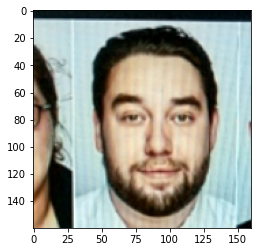

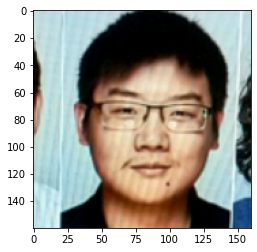

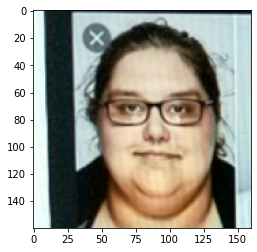

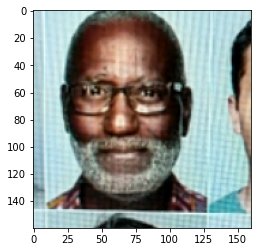

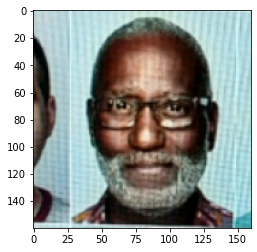

In [5]:
for img in imgs:
    print(img.shape)
    plt.figure()
    plt.imshow(img)

In [6]:
def align_images(imgs, margin):
    
    cascade_path = os.path.abspath('./models/haarcascade_frontalface_alt2.xml')
    image_size = 160
    
    cascade = cv2.CascadeClassifier(cascade_path)

    aligned_images = []
    for img in imgs:

        faces = cascade.detectMultiScale(img,
                                         scaleFactor=1.1,
                                         minNeighbors=3)
        (x, y, w, h) = faces[0]
        cropped = img[y-margin//2:y+h+margin//2,
                      x-margin//2:x+w+margin//2, :]
        aligned = resize(cropped, (image_size, image_size), mode='reflect')
        aligned_images.append(aligned)

    return np.array(aligned_images)

In [7]:
aligned_imgs = align_images(imgs, 10)

(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)


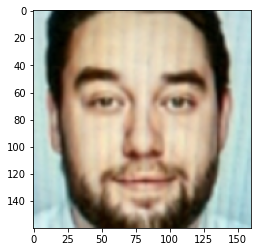

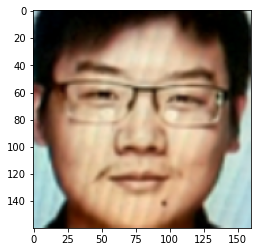

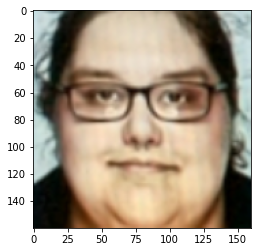

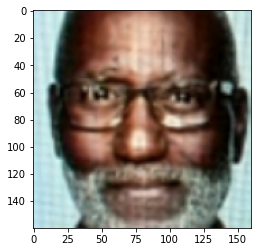

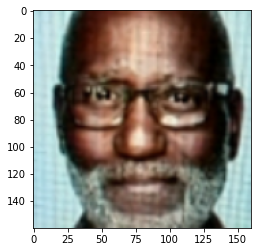

In [8]:
for img in aligned_imgs:
    print(img.shape)
    plt.figure()
    plt.imshow(img)